In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import datetime
from MLscripts.proj1_helpers import *
# from MLscripts.helpers import *
from MLscripts.plot import *
from MLscripts.implementations import *

# 1) Data Analysis and Cleanup
The degree of the feature expansion depends on the models that are run

In [75]:
preprocessed_data_train_augmented = preprocessed_data_train
preprocessed_data_test_augmented = preprocessed_data_test

# preprocessed_data_train_augmented[0][np.isnan(preprocessed_data_train_augmented[0])]

# preprocessed_data_train_augmented[0]

# np.isnan(preprocessed_data_train_augmented[0])

# a = preprocessed_data_train_augmented[0]
# for feature in range(a.shape[1]):
    
# #     print(np.isnan(a[:, feature], a[np.isnan(a[:, feature])]))
#     print(feature, np.isnan(a[:, feature]).any())

np.isnan(preprocessed_data_train_augmented[3]).any()

False

In [4]:
yb_train, input_data_train, ids_train = load_csv_data('data/train.csv', sub_sample=False)
# preprocessed_data_train, all_ys_train = clean_data(input_data_train, yb_train, degree=2)
preprocessed_data_train, all_ys_train = clean_data(input_data_train, yb_train, degree=4)

yb_test, input_data_test, ids_test = load_csv_data('data/test.csv', sub_sample=False)
# preprocessed_data_test, _ = clean_data(input_data_test, yb_test, degree=2)
preprocessed_data_test, _ = clean_data(input_data_test, yb_test, degree=4)

preprocessed_data_train_augmented = preprocessed_data_train
preprocessed_data_test_augmented = preprocessed_data_test

# preprocessed_data_train_augmented = []
# preprocessed_data_test_augmented = []

# for i, dataset_part in enumerate(preprocessed_data_train):
#     preprocessed_data_train_augmented.append(expand_features(dataset_part, degree=4, mutual_product=True))
    
# for i, dataset_part in enumerate(preprocessed_data_test):
#     preprocessed_data_test_augmented.append(expand_features(dataset_part, degree=4, mutual_product=True))

feature 0 : [] (0,)
feature 1 : [] (0,)
feature 2 : [] (0,)
feature 3 : [] (0,)
feature 4 : [] (0,)
feature 5 : [] (0,)
feature 6 : [] (0,)
feature 7 : [] (0,)
feature 8 : [] (0,)
feature 9 : [] (0,)
feature 10 : [] (0,)
feature 11 : [] (0,)
feature 12 : [] (0,)
feature 13 : [] (0,)
feature 14 : [] (0,)
feature 15 : [] (0,)
feature 16 : [] (0,)
feature 17 : [] (0,)
feature 18 : [] (0,)
feature 19 : [] (0,)
feature 20 : [] (0,)
feature 21 : [] (0,)
feature 22 : [] (0,)
feature 23 : [] (0,)
feature 24 : [] (0,)
feature 25 : [] (0,)
feature 26 : [] (0,)
feature 27 : [] (0,)
feature 28 : [] (0,)
feature 29 : [] (0,)
feature 30 : [] (0,)
feature 31 : [] (0,)
feature 32 : [] (0,)
feature 33 : [] (0,)
feature 34 : [] (0,)
feature 35 : [] (0,)
feature 36 : [] (0,)
feature 37 : [] (0,)
feature 38 : [] (0,)
feature 39 : [] (0,)
feature 40 : [] (0,)
feature 41 : [] (0,)
feature 42 : [] (0,)
feature 43 : [] (0,)
feature 44 : [] (0,)
feature 45 : [] (0,)
feature 46 : [] (0,)
feature 47 : [] (0,)
fe

Plotting the features in order to catch useful information for data preprocessing

Positive y: 34.266799999999996%
Negative y: 65.7332%


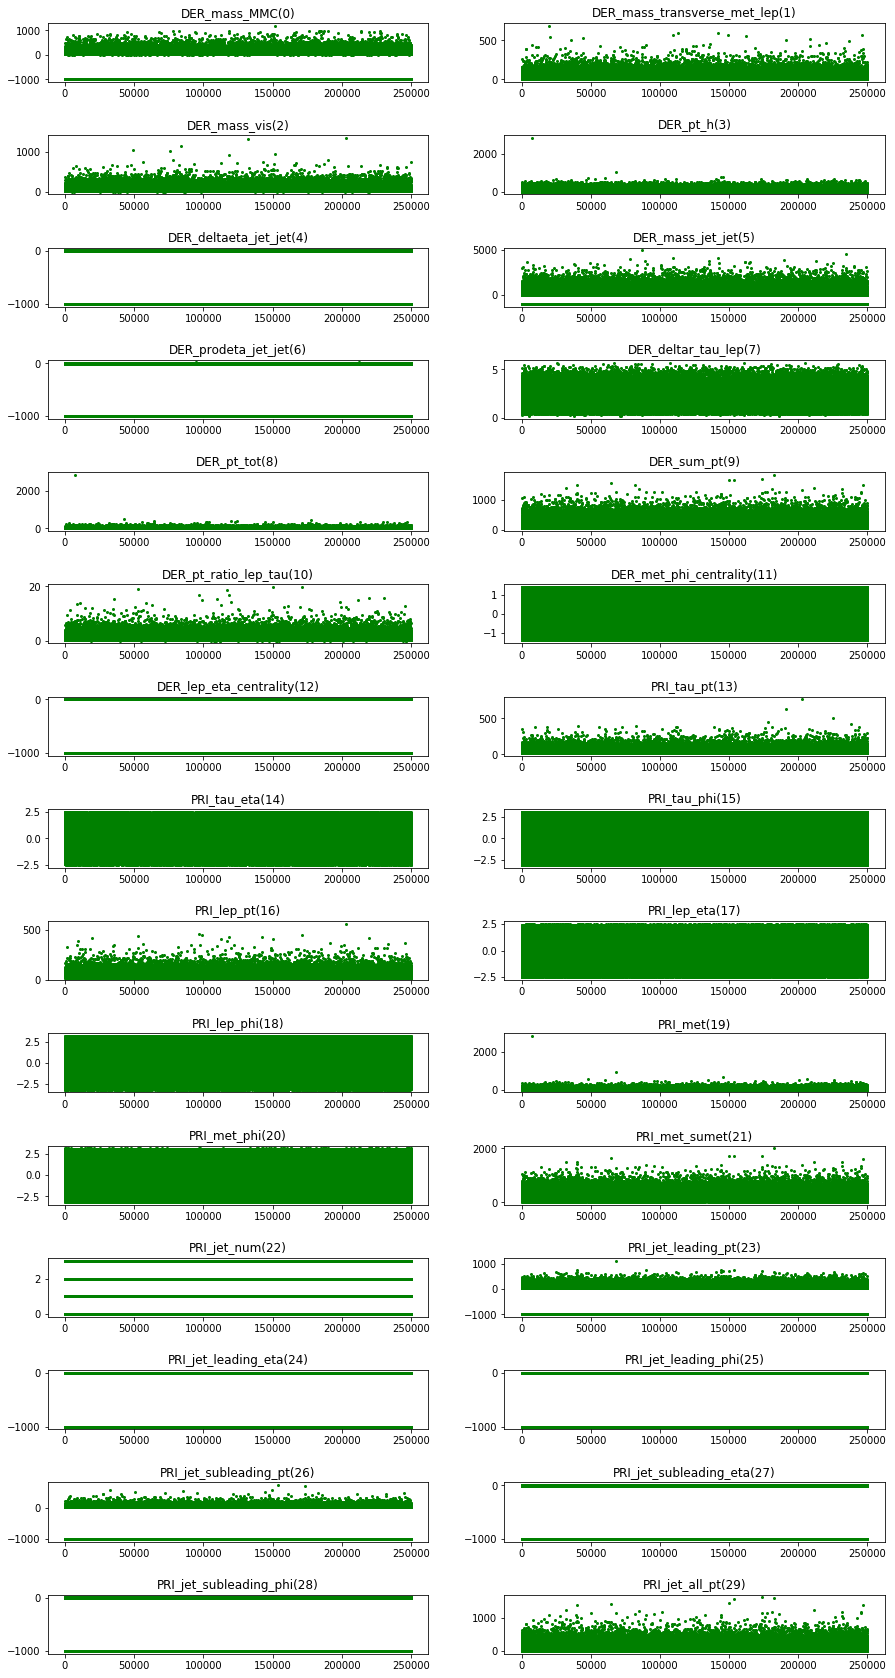

In [3]:
plot_features(yb_train, input_data_train)

Plotting the distribution of the features in order to find interesting patterns

Positive y (blue): 34.266799999999996%
Negative y (red): 65.7332%


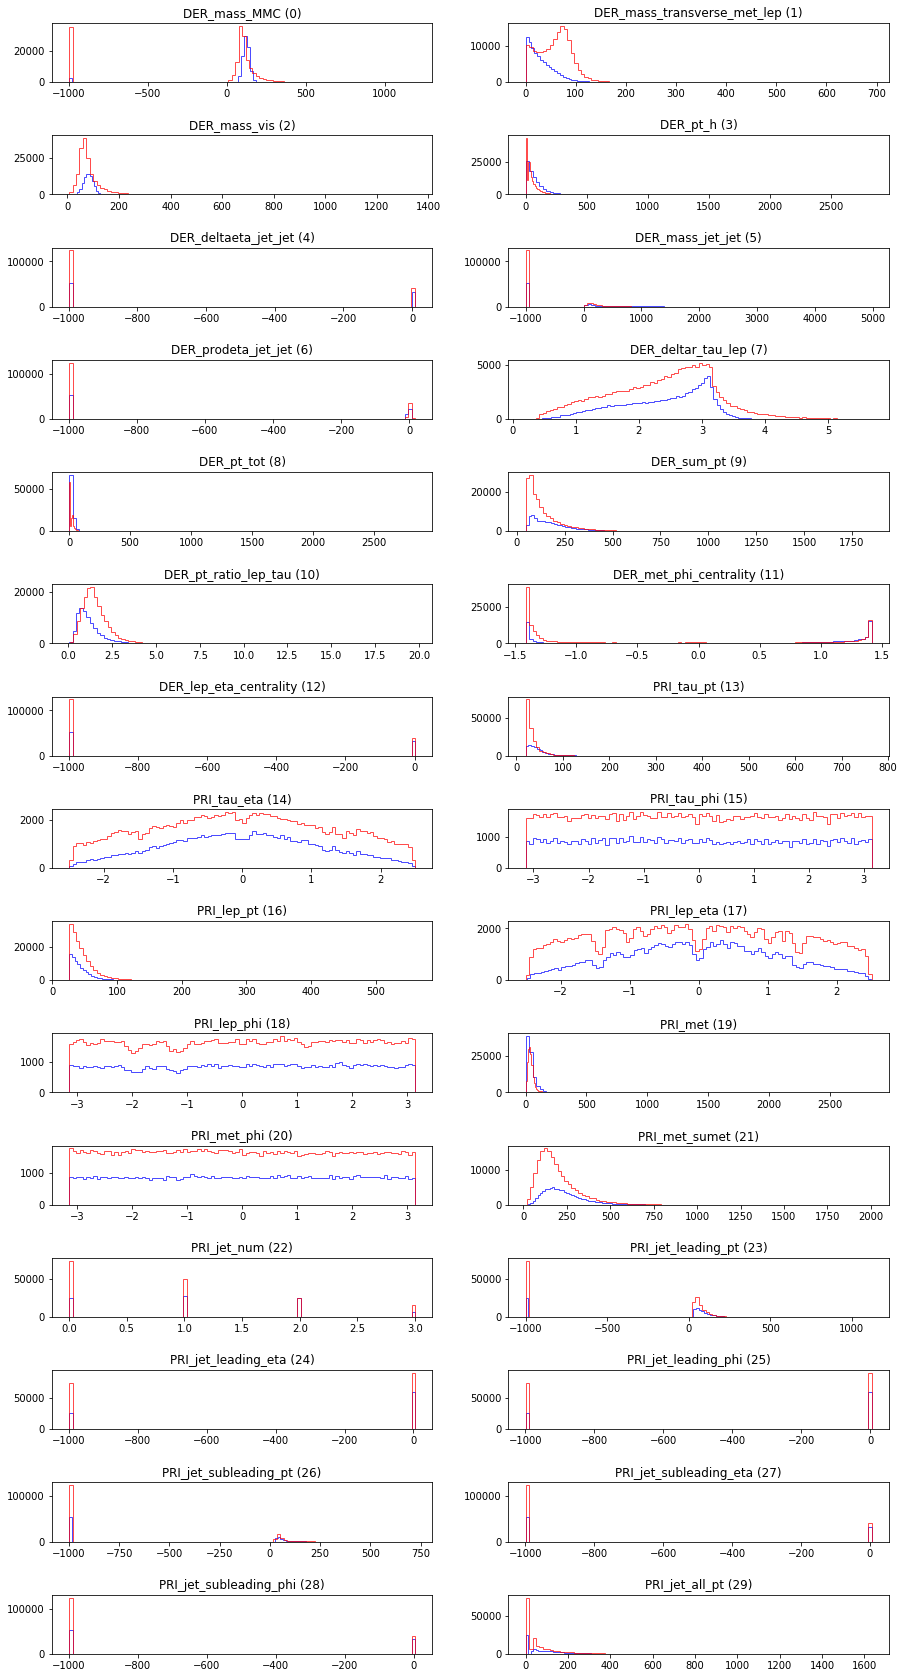

In [14]:
plot_feature_histograms(yb_train, input_data_train)

We can notice that not all features are really relevant for the output prediction. For instance there are many "-999" values. We observed that the jet_num feature is discrete and that depending on its value, there are some features that have more or less impact on the output. After determining that some features are useless (given a certain jet_num), we decided divide the dataset on the basis of this value and to drop them. We also noticed that for jet_num=0, all the values for feature 29 (jet_all_pt) are equal to 0. The following code snippet (and the report) give more details on this matter.

In [14]:
dataset0 = input_data_train[input_data_train[:, 22] == 0]
dataset1 = input_data_train[input_data_train[:, 22] == 1]
dataset2 = input_data_train[input_data_train[:, 22] == 2]
dataset3 = input_data_train[input_data_train[:, 22] == 3]

print("********** dataset 0 (size = " + str(dataset0.shape[0]) +") **********")
for col in range(dataset0.shape[1]):
    full_col = dataset0[:, col]
    missing_measure = full_col[full_col==-999]
    if missing_measure.shape[0] > 0:
        print("feature " + str(col) + ", -999 values: " + str(missing_measure.shape[0]))
# 0 (not all) 4, 5, 6, 12, 23, 24, 25, 26, 27, 28

print("********** dataset 1 (size = " + str(dataset1.shape[0]) +") **********")
for col in range(dataset1.shape[1]):
    full_col = dataset1[:, col]
    missing_measure = full_col[full_col==-999]
    if missing_measure.shape[0] > 0:
        print("feature " + str(col) + ", -999 values: " + str(missing_measure.shape[0]))
# 0 (not all) 4, 5, 6, 12, 26, 27, 28
    
print("********** dataset 2 (size = " + str(dataset2.shape[0]) +") **********")
for col in range(dataset2.shape[1]):
    full_col = dataset2[:, col]
    missing_measure = full_col[full_col==-999]
    if missing_measure.shape[0] > 0:
        print("feature " + str(col) + ", -999 values: " + str(missing_measure.shape[0]))
# 0 (not all)

print("********** dataset 3 (size = " + str(dataset3.shape[0]) +") **********")
for col in range(dataset3.shape[1]):
    full_col = dataset3[:, col]
    missing_measure = full_col[full_col==-999]
    if missing_measure.shape[0] > 0:
        print("feature " + str(col) + ", -999 values: " + str(missing_measure.shape[0]))
# 0 (not all)

********** dataset 0 (size = 99913) **********
feature 0, -999 values: 26123
feature 4, -999 values: 99913
feature 5, -999 values: 99913
feature 6, -999 values: 99913
feature 12, -999 values: 99913
feature 23, -999 values: 99913
feature 24, -999 values: 99913
feature 25, -999 values: 99913
feature 26, -999 values: 99913
feature 27, -999 values: 99913
feature 28, -999 values: 99913
********** dataset 1 (size = 77544) **********
feature 0, -999 values: 7562
feature 4, -999 values: 77544
feature 5, -999 values: 77544
feature 6, -999 values: 77544
feature 12, -999 values: 77544
feature 26, -999 values: 77544
feature 27, -999 values: 77544
feature 28, -999 values: 77544
********** dataset 2 (size = 50379) **********
feature 0, -999 values: 2952
********** dataset 3 (size = 22164) **********
feature 0, -999 values: 1477


In [27]:
def cross_validate(model, X, y, batch_size=20, n_splits=4, epochs=100, lambda_=0, initial_w=None, gamma=0.01, verbose=False, model_name='least_squares'):
        """ Run cross validation on the model and return the obtained test and train scores. """

        if initial_w == None:
                initial_w = np.random.uniform(low=-1, high=1, size=X.shape[1])
        def build_k_indices(y, k_fold, seed=12):
            """build k indices for k-fold."""
            num_row = y.shape[0]
            interval = int(num_row / k_fold)
            np.random.seed(seed)
            indices = np.random.permutation(num_row)
            te_indices = np.array([indices[k * interval: (k + 1) * interval] for k in range(k_fold)])
            tr_indices = np.array([te_indices[~(np.arange(te_indices.shape[0]) == k)].reshape(-1) for k in range(k_fold)])
            return zip(tr_indices, te_indices)
        
        kf = build_k_indices(X, n_splits)
        tr_scores = []
        va_scores = []

        result = {
            "train_score": [],
            "test_score" : []
        }

        split_n = 1
        for tr_indices, va_indices in kf:
            if verbose:
                print("----------------- fold " + str(split_n) + "/" + str(n_splits) + " -----------------")
            tr_indices = tr_indices.tolist()
            va_indices = va_indices.tolist()
            X_tr, y_tr = X[tr_indices], y[tr_indices]
            X_te, y_te = X[va_indices], y[va_indices]
            
            if model_name == 'least_squares':
                _, wi = model(y_tr, X_tr)
            elif model_name == 'ridge_regression':
                _, wi = model(y_tr, X_tr, lambda_)
            elif (model_name == 'least_squares_GD' or
                  model_name == 'least_squares_SGD' or
                  model_name == 'logistic_regression'):
                _, wi = model(y_tr, X_tr, initial_w, epochs, gamma)
            elif (model_name == 'reg_logistic_regression'):
                _, wi = model(y_tr, X_tr, initial_w, lambda_, epochs, gamma)
            result["train_score"].append(calculate_loss_SUCCESS(y_tr, X_tr, wi))
            result["test_score"].append(calculate_loss_SUCCESS(y_te, X_te, wi))            

            split_n = split_n + 1

        return result

# 2) Baselines
Trying out the baselines through cross validation

### Ridge Regression
Here the degree of the feature expansion can be higher than the other baselines (4 gives good results)

In [5]:
augmented_ridge_regression_cross_val_res = []
for i, tx in enumerate(preprocessed_data_train_augmented):
    augmented_ridge_regression_cross_val_res.append(cross_validate(ridge_regression, tx, all_ys_train[i], lambda_=1, model_name='ridge_regression'))
    
augmented_ridge_regression_cross_val_res

[{'test_score': [0.7629113619985587,
   0.8361758347345665,
   0.7580270638161583,
   0.8353751301145007],
  'train_score': [0.7607494595243814,
   0.8366162222756025,
   0.7600421704433235,
   0.8370966450476419]},
 {'test_score': [0.761013102238729,
   0.7602909316001238,
   0.7703497369235531,
   0.767151552666873],
  'train_score': [0.765260153375288,
   0.7629732796863716,
   0.7699198734481929,
   0.7665325492623543]},
 {'test_score': [0.8078450055582023,
   0.8106241067174845,
   0.8128473876449103,
   0.8143560425599492],
  'train_score': [0.8151500714626012,
   0.8131649992059711,
   0.8131385315758827,
   0.8111799269493409]},
 {'test_score': [0.7937195452084461,
   0.7980508933405522,
   0.7877639415268002,
   0.7976899476628767],
  'train_score': [0.7892678818504482,
   0.8074354809601155,
   0.7944414365637972,
   0.8038260241833604]}]

### Least Squares
The augmented dataset leads to a non-invertible matrix

In [6]:
least_squares_cross_val_res = []
for i, tx in enumerate(preprocessed_data_train):
    least_squares_cross_val_res.append(cross_validate(least_squares, tx, all_ys_train[i], model_name='least_squares'))
    
least_squares_cross_val_res

LinAlgError: Singular matrix

### Least Squares GD
The best results are obtained by not augmenting features and by using a learning rate = 0.005

Gradient Descent: step 1 / 1000 - Loss = 30.06334015908225
Accuracy: 0.4992126404569354
Gradient Descent: step 2 / 1000 - Loss = 25.919226055612597
Accuracy: 0.49779806229481943
Gradient Descent: step 3 / 1000 - Loss = 22.862471552699013
Accuracy: 0.4972909493687779
Gradient Descent: step 4 / 1000 - Loss = 20.531833433578175
Accuracy: 0.4969039421357461
Gradient Descent: step 5 / 1000 - Loss = 18.69520284706647
Accuracy: 0.4967037659807297
Gradient Descent: step 6 / 1000 - Loss = 17.20215678147987
Accuracy: 0.49615661782368486
Gradient Descent: step 7 / 1000 - Loss = 15.954202285728753
Accuracy: 0.49591640643766516
Gradient Descent: step 8 / 1000 - Loss = 14.886048338385889
Accuracy: 0.49556943443563667
Gradient Descent: step 9 / 1000 - Loss = 13.95377114725392
Accuracy: 0.4953158779726159
Gradient Descent: step 10 / 1000 - Loss = 13.127302331760147
Accuracy: 0.4951423919716017
Gradient Descent: step 11 / 1000 - Loss = 12.385637459442258
Accuracy: 0.49488883550858087
Gradient Descent: 

Gradient Descent: step 93 / 1000 - Loss = 1.80709047158059
Accuracy: 0.5462406918087918
Gradient Descent: step 94 / 1000 - Loss = 1.7926932713864294
Accuracy: 0.5466410441188245
Gradient Descent: step 95 / 1000 - Loss = 1.77865277529577
Accuracy: 0.5471881922758695
Gradient Descent: step 96 / 1000 - Loss = 1.7649555664366046
Accuracy: 0.548402594282969
Gradient Descent: step 97 / 1000 - Loss = 1.7515888579402117
Accuracy: 0.5489363973630128
Gradient Descent: step 98 / 1000 - Loss = 1.7385404586649567
Accuracy: 0.5493767849040488
Gradient Descent: step 99 / 1000 - Loss = 1.7257987409919946
Accuracy: 0.550097419062108
Gradient Descent: step 100 / 1000 - Loss = 1.7133526105570824
Accuracy: 0.5506846024501562
Gradient Descent: step 101 / 1000 - Loss = 1.701191477792269
Accuracy: 0.5512184055302
Gradient Descent: step 102 / 1000 - Loss = 1.6893052311600132
Accuracy: 0.551378546454213
Gradient Descent: step 103 / 1000 - Loss = 1.6776842119705115
Accuracy: 0.5519123495342568
Gradient Descent:

Gradient Descent: step 184 / 1000 - Loss = 1.174001792420612
Accuracy: 0.5774281367603491
Gradient Descent: step 185 / 1000 - Loss = 1.1704745560730447
Accuracy: 0.5777884538393786
Gradient Descent: step 186 / 1000 - Loss = 1.1669803908616032
Accuracy: 0.577975284917394
Gradient Descent: step 187 / 1000 - Loss = 1.1635187207596138
Accuracy: 0.5780820455334027
Gradient Descent: step 188 / 1000 - Loss = 1.1600889838455497
Accuracy: 0.5784423626124323
Gradient Descent: step 189 / 1000 - Loss = 1.1566906318806
Accuracy: 0.57853577815144
Gradient Descent: step 190 / 1000 - Loss = 1.1533231299011608
Accuracy: 0.5786291936904476
Gradient Descent: step 191 / 1000 - Loss = 1.1499859558256074
Accuracy: 0.578829369845464
Gradient Descent: step 192 / 1000 - Loss = 1.1466786000747935
Accuracy: 0.5789094403074706
Gradient Descent: step 193 / 1000 - Loss = 1.1434005652057064
Accuracy: 0.5790028558464783
Gradient Descent: step 194 / 1000 - Loss = 1.1401513655577618
Accuracy: 0.5790695812314837
Gradien

Gradient Descent: step 275 / 1000 - Loss = 0.9431526232656278
Accuracy: 0.5898390583713669
Gradient Descent: step 276 / 1000 - Loss = 0.9412953490144099
Accuracy: 0.590012544372381
Gradient Descent: step 277 / 1000 - Loss = 0.9394481608720121
Accuracy: 0.5901059599113887
Gradient Descent: step 278 / 1000 - Loss = 0.9376109636410035
Accuracy: 0.5903328262204073
Gradient Descent: step 279 / 1000 - Loss = 0.9357836635896151
Accuracy: 0.5903728614514105
Gradient Descent: step 280 / 1000 - Loss = 0.9339661684217528
Accuracy: 0.5905330023754237
Gradient Descent: step 281 / 1000 - Loss = 0.9321583872477327
Accuracy: 0.5906931432994368
Gradient Descent: step 282 / 1000 - Loss = 0.9303602305557183
Accuracy: 0.5909733899164599
Gradient Descent: step 283 / 1000 - Loss = 0.9285716101838329
Accuracy: 0.5911068406864708
Gradient Descent: step 284 / 1000 - Loss = 0.9267924392929342
Accuracy: 0.5912136013024795
Gradient Descent: step 285 / 1000 - Loss = 0.9250226323400279
Accuracy: 0.5913337069954894


Gradient Descent: step 366 / 1000 - Loss = 0.8067608339338355
Accuracy: 0.6011289935142926
Gradient Descent: step 367 / 1000 - Loss = 0.8055534557459195
Accuracy: 0.6012357541303013
Gradient Descent: step 368 / 1000 - Loss = 0.8043511542042767
Accuracy: 0.6013425147463101
Gradient Descent: step 369 / 1000 - Loss = 0.8031538983902223
Accuracy: 0.6015693810553286
Gradient Descent: step 370 / 1000 - Loss = 0.8019616576818337
Accuracy: 0.601756212133344
Gradient Descent: step 371 / 1000 - Loss = 0.8007744017496649
Accuracy: 0.6018629727493527
Gradient Descent: step 372 / 1000 - Loss = 0.7995921005525506
Accuracy: 0.6021432193663757
Gradient Descent: step 373 / 1000 - Loss = 0.7984147243334829
Accuracy: 0.6021165292123736
Gradient Descent: step 374 / 1000 - Loss = 0.7972422436155636
Accuracy: 0.6020898390583713
Gradient Descent: step 375 / 1000 - Loss = 0.7960746291980362
Accuracy: 0.602183254597379
Gradient Descent: step 376 / 1000 - Loss = 0.7949118521523855
Accuracy: 0.6023834307523954
G

Gradient Descent: step 458 / 1000 - Loss = 0.7137136455787366
Accuracy: 0.6108041743400859
Gradient Descent: step 459 / 1000 - Loss = 0.7128721744383454
Accuracy: 0.6109242800330958
Gradient Descent: step 460 / 1000 - Loss = 0.7120338003449489
Accuracy: 0.610950970187098
Gradient Descent: step 461 / 1000 - Loss = 0.7111985084234809
Accuracy: 0.6110310406491045
Gradient Descent: step 462 / 1000 - Loss = 0.7103662838972369
Accuracy: 0.6110577308031068
Gradient Descent: step 463 / 1000 - Loss = 0.7095371120869165
Accuracy: 0.6111644914191154
Gradient Descent: step 464 / 1000 - Loss = 0.7087109784096713
Accuracy: 0.611231216804121
Gradient Descent: step 465 / 1000 - Loss = 0.7078878683781863
Accuracy: 0.611378012651133
Gradient Descent: step 466 / 1000 - Loss = 0.7070677675997464
Accuracy: 0.6113646675741319
Gradient Descent: step 467 / 1000 - Loss = 0.7062506617753457
Accuracy: 0.6115248084981451
Gradient Descent: step 468 / 1000 - Loss = 0.7054365366987816
Accuracy: 0.6116982944991592
Gr

Gradient Descent: step 550 / 1000 - Loss = 0.6476300058991278
Accuracy: 0.6203325593188672
Gradient Descent: step 551 / 1000 - Loss = 0.6470213890941499
Accuracy: 0.6203859396268716
Gradient Descent: step 552 / 1000 - Loss = 0.646414820401849
Accuracy: 0.6204927002428804
Gradient Descent: step 553 / 1000 - Loss = 0.645810291171455
Accuracy: 0.620586115781888
Gradient Descent: step 554 / 1000 - Loss = 0.6452077927979732
Accuracy: 0.6206261510128913
Gradient Descent: step 555 / 1000 - Loss = 0.6446073167218631
Accuracy: 0.6207462567059012
Gradient Descent: step 556 / 1000 - Loss = 0.644008854428716
Accuracy: 0.6208129820909066
Gradient Descent: step 557 / 1000 - Loss = 0.6434123974489354
Accuracy: 0.6209597779379187
Gradient Descent: step 558 / 1000 - Loss = 0.6428179373574239
Accuracy: 0.6211065737849307
Gradient Descent: step 559 / 1000 - Loss = 0.6422254657732684
Accuracy: 0.6212133344009395
Gradient Descent: step 560 / 1000 - Loss = 0.6416349743594322
Accuracy: 0.6212800597859449
Gra

Gradient Descent: step 642 / 1000 - Loss = 0.5992382067381188
Accuracy: 0.629220380601596
Gradient Descent: step 643 / 1000 - Loss = 0.5987867781380515
Accuracy: 0.6292470707555983
Gradient Descent: step 644 / 1000 - Loss = 0.5983367599033628
Accuracy: 0.6293404862946059
Gradient Descent: step 645 / 1000 - Loss = 0.5978881465465433
Accuracy: 0.6294339018336136
Gradient Descent: step 646 / 1000 - Loss = 0.5974409326055357
Accuracy: 0.6295273173726212
Gradient Descent: step 647 / 1000 - Loss = 0.5969951126435843
Accuracy: 0.6295673526036245
Gradient Descent: step 648 / 1000 - Loss = 0.5965506812490974
Accuracy: 0.629647423065631
Gradient Descent: step 649 / 1000 - Loss = 0.5961076330354956
Accuracy: 0.6297808738356421
Gradient Descent: step 650 / 1000 - Loss = 0.595665962641071
Accuracy: 0.629914324605653
Gradient Descent: step 651 / 1000 - Loss = 0.5952256647288482
Accuracy: 0.6301011556836683
Gradient Descent: step 652 / 1000 - Loss = 0.5947867339864382
Accuracy: 0.630194571222676
Grad

Gradient Descent: step 733 / 1000 - Loss = 0.5633288672349119
Accuracy: 0.6376277791122855
Gradient Descent: step 734 / 1000 - Loss = 0.5629860559024108
Accuracy: 0.6377345397282942
Gradient Descent: step 735 / 1000 - Loss = 0.5626442445141735
Accuracy: 0.6378279552673018
Gradient Descent: step 736 / 1000 - Loss = 0.562303429408853
Accuracy: 0.6380014412683161
Gradient Descent: step 737 / 1000 - Loss = 0.5619636069406996
Accuracy: 0.6380548215763205
Gradient Descent: step 738 / 1000 - Loss = 0.5616247734794831
Accuracy: 0.6381615821923292
Gradient Descent: step 739 / 1000 - Loss = 0.5612869254104146
Accuracy: 0.6381749272693303
Gradient Descent: step 740 / 1000 - Loss = 0.5609500591340681
Accuracy: 0.6381749272693303
Gradient Descent: step 741 / 1000 - Loss = 0.5606141710663045
Accuracy: 0.6383350681933435
Gradient Descent: step 742 / 1000 - Loss = 0.5602792576381943
Accuracy: 0.63841513865535
Gradient Descent: step 743 / 1000 - Loss = 0.5599453152959418
Accuracy: 0.6384952091173566
Gr

Gradient Descent: step 824 / 1000 - Loss = 0.5358213429579501
Accuracy: 0.6450876771558972
Gradient Descent: step 825 / 1000 - Loss = 0.5355562388290359
Accuracy: 0.645194437771906
Gradient Descent: step 826 / 1000 - Loss = 0.5352918569458381
Accuracy: 0.6452611631569114
Gradient Descent: step 827 / 1000 - Loss = 0.5350281947954751
Accuracy: 0.6453011983879147
Gradient Descent: step 828 / 1000 - Loss = 0.5347652498751394
Accuracy: 0.6454479942349267
Gradient Descent: step 829 / 1000 - Loss = 0.5345030196920426
Accuracy: 0.645474684388929
Gradient Descent: step 830 / 1000 - Loss = 0.5342415017633768
Accuracy: 0.6455280646969332
Gradient Descent: step 831 / 1000 - Loss = 0.5339806936162645
Accuracy: 0.6455280646969332
Gradient Descent: step 832 / 1000 - Loss = 0.5337205927877141
Accuracy: 0.645621480235941
Gradient Descent: step 833 / 1000 - Loss = 0.5334611968245755
Accuracy: 0.6456748605439453
Gradient Descent: step 834 / 1000 - Loss = 0.5332025032834948
Accuracy: 0.6457949662369552
Gr

Gradient Descent: step 916 / 1000 - Loss = 0.5141655451231778
Accuracy: 0.652133877812475
Gradient Descent: step 917 / 1000 - Loss = 0.5139575153596572
Accuracy: 0.6521605679664771
Gradient Descent: step 918 / 1000 - Loss = 0.5137500136327027
Accuracy: 0.6523340539674914
Gradient Descent: step 919 / 1000 - Loss = 0.5135430381898317
Accuracy: 0.6523607441214936
Gradient Descent: step 920 / 1000 - Loss = 0.5133365872852532
Accuracy: 0.6523874342754957
Gradient Descent: step 921 / 1000 - Loss = 0.5131306591798397
Accuracy: 0.6524941948915045
Gradient Descent: step 922 / 1000 - Loss = 0.5129252521410972
Accuracy: 0.652574265353511
Gradient Descent: step 923 / 1000 - Loss = 0.5127203644431374
Accuracy: 0.652574265353511
Gradient Descent: step 924 / 1000 - Loss = 0.5125159943666494
Accuracy: 0.6526009555075133
Gradient Descent: step 925 / 1000 - Loss = 0.5123121401988736
Accuracy: 0.6526409907385166
Gradient Descent: step 926 / 1000 - Loss = 0.5121088002335684
Accuracy: 0.6526409907385166
Gr

Gradient Descent: step 7 / 1000 - Loss = 14.21018919084832
Accuracy: 0.5032295086342649
Gradient Descent: step 8 / 1000 - Loss = 13.365320820049801
Accuracy: 0.5030560226332506
Gradient Descent: step 9 / 1000 - Loss = 12.610641131852557
Accuracy: 0.502695705554221
Gradient Descent: step 10 / 1000 - Loss = 11.929458615631725
Accuracy: 0.5029092267862385
Gradient Descent: step 11 / 1000 - Loss = 11.309409066059764
Accuracy: 0.502975952171244
Gradient Descent: step 12 / 1000 - Loss = 10.741191894132673
Accuracy: 0.5031227480182561
Gradient Descent: step 13 / 1000 - Loss = 10.217687778551419
Accuracy: 0.5028958817092375
Gradient Descent: step 14 / 1000 - Loss = 9.733341595720656
Accuracy: 0.5024821843222035
Gradient Descent: step 15 / 1000 - Loss = 9.283729968805497
Accuracy: 0.5025222195532069
Gradient Descent: step 16 / 1000 - Loss = 8.86525737343593
Accuracy: 0.5026022900152134
Gradient Descent: step 17 / 1000 - Loss = 8.474941828070166
Accuracy: 0.5028558464782342
Gradient Descent: ste

Gradient Descent: step 99 / 1000 - Loss = 1.724520003728664
Accuracy: 0.5410227667013638
Gradient Descent: step 100 / 1000 - Loss = 1.712355660587681
Accuracy: 0.5413297034723891
Gradient Descent: step 101 / 1000 - Loss = 1.7004557795726982
Accuracy: 0.5417834360904262
Gradient Descent: step 102 / 1000 - Loss = 1.6888112030241325
Accuracy: 0.5423572744014733
Gradient Descent: step 103 / 1000 - Loss = 1.6774131848041294
Accuracy: 0.5427042464035018
Gradient Descent: step 104 / 1000 - Loss = 1.6662533683567626
Accuracy: 0.543024528251528
Gradient Descent: step 105 / 1000 - Loss = 1.6553237660773161
Accuracy: 0.5434382256385619
Gradient Descent: step 106 / 1000 - Loss = 1.6446167399064304
Accuracy: 0.5437985427175914
Gradient Descent: step 107 / 1000 - Loss = 1.6341249830704623
Accuracy: 0.5443323457976352
Gradient Descent: step 108 / 1000 - Loss = 1.6238415028949305
Accuracy: 0.5445725571836549
Gradient Descent: step 109 / 1000 - Loss = 1.6137596046227303
Accuracy: 0.5451730856487041
Gra

Gradient Descent: step 191 / 1000 - Loss = 1.1450715187512512
Accuracy: 0.5693009848666827
Gradient Descent: step 192 / 1000 - Loss = 1.1416594691637507
Accuracy: 0.5695011610216991
Gradient Descent: step 193 / 1000 - Loss = 1.1382771876275077
Accuracy: 0.5697013371767156
Gradient Descent: step 194 / 1000 - Loss = 1.1349241967470982
Accuracy: 0.5699548936397363
Gradient Descent: step 195 / 1000 - Loss = 1.1316000299672662
Accuracy: 0.5700749993327462
Gradient Descent: step 196 / 1000 - Loss = 1.12830423127358
Accuracy: 0.5702217951797582
Gradient Descent: step 197 / 1000 - Loss = 1.1250363549028484
Accuracy: 0.5703152107187659
Gradient Descent: step 198 / 1000 - Loss = 1.121795965062946
Accuracy: 0.5704486614887768
Gradient Descent: step 199 / 1000 - Loss = 1.1185826356616704
Accuracy: 0.5706088024127899
Gradient Descent: step 200 / 1000 - Loss = 1.115395950044285
Accuracy: 0.5709424293378172
Gradient Descent: step 201 / 1000 - Loss = 1.112235500739435
Accuracy: 0.5711426054928337
Grad

Gradient Descent: step 282 / 1000 - Loss = 0.917969741925844
Accuracy: 0.584487682493928
Gradient Descent: step 283 / 1000 - Loss = 0.9161206541663426
Accuracy: 0.5846077881869378
Gradient Descent: step 284 / 1000 - Loss = 0.9142814299850061
Accuracy: 0.5846878586489445
Gradient Descent: step 285 / 1000 - Loss = 0.9124519819482982
Accuracy: 0.584767929110951
Gradient Descent: step 286 / 1000 - Loss = 0.910632223902217
Accuracy: 0.5850882109589772
Gradient Descent: step 287 / 1000 - Loss = 0.9088220709469221
Accuracy: 0.5851549363439827
Gradient Descent: step 288 / 1000 - Loss = 0.9070214394119628
Accuracy: 0.5852883871139937
Gradient Descent: step 289 / 1000 - Loss = 0.9052302468320592
Accuracy: 0.5853951477300025
Gradient Descent: step 290 / 1000 - Loss = 0.9034484119234483
Accuracy: 0.5855285985000134
Gradient Descent: step 291 / 1000 - Loss = 0.9016758545607644
Accuracy: 0.5857287746550297
Gradient Descent: step 292 / 1000 - Loss = 0.8999124957544464
Accuracy: 0.585902260656044
Grad

Gradient Descent: step 374 / 1000 - Loss = 0.7808068457695534
Accuracy: 0.5982864921130595
Gradient Descent: step 375 / 1000 - Loss = 0.7796098863761673
Accuracy: 0.5985133584220781
Gradient Descent: step 376 / 1000 - Loss = 0.7784180330646652
Accuracy: 0.5986067739610857
Gradient Descent: step 377 / 1000 - Loss = 0.7772312558088913
Accuracy: 0.5987535698080978
Gradient Descent: step 378 / 1000 - Loss = 0.7760495248508521
Accuracy: 0.5988069501161022
Gradient Descent: step 379 / 1000 - Loss = 0.7748728106970222
Accuracy: 0.5990605065791229
Gradient Descent: step 380 / 1000 - Loss = 0.7737010841147236
Accuracy: 0.5992473376571383
Gradient Descent: step 381 / 1000 - Loss = 0.7725343161285719
Accuracy: 0.599354098273147
Gradient Descent: step 382 / 1000 - Loss = 0.7713724780169844
Accuracy: 0.5996076547361678
Gradient Descent: step 383 / 1000 - Loss = 0.7702155413087516
Accuracy: 0.5997411055061788
Gradient Descent: step 384 / 1000 - Loss = 0.7690634777796782
Accuracy: 0.5997411055061788


Gradient Descent: step 466 / 1000 - Loss = 0.688896010892424
Accuracy: 0.6111511463421144
Gradient Descent: step 467 / 1000 - Loss = 0.6880690233913004
Accuracy: 0.6113646675741319
Gradient Descent: step 468 / 1000 - Loss = 0.6872451753558244
Accuracy: 0.6115648437291483
Gradient Descent: step 469 / 1000 - Loss = 0.6864244516650111
Accuracy: 0.6116982944991592
Gradient Descent: step 470 / 1000 - Loss = 0.6856068372932274
Accuracy: 0.6119251608081778
Gradient Descent: step 471 / 1000 - Loss = 0.6847923173093433
Accuracy: 0.6121787172711987
Gradient Descent: step 472 / 1000 - Loss = 0.6839808768758822
Accuracy: 0.6122587877332052
Gradient Descent: step 473 / 1000 - Loss = 0.6831725012481891
Accuracy: 0.6123922385032161
Gradient Descent: step 474 / 1000 - Loss = 0.6823671757736057
Accuracy: 0.6124589638882216
Gradient Descent: step 475 / 1000 - Loss = 0.6815648858906584
Accuracy: 0.6126991752742413
Gradient Descent: step 476 / 1000 - Loss = 0.680765617128258
Accuracy: 0.6129126965062588
G

Gradient Descent: step 558 / 1000 - Loss = 0.6242869840713818
Accuracy: 0.623828969493154
Gradient Descent: step 559 / 1000 - Loss = 0.6236955530408435
Accuracy: 0.6239891104171671
Gradient Descent: step 560 / 1000 - Loss = 0.6231061859023288
Accuracy: 0.624122561187178
Gradient Descent: step 561 / 1000 - Loss = 0.6225188737323528
Accuracy: 0.624402807804201
Gradient Descent: step 562 / 1000 - Loss = 0.6219336076543351
Accuracy: 0.6243761176501988
Gradient Descent: step 563 / 1000 - Loss = 0.621350378838292
Accuracy: 0.6244962233432086
Gradient Descent: step 564 / 1000 - Loss = 0.6207691785005209
Accuracy: 0.6246963994982251
Gradient Descent: step 565 / 1000 - Loss = 0.620189997903296
Accuracy: 0.624829850268236
Gradient Descent: step 566 / 1000 - Loss = 0.6196128283545622
Accuracy: 0.6249099207302427
Gradient Descent: step 567 / 1000 - Loss = 0.6190376612076306
Accuracy: 0.625096751808258
Gradient Descent: step 568 / 1000 - Loss = 0.6184644878608806
Accuracy: 0.6253369631942777
Gradie

Gradient Descent: step 650 / 1000 - Loss = 0.5775115697337554
Accuracy: 0.6341046787839966
Gradient Descent: step 651 / 1000 - Loss = 0.5770777956773575
Accuracy: 0.6343982704780207
Gradient Descent: step 652 / 1000 - Loss = 0.5766454280296788
Accuracy: 0.6345183761710305
Gradient Descent: step 653 / 1000 - Loss = 0.5762144611488599
Accuracy: 0.6345450663250327
Gradient Descent: step 654 / 1000 - Loss = 0.5757848894197047
Accuracy: 0.6346918621720448
Gradient Descent: step 655 / 1000 - Loss = 0.5753567072535327
Accuracy: 0.6348520030960578
Gradient Descent: step 656 / 1000 - Loss = 0.5749299090880251
Accuracy: 0.6349721087890677
Gradient Descent: step 657 / 1000 - Loss = 0.574504489387079
Accuracy: 0.6350521792510743
Gradient Descent: step 658 / 1000 - Loss = 0.5740804426406574
Accuracy: 0.6350521792510743
Gradient Descent: step 659 / 1000 - Loss = 0.5736577633646428
Accuracy: 0.635158939867083
Gradient Descent: step 660 / 1000 - Loss = 0.5732364461006917
Accuracy: 0.635292390637094
Gr

Gradient Descent: step 742 / 1000 - Loss = 0.5428508381679434
Accuracy: 0.6439933808418075
Gradient Descent: step 743 / 1000 - Loss = 0.5425258096242227
Accuracy: 0.6442469373048283
Gradient Descent: step 744 / 1000 - Loss = 0.542201763651639
Accuracy: 0.6443270077668348
Gradient Descent: step 745 / 1000 - Loss = 0.5418786965403342
Accuracy: 0.6443803880748392
Gradient Descent: step 746 / 1000 - Loss = 0.5415566045967087
Accuracy: 0.6445138388448501
Gradient Descent: step 747 / 1000 - Loss = 0.5412354841433417
Accuracy: 0.6445672191528545
Gradient Descent: step 748 / 1000 - Loss = 0.5409153315189045
Accuracy: 0.6446339445378599
Gradient Descent: step 749 / 1000 - Loss = 0.5405961430780813
Accuracy: 0.6448341206928764
Gradient Descent: step 750 / 1000 - Loss = 0.5402779151914864
Accuracy: 0.6449809165398884
Gradient Descent: step 751 / 1000 - Loss = 0.5399606442455854
Accuracy: 0.645194437771906
Gradient Descent: step 752 / 1000 - Loss = 0.5396443266426126
Accuracy: 0.6453011983879147
G

Gradient Descent: step 834 / 1000 - Loss = 0.5166370547243951
Accuracy: 0.6532948995115702
Gradient Descent: step 835 / 1000 - Loss = 0.5163887258470609
Accuracy: 0.6534016601275789
Gradient Descent: step 836 / 1000 - Loss = 0.5161410971297747
Accuracy: 0.6534550404355833
Gradient Descent: step 837 / 1000 - Loss = 0.5158941660657553
Accuracy: 0.6535884912055943
Gradient Descent: step 838 / 1000 - Loss = 0.5156479301585741
Accuracy: 0.6537753222836096
Gradient Descent: step 839 / 1000 - Loss = 0.5154023869221028
Accuracy: 0.6538420476686151
Gradient Descent: step 840 / 1000 - Loss = 0.5151575338804683
Accuracy: 0.6539888435156271
Gradient Descent: step 841 / 1000 - Loss = 0.5149133685680013
Accuracy: 0.6541222942856381
Gradient Descent: step 842 / 1000 - Loss = 0.5146698885291896
Accuracy: 0.6542157098246457
Gradient Descent: step 843 / 1000 - Loss = 0.5144270913186325
Accuracy: 0.6543358155176555
Gradient Descent: step 844 / 1000 - Loss = 0.5141849745009888
Accuracy: 0.654415885979662


Gradient Descent: step 926 / 1000 - Loss = 0.49643356518943693
Accuracy: 0.6616489177142552
Gradient Descent: step 927 / 1000 - Loss = 0.4962403331805471
Accuracy: 0.6617957135612672
Gradient Descent: step 928 / 1000 - Loss = 0.4960476085787041
Accuracy: 0.6618357487922706
Gradient Descent: step 929 / 1000 - Loss = 0.49585538965443554
Accuracy: 0.6619425094082793
Gradient Descent: step 930 / 1000 - Loss = 0.49566367468506783
Accuracy: 0.6620626151012892
Gradient Descent: step 931 / 1000 - Loss = 0.49547246195468814
Accuracy: 0.6621159954092936
Gradient Descent: step 932 / 1000 - Loss = 0.49528174975412165
Accuracy: 0.6621960658713001
Gradient Descent: step 933 / 1000 - Loss = 0.49509153638089387
Accuracy: 0.662182720794299
Gradient Descent: step 934 / 1000 - Loss = 0.4949018201392109
Accuracy: 0.6621960658713001
Gradient Descent: step 935 / 1000 - Loss = 0.49471259933991996
Accuracy: 0.6623161715643099
Gradient Descent: step 936 / 1000 - Loss = 0.49452387230048755
Accuracy: 0.662462967

Gradient Descent: step 17 / 1000 - Loss = 9.174124772730945
Accuracy: 0.4962366882856914
Gradient Descent: step 18 / 1000 - Loss = 8.761279706136278
Accuracy: 0.4962366882856914
Gradient Descent: step 19 / 1000 - Loss = 8.376462884094833
Accuracy: 0.4965569701337177
Gradient Descent: step 20 / 1000 - Loss = 8.01719967782762
Accuracy: 0.497024047828756
Gradient Descent: step 21 / 1000 - Loss = 7.681330361075848
Accuracy: 0.49711746336776363
Gradient Descent: step 22 / 1000 - Loss = 7.3669485060837285
Accuracy: 0.4971574985987669
Gradient Descent: step 23 / 1000 - Loss = 7.0723558208883
Accuracy: 0.49711746336776363
Gradient Descent: step 24 / 1000 - Loss = 6.79602832259189
Accuracy: 0.49709077321376144
Gradient Descent: step 25 / 1000 - Loss = 6.5365904349220685
Accuracy: 0.4975845410628019
Gradient Descent: step 26 / 1000 - Loss = 6.29279471128723
Accuracy: 0.4982117596818534
Gradient Descent: step 27 / 1000 - Loss = 6.0635056200649124
Accuracy: 0.4986388021458884
Gradient Descent: ste

Gradient Descent: step 110 / 1000 - Loss = 1.597797397517599
Accuracy: 0.5544078789334614
Gradient Descent: step 111 / 1000 - Loss = 1.587856815418529
Accuracy: 0.5549817172445085
Gradient Descent: step 112 / 1000 - Loss = 1.5781145164919013
Accuracy: 0.5554888301705501
Gradient Descent: step 113 / 1000 - Loss = 1.568564102384427
Accuracy: 0.5559559078655884
Gradient Descent: step 114 / 1000 - Loss = 1.5591994396259543
Accuracy: 0.5563562601756212
Gradient Descent: step 115 / 1000 - Loss = 1.550014646746716
Accuracy: 0.557023514025676
Gradient Descent: step 116 / 1000 - Loss = 1.541004082097861
Accuracy: 0.5576640777217284
Gradient Descent: step 117 / 1000 - Loss = 1.532162332333425
Accuracy: 0.5582512611097766
Gradient Descent: step 118 / 1000 - Loss = 1.5234842015144507
Accuracy: 0.558584888034804
Gradient Descent: step 119 / 1000 - Loss = 1.5149647007985794
Accuracy: 0.558865134651827
Gradient Descent: step 120 / 1000 - Loss = 1.5065990386806651
Accuracy: 0.5592654869618597
Gradient

Gradient Descent: step 202 / 1000 - Loss = 1.1018581580632514
Accuracy: 0.5769610590653108
Gradient Descent: step 203 / 1000 - Loss = 1.0987895620289974
Accuracy: 0.5771879253743294
Gradient Descent: step 204 / 1000 - Loss = 1.0957460744332517
Accuracy: 0.5773213761443403
Gradient Descent: step 205 / 1000 - Loss = 1.0927273196685454
Accuracy: 0.5774414818373502
Gradient Descent: step 206 / 1000 - Loss = 1.0897329304066345
Accuracy: 0.5775882776843623
Gradient Descent: step 207 / 1000 - Loss = 1.0867625473696358
Accuracy: 0.5774681719913524
Gradient Descent: step 208 / 1000 - Loss = 1.0838158191086609
Accuracy: 0.577548242453359
Gradient Descent: step 209 / 1000 - Loss = 1.080892401789609
Accuracy: 0.57756158753036
Gradient Descent: step 210 / 1000 - Loss = 1.0779919589859102
Accuracy: 0.5777083833773721
Gradient Descent: step 211 / 1000 - Loss = 1.075114161477914
Accuracy: 0.5778818693783863
Gradient Descent: step 212 / 1000 - Loss = 1.0722586870587019
Accuracy: 0.577988629994395
Gradi

Gradient Descent: step 294 / 1000 - Loss = 0.892996470011514
Accuracy: 0.5885445859022607
Gradient Descent: step 295 / 1000 - Loss = 0.8913021798647237
Accuracy: 0.5887981423652815
Gradient Descent: step 296 / 1000 - Loss = 0.8896167632263581
Accuracy: 0.5889182480582913
Gradient Descent: step 297 / 1000 - Loss = 0.8879401452257575
Accuracy: 0.5891718045213121
Gradient Descent: step 298 / 1000 - Loss = 0.886272251998445
Accuracy: 0.5892919102143219
Gradient Descent: step 299 / 1000 - Loss = 0.8846130106674521
Accuracy: 0.5893186003683242
Gradient Descent: step 300 / 1000 - Loss = 0.8829623493250662
Accuracy: 0.5892919102143219
Gradient Descent: step 301 / 1000 - Loss = 0.8813201970149886
Accuracy: 0.5893986708303307
Gradient Descent: step 302 / 1000 - Loss = 0.8796864837148859
Accuracy: 0.589438706061334
Gradient Descent: step 303 / 1000 - Loss = 0.8780611403193341
Accuracy: 0.5896121920623482
Gradient Descent: step 304 / 1000 - Loss = 0.8764440986231448
Accuracy: 0.5897056076013558
Gr

Gradient Descent: step 386 / 1000 - Loss = 0.7669844299767454
Accuracy: 0.5988469853471055
Gradient Descent: step 387 / 1000 - Loss = 0.7658822663015575
Accuracy: 0.5990605065791229
Gradient Descent: step 388 / 1000 - Loss = 0.7647847564957997
Accuracy: 0.5992873728881416
Gradient Descent: step 389 / 1000 - Loss = 0.7636918730558715
Accuracy: 0.5993674433501481
Gradient Descent: step 390 / 1000 - Loss = 0.7626035887174296
Accuracy: 0.5995542744281634
Gradient Descent: step 391 / 1000 - Loss = 0.7615198764523586
Accuracy: 0.5996743801211732
Gradient Descent: step 392 / 1000 - Loss = 0.7604407094657819
Accuracy: 0.5998745562761897
Gradient Descent: step 393 / 1000 - Loss = 0.7593660611931365
Accuracy: 0.6001281127392105
Gradient Descent: step 394 / 1000 - Loss = 0.7582959052972813
Accuracy: 0.6002215282782182
Gradient Descent: step 395 / 1000 - Loss = 0.7572302156656655
Accuracy: 0.6004350495102356
Gradient Descent: step 396 / 1000 - Loss = 0.7561689664075347
Accuracy: 0.6005685002802467

Gradient Descent: step 477 / 1000 - Loss = 0.6829294795876256
Accuracy: 0.6095630821789841
Gradient Descent: step 478 / 1000 - Loss = 0.6821609825547477
Accuracy: 0.6096164624869885
Gradient Descent: step 479 / 1000 - Loss = 0.6813953480684194
Accuracy: 0.6097632583340006
Gradient Descent: step 480 / 1000 - Loss = 0.6806325622141602
Accuracy: 0.6099500894120159
Gradient Descent: step 481 / 1000 - Loss = 0.6798726111676275
Accuracy: 0.6101502655670323
Gradient Descent: step 482 / 1000 - Loss = 0.6791154811938024
Accuracy: 0.6102169909520377
Gradient Descent: step 483 / 1000 - Loss = 0.6783611586461908
Accuracy: 0.6103370966450476
Gradient Descent: step 484 / 1000 - Loss = 0.6776096299660375
Accuracy: 0.6104171671070542
Gradient Descent: step 485 / 1000 - Loss = 0.6768608816815441
Accuracy: 0.6105372728000641
Gradient Descent: step 486 / 1000 - Loss = 0.6761149004070987
Accuracy: 0.6105639629540662
Gradient Descent: step 487 / 1000 - Loss = 0.6753716728425173
Accuracy: 0.6106306883390717

Gradient Descent: step 569 / 1000 - Loss = 0.6226809867745163
Accuracy: 0.6195318546988016
Gradient Descent: step 570 / 1000 - Loss = 0.6221270538201771
Accuracy: 0.619585235006806
Gradient Descent: step 571 / 1000 - Loss = 0.6215750006727105
Accuracy: 0.6196252702378092
Gradient Descent: step 572 / 1000 - Loss = 0.6210248192425543
Accuracy: 0.6196786505458136
Gradient Descent: step 573 / 1000 - Loss = 0.6204765014836923
Accuracy: 0.6196653054688126
Gradient Descent: step 574 / 1000 - Loss = 0.6199300393933446
Accuracy: 0.6196919956228147
Gradient Descent: step 575 / 1000 - Loss = 0.6193854250116726
Accuracy: 0.6199055168548323
Gradient Descent: step 576 / 1000 - Loss = 0.6188426504214743
Accuracy: 0.620012277470841
Gradient Descent: step 577 / 1000 - Loss = 0.6183017077478971
Accuracy: 0.6201457282408519
Gradient Descent: step 578 / 1000 - Loss = 0.6177625891581386
Accuracy: 0.620292524087864
Gradient Descent: step 579 / 1000 - Loss = 0.617225286861161
Accuracy: 0.620425974857875
Grad

Gradient Descent: step 660 / 1000 - Loss = 0.5790920251719757
Accuracy: 0.6281527744415085
Gradient Descent: step 661 / 1000 - Loss = 0.5786806175155474
Accuracy: 0.6283129153655217
Gradient Descent: step 662 / 1000 - Loss = 0.5782705011362478
Accuracy: 0.6283662956735261
Gradient Descent: step 663 / 1000 - Loss = 0.5778616709325477
Accuracy: 0.6284463661355326
Gradient Descent: step 664 / 1000 - Loss = 0.5774541218272354
Accuracy: 0.6286065070595457
Gradient Descent: step 665 / 1000 - Loss = 0.5770478487672743
Accuracy: 0.6286198521365468
Gradient Descent: step 666 / 1000 - Loss = 0.5766428467236644
Accuracy: 0.6288066832145621
Gradient Descent: step 667 / 1000 - Loss = 0.5762391106912955
Accuracy: 0.628940133984573
Gradient Descent: step 668 / 1000 - Loss = 0.5758366356888179
Accuracy: 0.6291803453705928
Gradient Descent: step 669 / 1000 - Loss = 0.5754354167584883
Accuracy: 0.6293137961406037
Gradient Descent: step 670 / 1000 - Loss = 0.5750354489660477
Accuracy: 0.6294205567566125


Gradient Descent: step 752 / 1000 - Loss = 0.54606875973703
Accuracy: 0.637280807110257
Gradient Descent: step 753 / 1000 - Loss = 0.5457574952583542
Accuracy: 0.6373608775722636
Gradient Descent: step 754 / 1000 - Loss = 0.5454471391167881
Accuracy: 0.6374276029572691
Gradient Descent: step 755 / 1000 - Loss = 0.5451376879601614
Accuracy: 0.6375210184962767
Gradient Descent: step 756 / 1000 - Loss = 0.5448291384509265
Accuracy: 0.6376544692662877
Gradient Descent: step 757 / 1000 - Loss = 0.5445214872660844
Accuracy: 0.637707849574292
Gradient Descent: step 758 / 1000 - Loss = 0.5442147310971048
Accuracy: 0.6379080257293085
Gradient Descent: step 759 / 1000 - Loss = 0.5439088666498554
Accuracy: 0.6381615821923292
Gradient Descent: step 760 / 1000 - Loss = 0.5436038906445266
Accuracy: 0.6382950329623402
Gradient Descent: step 761 / 1000 - Loss = 0.5432997998155537
Accuracy: 0.6384017935783489
Gradient Descent: step 762 / 1000 - Loss = 0.5429965909115484
Accuracy: 0.6386686951183709
Gra

Gradient Descent: step 844 / 1000 - Loss = 0.5208511978175053
Accuracy: 0.6462353537779914
Gradient Descent: step 845 / 1000 - Loss = 0.5206111135425694
Accuracy: 0.6463821496250033
Gradient Descent: step 846 / 1000 - Loss = 0.5203716820601659
Accuracy: 0.6464488750100088
Gradient Descent: step 847 / 1000 - Loss = 0.5201329010969228
Accuracy: 0.646475565164011
Gradient Descent: step 848 / 1000 - Loss = 0.5198947683887262
Accuracy: 0.646609015934022
Gradient Descent: step 849 / 1000 - Loss = 0.5196572816806803
Accuracy: 0.6466757413190274
Gradient Descent: step 850 / 1000 - Loss = 0.5194204387270632
Accuracy: 0.6466757413190274
Gradient Descent: step 851 / 1000 - Loss = 0.5191842372912817
Accuracy: 0.6467424667040329
Gradient Descent: step 852 / 1000 - Loss = 0.5189486751458304
Accuracy: 0.6468625723970427
Gradient Descent: step 853 / 1000 - Loss = 0.5187137500722466
Accuracy: 0.6470093682440548
Gradient Descent: step 854 / 1000 - Loss = 0.5184794598610687
Accuracy: 0.6470894387060613
G

Gradient Descent: step 936 / 1000 - Loss = 0.5012344253363413
Accuracy: 0.6544425761336643
Gradient Descent: step 937 / 1000 - Loss = 0.501045933095947
Accuracy: 0.6545893719806763
Gradient Descent: step 938 / 1000 - Loss = 0.5008579183710887
Accuracy: 0.6547361678276884
Gradient Descent: step 939 / 1000 - Loss = 0.5006703795836769
Accuracy: 0.6548562735206982
Gradient Descent: step 940 / 1000 - Loss = 0.500483315161701
Accuracy: 0.6549763792137081
Gradient Descent: step 941 / 1000 - Loss = 0.5002967235392046
Accuracy: 0.6550831398297168
Gradient Descent: step 942 / 1000 - Loss = 0.5001106031562577
Accuracy: 0.6552299356767288
Gradient Descent: step 943 / 1000 - Loss = 0.4999249524589317
Accuracy: 0.6553100061387355
Gradient Descent: step 944 / 1000 - Loss = 0.4997397698992713
Accuracy: 0.6553767315237409
Gradient Descent: step 945 / 1000 - Loss = 0.4995550539352703
Accuracy: 0.6554434569087464
Gradient Descent: step 946 / 1000 - Loss = 0.4993708030308433
Accuracy: 0.6554301118317453
G

Gradient Descent: step 27 / 1000 - Loss = 6.005973436262667
Accuracy: 0.5001601409240132
Gradient Descent: step 28 / 1000 - Loss = 5.793249006068169
Accuracy: 0.5005871833880482
Gradient Descent: step 29 / 1000 - Loss = 5.592764082913899
Accuracy: 0.5008941201590733
Gradient Descent: step 30 / 1000 - Loss = 5.403683393717536
Accuracy: 0.5016414444711346
Gradient Descent: step 31 / 1000 - Loss = 5.225236298035582
Accuracy: 0.5023220433981904
Gradient Descent: step 32 / 1000 - Loss = 5.0567111426127775
Accuracy: 0.5031627832492593
Gradient Descent: step 33 / 1000 - Loss = 4.897450183625335
Accuracy: 0.5031761283262605
Gradient Descent: step 34 / 1000 - Loss = 4.746845006686486
Accuracy: 0.5038433821763152
Gradient Descent: step 35 / 1000 - Loss = 4.604332386499604
Accuracy: 0.5044172204873623
Gradient Descent: step 36 / 1000 - Loss = 4.469390536962489
Accuracy: 0.5048842981824005
Gradient Descent: step 37 / 1000 - Loss = 4.341535709475927
Accuracy: 0.5054047561854432
Gradient Descent: st

Gradient Descent: step 119 / 1000 - Loss = 1.5060117060469878
Accuracy: 0.5628686577521552
Gradient Descent: step 120 / 1000 - Loss = 1.4977249377697084
Accuracy: 0.5631755945231804
Gradient Descent: step 121 / 1000 - Loss = 1.4895866096966341
Accuracy: 0.5640430245282515
Gradient Descent: step 122 / 1000 - Loss = 1.4815923275429332
Accuracy: 0.5643633063762777
Gradient Descent: step 123 / 1000 - Loss = 1.473737866292776
Accuracy: 0.5647102783783062
Gradient Descent: step 124 / 1000 - Loss = 1.466019162441586
Accuracy: 0.5648570742253183
Gradient Descent: step 125 / 1000 - Loss = 1.458432306641937
Accuracy: 0.5649905249953292
Gradient Descent: step 126 / 1000 - Loss = 1.4509735367299497
Accuracy: 0.565377532228361
Gradient Descent: step 127 / 1000 - Loss = 1.443639231110524
Accuracy: 0.565804574692396
Gradient Descent: step 128 / 1000 - Loss = 1.4364259024811024
Accuracy: 0.5660714762324178
Gradient Descent: step 129 / 1000 - Loss = 1.4293301918748031
Accuracy: 0.5662849974644354
Gradi

Gradient Descent: step 211 / 1000 - Loss = 1.0715279305160705
Accuracy: 0.5839538794138842
Gradient Descent: step 212 / 1000 - Loss = 1.0687154281879108
Accuracy: 0.584207435876905
Gradient Descent: step 213 / 1000 - Loss = 1.0659246547651717
Accuracy: 0.5841940907999039
Gradient Descent: step 214 / 1000 - Loss = 1.063155302859517
Accuracy: 0.5843675768009181
Gradient Descent: step 215 / 1000 - Loss = 1.0604070715567528
Accuracy: 0.5845677529559345
Gradient Descent: step 216 / 1000 - Loss = 1.0576796662457544
Accuracy: 0.5846344783409401
Gradient Descent: step 217 / 1000 - Loss = 1.0549727984527384
Accuracy: 0.5847812741879521
Gradient Descent: step 218 / 1000 - Loss = 1.0522861856806278
Accuracy: 0.5848880348039608
Gradient Descent: step 219 / 1000 - Loss = 1.0496195512533817
Accuracy: 0.5851149011129794
Gradient Descent: step 220 / 1000 - Loss = 1.0469726241650712
Accuracy: 0.5852616969599914
Gradient Descent: step 221 / 1000 - Loss = 1.0443451389335634
Accuracy: 0.5853951477300025
G

Gradient Descent: step 303 / 1000 - Loss = 0.8774380192293615
Accuracy: 0.5953105399418155
Gradient Descent: step 304 / 1000 - Loss = 0.8758441264044774
Accuracy: 0.5954439907118264
Gradient Descent: step 305 / 1000 - Loss = 0.8742583120412246
Accuracy: 0.5954973710198308
Gradient Descent: step 306 / 1000 - Loss = 0.8726805107626125
Accuracy: 0.5955240611738329
Gradient Descent: step 307 / 1000 - Loss = 0.8711106580364969
Accuracy: 0.5955240611738329
Gradient Descent: step 308 / 1000 - Loss = 0.8695486901603698
Accuracy: 0.5956975471748472
Gradient Descent: step 309 / 1000 - Loss = 0.8679945442464347
Accuracy: 0.5957375824058505
Gradient Descent: step 310 / 1000 - Loss = 0.8664481582070388
Accuracy: 0.5958309979448582
Gradient Descent: step 311 / 1000 - Loss = 0.8649094707404067
Accuracy: 0.5960311740998746
Gradient Descent: step 312 / 1000 - Loss = 0.8633784213166938
Accuracy: 0.5961913150238877
Gradient Descent: step 313 / 1000 - Loss = 0.8618549501643361
Accuracy: 0.5961512797928844

Gradient Descent: step 395 / 1000 - Loss = 0.7581998000135778
Accuracy: 0.6051058264606187
Gradient Descent: step 396 / 1000 - Loss = 0.7571510072736483
Accuracy: 0.6052392772306296
Gradient Descent: step 397 / 1000 - Loss = 0.7561065451703975
Accuracy: 0.6054661435396482
Gradient Descent: step 398 / 1000 - Loss = 0.755066388784865
Accuracy: 0.6054661435396482
Gradient Descent: step 399 / 1000 - Loss = 0.7540305134077506
Accuracy: 0.6056529746176635
Gradient Descent: step 400 / 1000 - Loss = 0.7529988945368389
Accuracy: 0.6056663196946647
Gradient Descent: step 401 / 1000 - Loss = 0.7519715078744632
Accuracy: 0.6057864253876745
Gradient Descent: step 402 / 1000 - Loss = 0.7509483293250102
Accuracy: 0.6059732564656898
Gradient Descent: step 403 / 1000 - Loss = 0.7499293349924743
Accuracy: 0.6059332212346865
Gradient Descent: step 404 / 1000 - Loss = 0.7489145011780356
Accuracy: 0.6060266367736942
Gradient Descent: step 405 / 1000 - Loss = 0.7479038043776918
Accuracy: 0.6060800170816986


Gradient Descent: step 486 / 1000 - Loss = 0.6779295361362643
Accuracy: 0.6153548455974591
Gradient Descent: step 487 / 1000 - Loss = 0.6771928988310849
Accuracy: 0.6154616062134679
Gradient Descent: step 488 / 1000 - Loss = 0.6764589536387877
Accuracy: 0.6155950569834788
Gradient Descent: step 489 / 1000 - Loss = 0.6757276877047698
Accuracy: 0.6156350922144821
Gradient Descent: step 490 / 1000 - Loss = 0.6749990882556992
Accuracy: 0.615768542984493
Gradient Descent: step 491 / 1000 - Loss = 0.6742731425988122
Accuracy: 0.6158352683694985
Gradient Descent: step 492 / 1000 - Loss = 0.6735498381212054
Accuracy: 0.6159687191395095
Gradient Descent: step 493 / 1000 - Loss = 0.6728291622891429
Accuracy: 0.6161155149865215
Gradient Descent: step 494 / 1000 - Loss = 0.6721111026473783
Accuracy: 0.6162089305255292
Gradient Descent: step 495 / 1000 - Loss = 0.671395646818465
Accuracy: 0.6163423812955401
Gradient Descent: step 496 / 1000 - Loss = 0.6706827825020983
Accuracy: 0.6164357968345477
G

Gradient Descent: step 578 / 1000 - Loss = 0.6200110646125767
Accuracy: 0.624829850268236
Gradient Descent: step 579 / 1000 - Loss = 0.6194768555216437
Accuracy: 0.6248031601142339
Gradient Descent: step 580 / 1000 - Loss = 0.6189444255899264
Accuracy: 0.6248431953452371
Gradient Descent: step 581 / 1000 - Loss = 0.618413767258267
Accuracy: 0.6249766461152481
Gradient Descent: step 582 / 1000 - Loss = 0.6178848730074571
Accuracy: 0.6252035124242666
Gradient Descent: step 583 / 1000 - Loss = 0.6173577353579585
Accuracy: 0.6251634771932634
Gradient Descent: step 584 / 1000 - Loss = 0.6168323468696341
Accuracy: 0.62524354765527
Gradient Descent: step 585 / 1000 - Loss = 0.6163087001414833
Accuracy: 0.625390343502282
Gradient Descent: step 586 / 1000 - Loss = 0.6157867878113701
Accuracy: 0.6254570688872875
Gradient Descent: step 587 / 1000 - Loss = 0.6152666025557701
Accuracy: 0.6254837590412897
Gradient Descent: step 588 / 1000 - Loss = 0.6147481370895004
Accuracy: 0.625537139349294
Gradi

Gradient Descent: step 670 / 1000 - Loss = 0.5774618512954703
Accuracy: 0.6332639389329277
Gradient Descent: step 671 / 1000 - Loss = 0.5770640403167876
Accuracy: 0.6332772840099288
Gradient Descent: step 672 / 1000 - Loss = 0.5766674517324051
Accuracy: 0.6332906290869298
Gradient Descent: step 673 / 1000 - Loss = 0.5762720807617955
Accuracy: 0.6334374249339418
Gradient Descent: step 674 / 1000 - Loss = 0.5758779226468695
Accuracy: 0.6334641150879441
Gradient Descent: step 675 / 1000 - Loss = 0.5754849726518472
Accuracy: 0.6335575306269517
Gradient Descent: step 676 / 1000 - Loss = 0.5750932260631291
Accuracy: 0.6337577067819681
Gradient Descent: step 677 / 1000 - Loss = 0.5747026781891698
Accuracy: 0.633877812474978
Gradient Descent: step 678 / 1000 - Loss = 0.5743133243603492
Accuracy: 0.6339578829369845
Gradient Descent: step 679 / 1000 - Loss = 0.5739251599288505
Accuracy: 0.6339979181679878
Gradient Descent: step 680 / 1000 - Loss = 0.5735381802685339
Accuracy: 0.6340913337069954


Gradient Descent: step 761 / 1000 - Loss = 0.5457405208901734
Accuracy: 0.6419916192916433
Gradient Descent: step 762 / 1000 - Loss = 0.5454367908266134
Accuracy: 0.6419916192916433
Gradient Descent: step 763 / 1000 - Loss = 0.5451339264867776
Accuracy: 0.6420850348306509
Gradient Descent: step 764 / 1000 - Loss = 0.5448319246979322
Accuracy: 0.6421517602156565
Gradient Descent: step 765 / 1000 - Loss = 0.5445307823010359
Accuracy: 0.6422718659086663
Gradient Descent: step 766 / 1000 - Loss = 0.5442304961506713
Accuracy: 0.6424853871406838
Gradient Descent: step 767 / 1000 - Loss = 0.5439310631149747
Accuracy: 0.6424453519096806
Gradient Descent: step 768 / 1000 - Loss = 0.5436324800755681
Accuracy: 0.6425387674486882
Gradient Descent: step 769 / 1000 - Loss = 0.5433347439274882
Accuracy: 0.6425921477566926
Gradient Descent: step 770 / 1000 - Loss = 0.5430378515791221
Accuracy: 0.6426989083727013
Gradient Descent: step 771 / 1000 - Loss = 0.5427417999521348
Accuracy: 0.6427656337577068

Gradient Descent: step 852 / 1000 - Loss = 0.5212943955488358
Accuracy: 0.6498919048762911
Gradient Descent: step 853 / 1000 - Loss = 0.5210579488815571
Accuracy: 0.6499986654922999
Gradient Descent: step 854 / 1000 - Loss = 0.5208221278243682
Accuracy: 0.6500520458003043
Gradient Descent: step 855 / 1000 - Loss = 0.5205869302094581
Accuracy: 0.6501721514933141
Gradient Descent: step 856 / 1000 - Loss = 0.5203523538777929
Accuracy: 0.650292257186324
Gradient Descent: step 857 / 1000 - Loss = 0.5201183966790717
Accuracy: 0.6503589825713294
Gradient Descent: step 858 / 1000 - Loss = 0.5198850564716873
Accuracy: 0.6503990178023327
Gradient Descent: step 859 / 1000 - Loss = 0.5196523311226875
Accuracy: 0.6505191234953426
Gradient Descent: step 860 / 1000 - Loss = 0.5194202185077301
Accuracy: 0.6506659193423546
Gradient Descent: step 861 / 1000 - Loss = 0.5191887165110489
Accuracy: 0.6506125390343502
Gradient Descent: step 862 / 1000 - Loss = 0.5189578230254069
Accuracy: 0.6506792644193558


Gradient Descent: step 944 / 1000 - Loss = 0.5019105258483706
Accuracy: 0.6591667333920517
Gradient Descent: step 945 / 1000 - Loss = 0.5017235584978379
Accuracy: 0.6592734940080605
Gradient Descent: step 946 / 1000 - Loss = 0.5015370494713725
Accuracy: 0.6592868390850615
Gradient Descent: step 947 / 1000 - Loss = 0.5013509972616527
Accuracy: 0.6594202898550725
Gradient Descent: step 948 / 1000 - Loss = 0.5011654003671459
Accuracy: 0.6595270504710812
Gradient Descent: step 949 / 1000 - Loss = 0.5009802572920852
Accuracy: 0.6596071209330878
Gradient Descent: step 950 / 1000 - Loss = 0.5007955665464462
Accuracy: 0.6596738463180932
Gradient Descent: step 951 / 1000 - Loss = 0.5006113266459183
Accuracy: 0.6597939520111031
Gradient Descent: step 952 / 1000 - Loss = 0.5004275361118833
Accuracy: 0.6599140577041129
Gradient Descent: step 953 / 1000 - Loss = 0.5002441934713886
Accuracy: 0.6600208183201217
Gradient Descent: step 954 / 1000 - Loss = 0.5000612972571239
Accuracy: 0.6601409240131315

Gradient Descent: step 35 / 1000 - Loss = 5.355250119352314
Accuracy: 0.5066198975205475
Gradient Descent: step 36 / 1000 - Loss = 5.216805214291094
Accuracy: 0.5068606210667492
Gradient Descent: step 37 / 1000 - Loss = 5.085535217709066
Accuracy: 0.5076343753223976
Gradient Descent: step 38 / 1000 - Loss = 4.960944582816149
Accuracy: 0.5082877678049451
Gradient Descent: step 39 / 1000 - Loss = 4.8425798076140545
Accuracy: 0.5087176312803053
Gradient Descent: step 40 / 1000 - Loss = 4.7300251174955505
Accuracy: 0.5089755493655215
Gradient Descent: step 41 / 1000 - Loss = 4.622898670559998
Accuracy: 0.5094913855359537
Gradient Descent: step 42 / 1000 - Loss = 4.520849214205984
Accuracy: 0.5100588053234293
Gradient Descent: step 43 / 1000 - Loss = 4.423553132193423
Accuracy: 0.5105402524158328
Gradient Descent: step 44 / 1000 - Loss = 4.330711830297795
Accuracy: 0.5108325595790777
Gradient Descent: step 45 / 1000 - Loss = 4.242049416204494
Accuracy: 0.5114859520616253
Gradient Descent: s

Gradient Descent: step 127 / 1000 - Loss = 1.7864640712330973
Accuracy: 0.5471818150555383
Gradient Descent: step 128 / 1000 - Loss = 1.7757834200786948
Accuracy: 0.5474397331407544
Gradient Descent: step 129 / 1000 - Loss = 1.7652583848643388
Accuracy: 0.5476976512259706
Gradient Descent: step 130 / 1000 - Loss = 1.7548855504152931
Accuracy: 0.5478352075380859
Gradient Descent: step 131 / 1000 - Loss = 1.7446616094213967
Accuracy: 0.5480415420062588
Gradient Descent: step 132 / 1000 - Loss = 1.7345833578963221
Accuracy: 0.5481275147013308
Gradient Descent: step 133 / 1000 - Loss = 1.7246476908679333
Accuracy: 0.5482306819354174
Gradient Descent: step 134 / 1000 - Loss = 1.7148515982864736
Accuracy: 0.548557378176691
Gradient Descent: step 135 / 1000 - Loss = 1.705192161138227
Accuracy: 0.5489184634959937
Gradient Descent: step 136 / 1000 - Loss = 1.6956665477530466
Accuracy: 0.5492623542762819
Gradient Descent: step 137 / 1000 - Loss = 1.6862720102947912
Accuracy: 0.5494514942054404
G

Gradient Descent: step 219 / 1000 - Loss = 1.2001420718833093
Accuracy: 0.567849650950858
Gradient Descent: step 220 / 1000 - Loss = 1.196437258723489
Accuracy: 0.5680044018019876
Gradient Descent: step 221 / 1000 - Loss = 1.1927668650528311
Accuracy: 0.568227930809175
Gradient Descent: step 222 / 1000 - Loss = 1.1891304473479292
Accuracy: 0.5685546270504488
Gradient Descent: step 223 / 1000 - Loss = 1.1855275693245926
Accuracy: 0.5687093779015785
Gradient Descent: step 224 / 1000 - Loss = 1.1819578017907
Accuracy: 0.5688125451356649
Gradient Descent: step 225 / 1000 - Loss = 1.1784207225027723
Accuracy: 0.5689157123697514
Gradient Descent: step 226 / 1000 - Loss = 1.1749159160261538
Accuracy: 0.5690704632208811
Gradient Descent: step 227 / 1000 - Loss = 1.1714429735986591
Accuracy: 0.5693799649231404
Gradient Descent: step 228 / 1000 - Loss = 1.1680014929976203
Accuracy: 0.569655077547371
Gradient Descent: step 229 / 1000 - Loss = 1.1645910784101956
Accuracy: 0.5698442174765295
Gradie

Gradient Descent: step 311 / 1000 - Loss = 0.9625953945539442
Accuracy: 0.5829636507445235
Gradient Descent: step 312 / 1000 - Loss = 0.960824686148306
Accuracy: 0.5832731524467829
Gradient Descent: step 313 / 1000 - Loss = 0.9590661176177226
Accuracy: 0.5833247360638262
Gradient Descent: step 314 / 1000 - Loss = 0.9573195685995847
Accuracy: 0.583445097836927
Gradient Descent: step 315 / 1000 - Loss = 0.9555849202142044
Accuracy: 0.5834966814539703
Gradient Descent: step 316 / 1000 - Loss = 0.9538620550430034
Accuracy: 0.5836342377660855
Gradient Descent: step 317 / 1000 - Loss = 0.9521508571071011
Accuracy: 0.5838405722342584
Gradient Descent: step 318 / 1000 - Loss = 0.9504512118462471
Accuracy: 0.583823377695244
Gradient Descent: step 319 / 1000 - Loss = 0.9487630060981331
Accuracy: 0.5839781285463737
Gradient Descent: step 320 / 1000 - Loss = 0.9470861280780494
Accuracy: 0.5840812957804601
Gradient Descent: step 321 / 1000 - Loss = 0.9454204673588915
Accuracy: 0.584201657553561
Gra

Gradient Descent: step 403 / 1000 - Loss = 0.838679194297696
Accuracy: 0.5946559372743216
Gradient Descent: step 404 / 1000 - Loss = 0.8376611400264956
Accuracy: 0.5947419099693937
Gradient Descent: step 405 / 1000 - Loss = 0.8366483959283122
Accuracy: 0.594673131813336
Gradient Descent: step 406 / 1000 - Loss = 0.8356409191530155
Accuracy: 0.5947762990474226
Gradient Descent: step 407 / 1000 - Loss = 0.8346386672850947
Accuracy: 0.594965438976581
Gradient Descent: step 408 / 1000 - Loss = 0.8336415983384359
Accuracy: 0.5950686062106675
Gradient Descent: step 409 / 1000 - Loss = 0.8326496707511859
Accuracy: 0.5951029952886963
Gradient Descent: step 410 / 1000 - Loss = 0.8316628433806705
Accuracy: 0.5952921352178548
Gradient Descent: step 411 / 1000 - Loss = 0.8306810754983996
Accuracy: 0.5952405516008116
Gradient Descent: step 412 / 1000 - Loss = 0.8297043267851216
Accuracy: 0.5953265242958836
Gradient Descent: step 413 / 1000 - Loss = 0.8287325573259688
Accuracy: 0.5955672478420854
Gr

Gradient Descent: step 495 / 1000 - Loss = 0.762866481698488
Accuracy: 0.6030984559303965
Gradient Descent: step 496 / 1000 - Loss = 0.7622004855179545
Accuracy: 0.6031328450084253
Gradient Descent: step 497 / 1000 - Loss = 0.7615371790844985
Accuracy: 0.6032532067815262
Gradient Descent: step 498 / 1000 - Loss = 0.760876544362314
Accuracy: 0.6033391794765982
Gradient Descent: step 499 / 1000 - Loss = 0.7602185634714562
Accuracy: 0.6033563740156126
Gradient Descent: step 500 / 1000 - Loss = 0.7595632186862614
Accuracy: 0.6033563740156126
Gradient Descent: step 501 / 1000 - Loss = 0.7589104924337511
Accuracy: 0.6034251521716703
Gradient Descent: step 502 / 1000 - Loss = 0.7582603672920861
Accuracy: 0.6035455139447712
Gradient Descent: step 503 / 1000 - Loss = 0.7576128259890169
Accuracy: 0.6035627084837856
Gradient Descent: step 504 / 1000 - Loss = 0.7569678514003636
Accuracy: 0.6037002647959008
Gradient Descent: step 505 / 1000 - Loss = 0.7563254265485136
Accuracy: 0.6037174593349153
G

Gradient Descent: step 587 / 1000 - Loss = 0.7109577013439082
Accuracy: 0.6095464080607998
Gradient Descent: step 588 / 1000 - Loss = 0.7104795511437196
Accuracy: 0.6095807971388287
Gradient Descent: step 589 / 1000 - Loss = 0.7100029258218027
Accuracy: 0.6097011589119296
Gradient Descent: step 590 / 1000 - Loss = 0.709527816809445
Accuracy: 0.609804326146016
Gradient Descent: step 591 / 1000 - Loss = 0.709054215602251
Accuracy: 0.6099762715361601
Gradient Descent: step 592 / 1000 - Loss = 0.7085821137595631
Accuracy: 0.6101654114653187
Gradient Descent: step 593 / 1000 - Loss = 0.7081115029038987
Accuracy: 0.6102341896213762
Gradient Descent: step 594 / 1000 - Loss = 0.7076423747203827
Accuracy: 0.6103889404725059
Gradient Descent: step 595 / 1000 - Loss = 0.7071747209561889
Accuracy: 0.6104405240895492
Gradient Descent: step 596 / 1000 - Loss = 0.706708533419988
Accuracy: 0.6105093022456068
Gradient Descent: step 597 / 1000 - Loss = 0.706243803981403
Accuracy: 0.61056088586265
Gradie

Gradient Descent: step 679 / 1000 - Loss = 0.672430064139962
Accuracy: 0.6166649472127652
Gradient Descent: step 680 / 1000 - Loss = 0.6720630517586034
Accuracy: 0.6168196980638949
Gradient Descent: step 681 / 1000 - Loss = 0.6716969865901938
Accuracy: 0.6168884762199526
Gradient Descent: step 682 / 1000 - Loss = 0.6713318641616205
Accuracy: 0.6168884762199526
Gradient Descent: step 683 / 1000 - Loss = 0.6709676800292707
Accuracy: 0.616991643454039
Gradient Descent: step 684 / 1000 - Loss = 0.6706044297787923
Accuracy: 0.6170260325320678
Gradient Descent: step 685 / 1000 - Loss = 0.6702421090248658
Accuracy: 0.6170088379930534
Gradient Descent: step 686 / 1000 - Loss = 0.6698807134109693
Accuracy: 0.6169228652979813
Gradient Descent: step 687 / 1000 - Loss = 0.6695202386091555
Accuracy: 0.6168540871419237
Gradient Descent: step 688 / 1000 - Loss = 0.6691606803198215
Accuracy: 0.6168196980638949
Gradient Descent: step 689 / 1000 - Loss = 0.6688020342714859
Accuracy: 0.6169400598369957
G

Gradient Descent: step 771 / 1000 - Loss = 0.6421404650112632
Accuracy: 0.6209979710443962
Gradient Descent: step 772 / 1000 - Loss = 0.641845012195077
Accuracy: 0.6210667492004539
Gradient Descent: step 773 / 1000 - Loss = 0.6415501941411234
Accuracy: 0.6211699164345403
Gradient Descent: step 774 / 1000 - Loss = 0.6412560083260309
Accuracy: 0.6211699164345403
Gradient Descent: step 775 / 1000 - Loss = 0.6409624522411186
Accuracy: 0.6211871109735548
Gradient Descent: step 776 / 1000 - Loss = 0.6406695233922926
Accuracy: 0.6212902782076413
Gradient Descent: step 777 / 1000 - Loss = 0.6403772192999381
Accuracy: 0.6213418618246844
Gradient Descent: step 778 / 1000 - Loss = 0.6400855374988212
Accuracy: 0.6213762509027133
Gradient Descent: step 779 / 1000 - Loss = 0.639794475537981
Accuracy: 0.6214966126758141
Gradient Descent: step 780 / 1000 - Loss = 0.6395040309806321
Accuracy: 0.6215653908318718
Gradient Descent: step 781 / 1000 - Loss = 0.6392142014040605
Accuracy: 0.6215825853708862
G

Gradient Descent: step 863 / 1000 - Loss = 0.6173354655331766
Accuracy: 0.6255717184222291
Gradient Descent: step 864 / 1000 - Loss = 0.617089436489523
Accuracy: 0.6255889129612435
Gradient Descent: step 865 / 1000 - Loss = 0.6168438604213793
Accuracy: 0.6255545238832146
Gradient Descent: step 866 / 1000 - Loss = 0.6165987358064493
Accuracy: 0.6256061075002579
Gradient Descent: step 867 / 1000 - Loss = 0.6163540611302586
Accuracy: 0.6256404965782867
Gradient Descent: step 868 / 1000 - Loss = 0.6161098348861083
Accuracy: 0.62569208019533
Gradient Descent: step 869 / 1000 - Loss = 0.6158660555750192
Accuracy: 0.625778052890402
Gradient Descent: step 870 / 1000 - Loss = 0.6156227217056852
Accuracy: 0.6258812201244884
Gradient Descent: step 871 / 1000 - Loss = 0.6153798317944249
Accuracy: 0.6259328037415317
Gradient Descent: step 872 / 1000 - Loss = 0.6151373843651262
Accuracy: 0.6259671928195605
Gradient Descent: step 873 / 1000 - Loss = 0.6148953779492041
Accuracy: 0.6260015818975894
Gra

Gradient Descent: step 955 / 1000 - Loss = 0.5964253861170903
Accuracy: 0.6306269128924653
Gradient Descent: step 956 / 1000 - Loss = 0.5962155156583855
Accuracy: 0.6306441074314798
Gradient Descent: step 957 / 1000 - Loss = 0.5960059854176255
Accuracy: 0.6307300801265519
Gradient Descent: step 958 / 1000 - Loss = 0.595796794419752
Accuracy: 0.630781663743595
Gradient Descent: step 959 / 1000 - Loss = 0.595587941694119
Accuracy: 0.6308160528216239
Gradient Descent: step 960 / 1000 - Loss = 0.5953794262744655
Accuracy: 0.6308676364386671
Gradient Descent: step 961 / 1000 - Loss = 0.5951712471988934
Accuracy: 0.6308848309776814
Gradient Descent: step 962 / 1000 - Loss = 0.5949634035098385
Accuracy: 0.6309192200557103
Gradient Descent: step 963 / 1000 - Loss = 0.5947558942540463
Accuracy: 0.6309536091337391
Gradient Descent: step 964 / 1000 - Loss = 0.5945487184825466
Accuracy: 0.6310051927507824
Gradient Descent: step 965 / 1000 - Loss = 0.5943418752506262
Accuracy: 0.6309364145947247
Gr

Gradient Descent: step 47 / 1000 - Loss = 3.9816143470701015
Accuracy: 0.5161800612125589
Gradient Descent: step 48 / 1000 - Loss = 3.9056893251413793
Accuracy: 0.5168506482341209
Gradient Descent: step 49 / 1000 - Loss = 3.8329791845637575
Accuracy: 0.5172461226314522
Gradient Descent: step 50 / 1000 - Loss = 3.763298383361473
Accuracy: 0.5177447642628701
Gradient Descent: step 51 / 1000 - Loss = 3.6964742078913666
Accuracy: 0.5184669349014753
Gradient Descent: step 52 / 1000 - Loss = 3.6323457334724054
Accuracy: 0.5189655765328931
Gradient Descent: step 53 / 1000 - Loss = 3.5707628846402812
Accuracy: 0.5199456652567145
Gradient Descent: step 54 / 1000 - Loss = 3.511585583790962
Accuracy: 0.5206162522782765
Gradient Descent: step 55 / 1000 - Loss = 3.4546829784192226
Accuracy: 0.5209257539805358
Gradient Descent: step 56 / 1000 - Loss = 3.3999327383987525
Accuracy: 0.5216135355411121
Gradient Descent: step 57 / 1000 - Loss = 3.347220415818373
Accuracy: 0.5221809553285877
Gradient Desc

Gradient Descent: step 139 / 1000 - Loss = 1.6555595839757207
Accuracy: 0.5519618969015441
Gradient Descent: step 140 / 1000 - Loss = 1.6470229875590832
Accuracy: 0.5521682313697169
Gradient Descent: step 141 / 1000 - Loss = 1.6386003248069267
Accuracy: 0.5523745658378899
Gradient Descent: step 142 / 1000 - Loss = 1.6302892723714373
Accuracy: 0.5525809003060628
Gradient Descent: step 143 / 1000 - Loss = 1.6220875735178295
Accuracy: 0.5527356511571925
Gradient Descent: step 144 / 1000 - Loss = 1.613993035609439
Accuracy: 0.5529763747033942
Gradient Descent: step 145 / 1000 - Loss = 1.606003527709356
Accuracy: 0.5532342927886104
Gradient Descent: step 146 / 1000 - Loss = 1.5981169782923794
Accuracy: 0.5534062381787545
Gradient Descent: step 147 / 1000 - Loss = 1.5903313730614421
Accuracy: 0.5536297671859417
Gradient Descent: step 148 / 1000 - Loss = 1.5826447528630299
Accuracy: 0.5538876852711578
Gradient Descent: step 149 / 1000 - Loss = 1.5750552116963779
Accuracy: 0.5540596306613019
G

Gradient Descent: step 231 / 1000 - Loss = 1.167661757229038
Accuracy: 0.5684514598163624
Gradient Descent: step 232 / 1000 - Loss = 1.1644103607869314
Accuracy: 0.568606210667492
Gradient Descent: step 233 / 1000 - Loss = 1.1611861874352398
Accuracy: 0.5687953505966505
Gradient Descent: step 234 / 1000 - Loss = 1.1579889065655384
Accuracy: 0.5688469342136937
Gradient Descent: step 235 / 1000 - Loss = 1.1548181928785086
Accuracy: 0.5689672959867946
Gradient Descent: step 236 / 1000 - Loss = 1.1516737262764696
Accuracy: 0.5692424086110252
Gradient Descent: step 237 / 1000 - Loss = 1.1485551917585506
Accuracy: 0.5693799649231404
Gradient Descent: step 238 / 1000 - Loss = 1.1454622793184177
Accuracy: 0.5696378830083565
Gradient Descent: step 239 / 1000 - Loss = 1.142394683844498
Accuracy: 0.5698098283985006
Gradient Descent: step 240 / 1000 - Loss = 1.1393521050226147
Accuracy: 0.5697926338594862
Gradient Descent: step 241 / 1000 - Loss = 1.1363342472409732
Accuracy: 0.5701021355617456
Gr

Gradient Descent: step 323 / 1000 - Loss = 0.9519074692155863
Accuracy: 0.5816052821623853
Gradient Descent: step 324 / 1000 - Loss = 0.9502342411699443
Accuracy: 0.5817944220915438
Gradient Descent: step 325 / 1000 - Loss = 0.9485713984130908
Accuracy: 0.581931978403659
Gradient Descent: step 326 / 1000 - Loss = 0.9469188471289716
Accuracy: 0.5820867292547887
Gradient Descent: step 327 / 1000 - Loss = 0.9452764945901366
Accuracy: 0.5821383128718319
Gradient Descent: step 328 / 1000 - Loss = 0.9436442491419946
Accuracy: 0.582103923793803
Gradient Descent: step 329 / 1000 - Loss = 0.9420220201873265
Accuracy: 0.5823790364180337
Gradient Descent: step 330 / 1000 - Loss = 0.9404097181710825
Accuracy: 0.5825165927301489
Gradient Descent: step 331 / 1000 - Loss = 0.9388072545654346
Accuracy: 0.5826025654252209
Gradient Descent: step 332 / 1000 - Loss = 0.9372145418550967
Accuracy: 0.5826197599642353
Gradient Descent: step 333 / 1000 - Loss = 0.9356314935228982
Accuracy: 0.5827573162763506
G

Gradient Descent: step 414 / 1000 - Loss = 0.8330985537502831
Accuracy: 0.5911138622373534
Gradient Descent: step 415 / 1000 - Loss = 0.8320862721086685
Accuracy: 0.5911826403934111
Gradient Descent: step 416 / 1000 - Loss = 0.8310789244670073
Accuracy: 0.5911826403934111
Gradient Descent: step 417 / 1000 - Loss = 0.8300764744428804
Accuracy: 0.5912686130884831
Gradient Descent: step 418 / 1000 - Loss = 0.8290788859926131
Accuracy: 0.5912858076274975
Gradient Descent: step 419 / 1000 - Loss = 0.8280861234074558
Accuracy: 0.5913201967055264
Gradient Descent: step 420 / 1000 - Loss = 0.8270981513098128
Accuracy: 0.5912686130884831
Gradient Descent: step 421 / 1000 - Loss = 0.8261149346495248
Accuracy: 0.591474947556656
Gradient Descent: step 422 / 1000 - Loss = 0.8251364387001989
Accuracy: 0.5916296984077857
Gradient Descent: step 423 / 1000 - Loss = 0.8241626290555888
Accuracy: 0.5916296984077857
Gradient Descent: step 424 / 1000 - Loss = 0.8231934716260282
Accuracy: 0.5917844492589154


Gradient Descent: step 506 / 1000 - Loss = 0.7568428889436135
Accuracy: 0.5998142989786444
Gradient Descent: step 507 / 1000 - Loss = 0.7561661649141288
Accuracy: 0.5999002716737164
Gradient Descent: step 508 / 1000 - Loss = 0.755492078348947
Accuracy: 0.6000550225248461
Gradient Descent: step 509 / 1000 - Loss = 0.7548206127941902
Accuracy: 0.6002269679149902
Gradient Descent: step 510 / 1000 - Loss = 0.7541517519268165
Accuracy: 0.6003129406100622
Gradient Descent: step 511 / 1000 - Loss = 0.7534854795533835
Accuracy: 0.6002785515320335
Gradient Descent: step 512 / 1000 - Loss = 0.7528217796088287
Accuracy: 0.6003645242271055
Gradient Descent: step 513 / 1000 - Loss = 0.7521606361552609
Accuracy: 0.6004333023831631
Gradient Descent: step 514 / 1000 - Loss = 0.751502033380768
Accuracy: 0.6004676914611919
Gradient Descent: step 515 / 1000 - Loss = 0.7508459555982349
Accuracy: 0.6006052477733071
Gradient Descent: step 516 / 1000 - Loss = 0.7501923872441745
Accuracy: 0.6008287767804945
G

Gradient Descent: step 597 / 1000 - Loss = 0.7043626507155373
Accuracy: 0.607070394442725
Gradient Descent: step 598 / 1000 - Loss = 0.7038716875490927
Accuracy: 0.6072079507548402
Gradient Descent: step 599 / 1000 - Loss = 0.7033822800663352
Accuracy: 0.6072423398328691
Gradient Descent: step 600 / 1000 - Loss = 0.7028944199489999
Accuracy: 0.6073455070669556
Gradient Descent: step 601 / 1000 - Loss = 0.7024080989371932
Accuracy: 0.6073455070669556
Gradient Descent: step 602 / 1000 - Loss = 0.7019233088289106
Accuracy: 0.6074314797620276
Gradient Descent: step 603 / 1000 - Loss = 0.701440041479553
Accuracy: 0.6075174524570996
Gradient Descent: step 604 / 1000 - Loss = 0.7009582888014566
Accuracy: 0.607534646996114
Gradient Descent: step 605 / 1000 - Loss = 0.7004780427634217
Accuracy: 0.6075690360741428
Gradient Descent: step 606 / 1000 - Loss = 0.699999295390245
Accuracy: 0.6076893978472437
Gradient Descent: step 607 / 1000 - Loss = 0.699522038762262
Accuracy: 0.6076206196911861
Grad

Gradient Descent: step 689 / 1000 - Loss = 0.6648037309285388
Accuracy: 0.6136215138072149
Gradient Descent: step 690 / 1000 - Loss = 0.664427244629084
Accuracy: 0.6137762646583446
Gradient Descent: step 691 / 1000 - Loss = 0.6640517431151151
Accuracy: 0.6137590701193301
Gradient Descent: step 692 / 1000 - Loss = 0.6636772218775308
Accuracy: 0.6139138209704598
Gradient Descent: step 693 / 1000 - Loss = 0.6633036764354787
Accuracy: 0.6139482100484887
Gradient Descent: step 694 / 1000 - Loss = 0.6629311023361409
Accuracy: 0.6139825991265174
Gradient Descent: step 695 / 1000 - Loss = 0.6625594951545288
Accuracy: 0.6140685718215895
Gradient Descent: step 696 / 1000 - Loss = 0.6621888504932707
Accuracy: 0.6140513772825751
Gradient Descent: step 697 / 1000 - Loss = 0.6618191639824145
Accuracy: 0.6141545445166615
Gradient Descent: step 698 / 1000 - Loss = 0.6614504312792163
Accuracy: 0.6142061281337048
Gradient Descent: step 699 / 1000 - Loss = 0.6610826480679426
Accuracy: 0.6142921008287768


Gradient Descent: step 780 / 1000 - Loss = 0.634095151866018
Accuracy: 0.6197599642353588
Gradient Descent: step 781 / 1000 - Loss = 0.6337927579233794
Accuracy: 0.6198287423914165
Gradient Descent: step 782 / 1000 - Loss = 0.6334910326090948
Accuracy: 0.6199147150864885
Gradient Descent: step 783 / 1000 - Loss = 0.6331899733007613
Accuracy: 0.6198803260084597
Gradient Descent: step 784 / 1000 - Loss = 0.6328895773907035
Accuracy: 0.6200006877815606
Gradient Descent: step 785 / 1000 - Loss = 0.6325898422858784
Accuracy: 0.6200350768595894
Gradient Descent: step 786 / 1000 - Loss = 0.6322907654077706
Accuracy: 0.620103855015647
Gradient Descent: step 787 / 1000 - Loss = 0.6319923441922976
Accuracy: 0.6201898277107191
Gradient Descent: step 788 / 1000 - Loss = 0.6316945760897051
Accuracy: 0.6202414113277623
Gradient Descent: step 789 / 1000 - Loss = 0.6313974585644784
Accuracy: 0.6202586058667767
Gradient Descent: step 790 / 1000 - Loss = 0.6311009890952413
Accuracy: 0.6202758004057911
G

Gradient Descent: step 872 / 1000 - Loss = 0.6087811880223902
Accuracy: 0.6246260187764366
Gradient Descent: step 873 / 1000 - Loss = 0.6085309337638735
Accuracy: 0.624643213315451
Gradient Descent: step 874 / 1000 - Loss = 0.6082811578095951
Accuracy: 0.6246947969324942
Gradient Descent: step 875 / 1000 - Loss = 0.6080318585537621
Accuracy: 0.6247463805495375
Gradient Descent: step 876 / 1000 - Loss = 0.6077830343986438
Accuracy: 0.6248323532446095
Gradient Descent: step 877 / 1000 - Loss = 0.6075346837545148
Accuracy: 0.6249355204786959
Gradient Descent: step 878 / 1000 - Loss = 0.6072868050396084
Accuracy: 0.6250386877127824
Gradient Descent: step 879 / 1000 - Loss = 0.6070393966800666
Accuracy: 0.6250902713298256
Gradient Descent: step 880 / 1000 - Loss = 0.6067924571098902
Accuracy: 0.62510746586884
Gradient Descent: step 881 / 1000 - Loss = 0.6065459847708895
Accuracy: 0.6251246604078544
Gradient Descent: step 882 / 1000 - Loss = 0.6062999781126376
Accuracy: 0.6252450221809553
Gr

Gradient Descent: step 963 / 1000 - Loss = 0.5877910381419763
Accuracy: 0.6298703531758314
Gradient Descent: step 964 / 1000 - Loss = 0.5875785930874515
Accuracy: 0.6299563258709034
Gradient Descent: step 965 / 1000 - Loss = 0.5873665079281807
Accuracy: 0.6300079094879466
Gradient Descent: step 966 / 1000 - Loss = 0.5871547816223489
Accuracy: 0.630111076722033
Gradient Descent: step 967 / 1000 - Loss = 0.5869434131327971
Accuracy: 0.6300594931049899
Gradient Descent: step 968 / 1000 - Loss = 0.5867324014269939
Accuracy: 0.6301798548780907
Gradient Descent: step 969 / 1000 - Loss = 0.5865217454770123
Accuracy: 0.6301798548780907
Gradient Descent: step 970 / 1000 - Loss = 0.586311444259498
Accuracy: 0.630231438495134
Gradient Descent: step 971 / 1000 - Loss = 0.5861014967556478
Accuracy: 0.6302658275731627
Gradient Descent: step 972 / 1000 - Loss = 0.5858919019511792
Accuracy: 0.6304033838852781
Gradient Descent: step 973 / 1000 - Loss = 0.5856826588363093
Accuracy: 0.6305925238144365
Gr

Gradient Descent: step 56 / 1000 - Loss = 3.5222114004686884
Accuracy: 0.5134461295092678
Gradient Descent: step 57 / 1000 - Loss = 3.4632220556478237
Accuracy: 0.5142026892259018
Gradient Descent: step 58 / 1000 - Loss = 3.4062958015789033
Accuracy: 0.5147873035523918
Gradient Descent: step 59 / 1000 - Loss = 3.351332961825637
Accuracy: 0.5153203342618384
Gradient Descent: step 60 / 1000 - Loss = 3.2982398007464484
Accuracy: 0.515595446886069
Gradient Descent: step 61 / 1000 - Loss = 3.246928113982428
Accuracy: 0.516437979297775
Gradient Descent: step 62 / 1000 - Loss = 3.1973148505059066
Accuracy: 0.5169194263901785
Gradient Descent: step 63 / 1000 - Loss = 3.14932176355971
Accuracy: 0.5174524570996252
Gradient Descent: step 64 / 1000 - Loss = 3.102875088061751
Accuracy: 0.5179339041920286
Gradient Descent: step 65 / 1000 - Loss = 3.0579052422700936
Accuracy: 0.5186388802916194
Gradient Descent: step 66 / 1000 - Loss = 3.014346551702994
Accuracy: 0.5194814127033254
Gradient Descent: 

Gradient Descent: step 148 / 1000 - Loss = 1.5121226051725936
Accuracy: 0.5564324770452904
Gradient Descent: step 149 / 1000 - Loss = 1.5046143960928662
Accuracy: 0.5566903951305066
Gradient Descent: step 150 / 1000 - Loss = 1.4972167562594083
Accuracy: 0.5570170913717803
Gradient Descent: step 151 / 1000 - Loss = 1.4899273715330077
Accuracy: 0.5575157330031982
Gradient Descent: step 152 / 1000 - Loss = 1.482743989465515
Accuracy: 0.5579112074005296
Gradient Descent: step 153 / 1000 - Loss = 1.4756644172782187
Accuracy: 0.5582035145637746
Gradient Descent: step 154 / 1000 - Loss = 1.4686865199197356
Accuracy: 0.5586333780391348
Gradient Descent: step 155 / 1000 - Loss = 1.4618082181997933
Accuracy: 0.5588053234292789
Gradient Descent: step 156 / 1000 - Loss = 1.4550274869954105
Accuracy: 0.5592695759826679
Gradient Descent: step 157 / 1000 - Loss = 1.4483423535261886
Accuracy: 0.5594931049898553
Gradient Descent: step 158 / 1000 - Loss = 1.4417508956955878
Accuracy: 0.5597510230750714


Gradient Descent: step 240 / 1000 - Loss = 1.102717126740193
Accuracy: 0.5780288180473881
Gradient Descent: step 241 / 1000 - Loss = 1.100124732805717
Accuracy: 0.5783039306716187
Gradient Descent: step 242 / 1000 - Loss = 1.0975554514926593
Accuracy: 0.5785790432958492
Gradient Descent: step 243 / 1000 - Loss = 1.0950089645842926
Accuracy: 0.5787165996079645
Gradient Descent: step 244 / 1000 - Loss = 1.0924849594048054
Accuracy: 0.5787681832250078
Gradient Descent: step 245 / 1000 - Loss = 1.089983128703296
Accuracy: 0.5790089067712094
Gradient Descent: step 246 / 1000 - Loss = 1.0875031705406142
Accuracy: 0.5791636576223391
Gradient Descent: step 247 / 1000 - Loss = 1.0850447881789766
Accuracy: 0.5793356030124832
Gradient Descent: step 248 / 1000 - Loss = 1.0826076899742656
Accuracy: 0.5794903538636129
Gradient Descent: step 249 / 1000 - Loss = 1.080191589270944
Accuracy: 0.5797138828708003
Gradient Descent: step 250 / 1000 - Loss = 1.0777962042995108
Accuracy: 0.5797654664878434
Gra

Gradient Descent: step 332 / 1000 - Loss = 0.9322885226248375
Accuracy: 0.5915953093297569
Gradient Descent: step 333 / 1000 - Loss = 0.9309611910879719
Accuracy: 0.5918188383369442
Gradient Descent: step 334 / 1000 - Loss = 0.9296415975743582
Accuracy: 0.5919392001100451
Gradient Descent: step 335 / 1000 - Loss = 0.928329663731026
Accuracy: 0.592145534578218
Gradient Descent: step 336 / 1000 - Loss = 0.9270253122418216
Accuracy: 0.5922487018123044
Gradient Descent: step 337 / 1000 - Loss = 0.9257284668111683
Accuracy: 0.5924206472024485
Gradient Descent: step 338 / 1000 - Loss = 0.9244390521481081
Accuracy: 0.592609787131607
Gradient Descent: step 339 / 1000 - Loss = 0.9231569939506535
Accuracy: 0.5927301489047079
Gradient Descent: step 340 / 1000 - Loss = 0.9218822188903998
Accuracy: 0.5927473434437223
Gradient Descent: step 341 / 1000 - Loss = 0.9206146545974295
Accuracy: 0.5929192888338664
Gradient Descent: step 342 / 1000 - Loss = 0.9193542296454874
Accuracy: 0.5930568451459817
Gr

Gradient Descent: step 424 / 1000 - Loss = 0.8349913895915254
Accuracy: 0.6001581897589325
Gradient Descent: step 425 / 1000 - Loss = 0.8341439023812698
Accuracy: 0.6002441624540046
Gradient Descent: step 426 / 1000 - Loss = 0.8332998447625195
Accuracy: 0.600347329688091
Gradient Descent: step 427 / 1000 - Loss = 0.8324591907678536
Accuracy: 0.600347329688091
Gradient Descent: step 428 / 1000 - Loss = 0.8316219147087237
Accuracy: 0.6004333023831631
Gradient Descent: step 429 / 1000 - Loss = 0.8307879911718502
Accuracy: 0.600553664156264
Gradient Descent: step 430 / 1000 - Loss = 0.829957395015677
Accuracy: 0.6007256095464081
Gradient Descent: step 431 / 1000 - Loss = 0.8291301013668673
Accuracy: 0.6008287767804945
Gradient Descent: step 432 / 1000 - Loss = 0.828306085616864
Accuracy: 0.6008631658585233
Gradient Descent: step 433 / 1000 - Loss = 0.8274853234184801
Accuracy: 0.6009319440145809
Gradient Descent: step 434 / 1000 - Loss = 0.8266677906825682
Accuracy: 0.6010351112486674
Grad

Gradient Descent: step 516 / 1000 - Loss = 0.7687511437307912
Accuracy: 0.6075690360741428
Gradient Descent: step 517 / 1000 - Loss = 0.7681375235795787
Accuracy: 0.6076378142302005
Gradient Descent: step 518 / 1000 - Loss = 0.767525772760874
Accuracy: 0.6076722033082294
Gradient Descent: step 519 / 1000 - Loss = 0.7669158806874493
Accuracy: 0.6077925650813302
Gradient Descent: step 520 / 1000 - Loss = 0.7663078368640275
Accuracy: 0.607912926854431
Gradient Descent: step 521 / 1000 - Loss = 0.7657016308862616
Accuracy: 0.6078957323154166
Gradient Descent: step 522 / 1000 - Loss = 0.7650972524397317
Accuracy: 0.607998899549503
Gradient Descent: step 523 / 1000 - Loss = 0.7644946912989453
Accuracy: 0.608119261322604
Gradient Descent: step 524 / 1000 - Loss = 0.76389393732636
Accuracy: 0.6081020667835896
Gradient Descent: step 525 / 1000 - Loss = 0.7632949804714128
Accuracy: 0.6081020667835896
Gradient Descent: step 526 / 1000 - Loss = 0.762697810769566
Accuracy: 0.6081880394786616
Gradie

Gradient Descent: step 607 / 1000 - Loss = 0.7194861604307037
Accuracy: 0.6137590701193301
Gradient Descent: step 608 / 1000 - Loss = 0.7190082420910159
Accuracy: 0.6138106537363733
Gradient Descent: step 609 / 1000 - Loss = 0.7185315101031954
Accuracy: 0.613879431892431
Gradient Descent: step 610 / 1000 - Loss = 0.7180559592678439
Accuracy: 0.6140513772825751
Gradient Descent: step 611 / 1000 - Loss = 0.7175815844215488
Accuracy: 0.6140513772825751
Gradient Descent: step 612 / 1000 - Loss = 0.7171083804365304
Accuracy: 0.6140685718215895
Gradient Descent: step 613 / 1000 - Loss = 0.7166363422203189
Accuracy: 0.6142233226727192
Gradient Descent: step 614 / 1000 - Loss = 0.7161654647154189
Accuracy: 0.6142921008287768
Gradient Descent: step 615 / 1000 - Loss = 0.71569574289898
Accuracy: 0.6143264899068056
Gradient Descent: step 616 / 1000 - Loss = 0.7152271717824785
Accuracy: 0.6143780735238489
Gradient Descent: step 617 / 1000 - Loss = 0.714759746411392
Accuracy: 0.6143780735238489
Gra

Gradient Descent: step 698 / 1000 - Loss = 0.680304683904101
Accuracy: 0.618676708277451
Gradient Descent: step 699 / 1000 - Loss = 0.6799170488563835
Accuracy: 0.6187282918944943
Gradient Descent: step 700 / 1000 - Loss = 0.6795302415924928
Accuracy: 0.6187454864335087
Gradient Descent: step 701 / 1000 - Loss = 0.6791442591625245
Accuracy: 0.6187798755115376
Gradient Descent: step 702 / 1000 - Loss = 0.6787590986329676
Accuracy: 0.6187626809725231
Gradient Descent: step 703 / 1000 - Loss = 0.6783747570865665
Accuracy: 0.6187454864335087
Gradient Descent: step 704 / 1000 - Loss = 0.6779912316222012
Accuracy: 0.6189174318236528
Gradient Descent: step 705 / 1000 - Loss = 0.6776085193547596
Accuracy: 0.6189174318236528
Gradient Descent: step 706 / 1000 - Loss = 0.6772266174150132
Accuracy: 0.6188486536675951
Gradient Descent: step 707 / 1000 - Loss = 0.6768455229494934
Accuracy: 0.618883042745624
Gradient Descent: step 708 / 1000 - Loss = 0.6764652331203709
Accuracy: 0.6189002372846384
Gr

Gradient Descent: step 789 / 1000 - Loss = 0.6480998889797388
Accuracy: 0.6224767013996355
Gradient Descent: step 790 / 1000 - Loss = 0.64777720175816
Accuracy: 0.6224423123216066
Gradient Descent: step 791 / 1000 - Loss = 0.6474551282533292
Accuracy: 0.6224423123216066
Gradient Descent: step 792 / 1000 - Loss = 0.6471336666046449
Accuracy: 0.622459506860621
Gradient Descent: step 793 / 1000 - Loss = 0.6468128149600599
Accuracy: 0.6225626740947076
Gradient Descent: step 794 / 1000 - Loss = 0.6464925714760246
Accuracy: 0.6224423123216066
Gradient Descent: step 795 / 1000 - Loss = 0.6461729343174343
Accuracy: 0.622459506860621
Gradient Descent: step 796 / 1000 - Loss = 0.645853901657575
Accuracy: 0.6225454795556931
Gradient Descent: step 797 / 1000 - Loss = 0.6455354716780661
Accuracy: 0.6225282850166787
Gradient Descent: step 798 / 1000 - Loss = 0.6452176425688116
Accuracy: 0.6225970631727363
Gradient Descent: step 799 / 1000 - Loss = 0.6449004125279428
Accuracy: 0.6226486467897796
Grad

Gradient Descent: step 881 / 1000 - Loss = 0.6207695056792132
Accuracy: 0.6267581416142233
Gradient Descent: step 882 / 1000 - Loss = 0.6204964315767124
Accuracy: 0.6267753361532378
Gradient Descent: step 883 / 1000 - Loss = 0.6202238299808497
Accuracy: 0.6268097252312665
Gradient Descent: step 884 / 1000 - Loss = 0.6199516996340507
Accuracy: 0.6268613088483098
Gradient Descent: step 885 / 1000 - Loss = 0.6196800392836886
Accuracy: 0.6269816706214106
Gradient Descent: step 886 / 1000 - Loss = 0.6194088476820558
Accuracy: 0.6271020323945115
Gradient Descent: step 887 / 1000 - Loss = 0.6191381235863361
Accuracy: 0.6271536160115547
Gradient Descent: step 888 / 1000 - Loss = 0.6188678657585819
Accuracy: 0.6271880050895835
Gradient Descent: step 889 / 1000 - Loss = 0.618598072965681
Accuracy: 0.6272395887066268
Gradient Descent: step 890 / 1000 - Loss = 0.6183287439793399
Accuracy: 0.6272395887066268
Gradient Descent: step 891 / 1000 - Loss = 0.6180598775760487
Accuracy: 0.6273771450187421


Gradient Descent: step 972 / 1000 - Loss = 0.5977139831698574
Accuracy: 0.6306269128924653
Gradient Descent: step 973 / 1000 - Loss = 0.5974792942255436
Accuracy: 0.6306441074314798
Gradient Descent: step 974 / 1000 - Loss = 0.5972449807752938
Accuracy: 0.6306784965095086
Gradient Descent: step 975 / 1000 - Loss = 0.5970110419208171
Accuracy: 0.6307128855875374
Gradient Descent: step 976 / 1000 - Loss = 0.5967774767669376
Accuracy: 0.6307644692045806
Gradient Descent: step 977 / 1000 - Loss = 0.59654428442158
Accuracy: 0.6308332473606383
Gradient Descent: step 978 / 1000 - Loss = 0.5963114639957521
Accuracy: 0.6308848309776814
Gradient Descent: step 979 / 1000 - Loss = 0.5960790146035329
Accuracy: 0.6308504418996527
Gradient Descent: step 980 / 1000 - Loss = 0.5958469353620568
Accuracy: 0.6308504418996527
Gradient Descent: step 981 / 1000 - Loss = 0.5956152253914992
Accuracy: 0.6308504418996527
Gradient Descent: step 982 / 1000 - Loss = 0.5953838838150632
Accuracy: 0.6309192200557103
G

Gradient Descent: step 65 / 1000 - Loss = 2.846659088396925
Accuracy: 0.5270985934867086
Gradient Descent: step 66 / 1000 - Loss = 2.8100700855348837
Accuracy: 0.5272533443378383
Gradient Descent: step 67 / 1000 - Loss = 2.7746466070916935
Accuracy: 0.5276488187351697
Gradient Descent: step 68 / 1000 - Loss = 2.7403357514458393
Accuracy: 0.5280099040544723
Gradient Descent: step 69 / 1000 - Loss = 2.7070875143405417
Accuracy: 0.5285085456858901
Gradient Descent: step 70 / 1000 - Loss = 2.6748546092120757
Accuracy: 0.5291447436294233
Gradient Descent: step 71 / 1000 - Loss = 2.6435922999868247
Accuracy: 0.5295918016437979
Gradient Descent: step 72 / 1000 - Loss = 2.6132582453643276
Accuracy: 0.5299356924240861
Gradient Descent: step 73 / 1000 - Loss = 2.5838123536932964
Accuracy: 0.5304515285945184
Gradient Descent: step 74 / 1000 - Loss = 2.555216647627822
Accuracy: 0.5305718903676192
Gradient Descent: step 75 / 1000 - Loss = 2.527435137823005
Accuracy: 0.5312080883111524
Gradient Desc

Gradient Descent: step 157 / 1000 - Loss = 1.477145453934575
Accuracy: 0.5545926613707487
Gradient Descent: step 158 / 1000 - Loss = 1.4710158663213633
Accuracy: 0.5547989958389216
Gradient Descent: step 159 / 1000 - Loss = 1.464960187442985
Accuracy: 0.5551600811582241
Gradient Descent: step 160 / 1000 - Loss = 1.4589770544322676
Accuracy: 0.5550397193851233
Gradient Descent: step 161 / 1000 - Loss = 1.4530651392884926
Accuracy: 0.5552288593142818
Gradient Descent: step 162 / 1000 - Loss = 1.447223147712781
Accuracy: 0.5553148320093538
Gradient Descent: step 163 / 1000 - Loss = 1.4414498179908648
Accuracy: 0.5552632483923106
Gradient Descent: step 164 / 1000 - Loss = 1.4357439199210351
Accuracy: 0.5555383610165412
Gradient Descent: step 165 / 1000 - Loss = 1.4301042537851525
Accuracy: 0.5556415282506276
Gradient Descent: step 166 / 1000 - Loss = 1.4245296493607738
Accuracy: 0.5558134736407717
Gradient Descent: step 167 / 1000 - Loss = 1.4190189649724383
Accuracy: 0.5558822517968294
Gr

Gradient Descent: step 249 / 1000 - Loss = 1.1129561600197646
Accuracy: 0.5704632208810482
Gradient Descent: step 250 / 1000 - Loss = 1.1104202599189936
Accuracy: 0.570669555349221
Gradient Descent: step 251 / 1000 - Loss = 1.107903796527742
Accuracy: 0.5707211389662643
Gradient Descent: step 252 / 1000 - Loss = 1.1054065434601281
Accuracy: 0.5707727225833076
Gradient Descent: step 253 / 1000 - Loss = 1.1029282777690679
Accuracy: 0.5709446679734517
Gradient Descent: step 254 / 1000 - Loss = 1.1004687798814234
Accuracy: 0.5711853915196533
Gradient Descent: step 255 / 1000 - Loss = 1.0980278335346827
Accuracy: 0.5711853915196533
Gradient Descent: step 256 / 1000 - Loss = 1.0956052257150644
Accuracy: 0.5714433096048694
Gradient Descent: step 257 / 1000 - Loss = 1.0932007465970621
Accuracy: 0.5715808659169848
Gradient Descent: step 258 / 1000 - Loss = 1.090814189484351
Accuracy: 0.5716152549950135
Gradient Descent: step 259 / 1000 - Loss = 1.0884453507520464
Accuracy: 0.5717872003851576
Gr

Gradient Descent: step 341 / 1000 - Loss = 0.9398022910023703
Accuracy: 0.5825337872691633
Gradient Descent: step 342 / 1000 - Loss = 0.9384100265404417
Accuracy: 0.5826369545032498
Gradient Descent: step 343 / 1000 - Loss = 0.9370254205484158
Accuracy: 0.5828432889714227
Gradient Descent: step 344 / 1000 - Loss = 0.9356484062850414
Accuracy: 0.5829464562055091
Gradient Descent: step 345 / 1000 - Loss = 0.9342789177797988
Accuracy: 0.5830152343615668
Gradient Descent: step 346 / 1000 - Loss = 0.9329168898220753
Accuracy: 0.5831184015956532
Gradient Descent: step 347 / 1000 - Loss = 0.9315622579505097
Accuracy: 0.5833247360638262
Gradient Descent: step 348 / 1000 - Loss = 0.9302149584425189
Accuracy: 0.5834622923759414
Gradient Descent: step 349 / 1000 - Loss = 0.9288749283039958
Accuracy: 0.583531070531999
Gradient Descent: step 350 / 1000 - Loss = 0.9275421052591654
Accuracy: 0.5836342377660855
Gradient Descent: step 351 / 1000 - Loss = 0.9262164277406221
Accuracy: 0.5837374050001719


Gradient Descent: step 432 / 1000 - Loss = 0.8380123012300998
Accuracy: 0.5919735891880739
Gradient Descent: step 433 / 1000 - Loss = 0.8371148396081731
Accuracy: 0.5920767564221603
Gradient Descent: step 434 / 1000 - Loss = 0.836221159802155
Accuracy: 0.5920767564221603
Gradient Descent: step 435 / 1000 - Loss = 0.8353312359712235
Accuracy: 0.5920939509611748
Gradient Descent: step 436 / 1000 - Loss = 0.8344450425146521
Accuracy: 0.592145534578218
Gradient Descent: step 437 / 1000 - Loss = 0.8335625540690392
Accuracy: 0.5922143127342756
Gradient Descent: step 438 / 1000 - Loss = 0.8326837455055704
Accuracy: 0.5923518690463908
Gradient Descent: step 439 / 1000 - Loss = 0.8318085919273172
Accuracy: 0.5924206472024485
Gradient Descent: step 440 / 1000 - Loss = 0.8309370686665773
Accuracy: 0.5924378417414629
Gradient Descent: step 441 / 1000 - Loss = 0.8300691512822427
Accuracy: 0.5926441762096358
Gradient Descent: step 442 / 1000 - Loss = 0.82920481555721
Accuracy: 0.5927645379827367
Gra

Gradient Descent: step 523 / 1000 - Loss = 0.7692243137021437
Accuracy: 0.5997799099006156
Gradient Descent: step 524 / 1000 - Loss = 0.768588360954736
Accuracy: 0.599883077134702
Gradient Descent: step 525 / 1000 - Loss = 0.7679545635593411
Accuracy: 0.5999346607517453
Gradient Descent: step 526 / 1000 - Loss = 0.7673229095446598
Accuracy: 0.6000034389078028
Gradient Descent: step 527 / 1000 - Loss = 0.7666933870305316
Accuracy: 0.6000722170638605
Gradient Descent: step 528 / 1000 - Loss = 0.7660659842270477
Accuracy: 0.6001753842979469
Gradient Descent: step 529 / 1000 - Loss = 0.7654406894336845
Accuracy: 0.6001753842979469
Gradient Descent: step 530 / 1000 - Loss = 0.7648174910384387
Accuracy: 0.600347329688091
Gradient Descent: step 531 / 1000 - Loss = 0.7641963775169817
Accuracy: 0.6004161078441487
Gradient Descent: step 532 / 1000 - Loss = 0.7635773374318146
Accuracy: 0.6005880532342928
Gradient Descent: step 533 / 1000 - Loss = 0.7629603594314411
Accuracy: 0.6005708586952784
Gr

Gradient Descent: step 615 / 1000 - Loss = 0.7184532021329216
Accuracy: 0.6073111179889267
Gradient Descent: step 616 / 1000 - Loss = 0.7179748344894098
Accuracy: 0.6072939234499123
Gradient Descent: step 617 / 1000 - Loss = 0.7174978147976296
Accuracy: 0.6074142852230132
Gradient Descent: step 618 / 1000 - Loss = 0.7170221367676918
Accuracy: 0.6074658688400564
Gradient Descent: step 619 / 1000 - Loss = 0.71654779414989
Accuracy: 0.6075690360741428
Gradient Descent: step 620 / 1000 - Loss = 0.7160747807343668
Accuracy: 0.6076034251521717
Gradient Descent: step 621 / 1000 - Loss = 0.7156030903507933
Accuracy: 0.6076378142302005
Gradient Descent: step 622 / 1000 - Loss = 0.7151327168680535
Accuracy: 0.6077409814642869
Gradient Descent: step 623 / 1000 - Loss = 0.7146636541939204
Accuracy: 0.6077409814642869
Gradient Descent: step 624 / 1000 - Loss = 0.7141958962747522
Accuracy: 0.6077925650813302
Gradient Descent: step 625 / 1000 - Loss = 0.7137294370951758
Accuracy: 0.6078441486983734
G

Gradient Descent: step 707 / 1000 - Loss = 0.6793942808832157
Accuracy: 0.6141029608996182
Gradient Descent: step 708 / 1000 - Loss = 0.679017866590858
Accuracy: 0.6141201554386327
Gradient Descent: step 709 / 1000 - Loss = 0.6786423563399346
Accuracy: 0.6141889335946903
Gradient Descent: step 710 / 1000 - Loss = 0.6782677464942409
Accuracy: 0.6142405172117336
Gradient Descent: step 711 / 1000 - Loss = 0.6778940334376837
Accuracy: 0.6143952680628633
Gradient Descent: step 712 / 1000 - Loss = 0.6775212135741401
Accuracy: 0.6143952680628633
Gradient Descent: step 713 / 1000 - Loss = 0.6771492833273242
Accuracy: 0.614550018913993
Gradient Descent: step 714 / 1000 - Loss = 0.6767782391406432
Accuracy: 0.6146187970700505
Gradient Descent: step 715 / 1000 - Loss = 0.676408077477067
Accuracy: 0.614635991609065
Gradient Descent: step 716 / 1000 - Loss = 0.6760387948189911
Accuracy: 0.6146875752261082
Gradient Descent: step 717 / 1000 - Loss = 0.6756703876681042
Accuracy: 0.6147219643041371
Gra

Gradient Descent: step 799 / 1000 - Loss = 0.6481419366598784
Accuracy: 0.6194160734550707
Gradient Descent: step 800 / 1000 - Loss = 0.6478356597242134
Accuracy: 0.6194504625330994
Gradient Descent: step 801 / 1000 - Loss = 0.6475300217765998
Accuracy: 0.619553629767186
Gradient Descent: step 802 / 1000 - Loss = 0.6472250205681866
Accuracy: 0.619639602462258
Gradient Descent: step 803 / 1000 - Loss = 0.6469206538611703
Accuracy: 0.6197083806183156
Gradient Descent: step 804 / 1000 - Loss = 0.6466169194287211
Accuracy: 0.6197083806183156
Gradient Descent: step 805 / 1000 - Loss = 0.6463138150549198
Accuracy: 0.6197771587743732
Gradient Descent: step 806 / 1000 - Loss = 0.6460113385346904
Accuracy: 0.6197943533133876
Gradient Descent: step 807 / 1000 - Loss = 0.6457094876737353
Accuracy: 0.6198631314694453
Gradient Descent: step 808 / 1000 - Loss = 0.6454082602884681
Accuracy: 0.6198975205474742
Gradient Descent: step 809 / 1000 - Loss = 0.6451076542059472
Accuracy: 0.6199147150864885
G

Gradient Descent: step 891 / 1000 - Loss = 0.6223847164607931
Accuracy: 0.6241789607620619
Gradient Descent: step 892 / 1000 - Loss = 0.6221290330042119
Accuracy: 0.6242821279961485
Gradient Descent: step 893 / 1000 - Loss = 0.6218738206086389
Accuracy: 0.6242993225351628
Gradient Descent: step 894 / 1000 - Loss = 0.6216190778111365
Accuracy: 0.6244024897692493
Gradient Descent: step 895 / 1000 - Loss = 0.6213648031552467
Accuracy: 0.6244712679253069
Gradient Descent: step 896 / 1000 - Loss = 0.6211109951909469
Accuracy: 0.624557240620379
Gradient Descent: step 897 / 1000 - Loss = 0.6208576524746181
Accuracy: 0.6245916296984078
Gradient Descent: step 898 / 1000 - Loss = 0.6206047735690107
Accuracy: 0.6246260187764366
Gradient Descent: step 899 / 1000 - Loss = 0.6203523570432079
Accuracy: 0.6247119914715087
Gradient Descent: step 900 / 1000 - Loss = 0.6201004014725912
Accuracy: 0.6246088242374221
Gradient Descent: step 901 / 1000 - Loss = 0.6198489054388057
Accuracy: 0.6246947969324942


Gradient Descent: step 983 / 1000 - Loss = 0.6006664739753632
Accuracy: 0.6277898139550878
Gradient Descent: step 984 / 1000 - Loss = 0.6004487280522995
Accuracy: 0.6278242030331167
Gradient Descent: step 985 / 1000 - Loss = 0.6002313417985116
Accuracy: 0.6278242030331167
Gradient Descent: step 986 / 1000 - Loss = 0.600014314222407
Accuracy: 0.6278413975721311
Gradient Descent: step 987 / 1000 - Loss = 0.5997976443363752
Accuracy: 0.6278929811891744
Gradient Descent: step 988 / 1000 - Loss = 0.5995813311567699
Accuracy: 0.6280133429622752
Gradient Descent: step 989 / 1000 - Loss = 0.5993653737038828
Accuracy: 0.6281852883524193
Gradient Descent: step 990 / 1000 - Loss = 0.5991497710019303
Accuracy: 0.6281680938134049
Gradient Descent: step 991 / 1000 - Loss = 0.5989345220790299
Accuracy: 0.6282712610474913
Gradient Descent: step 992 / 1000 - Loss = 0.5987196259671818
Accuracy: 0.6283056501255201
Gradient Descent: step 993 / 1000 - Loss = 0.5985050817022493
Accuracy: 0.628340039203549
G

Gradient Descent: step 75 / 1000 - Loss = 3.787223780210673
Accuracy: 0.5028585040495474
Gradient Descent: step 76 / 1000 - Loss = 3.741658587462191
Accuracy: 0.5034407919114923
Gradient Descent: step 77 / 1000 - Loss = 3.6972833602919644
Accuracy: 0.5041289502937907
Gradient Descent: step 78 / 1000 - Loss = 3.65405316136404
Accuracy: 0.5043671589645863
Gradient Descent: step 79 / 1000 - Loss = 3.611925229538978
Accuracy: 0.5044730294849399
Gradient Descent: step 80 / 1000 - Loss = 3.5708588558784675
Accuracy: 0.505399396538034
Gradient Descent: step 81 / 1000 - Loss = 3.530815267540641
Accuracy: 0.5060346196601556
Gradient Descent: step 82 / 1000 - Loss = 3.4917575190155645
Accuracy: 0.5061404901805092
Gradient Descent: step 83 / 1000 - Loss = 3.4536503901927342
Accuracy: 0.5067492456725424
Gradient Descent: step 84 / 1000 - Loss = 3.416460290791117
Accuracy: 0.5069609867132497
Gradient Descent: step 85 / 1000 - Loss = 3.3801551707176736
Accuracy: 0.5071991953840453
Gradient Descent: 

Gradient Descent: step 167 / 1000 - Loss = 1.9045669738785116
Accuracy: 0.5364723942618178
Gradient Descent: step 168 / 1000 - Loss = 1.8957274218209412
Accuracy: 0.5368429410830554
Gradient Descent: step 169 / 1000 - Loss = 1.8869976919466693
Accuracy: 0.5372399555343814
Gradient Descent: step 170 / 1000 - Loss = 1.8783757745160505
Accuracy: 0.5376634376157959
Gradient Descent: step 171 / 1000 - Loss = 1.8698597061496394
Accuracy: 0.5377957757662379
Gradient Descent: step 172 / 1000 - Loss = 1.8614475685309186
Accuracy: 0.5378751786565031
Gradient Descent: step 173 / 1000 - Loss = 1.8531374871531079
Accuracy: 0.5380869196972103
Gradient Descent: step 174 / 1000 - Loss = 1.844927630108259
Accuracy: 0.5381398549573871
Gradient Descent: step 175 / 1000 - Loss = 1.836816206916908
Accuracy: 0.5385104017786247
Gradient Descent: step 176 / 1000 - Loss = 1.8288014673966617
Accuracy: 0.5389603514901276
Gradient Descent: step 177 / 1000 - Loss = 1.8208817005681304
Accuracy: 0.5394367688317188
G

Gradient Descent: step 259 / 1000 - Loss = 1.3853531360170366
Accuracy: 0.5631252977608385
Gradient Descent: step 260 / 1000 - Loss = 1.3817608404673862
Accuracy: 0.5633635064316341
Gradient Descent: step 261 / 1000 - Loss = 1.3781957547510377
Accuracy: 0.5637075856227833
Gradient Descent: step 262 / 1000 - Loss = 1.3746575447224754
Accuracy: 0.5637869885130485
Gradient Descent: step 263 / 1000 - Loss = 1.371145881692594
Accuracy: 0.5638928590334021
Gradient Descent: step 264 / 1000 - Loss = 1.3676604423217553
Accuracy: 0.5641840029643745
Gradient Descent: step 265 / 1000 - Loss = 1.364200908515247
Accuracy: 0.5642898734847281
Gradient Descent: step 266 / 1000 - Loss = 1.3607669673210503
Accuracy: 0.5645810174157005
Gradient Descent: step 267 / 1000 - Loss = 1.357358310829898
Accuracy: 0.5648456937165847
Gradient Descent: step 268 / 1000 - Loss = 1.3539746360775247
Accuracy: 0.5650309671272035
Gradient Descent: step 269 / 1000 - Loss = 1.3506156449491007
Accuracy: 0.5654279815785295
Gr

Gradient Descent: step 350 / 1000 - Loss = 1.1401141315072783
Accuracy: 0.5833465671483775
Gradient Descent: step 351 / 1000 - Loss = 1.1380881283733493
Accuracy: 0.5833465671483775
Gradient Descent: step 352 / 1000 - Loss = 1.1360726932420373
Accuracy: 0.5833200995182891
Gradient Descent: step 353 / 1000 - Loss = 1.1340677345382524
Accuracy: 0.5835318405589963
Gradient Descent: step 354 / 1000 - Loss = 1.1320731617962532
Accuracy: 0.5836906463395267
Gradient Descent: step 355 / 1000 - Loss = 1.1300888856427653
Accuracy: 0.5839817902704992
Gradient Descent: step 356 / 1000 - Loss = 1.1281148177803848
Accuracy: 0.5839288550103223
Gradient Descent: step 357 / 1000 - Loss = 1.1261508709713115
Accuracy: 0.5842464665713832
Gradient Descent: step 358 / 1000 - Loss = 1.1241969590213285
Accuracy: 0.58429940183156
Gradient Descent: step 359 / 1000 - Loss = 1.1222529967641162
Accuracy: 0.5845905457625324
Gradient Descent: step 360 / 1000 - Loss = 1.1203189000458051
Accuracy: 0.5847228839129744
G

Gradient Descent: step 441 / 1000 - Loss = 0.9902403818055308
Accuracy: 0.5986448573394738
Gradient Descent: step 442 / 1000 - Loss = 0.9889015942233491
Accuracy: 0.5988036631200042
Gradient Descent: step 443 / 1000 - Loss = 0.9875681276746945
Accuracy: 0.5990948070509766
Gradient Descent: step 444 / 1000 - Loss = 0.986239947497352
Accuracy: 0.5992800804615954
Gradient Descent: step 445 / 1000 - Loss = 0.9849170193514436
Accuracy: 0.599385950981949
Gradient Descent: step 446 / 1000 - Loss = 0.9835993092155939
Accuracy: 0.5995976920226563
Gradient Descent: step 447 / 1000 - Loss = 0.9822867833831376
Accuracy: 0.5997564978031867
Gradient Descent: step 448 / 1000 - Loss = 0.9809794084583859
Accuracy: 0.5998094330633635
Gradient Descent: step 449 / 1000 - Loss = 0.9796771513529564
Accuracy: 0.5999682388438939
Gradient Descent: step 450 / 1000 - Loss = 0.9783799792821378
Accuracy: 0.6000741093642475
Gradient Descent: step 451 / 1000 - Loss = 0.9770878597613222
Accuracy: 0.6002064475146895
G

Gradient Descent: step 533 / 1000 - Loss = 0.8857372989474108
Accuracy: 0.6109523053305806
Gradient Descent: step 534 / 1000 - Loss = 0.8847748788296014
Accuracy: 0.6111375787411996
Gradient Descent: step 535 / 1000 - Loss = 0.8838155765114551
Accuracy: 0.6113493197819068
Gradient Descent: step 536 / 1000 - Loss = 0.8828593759165696
Accuracy: 0.6114022550420836
Gradient Descent: step 537 / 1000 - Loss = 0.881906261088025
Accuracy: 0.6116139960827908
Gradient Descent: step 538 / 1000 - Loss = 0.8809562161872337
Accuracy: 0.611561060822614
Gradient Descent: step 539 / 1000 - Loss = 0.880009225492797
Accuracy: 0.6116404637128792
Gradient Descent: step 540 / 1000 - Loss = 0.879065273399374
Accuracy: 0.6118786723836748
Gradient Descent: step 541 / 1000 - Loss = 0.8781243444165708
Accuracy: 0.6119051400137632
Gradient Descent: step 542 / 1000 - Loss = 0.8771864231678356
Accuracy: 0.6120374781642052
Gradient Descent: step 543 / 1000 - Loss = 0.8762514943893739
Accuracy: 0.6122756868350008
Gra

Gradient Descent: step 624 / 1000 - Loss = 0.8092447764625823
Accuracy: 0.6214864221057647
Gradient Descent: step 625 / 1000 - Loss = 0.8085121973355882
Accuracy: 0.6214334868455879
Gradient Descent: step 626 / 1000 - Loss = 0.8077816511615726
Accuracy: 0.6215128897358531
Gradient Descent: step 627 / 1000 - Loss = 0.8070531292632869
Accuracy: 0.6215393573659415
Gradient Descent: step 628 / 1000 - Loss = 0.8063266230166617
Accuracy: 0.6216981631464719
Gradient Descent: step 629 / 1000 - Loss = 0.805602123850376
Accuracy: 0.6216981631464719
Gradient Descent: step 630 / 1000 - Loss = 0.8048796232454255
Accuracy: 0.6217775660367371
Gradient Descent: step 631 / 1000 - Loss = 0.8041591127347057
Accuracy: 0.6218305012969139
Gradient Descent: step 632 / 1000 - Loss = 0.8034405839025901
Accuracy: 0.6219363718172675
Gradient Descent: step 633 / 1000 - Loss = 0.8027240283845163
Accuracy: 0.6219893070774443
Gradient Descent: step 634 / 1000 - Loss = 0.8020094378665759
Accuracy: 0.6220951775977979


Gradient Descent: step 716 / 1000 - Loss = 0.7493978022403441
Accuracy: 0.6297178550632576
Gradient Descent: step 717 / 1000 - Loss = 0.7488215851151961
Accuracy: 0.6297972579535228
Gradient Descent: step 718 / 1000 - Loss = 0.7482467810015347
Accuracy: 0.629876660843788
Gradient Descent: step 719 / 1000 - Loss = 0.747673384734733
Accuracy: 0.6299295961039648
Gradient Descent: step 720 / 1000 - Loss = 0.7471013911768032
Accuracy: 0.6299295961039648
Gradient Descent: step 721 / 1000 - Loss = 0.7465307952162119
Accuracy: 0.6299825313641416
Gradient Descent: step 722 / 1000 - Loss = 0.745961591767697
Accuracy: 0.6299825313641416
Gradient Descent: step 723 / 1000 - Loss = 0.7453937757720872
Accuracy: 0.63000899899423
Gradient Descent: step 724 / 1000 - Loss = 0.7448273421961257
Accuracy: 0.6300884018844952
Gradient Descent: step 725 / 1000 - Loss = 0.744262286032288
Accuracy: 0.6302207400349372
Gradient Descent: step 726 / 1000 - Loss = 0.7436986022986087
Accuracy: 0.630273675295114
Gradie

Gradient Descent: step 808 / 1000 - Loss = 0.7017185136329859
Accuracy: 0.6364406331057118
Gradient Descent: step 809 / 1000 - Loss = 0.7012535738273494
Accuracy: 0.636520035995977
Gradient Descent: step 810 / 1000 - Loss = 0.7007896640556689
Accuracy: 0.6366259065163306
Gradient Descent: step 811 / 1000 - Loss = 0.7003267809960149
Accuracy: 0.6367053094065958
Gradient Descent: step 812 / 1000 - Loss = 0.6998649213412096
Accuracy: 0.6368376475570378
Gradient Descent: step 813 / 1000 - Loss = 0.6994040817987425
Accuracy: 0.6368641151871262
Gradient Descent: step 814 / 1000 - Loss = 0.6989442590906778
Accuracy: 0.6369699857074798
Gradient Descent: step 815 / 1000 - Loss = 0.6984854499535761
Accuracy: 0.636917050447303
Gradient Descent: step 816 / 1000 - Loss = 0.6980276511384021
Accuracy: 0.6369964533375682
Gradient Descent: step 817 / 1000 - Loss = 0.6975708594104443
Accuracy: 0.6371552591180986
Gradient Descent: step 818 / 1000 - Loss = 0.6971150715492266
Accuracy: 0.6371552591180986
G

Accuracy: 0.643110475887989
Gradient Descent: step 900 / 1000 - Loss = 0.6628759459483348
Accuracy: 0.6431634111481658
Gradient Descent: step 901 / 1000 - Loss = 0.66249350039657
Accuracy: 0.643242814038431
Gradient Descent: step 902 / 1000 - Loss = 0.6621118316110145
Accuracy: 0.6431898787782542
Gradient Descent: step 903 / 1000 - Loss = 0.6617309373292779
Accuracy: 0.6433222169286962
Gradient Descent: step 904 / 1000 - Loss = 0.661350815297824
Accuracy: 0.6433222169286962
Gradient Descent: step 905 / 1000 - Loss = 0.660971463271923
Accuracy: 0.643375152188873
Gradient Descent: step 906 / 1000 - Loss = 0.6605928790156073
Accuracy: 0.6434280874490498
Gradient Descent: step 907 / 1000 - Loss = 0.6602150603016254
Accuracy: 0.6435339579694034
Gradient Descent: step 908 / 1000 - Loss = 0.6598380049113974
Accuracy: 0.6436927637499338
Gradient Descent: step 909 / 1000 - Loss = 0.6594617106349716
Accuracy: 0.6437192313800222
Gradient Descent: step 910 / 1000 - Loss = 0.6590861752709793
Accura

Gradient Descent: step 990 / 1000 - Loss = 0.6313217925411028
Accuracy: 0.6486157429463766
Gradient Descent: step 991 / 1000 - Loss = 0.6310011302142993
Accuracy: 0.6487216134667302
Gradient Descent: step 992 / 1000 - Loss = 0.6306810718010549
Accuracy: 0.6488274839870838
Gradient Descent: step 993 / 1000 - Loss = 0.6303616156827764
Accuracy: 0.648906886877349
Gradient Descent: step 994 / 1000 - Loss = 0.6300427602465801
Accuracy: 0.6489333545074374
Gradient Descent: step 995 / 1000 - Loss = 0.6297245038852698
Accuracy: 0.6489862897676142
Gradient Descent: step 996 / 1000 - Loss = 0.6294068449973066
Accuracy: 0.649039225027791
Gradient Descent: step 997 / 1000 - Loss = 0.6290897819867851
Accuracy: 0.649039225027791
Gradient Descent: step 998 / 1000 - Loss = 0.6287733132634074
Accuracy: 0.6490921602879678
Gradient Descent: step 999 / 1000 - Loss = 0.6284574372424591
Accuracy: 0.6492244984384098
Gradient Descent: step 1000 / 1000 - Loss = 0.6281421523447803
Accuracy: 0.6492509660684982
G

Gradient Descent: step 83 / 1000 - Loss = 3.172804013885129
Accuracy: 0.5071991953840453
Gradient Descent: step 84 / 1000 - Loss = 3.1383182175315927
Accuracy: 0.5073050659043989
Gradient Descent: step 85 / 1000 - Loss = 3.1046938883680384
Accuracy: 0.5077285479858133
Gradient Descent: step 86 / 1000 - Loss = 3.0718998327897764
Accuracy: 0.507702080355725
Gradient Descent: step 87 / 1000 - Loss = 3.03990630093955
Accuracy: 0.5080726271769626
Gradient Descent: step 88 / 1000 - Loss = 3.0086849082074885
Accuracy: 0.5085490445185538
Gradient Descent: step 89 / 1000 - Loss = 2.9782085614679
Accuracy: 0.5091313323804987
Gradient Descent: step 90 / 1000 - Loss = 2.948451389744849
Accuracy: 0.5097665555026203
Gradient Descent: step 91 / 1000 - Loss = 2.9193886790198227
Accuracy: 0.5105341167751839
Gradient Descent: step 92 / 1000 - Loss = 2.890996810914689
Accuracy: 0.511063469376952
Gradient Descent: step 93 / 1000 - Loss = 2.8632532050014823
Accuracy: 0.511195807527394
Gradient Descent: ste

Gradient Descent: step 175 / 1000 - Loss = 1.7073432105432038
Accuracy: 0.5399396538033985
Gradient Descent: step 176 / 1000 - Loss = 1.7001777609146849
Accuracy: 0.5404954740352549
Gradient Descent: step 177 / 1000 - Loss = 1.6930968495314094
Accuracy: 0.5408924884865809
Gradient Descent: step 178 / 1000 - Loss = 1.6860989674499098
Accuracy: 0.5413689058281721
Gradient Descent: step 179 / 1000 - Loss = 1.6791826404141428
Accuracy: 0.5418982584299402
Gradient Descent: step 180 / 1000 - Loss = 1.6723464278881588
Accuracy: 0.5422952728812662
Gradient Descent: step 181 / 1000 - Loss = 1.665588922121089
Accuracy: 0.5427187549626806
Gradient Descent: step 182 / 1000 - Loss = 1.6589087472431205
Accuracy: 0.5427981578529458
Gradient Descent: step 183 / 1000 - Loss = 1.6523045583912497
Accuracy: 0.5429834312635646
Gradient Descent: step 184 / 1000 - Loss = 1.6457750408636602
Accuracy: 0.5430363665237414
Gradient Descent: step 185 / 1000 - Loss = 1.639318909301592
Accuracy: 0.5433275104547138
G

Gradient Descent: step 267 / 1000 - Loss = 1.2773521267877488
Accuracy: 0.5672807156847176
Gradient Descent: step 268 / 1000 - Loss = 1.274307268448629
Accuracy: 0.5674924567254248
Gradient Descent: step 269 / 1000 - Loss = 1.2712845807820494
Accuracy: 0.5677836006563972
Gradient Descent: step 270 / 1000 - Loss = 1.2682838062354906
Accuracy: 0.5676777301360436
Gradient Descent: step 271 / 1000 - Loss = 1.265304691319887
Accuracy: 0.5678894711767508
Gradient Descent: step 272 / 1000 - Loss = 1.262346986530521
Accuracy: 0.5679159388068392
Gradient Descent: step 273 / 1000 - Loss = 1.2594104462697033
Accuracy: 0.5681806151077232
Gradient Descent: step 274 / 1000 - Loss = 1.2564948287711915
Accuracy: 0.5685511619289609
Gradient Descent: step 275 / 1000 - Loss = 1.2535998960263008
Accuracy: 0.5688687734900217
Gradient Descent: step 276 / 1000 - Loss = 1.250725413711663
Accuracy: 0.5692393203112593
Gradient Descent: step 277 / 1000 - Loss = 1.2478711511186142
Accuracy: 0.5693981260917897
Gra

Gradient Descent: step 359 / 1000 - Loss = 1.0661199977096034
Accuracy: 0.5842729342014716
Gradient Descent: step 360 / 1000 - Loss = 1.064389864031449
Accuracy: 0.5843523370917368
Gradient Descent: step 361 / 1000 - Loss = 1.0626686987411225
Accuracy: 0.5845111428722672
Gradient Descent: step 362 / 1000 - Loss = 1.0609564275857726
Accuracy: 0.5847228839129744
Gradient Descent: step 363 / 1000 - Loss = 1.0592529771572428
Accuracy: 0.5848022868032396
Gradient Descent: step 364 / 1000 - Loss = 1.0575582748797663
Accuracy: 0.58496109258377
Gradient Descent: step 365 / 1000 - Loss = 1.055872248997888
Accuracy: 0.5851993012545657
Gradient Descent: step 366 / 1000 - Loss = 1.0541948285645861
Accuracy: 0.585358107035096
Gradient Descent: step 367 / 1000 - Loss = 1.0525259434296184
Accuracy: 0.5856227833359801
Gradient Descent: step 368 / 1000 - Loss = 1.0508655242280565
Accuracy: 0.5858874596368641
Gradient Descent: step 369 / 1000 - Loss = 1.0492135023690279
Accuracy: 0.5861521359377482
Grad

Gradient Descent: step 451 / 1000 - Loss = 0.9370436713527626
Accuracy: 0.5995712243925679
Gradient Descent: step 452 / 1000 - Loss = 0.9359077336199781
Accuracy: 0.5995976920226563
Gradient Descent: step 453 / 1000 - Loss = 0.9347763681217353
Accuracy: 0.5998094330633635
Gradient Descent: step 454 / 1000 - Loss = 0.9336495453467196
Accuracy: 0.5999682388438939
Gradient Descent: step 455 / 1000 - Loss = 0.9325272360432397
Accuracy: 0.6001270446244243
Gradient Descent: step 456 / 1000 - Loss = 0.9314094112163408
Accuracy: 0.6002593827748663
Gradient Descent: step 457 / 1000 - Loss = 0.9302960421249403
Accuracy: 0.6002858504049547
Gradient Descent: step 458 / 1000 - Loss = 0.9291871002790177
Accuracy: 0.6004711238155735
Gradient Descent: step 459 / 1000 - Loss = 0.9280825574368383
Accuracy: 0.6008152030067228
Gradient Descent: step 460 / 1000 - Loss = 0.9269823856022095
Accuracy: 0.6007093324863692
Gradient Descent: step 461 / 1000 - Loss = 0.9258865570217836
Accuracy: 0.6010534116775184

Gradient Descent: step 543 / 1000 - Loss = 0.8485773764923463
Accuracy: 0.610317082208459
Gradient Descent: step 544 / 1000 - Loss = 0.8477646407700732
Accuracy: 0.6104229527288126
Gradient Descent: step 545 / 1000 - Loss = 0.846954571331155
Accuracy: 0.6106082261394314
Gradient Descent: step 546 / 1000 - Loss = 0.8461471540582013
Accuracy: 0.610581758509343
Gradient Descent: step 547 / 1000 - Loss = 0.8453423749363773
Accuracy: 0.6107934995500502
Gradient Descent: step 548 / 1000 - Loss = 0.8445402200524614
Accuracy: 0.6109258377004922
Gradient Descent: step 549 / 1000 - Loss = 0.8437406755939334
Accuracy: 0.6111111111111112
Gradient Descent: step 550 / 1000 - Loss = 0.8429437278480512
Accuracy: 0.6112169816314648
Gradient Descent: step 551 / 1000 - Loss = 0.8421493632009539
Accuracy: 0.611428722672172
Gradient Descent: step 552 / 1000 - Loss = 0.8413575681367675
Accuracy: 0.6116669313429676
Gradient Descent: step 553 / 1000 - Loss = 0.8405683292367206
Accuracy: 0.6117198666031444
Gra

Gradient Descent: step 635 / 1000 - Loss = 0.7834408270783163
Accuracy: 0.6200571700809909
Gradient Descent: step 636 / 1000 - Loss = 0.7828249876360756
Accuracy: 0.6200836377110793
Gradient Descent: step 637 / 1000 - Loss = 0.7822108509704481
Accuracy: 0.6202159758615213
Gradient Descent: step 638 / 1000 - Loss = 0.7815984094836143
Accuracy: 0.6203747816420517
Gradient Descent: step 639 / 1000 - Loss = 0.7809876556248505
Accuracy: 0.6204277169022285
Gradient Descent: step 640 / 1000 - Loss = 0.7803785818901559
Accuracy: 0.6205071197924937
Gradient Descent: step 641 / 1000 - Loss = 0.7797711808218905
Accuracy: 0.6206659255730242
Gradient Descent: step 642 / 1000 - Loss = 0.7791654450084136
Accuracy: 0.6207982637234662
Gradient Descent: step 643 / 1000 - Loss = 0.7785613670837254
Accuracy: 0.6207717960933778
Gradient Descent: step 644 / 1000 - Loss = 0.7779589397271144
Accuracy: 0.6207717960933778
Gradient Descent: step 645 / 1000 - Loss = 0.7773581556628032
Accuracy: 0.6208776666137314

Gradient Descent: step 727 / 1000 - Loss = 0.7330729286984654
Accuracy: 0.6285003440791912
Gradient Descent: step 728 / 1000 - Loss = 0.7325869713134867
Accuracy: 0.6286062145995448
Gradient Descent: step 729 / 1000 - Loss = 0.7321021766445963
Accuracy: 0.62868561748981
Gradient Descent: step 730 / 1000 - Loss = 0.7316185402311969
Accuracy: 0.6287650203800752
Gradient Descent: step 731 / 1000 - Loss = 0.7311360576366377
Accuracy: 0.628950293790694
Gradient Descent: step 732 / 1000 - Loss = 0.7306547244480427
Accuracy: 0.6290296966809592
Gradient Descent: step 733 / 1000 - Loss = 0.7301745362761554
Accuracy: 0.629082631941136
Gradient Descent: step 734 / 1000 - Loss = 0.7296954887551712
Accuracy: 0.6291090995712244
Gradient Descent: step 735 / 1000 - Loss = 0.7292175775425834
Accuracy: 0.6291355672013128
Gradient Descent: step 736 / 1000 - Loss = 0.7287407983190184
Accuracy: 0.629214970091578
Gradient Descent: step 737 / 1000 - Loss = 0.7282651467880787
Accuracy: 0.6293737758721084
Grad

Gradient Descent: step 819 / 1000 - Loss = 0.6927315006967302
Accuracy: 0.6363612302154465
Gradient Descent: step 820 / 1000 - Loss = 0.6923364471841217
Accuracy: 0.6364935683658886
Gradient Descent: step 821 / 1000 - Loss = 0.6919422288344966
Accuracy: 0.6365994388862422
Gradient Descent: step 822 / 1000 - Loss = 0.6915488428418047
Accuracy: 0.6367317770366842
Gradient Descent: step 823 / 1000 - Loss = 0.6911562864131847
Accuracy: 0.6368376475570378
Gradient Descent: step 824 / 1000 - Loss = 0.6907645567688839
Accuracy: 0.6368905828172146
Gradient Descent: step 825 / 1000 - Loss = 0.6903736511421766
Accuracy: 0.6369435180773914
Gradient Descent: step 826 / 1000 - Loss = 0.6899835667792902
Accuracy: 0.6369435180773914
Gradient Descent: step 827 / 1000 - Loss = 0.6895943009393206
Accuracy: 0.637049388597745
Gradient Descent: step 828 / 1000 - Loss = 0.6892058508941592
Accuracy: 0.637181726748187
Gradient Descent: step 829 / 1000 - Loss = 0.6888182139284158
Accuracy: 0.6373934677888942
G

Gradient Descent: step 911 / 1000 - Loss = 0.6595634790950098
Accuracy: 0.6433222169286962
Gradient Descent: step 912 / 1000 - Loss = 0.659234972701427
Accuracy: 0.6434280874490498
Gradient Descent: step 913 / 1000 - Loss = 0.6589070898959686
Accuracy: 0.6434545550791382
Gradient Descent: step 914 / 1000 - Loss = 0.6585798288127961
Accuracy: 0.6435339579694034
Gradient Descent: step 915 / 1000 - Loss = 0.6582531875938391
Accuracy: 0.6436133608596686
Gradient Descent: step 916 / 1000 - Loss = 0.6579271643887642
Accuracy: 0.643639828489757
Gradient Descent: step 917 / 1000 - Loss = 0.6576017573549213
Accuracy: 0.6436927637499338
Gradient Descent: step 918 / 1000 - Loss = 0.6572769646573113
Accuracy: 0.6437456990101106
Gradient Descent: step 919 / 1000 - Loss = 0.6569527844685407
Accuracy: 0.6436927637499338
Gradient Descent: step 920 / 1000 - Loss = 0.6566292149687809
Accuracy: 0.6437192313800222
Gradient Descent: step 921 / 1000 - Loss = 0.6563062543457286
Accuracy: 0.6437986342702874
G

Gradient Descent: step 3 / 1000 - Loss = 31.618853627430315
Accuracy: 0.42096765655603197
Gradient Descent: step 4 / 1000 - Loss = 29.07622093059889
Accuracy: 0.4238790958657562
Gradient Descent: step 5 / 1000 - Loss = 26.881425489978785
Accuracy: 0.4269758085860992
Gradient Descent: step 6 / 1000 - Loss = 24.97341032836293
Accuracy: 0.4293843629241438
Gradient Descent: step 7 / 1000 - Loss = 23.30334146198294
Accuracy: 0.4310518236197131
Gradient Descent: step 8 / 1000 - Loss = 21.831926403320146
Accuracy: 0.4340691334497909
Gradient Descent: step 9 / 1000 - Loss = 20.5273720538505
Accuracy: 0.4367952993488963
Gradient Descent: step 10 / 1000 - Loss = 19.36381669956683
Accuracy: 0.4393626594674713
Gradient Descent: step 11 / 1000 - Loss = 18.32011677985897
Accuracy: 0.4420623577364883
Gradient Descent: step 12 / 1000 - Loss = 17.378901505954612
Accuracy: 0.4438092213223228
Gradient Descent: step 13 / 1000 - Loss = 16.52583142928361
Accuracy: 0.4464824519612514
Gradient Descent: step 1

Gradient Descent: step 95 / 1000 - Loss = 2.9864896926133366
Accuracy: 0.5087343179291727
Gradient Descent: step 96 / 1000 - Loss = 2.9578007696594764
Accuracy: 0.5087872531893495
Gradient Descent: step 97 / 1000 - Loss = 2.929722783889667
Accuracy: 0.5091842676406755
Gradient Descent: step 98 / 1000 - Loss = 2.902236982113494
Accuracy: 0.5094754115716479
Gradient Descent: step 99 / 1000 - Loss = 2.875325366324589
Accuracy: 0.5097400878725319
Gradient Descent: step 100 / 1000 - Loss = 2.848970656419102
Accuracy: 0.5100312318035043
Gradient Descent: step 101 / 1000 - Loss = 2.823156255023783
Accuracy: 0.5103753109946535
Gradient Descent: step 102 / 1000 - Loss = 2.7978662143032142
Accuracy: 0.5106929225557144
Gradient Descent: step 103 / 1000 - Loss = 2.77308520462425
Accuracy: 0.511195807527394
Gradient Descent: step 104 / 1000 - Loss = 2.7487984849639604
Accuracy: 0.5118310306495156
Gradient Descent: step 105 / 1000 - Loss = 2.724991874954548
Accuracy: 0.5120957069503996
Gradient Desc

Gradient Descent: step 187 / 1000 - Loss = 1.6675852030767646
Accuracy: 0.5399131861733101
Gradient Descent: step 188 / 1000 - Loss = 1.6606371072471469
Accuracy: 0.5403102006246361
Gradient Descent: step 189 / 1000 - Loss = 1.6537661526066674
Accuracy: 0.5406278121856969
Gradient Descent: step 190 / 1000 - Loss = 1.6469710356095386
Accuracy: 0.5409454237467577
Gradient Descent: step 191 / 1000 - Loss = 1.6402504806913685
Accuracy: 0.5411836324175533
Gradient Descent: step 192 / 1000 - Loss = 1.6336032395601126
Accuracy: 0.5414218410883489
Gradient Descent: step 193 / 1000 - Loss = 1.6270280905080765
Accuracy: 0.541686517389233
Gradient Descent: step 194 / 1000 - Loss = 1.6205238377442344
Accuracy: 0.5421629347308242
Gradient Descent: step 195 / 1000 - Loss = 1.6140893107461205
Accuracy: 0.5424011434016198
Gradient Descent: step 196 / 1000 - Loss = 1.6077233636306616
Accuracy: 0.542480546291885
Gradient Descent: step 197 / 1000 - Loss = 1.6014248745432444
Accuracy: 0.542745222592769
Gr

Gradient Descent: step 279 / 1000 - Loss = 1.241388194670432
Accuracy: 0.5664602191519771
Gradient Descent: step 280 / 1000 - Loss = 1.2382984826170678
Accuracy: 0.5666984278227728
Gradient Descent: step 281 / 1000 - Loss = 1.2352302216687627
Accuracy: 0.567174845164364
Gradient Descent: step 282 / 1000 - Loss = 1.2321831737070073
Accuracy: 0.5674924567254248
Gradient Descent: step 283 / 1000 - Loss = 1.2291571042974474
Accuracy: 0.5676512625059552
Gradient Descent: step 284 / 1000 - Loss = 1.2261517826197652
Accuracy: 0.5677836006563972
Gradient Descent: step 285 / 1000 - Loss = 1.223166981399085
Accuracy: 0.5681541474776348
Gradient Descent: step 286 / 1000 - Loss = 1.220202476838848
Accuracy: 0.5683394208882536
Gradient Descent: step 287 / 1000 - Loss = 1.2172580485551598
Accuracy: 0.5687364353395797
Gradient Descent: step 288 / 1000 - Loss = 1.2143334795125247
Accuracy: 0.5691599174209941
Gradient Descent: step 289 / 1000 - Loss = 1.2114285559609719
Accuracy: 0.5692657879413477
Gra

Gradient Descent: step 371 / 1000 - Loss = 1.024707378403766
Accuracy: 0.5850669631041236
Gradient Descent: step 372 / 1000 - Loss = 1.0229163585050784
Accuracy: 0.5853316394050077
Gradient Descent: step 373 / 1000 - Loss = 1.0211344594648624
Accuracy: 0.5857551214864221
Gradient Descent: step 374 / 1000 - Loss = 1.0193616107685983
Accuracy: 0.5857815891165105
Gradient Descent: step 375 / 1000 - Loss = 1.0175977426784908
Accuracy: 0.5860992006775714
Gradient Descent: step 376 / 1000 - Loss = 1.01584278622216
Accuracy: 0.5864432798687206
Gradient Descent: step 377 / 1000 - Loss = 1.014096673181541
Accuracy: 0.5865226827589858
Gradient Descent: step 378 / 1000 - Loss = 1.0123593360819738
Accuracy: 0.586602085649251
Gradient Descent: step 379 / 1000 - Loss = 1.0106307081814807
Accuracy: 0.586734423799693
Gradient Descent: step 380 / 1000 - Loss = 1.0089107234602444
Accuracy: 0.586999100100577
Gradient Descent: step 381 / 1000 - Loss = 1.0071993166102582
Accuracy: 0.5872373087713726
Gradie

Gradient Descent: step 463 / 1000 - Loss = 0.8909864838673823
Accuracy: 0.6005769943359272
Gradient Descent: step 464 / 1000 - Loss = 0.8898129336377946
Accuracy: 0.6006828648562808
Gradient Descent: step 465 / 1000 - Loss = 0.8886442576344571
Accuracy: 0.6008416706368112
Gradient Descent: step 466 / 1000 - Loss = 0.8874804265481493
Accuracy: 0.6009475411571648
Gradient Descent: step 467 / 1000 - Loss = 0.8863214113103007
Accuracy: 0.6012386850881372
Gradient Descent: step 468 / 1000 - Loss = 0.8851671830903659
Accuracy: 0.6012386850881372
Gradient Descent: step 469 / 1000 - Loss = 0.8840177132932298
Accuracy: 0.6015562966491981
Gradient Descent: step 470 / 1000 - Loss = 0.8828729735566527
Accuracy: 0.6017945053199937
Gradient Descent: step 471 / 1000 - Loss = 0.8817329357487499
Accuracy: 0.6018474405801705
Gradient Descent: step 472 / 1000 - Loss = 0.8805975719655027
Accuracy: 0.6020856492509661
Gradient Descent: step 473 / 1000 - Loss = 0.8794668545283109
Accuracy: 0.6021385845111429

Gradient Descent: step 555 / 1000 - Loss = 0.8003074527840325
Accuracy: 0.6135196654491557
Gradient Descent: step 556 / 1000 - Loss = 0.7994839620651881
Accuracy: 0.6136255359695093
Gradient Descent: step 557 / 1000 - Loss = 0.7986634049447646
Accuracy: 0.6137578741199513
Gradient Descent: step 558 / 1000 - Loss = 0.7978457665660137
Accuracy: 0.6140754856810121
Gradient Descent: step 559 / 1000 - Loss = 0.7970310321707572
Accuracy: 0.6143401619818961
Gradient Descent: step 560 / 1000 - Loss = 0.7962191870985431
Accuracy: 0.6143930972420729
Gradient Descent: step 561 / 1000 - Loss = 0.7954102167858088
Accuracy: 0.6145254353925149
Gradient Descent: step 562 / 1000 - Loss = 0.7946041067650609
Accuracy: 0.6145783706526917
Gradient Descent: step 563 / 1000 - Loss = 0.7938008426640535
Accuracy: 0.6146842411730453
Gradient Descent: step 564 / 1000 - Loss = 0.7930004102049834
Accuracy: 0.6148430469535757
Gradient Descent: step 565 / 1000 - Loss = 0.7922027952036876
Accuracy: 0.6148959822137526

Gradient Descent: step 647 / 1000 - Loss = 0.735200173448239
Accuracy: 0.6240273145942512
Gradient Descent: step 648 / 1000 - Loss = 0.7345947813065445
Accuracy: 0.6241067174845164
Gradient Descent: step 649 / 1000 - Loss = 0.7339912832820861
Accuracy: 0.6241331851146048
Gradient Descent: step 650 / 1000 - Loss = 0.7333896709374307
Accuracy: 0.6243978614154888
Gradient Descent: step 651 / 1000 - Loss = 0.7327899358831286
Accuracy: 0.6246096024561961
Gradient Descent: step 652 / 1000 - Loss = 0.7321920697773727
Accuracy: 0.6249007463871685
Gradient Descent: step 653 / 1000 - Loss = 0.7315960643256569
Accuracy: 0.6249536816473453
Gradient Descent: step 654 / 1000 - Loss = 0.7310019112804423
Accuracy: 0.6250860197977873
Gradient Descent: step 655 / 1000 - Loss = 0.7304096024408218
Accuracy: 0.6252183579482293
Gradient Descent: step 656 / 1000 - Loss = 0.7298191296521935
Accuracy: 0.6253506960986713
Gradient Descent: step 657 / 1000 - Loss = 0.7292304848059282
Accuracy: 0.6254830342491133


Gradient Descent: step 739 / 1000 - Loss = 0.6864924535410969
Accuracy: 0.6337144672066063
Gradient Descent: step 740 / 1000 - Loss = 0.6860311996194535
Accuracy: 0.6337674024667831
Gradient Descent: step 741 / 1000 - Loss = 0.6855712285673183
Accuracy: 0.6339262082473135
Gradient Descent: step 742 / 1000 - Loss = 0.6851125352352289
Accuracy: 0.6339526758774019
Gradient Descent: step 743 / 1000 - Loss = 0.6846551144997164
Accuracy: 0.6340320787676671
Gradient Descent: step 744 / 1000 - Loss = 0.6841989612631494
Accuracy: 0.634217352178286
Gradient Descent: step 745 / 1000 - Loss = 0.6837440704535714
Accuracy: 0.6342702874384628
Gradient Descent: step 746 / 1000 - Loss = 0.6832904370245405
Accuracy: 0.634349690328728
Gradient Descent: step 747 / 1000 - Loss = 0.682838055954977
Accuracy: 0.6344026255889048
Gradient Descent: step 748 / 1000 - Loss = 0.6823869222490017
Accuracy: 0.6344290932189932
Gradient Descent: step 749 / 1000 - Loss = 0.6819370309357853
Accuracy: 0.634614366629612
Gra

Gradient Descent: step 831 / 1000 - Loss = 0.648846006991628
Accuracy: 0.6412842094118892
Gradient Descent: step 832 / 1000 - Loss = 0.6484840885324977
Accuracy: 0.6414165475623312
Gradient Descent: step 833 / 1000 - Loss = 0.6481230707007518
Accuracy: 0.6415488857127732
Gradient Descent: step 834 / 1000 - Loss = 0.6477629501907122
Accuracy: 0.6416282886030384
Gradient Descent: step 835 / 1000 - Loss = 0.6474037237118437
Accuracy: 0.64160182097295
Gradient Descent: step 836 / 1000 - Loss = 0.6470453879886714
Accuracy: 0.641734159123392
Gradient Descent: step 837 / 1000 - Loss = 0.6466879397606959
Accuracy: 0.6418400296437456
Gradient Descent: step 838 / 1000 - Loss = 0.6463313757823125
Accuracy: 0.6419459001640994
Gradient Descent: step 839 / 1000 - Loss = 0.6459756928227293
Accuracy: 0.6420253030543646
Gradient Descent: step 840 / 1000 - Loss = 0.6456208876658824
Accuracy: 0.6420782383145414
Gradient Descent: step 841 / 1000 - Loss = 0.6452669571103594
Accuracy: 0.6421311735747182
Gra

Gradient Descent: step 923 / 1000 - Loss = 0.6189429600239879
Accuracy: 0.6474246995923985
Gradient Descent: step 924 / 1000 - Loss = 0.6186517537298543
Accuracy: 0.6474776348525753
Gradient Descent: step 925 / 1000 - Loss = 0.618361198167463
Accuracy: 0.6475570377428405
Gradient Descent: step 926 / 1000 - Loss = 0.6180712911327445
Accuracy: 0.6476364406331057
Gradient Descent: step 927 / 1000 - Loss = 0.6177820304309332
Accuracy: 0.6476893758932826
Gradient Descent: step 928 / 1000 - Loss = 0.6174934138765217
Accuracy: 0.6477687787835478
Gradient Descent: step 929 / 1000 - Loss = 0.6172054392932133
Accuracy: 0.6478217140437246
Gradient Descent: step 930 / 1000 - Loss = 0.6169181045138784
Accuracy: 0.6478746493039014
Gradient Descent: step 931 / 1000 - Loss = 0.6166314073805041
Accuracy: 0.6479275845640782
Gradient Descent: step 932 / 1000 - Loss = 0.6163453457441526
Accuracy: 0.6479011169339898
Gradient Descent: step 933 / 1000 - Loss = 0.6160599174649122
Accuracy: 0.6478746493039014


Gradient Descent: step 15 / 1000 - Loss = 14.558928089933115
Accuracy: 0.44918215023026836
Gradient Descent: step 16 / 1000 - Loss = 13.94492405097398
Accuracy: 0.45204065427981577
Gradient Descent: step 17 / 1000 - Loss = 13.376173087142593
Accuracy: 0.4539463236461807
Gradient Descent: step 18 / 1000 - Loss = 12.84761160715812
Accuracy: 0.45601079879307604
Gradient Descent: step 19 / 1000 - Loss = 12.354974290091205
Accuracy: 0.45889577047271185
Gradient Descent: step 20 / 1000 - Loss = 11.894638700685958
Accuracy: 0.4601662167169552
Gradient Descent: step 21 / 1000 - Loss = 11.463503591671577
Accuracy: 0.46143666296119845
Gradient Descent: step 22 / 1000 - Loss = 11.058893174010043
Accuracy: 0.463051188396591
Gradient Descent: step 23 / 1000 - Loss = 10.678481462183184
Accuracy: 0.4648509872426023
Gradient Descent: step 24 / 1000 - Loss = 10.320232186663397
Accuracy: 0.4660420305965804
Gradient Descent: step 25 / 1000 - Loss = 9.982350817768115
Accuracy: 0.46699486527976286
Gradient

Gradient Descent: step 107 / 1000 - Loss = 2.6224329968433917
Accuracy: 0.511460483828278
Gradient Descent: step 108 / 1000 - Loss = 2.601624480101163
Accuracy: 0.5120957069503996
Gradient Descent: step 109 / 1000 - Loss = 2.5812226971791734
Accuracy: 0.5122809803610184
Gradient Descent: step 110 / 1000 - Loss = 2.5612160292212764
Accuracy: 0.5127838653326982
Gradient Descent: step 111 / 1000 - Loss = 2.5415932880522614
Accuracy: 0.5130485416335822
Gradient Descent: step 112 / 1000 - Loss = 2.522343696717414
Accuracy: 0.5135249589751734
Gradient Descent: step 113 / 1000 - Loss = 2.503456871036492
Accuracy: 0.513763167645969
Gradient Descent: step 114 / 1000 - Loss = 2.48492280211366
Accuracy: 0.514160182097295
Gradient Descent: step 115 / 1000 - Loss = 2.466731839748623
Accuracy: 0.5146365994388863
Gradient Descent: step 116 / 1000 - Loss = 2.448874676697581
Accuracy: 0.5147424699592399
Gradient Descent: step 117 / 1000 - Loss = 2.4313423337356856
Accuracy: 0.5148483404795935
Gradient 

Gradient Descent: step 199 / 1000 - Loss = 1.6162185348776064
Accuracy: 0.5408660208564925
Gradient Descent: step 200 / 1000 - Loss = 1.6105401254428489
Accuracy: 0.5413424381980837
Gradient Descent: step 201 / 1000 - Loss = 1.6049190443214798
Accuracy: 0.5417394526494098
Gradient Descent: step 202 / 1000 - Loss = 1.5993543785489426
Accuracy: 0.5420041289502938
Gradient Descent: step 203 / 1000 - Loss = 1.59384523414902
Accuracy: 0.5422952728812662
Gradient Descent: step 204 / 1000 - Loss = 1.5883907356590716
Accuracy: 0.5426658197025038
Gradient Descent: step 205 / 1000 - Loss = 1.5829900256691893
Accuracy: 0.543009898893653
Gradient Descent: step 206 / 1000 - Loss = 1.577642264374722
Accuracy: 0.5432216399343602
Gradient Descent: step 207 / 1000 - Loss = 1.5723466291417867
Accuracy: 0.5435127838653327
Gradient Descent: step 208 / 1000 - Loss = 1.5671023140852827
Accuracy: 0.5438833306865704
Gradient Descent: step 209 / 1000 - Loss = 1.561908529659014
Accuracy: 0.543989201206924
Gradi

Gradient Descent: step 291 / 1000 - Loss = 1.2558203604973635
Accuracy: 0.5664072838918003
Gradient Descent: step 292 / 1000 - Loss = 1.2531084635774745
Accuracy: 0.5664866867820655
Gradient Descent: step 293 / 1000 - Loss = 1.2504138381020522
Accuracy: 0.5665925573024191
Gradient Descent: step 294 / 1000 - Loss = 1.2477363033369187
Accuracy: 0.5667248954528612
Gradient Descent: step 295 / 1000 - Loss = 1.2450756811761023
Accuracy: 0.5669631041236568
Gradient Descent: step 296 / 1000 - Loss = 1.2424317960940485
Accuracy: 0.5672277804245408
Gradient Descent: step 297 / 1000 - Loss = 1.2398044750988453
Accuracy: 0.5676512625059552
Gradient Descent: step 298 / 1000 - Loss = 1.2371935476864395
Accuracy: 0.5679424064369276
Gradient Descent: step 299 / 1000 - Loss = 1.234598845795817
Accuracy: 0.5681806151077232
Gradient Descent: step 300 / 1000 - Loss = 1.2320202037651384
Accuracy: 0.5682864856280768
Gradient Descent: step 301 / 1000 - Loss = 1.2294574582887825
Accuracy: 0.5685511619289609


Gradient Descent: step 382 / 1000 - Loss = 1.0631331807993656
Accuracy: 0.5845376105023556
Gradient Descent: step 383 / 1000 - Loss = 1.0614794627864164
Accuracy: 0.5850140278439468
Gradient Descent: step 384 / 1000 - Loss = 1.05983342670794
Accuracy: 0.5852522365147425
Gradient Descent: step 385 / 1000 - Loss = 1.058195014723161
Accuracy: 0.5854639775554497
Gradient Descent: step 386 / 1000 - Loss = 1.0565641696050128
Accuracy: 0.5858345243766873
Gradient Descent: step 387 / 1000 - Loss = 1.0549408347317173
Accuracy: 0.586072733047483
Gradient Descent: step 388 / 1000 - Loss = 1.0533249540785057
Accuracy: 0.5864432798687206
Gradient Descent: step 389 / 1000 - Loss = 1.0517164722094887
Accuracy: 0.5865756180191626
Gradient Descent: step 390 / 1000 - Loss = 1.050115334269644
Accuracy: 0.5867608914297814
Gradient Descent: step 391 / 1000 - Loss = 1.0485214859769534
Accuracy: 0.5871049706209306
Gradient Descent: step 392 / 1000 - Loss = 1.0469348736146538
Accuracy: 0.5873696469218146
Grad

Gradient Descent: step 474 / 1000 - Loss = 0.9372657488552283
Accuracy: 0.6000476417341591
Gradient Descent: step 475 / 1000 - Loss = 0.9361355782975693
Accuracy: 0.6003387856651315
Gradient Descent: step 476 / 1000 - Loss = 0.9350095714705479
Accuracy: 0.6005240590757503
Gradient Descent: step 477 / 1000 - Loss = 0.9338877039458676
Accuracy: 0.600762267746546
Gradient Descent: step 478 / 1000 - Loss = 0.9327699514960051
Accuracy: 0.6009210735270764
Gradient Descent: step 479 / 1000 - Loss = 0.9316562900920772
Accuracy: 0.6010004764173416
Gradient Descent: step 480 / 1000 - Loss = 0.9305466959017407
Accuracy: 0.6010534116775184
Gradient Descent: step 481 / 1000 - Loss = 0.9294411452871076
Accuracy: 0.6011857498279604
Gradient Descent: step 482 / 1000 - Loss = 0.9283396148027037
Accuracy: 0.6013445556084908
Gradient Descent: step 483 / 1000 - Loss = 0.9272420811934341
Accuracy: 0.6013974908686677
Gradient Descent: step 484 / 1000 - Loss = 0.926148521392598
Accuracy: 0.6015033613890213
G

Gradient Descent: step 566 / 1000 - Loss = 0.8481245486088502
Accuracy: 0.611561060822614
Gradient Descent: step 567 / 1000 - Loss = 0.8472955574850046
Accuracy: 0.6115345931925256
Gradient Descent: step 568 / 1000 - Loss = 0.8464691163724344
Accuracy: 0.6117198666031444
Gradient Descent: step 569 / 1000 - Loss = 0.845645212973239
Accuracy: 0.6119051400137632
Gradient Descent: step 570 / 1000 - Loss = 0.8448238350723266
Accuracy: 0.612090413424382
Gradient Descent: step 571 / 1000 - Loss = 0.8440049705366903
Accuracy: 0.6121433486845588
Gradient Descent: step 572 / 1000 - Loss = 0.8431886073147054
Accuracy: 0.6121433486845588
Gradient Descent: step 573 / 1000 - Loss = 0.8423747334354228
Accuracy: 0.6123286220951776
Gradient Descent: step 574 / 1000 - Loss = 0.8415633370078741
Accuracy: 0.6122756868350008
Gradient Descent: step 575 / 1000 - Loss = 0.8407544062203889
Accuracy: 0.61261976602615
Gradient Descent: step 576 / 1000 - Loss = 0.839947929339906
Accuracy: 0.612752104176592
Gradie

Gradient Descent: step 658 / 1000 - Loss = 0.7811881324045156
Accuracy: 0.6220422423376211
Gradient Descent: step 659 / 1000 - Loss = 0.7805509736830377
Accuracy: 0.6221481128579747
Gradient Descent: step 660 / 1000 - Loss = 0.7799155074675985
Accuracy: 0.6221745804880631
Gradient Descent: step 661 / 1000 - Loss = 0.7792817268181004
Accuracy: 0.6222804510084167
Gradient Descent: step 662 / 1000 - Loss = 0.7786496248340662
Accuracy: 0.6224127891588587
Gradient Descent: step 663 / 1000 - Loss = 0.7780191946543503
Accuracy: 0.622624530199566
Gradient Descent: step 664 / 1000 - Loss = 0.7773904294568457
Accuracy: 0.6227039330898312
Gradient Descent: step 665 / 1000 - Loss = 0.7767633224581998
Accuracy: 0.6226509978296544
Gradient Descent: step 666 / 1000 - Loss = 0.7761378669135294
Accuracy: 0.6227039330898312
Gradient Descent: step 667 / 1000 - Loss = 0.7755140561161429
Accuracy: 0.6228362712402732
Gradient Descent: step 668 / 1000 - Loss = 0.7748918833972546
Accuracy: 0.6229421417606268


Gradient Descent: step 750 / 1000 - Loss = 0.7288808387918005
Accuracy: 0.629876660843788
Gradient Descent: step 751 / 1000 - Loss = 0.7283746115746192
Accuracy: 0.6298237255836112
Gradient Descent: step 752 / 1000 - Loss = 0.7278695737570048
Accuracy: 0.629744322693346
Gradient Descent: step 753 / 1000 - Loss = 0.7273657210881379
Accuracy: 0.6298237255836112
Gradient Descent: step 754 / 1000 - Loss = 0.7268630493382179
Accuracy: 0.6299295961039648
Gradient Descent: step 755 / 1000 - Loss = 0.7263615542983318
Accuracy: 0.630141337144672
Gradient Descent: step 756 / 1000 - Loss = 0.7258612317803167
Accuracy: 0.6302207400349372
Gradient Descent: step 757 / 1000 - Loss = 0.7253620776166331
Accuracy: 0.6303001429252024
Gradient Descent: step 758 / 1000 - Loss = 0.7248640876602265
Accuracy: 0.6303001429252024
Gradient Descent: step 759 / 1000 - Loss = 0.724367257784403
Accuracy: 0.6303530781853793
Gradient Descent: step 760 / 1000 - Loss = 0.7238715838826952
Accuracy: 0.6304589487057329
Gra

Gradient Descent: step 842 / 1000 - Loss = 0.6868057334905014
Accuracy: 0.637181726748187
Gradient Descent: step 843 / 1000 - Loss = 0.6863934464462711
Accuracy: 0.6372611296384522
Gradient Descent: step 844 / 1000 - Loss = 0.6859820313450878
Accuracy: 0.637446403049071
Gradient Descent: step 845 / 1000 - Loss = 0.6855714854160705
Accuracy: 0.6375258059393362
Gradient Descent: step 846 / 1000 - Loss = 0.6851618059004049
Accuracy: 0.637578741199513
Gradient Descent: step 847 / 1000 - Loss = 0.6847529900512724
Accuracy: 0.6376052088296014
Gradient Descent: step 848 / 1000 - Loss = 0.6843450351337853
Accuracy: 0.6376846117198666
Gradient Descent: step 849 / 1000 - Loss = 0.6839379384249193
Accuracy: 0.637711079349955
Gradient Descent: step 850 / 1000 - Loss = 0.6835316972134454
Accuracy: 0.6377375469800434
Gradient Descent: step 851 / 1000 - Loss = 0.6831263087998655
Accuracy: 0.6377904822402202
Gradient Descent: step 852 / 1000 - Loss = 0.6827217704963434
Accuracy: 0.637843417500397
Grad

Gradient Descent: step 934 / 1000 - Loss = 0.6522079815857654
Accuracy: 0.6434016198189614
Gradient Descent: step 935 / 1000 - Loss = 0.6518656600462577
Accuracy: 0.6435604255994918
Gradient Descent: step 936 / 1000 - Loss = 0.651523998635219
Accuracy: 0.643639828489757
Gradient Descent: step 937 / 1000 - Loss = 0.6511829954567935
Accuracy: 0.6437192313800222
Gradient Descent: step 938 / 1000 - Loss = 0.6508426486225032
Accuracy: 0.6437192313800222
Gradient Descent: step 939 / 1000 - Loss = 0.6505029562512139
Accuracy: 0.6439574400508179
Gradient Descent: step 940 / 1000 - Loss = 0.6501639164690918
Accuracy: 0.6439839076809063
Gradient Descent: step 941 / 1000 - Loss = 0.649825527409573
Accuracy: 0.6440368429410831
Gradient Descent: step 942 / 1000 - Loss = 0.6494877872133252
Accuracy: 0.6441162458313483
Gradient Descent: step 943 / 1000 - Loss = 0.6491506940282111
Accuracy: 0.6442221163517019
Gradient Descent: step 944 / 1000 - Loss = 0.6488142460092506
Accuracy: 0.6443809221322323
Gr

Gradient Descent: step 26 / 1000 - Loss = 12.264881581754803
Accuracy: 0.5078505684894423
Gradient Descent: step 27 / 1000 - Loss = 11.90520756710917
Accuracy: 0.5084521446189015
Gradient Descent: step 28 / 1000 - Loss = 11.564009203205243
Accuracy: 0.5083919870059556
Gradient Descent: step 29 / 1000 - Loss = 11.24004957603964
Accuracy: 0.5082716717800637
Gradient Descent: step 30 / 1000 - Loss = 10.932189257860143
Accuracy: 0.5086326174577392
Gradient Descent: step 31 / 1000 - Loss = 10.63937759540733
Accuracy: 0.5080310413282801
Gradient Descent: step 32 / 1000 - Loss = 10.360644880471588
Accuracy: 0.5082115141671179
Gradient Descent: step 33 / 1000 - Loss = 10.095095298932733
Accuracy: 0.5084521446189015
Gradient Descent: step 34 / 1000 - Loss = 9.84190056917782
Accuracy: 0.5083318293930097
Gradient Descent: step 35 / 1000 - Loss = 9.600294192958664
Accuracy: 0.5079708837153342
Gradient Descent: step 36 / 1000 - Loss = 9.36956625188635
Accuracy: 0.5077302532635505
Gradient Descent: 

Gradient Descent: step 118 / 1000 - Loss = 3.150748245800551
Accuracy: 0.5163327919148168
Gradient Descent: step 119 / 1000 - Loss = 3.126799335590626
Accuracy: 0.5160320038500872
Gradient Descent: step 120 / 1000 - Loss = 3.1032638838761786
Accuracy: 0.5164531071407087
Gradient Descent: step 121 / 1000 - Loss = 3.0801319169505894
Accuracy: 0.5165132647536546
Gradient Descent: step 122 / 1000 - Loss = 3.0573937702510787
Accuracy: 0.5165132647536546
Gradient Descent: step 123 / 1000 - Loss = 3.0350400763953944
Accuracy: 0.5166937375924924
Gradient Descent: step 124 / 1000 - Loss = 3.0130617537796347
Accuracy: 0.5165734223666005
Gradient Descent: step 125 / 1000 - Loss = 2.991449995706474
Accuracy: 0.5168742104313301
Gradient Descent: step 126 / 1000 - Loss = 2.9701962600149128
Accuracy: 0.5165132647536546
Gradient Descent: step 127 / 1000 - Loss = 2.949292259184477
Accuracy: 0.5166335799795464
Gradient Descent: step 128 / 1000 - Loss = 2.9287299508883957
Accuracy: 0.5165132647536546
Gra

Gradient Descent: step 210 / 1000 - Loss = 1.9395044847354586
Accuracy: 0.5189195692714913
Gradient Descent: step 211 / 1000 - Loss = 1.9324862433136776
Accuracy: 0.5187992540455995
Gradient Descent: step 212 / 1000 - Loss = 1.9255391718614263
Accuracy: 0.5186187812067617
Gradient Descent: step 213 / 1000 - Loss = 1.9186621873031806
Accuracy: 0.5187390964326536
Gradient Descent: step 214 / 1000 - Loss = 1.9118542272359045
Accuracy: 0.5185586235938158
Gradient Descent: step 215 / 1000 - Loss = 1.9051142494617412
Accuracy: 0.5184984659808699
Gradient Descent: step 216 / 1000 - Loss = 1.898441231533044
Accuracy: 0.5181976779161402
Gradient Descent: step 217 / 1000 - Loss = 1.8918341703094077
Accuracy: 0.5182578355290862
Gradient Descent: step 218 / 1000 - Loss = 1.8852920815263028
Accuracy: 0.5185586235938158
Gradient Descent: step 219 / 1000 - Loss = 1.8788139993749793
Accuracy: 0.5188594116585454
Gradient Descent: step 220 / 1000 - Loss = 1.872398976093289
Accuracy: 0.5185586235938158
G

Gradient Descent: step 303 / 1000 - Loss = 1.493613366614987
Accuracy: 0.5236118630812729
Gradient Descent: step 304 / 1000 - Loss = 1.4903403093795125
Accuracy: 0.5233712326294893
Gradient Descent: step 305 / 1000 - Loss = 1.487088643700498
Accuracy: 0.5233712326294893
Gradient Descent: step 306 / 1000 - Loss = 1.4838581405893394
Accuracy: 0.5237923359201107
Gradient Descent: step 307 / 1000 - Loss = 1.4806485743621198
Accuracy: 0.5233110750165434
Gradient Descent: step 308 / 1000 - Loss = 1.4774597225829547
Accuracy: 0.5233110750165434
Gradient Descent: step 309 / 1000 - Loss = 1.4742913660084325
Accuracy: 0.5230102869518137
Gradient Descent: step 310 / 1000 - Loss = 1.4711432885331253
Accuracy: 0.5230102869518137
Gradient Descent: step 311 / 1000 - Loss = 1.4680152771361583
Accuracy: 0.5230102869518137
Gradient Descent: step 312 / 1000 - Loss = 1.4649071218287972
Accuracy: 0.5227094988870842
Gradient Descent: step 313 / 1000 - Loss = 1.4618186156030504
Accuracy: 0.522829814112976
Gr

Gradient Descent: step 395 / 1000 - Loss = 1.2603451508499137
Accuracy: 0.5233110750165434
Gradient Descent: step 396 / 1000 - Loss = 1.258379178563672
Accuracy: 0.5233712326294893
Gradient Descent: step 397 / 1000 - Loss = 1.2564224531730503
Accuracy: 0.5234915478553811
Gradient Descent: step 398 / 1000 - Loss = 1.254474904151365
Accuracy: 0.5234313902424352
Gradient Descent: step 399 / 1000 - Loss = 1.2525364617512336
Accuracy: 0.5236118630812729
Gradient Descent: step 400 / 1000 - Loss = 1.2506070569935879
Accuracy: 0.5236118630812729
Gradient Descent: step 401 / 1000 - Loss = 1.24868662165687
Accuracy: 0.5237321783071648
Gradient Descent: step 402 / 1000 - Loss = 1.246775088266394
Accuracy: 0.5236118630812729
Gradient Descent: step 403 / 1000 - Loss = 1.2448723900838847
Accuracy: 0.5236720206942188
Gradient Descent: step 404 / 1000 - Loss = 1.2429784610971886
Accuracy: 0.5236118630812729
Gradient Descent: step 405 / 1000 - Loss = 1.2410932360101474
Accuracy: 0.5236720206942188
Grad

Accuracy: 0.5269806894062443
Gradient Descent: step 487 / 1000 - Loss = 1.111067826990686
Accuracy: 0.5270408470191903
Gradient Descent: step 488 / 1000 - Loss = 1.109731458142895
Accuracy: 0.5268002165674066
Gradient Descent: step 489 / 1000 - Loss = 1.108400107152843
Accuracy: 0.5266799013415148
Gradient Descent: step 490 / 1000 - Loss = 1.107073745028776
Accuracy: 0.5268002165674066
Gradient Descent: step 491 / 1000 - Loss = 1.1057523430193605
Accuracy: 0.5267400589544606
Gradient Descent: step 492 / 1000 - Loss = 1.1044358726109684
Accuracy: 0.5267400589544606
Gradient Descent: step 493 / 1000 - Loss = 1.1031243055250046
Accuracy: 0.5267400589544606
Gradient Descent: step 494 / 1000 - Loss = 1.1018176137152667
Accuracy: 0.5266799013415148
Gradient Descent: step 495 / 1000 - Loss = 1.100515769365348
Accuracy: 0.5264994285026771
Gradient Descent: step 496 / 1000 - Loss = 1.09921874488607
Accuracy: 0.5266197437285689
Gradient Descent: step 497 / 1000 - Loss = 1.0979265129129536
Accura

Gradient Descent: step 578 / 1000 - Loss = 1.0070218313433008
Accuracy: 0.5306503037959454
Gradient Descent: step 579 / 1000 - Loss = 1.0060467519062002
Accuracy: 0.5305901461829995
Gradient Descent: step 580 / 1000 - Loss = 1.005074785814551
Accuracy: 0.5308307766347832
Gradient Descent: step 581 / 1000 - Loss = 1.0041059182153553
Accuracy: 0.530951091860675
Gradient Descent: step 582 / 1000 - Loss = 1.0031401343519326
Accuracy: 0.5311315646995127
Gradient Descent: step 583 / 1000 - Loss = 1.0021774195630695
Accuracy: 0.5311315646995127
Gradient Descent: step 584 / 1000 - Loss = 1.0012177592821867
Accuracy: 0.5311917223124586
Gradient Descent: step 585 / 1000 - Loss = 1.0002611390365075
Accuracy: 0.5313120375383504
Gradient Descent: step 586 / 1000 - Loss = 0.9993075444462449
Accuracy: 0.5312518799254046
Gradient Descent: step 587 / 1000 - Loss = 0.9983569612237886
Accuracy: 0.5313721951512964
Gradient Descent: step 588 / 1000 - Loss = 0.9974093751729073
Accuracy: 0.5315526679901341
G

Gradient Descent: step 670 / 1000 - Loss = 0.9287151526773232
Accuracy: 0.5359441737351862
Gradient Descent: step 671 / 1000 - Loss = 0.9279744535678861
Accuracy: 0.5359441737351862
Gradient Descent: step 672 / 1000 - Loss = 0.9272358199572547
Accuracy: 0.5361246465740239
Gradient Descent: step 673 / 1000 - Loss = 0.9264992432364392
Accuracy: 0.5362449617999158
Gradient Descent: step 674 / 1000 - Loss = 0.9257647148431479
Accuracy: 0.5361246465740239
Gradient Descent: step 675 / 1000 - Loss = 0.9250322262614548
Accuracy: 0.5361848041869699
Gradient Descent: step 676 / 1000 - Loss = 0.9243017690214831
Accuracy: 0.5362449617999158
Gradient Descent: step 677 / 1000 - Loss = 0.9235733346990777
Accuracy: 0.5362449617999158
Gradient Descent: step 678 / 1000 - Loss = 0.922846914915493
Accuracy: 0.5361848041869699
Gradient Descent: step 679 / 1000 - Loss = 0.9221225013370721
Accuracy: 0.5362449617999158
Gradient Descent: step 680 / 1000 - Loss = 0.9214000856749398
Accuracy: 0.5361246465740239


Gradient Descent: step 762 / 1000 - Loss = 0.8682521672238637
Accuracy: 0.5393130000601576
Gradient Descent: step 763 / 1000 - Loss = 0.8676705336240104
Accuracy: 0.5394333152860494
Gradient Descent: step 764 / 1000 - Loss = 0.8670903348615266
Accuracy: 0.5394333152860494
Gradient Descent: step 765 / 1000 - Loss = 0.8665115655532811
Accuracy: 0.5393731576731036
Gradient Descent: step 766 / 1000 - Loss = 0.8659342203419772
Accuracy: 0.5393731576731036
Gradient Descent: step 767 / 1000 - Loss = 0.865358293896009
Accuracy: 0.5393731576731036
Gradient Descent: step 768 / 1000 - Loss = 0.8647837809093071
Accuracy: 0.5394333152860494
Gradient Descent: step 769 / 1000 - Loss = 0.864210676101184
Accuracy: 0.5393731576731036
Gradient Descent: step 770 / 1000 - Loss = 0.8636389742161908
Accuracy: 0.5395536305119413
Gradient Descent: step 771 / 1000 - Loss = 0.8630686700239663
Accuracy: 0.5395536305119413
Gradient Descent: step 772 / 1000 - Loss = 0.8624997583190892
Accuracy: 0.5395536305119413
G

Gradient Descent: step 855 / 1000 - Loss = 0.819668216934607
Accuracy: 0.5412982012873729
Gradient Descent: step 856 / 1000 - Loss = 0.819199953494565
Accuracy: 0.5413583589003188
Gradient Descent: step 857 / 1000 - Loss = 0.8187327178340329
Accuracy: 0.5413583589003188
Gradient Descent: step 858 / 1000 - Loss = 0.8182665064413389
Accuracy: 0.5414185165132648
Gradient Descent: step 859 / 1000 - Loss = 0.8178013158202102
Accuracy: 0.5412982012873729
Gradient Descent: step 860 / 1000 - Loss = 0.817337142489692
Accuracy: 0.5412982012873729
Gradient Descent: step 861 / 1000 - Loss = 0.8168739829840674
Accuracy: 0.5413583589003188
Gradient Descent: step 862 / 1000 - Loss = 0.8164118338527776
Accuracy: 0.5414185165132648
Gradient Descent: step 863 / 1000 - Loss = 0.815950691660343
Accuracy: 0.5415388317391566
Gradient Descent: step 864 / 1000 - Loss = 0.815490552986286
Accuracy: 0.5414786741262106
Gradient Descent: step 865 / 1000 - Loss = 0.8150314144250477
Accuracy: 0.5415989893521025
Grad

Gradient Descent: step 946 / 1000 - Loss = 0.780876098668477
Accuracy: 0.5445467123864525
Gradient Descent: step 947 / 1000 - Loss = 0.7804886592076623
Accuracy: 0.5446670276123443
Gradient Descent: step 948 / 1000 - Loss = 0.7801019824165416
Accuracy: 0.5446670276123443
Gradient Descent: step 949 / 1000 - Loss = 0.7797160659070165
Accuracy: 0.5447873428382362
Gradient Descent: step 950 / 1000 - Loss = 0.7793309073007307
Accuracy: 0.5448475004511821
Gradient Descent: step 951 / 1000 - Loss = 0.7789465042290231
Accuracy: 0.544907658064128
Gradient Descent: step 952 / 1000 - Loss = 0.7785628543328809
Accuracy: 0.5450279732900198
Gradient Descent: step 953 / 1000 - Loss = 0.7781799552628949
Accuracy: 0.5450279732900198
Gradient Descent: step 954 / 1000 - Loss = 0.7777978046792113
Accuracy: 0.544967815677074
Gradient Descent: step 955 / 1000 - Loss = 0.777416400251486
Accuracy: 0.5451482885159117
Gradient Descent: step 956 / 1000 - Loss = 0.7770357396588408
Accuracy: 0.5450881309029658
Gra

Gradient Descent: step 37 / 1000 - Loss = 8.778583117667859
Accuracy: 0.5118209709438729
Gradient Descent: step 38 / 1000 - Loss = 8.577291021286593
Accuracy: 0.5130842808157372
Gradient Descent: step 39 / 1000 - Loss = 8.383928050435179
Accuracy: 0.5131444384286832
Gradient Descent: step 40 / 1000 - Loss = 8.198082886199526
Accuracy: 0.5134452264934127
Gradient Descent: step 41 / 1000 - Loss = 8.01937092337163
Accuracy: 0.513204596041629
Gradient Descent: step 42 / 1000 - Loss = 7.8474321948307715
Accuracy: 0.5139264873969801
Gradient Descent: step 43 / 1000 - Loss = 7.68192948040115
Accuracy: 0.5139264873969801
Gradient Descent: step 44 / 1000 - Loss = 7.522546582041865
Accuracy: 0.5138061721710883
Gradient Descent: step 45 / 1000 - Loss = 7.368986749164317
Accuracy: 0.513986645009926
Gradient Descent: step 46 / 1000 - Loss = 7.220971239586628
Accuracy: 0.5141069602358178
Gradient Descent: step 47 / 1000 - Loss = 7.0782380031536825
Accuracy: 0.5144077483005475
Gradient Descent: step 

Gradient Descent: step 132 / 1000 - Loss = 2.6927473009307326
Accuracy: 0.5208446128857607
Gradient Descent: step 133 / 1000 - Loss = 2.6760702880575
Accuracy: 0.520603982433977
Gradient Descent: step 134 / 1000 - Loss = 2.6596763299566883
Accuracy: 0.520603982433977
Gradient Descent: step 135 / 1000 - Loss = 2.6435584267244754
Accuracy: 0.5207844552728148
Gradient Descent: step 136 / 1000 - Loss = 2.6277097885497187
Accuracy: 0.5207242976598688
Gradient Descent: step 137 / 1000 - Loss = 2.612123828512324
Accuracy: 0.5205438248210311
Gradient Descent: step 138 / 1000 - Loss = 2.596794155659288
Accuracy: 0.5211454009504903
Gradient Descent: step 139 / 1000 - Loss = 2.5817145683462575
Accuracy: 0.5211454009504903
Gradient Descent: step 140 / 1000 - Loss = 2.566879047833203
Accuracy: 0.5215665042411117
Gradient Descent: step 141 / 1000 - Loss = 2.552281752123298
Accuracy: 0.5216266618540576
Gradient Descent: step 142 / 1000 - Loss = 2.5379170100345756
Accuracy: 0.5216266618540576
Gradient

Accuracy: 0.5249353305660831
Gradient Descent: step 226 / 1000 - Loss = 1.8151255261220682
Accuracy: 0.525055645791975
Gradient Descent: step 227 / 1000 - Loss = 1.809854018440102
Accuracy: 0.5251158034049209
Gradient Descent: step 228 / 1000 - Loss = 1.8046278294950417
Accuracy: 0.5251158034049209
Gradient Descent: step 229 / 1000 - Loss = 1.7994462998362295
Accuracy: 0.5251759610178668
Gradient Descent: step 230 / 1000 - Loss = 1.7943087832576954
Accuracy: 0.5251759610178668
Gradient Descent: step 231 / 1000 - Loss = 1.789214646474214
Accuracy: 0.5252962762437586
Gradient Descent: step 232 / 1000 - Loss = 1.784163268806373
Accuracy: 0.5255970643084883
Gradient Descent: step 233 / 1000 - Loss = 1.779154041874409
Accuracy: 0.5256572219214342
Gradient Descent: step 234 / 1000 - Loss = 1.774186369300522
Accuracy: 0.5258376947602719
Gradient Descent: step 235 / 1000 - Loss = 1.769259666419415
Accuracy: 0.5258376947602719
Gradient Descent: step 236 / 1000 - Loss = 1.7643733599968099
Accura

Gradient Descent: step 318 / 1000 - Loss = 1.4627655674141988
Accuracy: 0.5266799013415148
Gradient Descent: step 319 / 1000 - Loss = 1.4599656460815393
Accuracy: 0.5266799013415148
Gradient Descent: step 320 / 1000 - Loss = 1.4571812647826219
Accuracy: 0.5266799013415148
Gradient Descent: step 321 / 1000 - Loss = 1.4544122807766715
Accuracy: 0.5267400589544606
Gradient Descent: step 322 / 1000 - Loss = 1.4516585532301176
Accuracy: 0.5266799013415148
Gradient Descent: step 323 / 1000 - Loss = 1.4489199431832602
Accuracy: 0.5266197437285689
Gradient Descent: step 324 / 1000 - Loss = 1.446196313517631
Accuracy: 0.5268603741803525
Gradient Descent: step 325 / 1000 - Loss = 1.4434875289240527
Accuracy: 0.5269205317932985
Gradient Descent: step 326 / 1000 - Loss = 1.4407934558713569
Accuracy: 0.5270408470191903
Gradient Descent: step 327 / 1000 - Loss = 1.438113962575765
Accuracy: 0.5269205317932985
Gradient Descent: step 328 / 1000 - Loss = 1.435448918970896
Accuracy: 0.527281477470974
Gra

Gradient Descent: step 411 / 1000 - Loss = 1.2545774894899242
Accuracy: 0.5305299885700535
Gradient Descent: step 412 / 1000 - Loss = 1.2527891662222888
Accuracy: 0.5304096733441617
Gradient Descent: step 413 / 1000 - Loss = 1.2510083644585124
Accuracy: 0.5306503037959454
Gradient Descent: step 414 / 1000 - Loss = 1.2492350342792566
Accuracy: 0.5306503037959454
Gradient Descent: step 415 / 1000 - Loss = 1.247469126237277
Accuracy: 0.5307104614088913
Gradient Descent: step 416 / 1000 - Loss = 1.2457105913514728
Accuracy: 0.530890934247729
Gradient Descent: step 417 / 1000 - Loss = 1.2439593811010046
Accuracy: 0.530890934247729
Gradient Descent: step 418 / 1000 - Loss = 1.242215447419524
Accuracy: 0.530951091860675
Gradient Descent: step 419 / 1000 - Loss = 1.2404787426894834
Accuracy: 0.530890934247729
Gradient Descent: step 420 / 1000 - Loss = 1.2387492197365388
Accuracy: 0.530890934247729
Gradient Descent: step 421 / 1000 - Loss = 1.237026831824044
Accuracy: 0.5310112494736209
Gradien

Gradient Descent: step 502 / 1000 - Loss = 1.1176117885349008
Accuracy: 0.5344402334115382
Gradient Descent: step 503 / 1000 - Loss = 1.1163483682429223
Accuracy: 0.5345605486374301
Gradient Descent: step 504 / 1000 - Loss = 1.1150893248968
Accuracy: 0.5345003910244841
Gradient Descent: step 505 / 1000 - Loss = 1.1138346351548056
Accuracy: 0.5345003910244841
Gradient Descent: step 506 / 1000 - Loss = 1.112584275846878
Accuracy: 0.5343800757985923
Gradient Descent: step 507 / 1000 - Loss = 1.1113382239729666
Accuracy: 0.5345003910244841
Gradient Descent: step 508 / 1000 - Loss = 1.1100964567013865
Accuracy: 0.5344402334115382
Gradient Descent: step 509 / 1000 - Loss = 1.1088589513671976
Accuracy: 0.5343800757985923
Gradient Descent: step 510 / 1000 - Loss = 1.107625685470603
Accuracy: 0.5345003910244841
Gradient Descent: step 511 / 1000 - Loss = 1.1063966366753712
Accuracy: 0.5345003910244841
Gradient Descent: step 512 / 1000 - Loss = 1.105171782807264
Accuracy: 0.5347410214762678
Gradi

Gradient Descent: step 595 / 1000 - Loss = 1.0162372851644341
Accuracy: 0.5389520543824821
Gradient Descent: step 596 / 1000 - Loss = 1.0152993585886219
Accuracy: 0.5390723696083739
Gradient Descent: step 597 / 1000 - Loss = 1.0143642038798726
Accuracy: 0.5390723696083739
Gradient Descent: step 598 / 1000 - Loss = 1.0134318085226999
Accuracy: 0.5391325272213199
Gradient Descent: step 599 / 1000 - Loss = 1.0125021600778696
Accuracy: 0.5392528424472117
Gradient Descent: step 600 / 1000 - Loss = 1.011575246181799
Accuracy: 0.5393130000601576
Gradient Descent: step 601 / 1000 - Loss = 1.010651054545967
Accuracy: 0.5393130000601576
Gradient Descent: step 602 / 1000 - Loss = 1.0097295729563303
Accuracy: 0.5393731576731036
Gradient Descent: step 603 / 1000 - Loss = 1.0088107892727418
Accuracy: 0.5395536305119413
Gradient Descent: step 604 / 1000 - Loss = 1.0078946914283775
Accuracy: 0.5393731576731036
Gradient Descent: step 605 / 1000 - Loss = 1.0069812674291683
Accuracy: 0.5393130000601576
G

KeyboardInterrupt: 

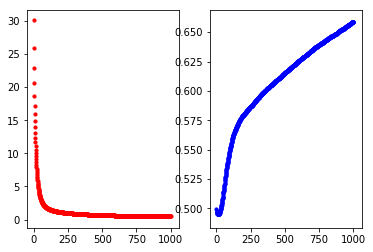

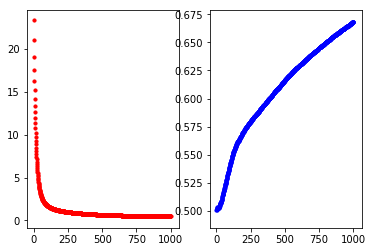

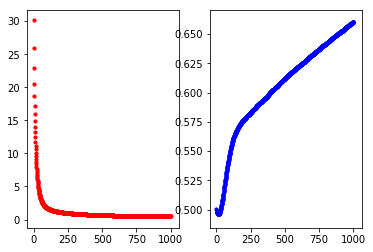

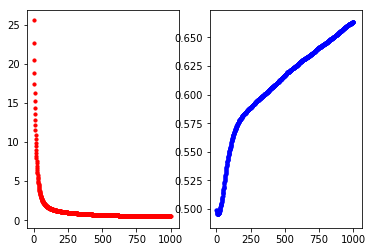

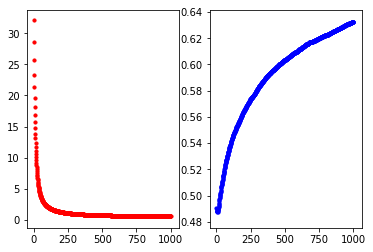

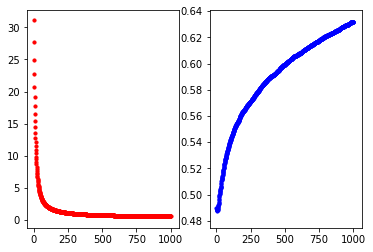

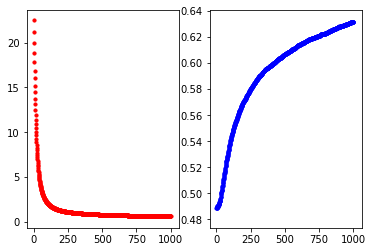

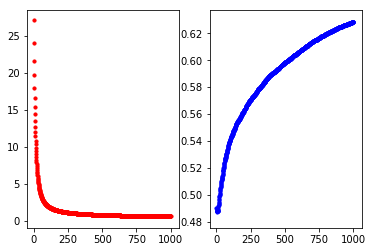

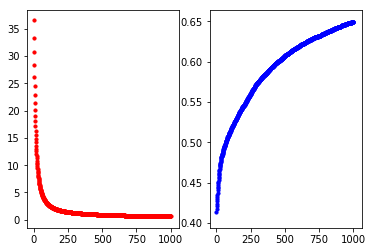

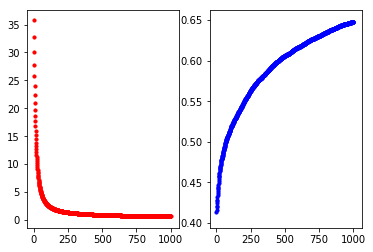

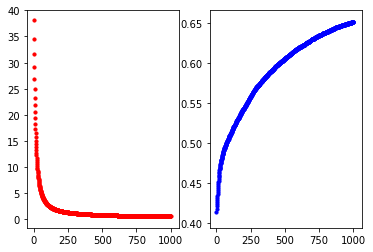

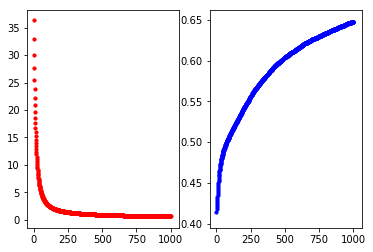

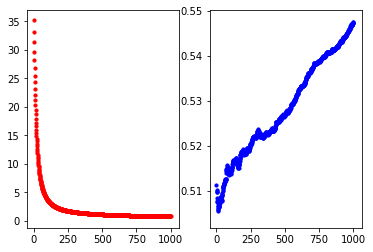

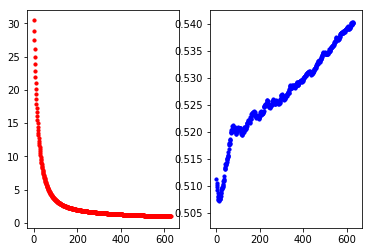

In [7]:
least_squares_GD_cross_val_res = []
for i, tx in enumerate(preprocessed_data_train):
    least_squares_GD_cross_val_res.append(cross_validate(least_squares_GD, tx, all_ys_train[i], epochs=1000, gamma=0.005, model_name='least_squares_GD'))
    
least_squares_GD_cross_val_res

### Least Squares SGD
The best results are obtained by not augmenting features and by using a learning rate = 0.005

Gradient Descent: step 1 / 30 - Loss = 49.240019494584146
Accuracy: 0.5339498758907839
Gradient Descent: step 2 / 30 - Loss = 48.822611048453176
Accuracy: 0.5357381162089305
Gradient Descent: step 3 / 30 - Loss = 48.17637438244524
Accuracy: 0.5364053700589853
Gradient Descent: step 4 / 30 - Loss = 46.975978071881826
Accuracy: 0.539621533616249
Gradient Descent: step 5 / 30 - Loss = 41.75161781688143
Accuracy: 0.5542210478554461
Gradient Descent: step 6 / 30 - Loss = 41.462963995787426
Accuracy: 0.5545546747804735
Gradient Descent: step 7 / 30 - Loss = 41.48157099475796
Accuracy: 0.5547681960124909
Gradient Descent: step 8 / 30 - Loss = 41.4377913588914
Accuracy: 0.554194357701444
Gradient Descent: step 9 / 30 - Loss = 39.368387009108055
Accuracy: 0.5591186911148477
Gradient Descent: step 10 / 30 - Loss = 37.75055947217288
Accuracy: 0.5535537940053914
Gradient Descent: step 11 / 30 - Loss = 36.375747252695696
Accuracy: 0.547548509354899
Gradient Descent: step 12 / 30 - Loss = 36.3701400

Accuracy: 0.5609336215869966
Gradient Descent: step 14 / 30 - Loss = 21.6068989627663
Accuracy: 0.5631755945231804
Gradient Descent: step 15 / 30 - Loss = 21.3355817027759
Accuracy: 0.5629487282141618
Gradient Descent: step 16 / 30 - Loss = 21.315063303828232
Accuracy: 0.5572770704886967
Gradient Descent: step 17 / 30 - Loss = 21.307326266384663
Accuracy: 0.5605599594309659
Gradient Descent: step 18 / 30 - Loss = 20.73882708620624
Accuracy: 0.5587717191128193
Gradient Descent: step 19 / 30 - Loss = 20.70292484942626
Accuracy: 0.5609202765099954
Gradient Descent: step 20 / 30 - Loss = 20.712199627637062
Accuracy: 0.5601329169669309
Gradient Descent: step 21 / 30 - Loss = 20.927729015205482
Accuracy: 0.5616809458990578
Gradient Descent: step 22 / 30 - Loss = 20.836579560015895
Accuracy: 0.5672324979315131
Gradient Descent: step 23 / 30 - Loss = 20.765147664349666
Accuracy: 0.5655777083833774
Gradient Descent: step 24 / 30 - Loss = 20.69518536505473
Accuracy: 0.5630154535991673
Gradient D

Gradient Descent: step 17 / 30 - Loss = 14.396345780255926
Accuracy: 0.5264499426161688
Gradient Descent: step 18 / 30 - Loss = 14.442181603400396
Accuracy: 0.5278244855472816
Gradient Descent: step 19 / 30 - Loss = 14.370004528156835
Accuracy: 0.5281180772413057
Gradient Descent: step 20 / 30 - Loss = 129.71290500450252
Accuracy: 0.41469826780900526
Gradient Descent: step 21 / 30 - Loss = 126.07600340111091
Accuracy: 0.4205701016894868
Gradient Descent: step 22 / 30 - Loss = 117.93764881173483
Accuracy: 0.417914431366269
Gradient Descent: step 23 / 30 - Loss = 117.30779516250769
Accuracy: 0.41264312595083674
Gradient Descent: step 24 / 30 - Loss = 112.54852539030448
Accuracy: 0.4134705207249046
Gradient Descent: step 25 / 30 - Loss = 109.6863888919527
Accuracy: 0.41495182427202604
Gradient Descent: step 26 / 30 - Loss = 109.55679284558423
Accuracy: 0.4158192542770972
Gradient Descent: step 27 / 30 - Loss = 109.4292200828896
Accuracy: 0.4150318947340326
Gradient Descent: step 28 / 30 -

Gradient Descent: step 13 / 30 - Loss = 30.508629840578585
Accuracy: 0.5353244188218966
Gradient Descent: step 14 / 30 - Loss = 30.47224076291178
Accuracy: 0.5368457576000214
Gradient Descent: step 15 / 30 - Loss = 30.336919786739248
Accuracy: 0.5438652681025969
Gradient Descent: step 16 / 30 - Loss = 30.3382929768954
Accuracy: 0.544012063949609
Gradient Descent: step 17 / 30 - Loss = 30.402887832723835
Accuracy: 0.5480823124349428
Gradient Descent: step 18 / 30 - Loss = 30.41913159990069
Accuracy: 0.5535404489283903
Gradient Descent: step 19 / 30 - Loss = 30.12145031907585
Accuracy: 0.5563028798676168
Gradient Descent: step 20 / 30 - Loss = 30.227674668423106
Accuracy: 0.5524594976913016
Gradient Descent: step 21 / 30 - Loss = 30.241950361323646
Accuracy: 0.553647209544399
Gradient Descent: step 22 / 30 - Loss = 30.408099372223827
Accuracy: 0.5494835455200576
Gradient Descent: step 23 / 30 - Loss = 29.997513221987518
Accuracy: 0.5491232284410281
Gradient Descent: step 24 / 30 - Loss =

Gradient Descent: step 21 / 30 - Loss = 31.244084196620598
Accuracy: 0.5674193290095284
Gradient Descent: step 22 / 30 - Loss = 31.65695495203113
Accuracy: 0.567219152854512
Gradient Descent: step 23 / 30 - Loss = 28.712493178982527
Accuracy: 0.5742386633570876
Gradient Descent: step 24 / 30 - Loss = 28.484950183374117
Accuracy: 0.5656310886913818
Gradient Descent: step 25 / 30 - Loss = 28.564613689395085
Accuracy: 0.5624816505191235
Gradient Descent: step 26 / 30 - Loss = 28.47775006361225
Accuracy: 0.5643633063762777
Gradient Descent: step 27 / 30 - Loss = 28.43872016535544
Accuracy: 0.5648303840713161
Gradient Descent: step 28 / 30 - Loss = 28.35748606497529
Accuracy: 0.5652574265353512
Gradient Descent: step 29 / 30 - Loss = 28.300637180916283
Accuracy: 0.5632957002161902
Gradient Descent: step 30 / 30 - Loss = 28.2768716994234
Accuracy: 0.5630955240611738
Gradient Descent: step 20 / 30 - Loss = 28.389920057625655
Accuracy: 0.5688872874796488
Gradient Descent: step 21 / 30 - Loss =

Accuracy: 0.5571436197186858
Gradient Descent: step 20 / 30 - Loss = 16.5160221145435
Accuracy: 0.5576507326447273
Gradient Descent: step 21 / 30 - Loss = 16.07787943144159
Accuracy: 0.5631622494461793
Gradient Descent: step 22 / 30 - Loss = 15.944573296424688
Accuracy: 0.5716497184188752
Gradient Descent: step 23 / 30 - Loss = 15.620386325595033
Accuracy: 0.5681933434755918
Gradient Descent: step 24 / 30 - Loss = 15.573583766580944
Accuracy: 0.5678330263965623
Gradient Descent: step 25 / 30 - Loss = 15.591864123126385
Accuracy: 0.5674326740865295
Gradient Descent: step 26 / 30 - Loss = 13.306950119052495
Accuracy: 0.5651373208423413
Gradient Descent: step 27 / 30 - Loss = 13.088041644105825
Accuracy: 0.5597859449649024
Gradient Descent: step 28 / 30 - Loss = 12.574053019635542
Accuracy: 0.5597859449649024
Gradient Descent: step 29 / 30 - Loss = 12.640746973183028
Accuracy: 0.5607201003549791
Gradient Descent: step 30 / 30 - Loss = 12.564416935452616
Accuracy: 0.5610670723570075
Gradie

Accuracy: 0.5081271518936664
Gradient Descent: step 6 / 30 - Loss = 7.642689592781306
Accuracy: 0.5082739477406785
Gradient Descent: step 7 / 30 - Loss = 7.648267929803772
Accuracy: 0.5091413777457496
Gradient Descent: step 8 / 30 - Loss = 7.645198472993176
Accuracy: 0.5075132783516161
Gradient Descent: step 9 / 30 - Loss = 7.588463569306305
Accuracy: 0.5074198628126084
Gradient Descent: step 10 / 30 - Loss = 7.5788236176124455
Accuracy: 0.506779299116556
Gradient Descent: step 11 / 30 - Loss = 7.627483597808991
Accuracy: 0.51060933621587
Gradient Descent: step 12 / 30 - Loss = 7.614566257753441
Accuracy: 0.5127979288440494
Gradient Descent: step 13 / 30 - Loss = 7.643322963427805
Accuracy: 0.5115835268369499
Gradient Descent: step 14 / 30 - Loss = 7.726582483193563
Accuracy: 0.5177622974884565
Gradient Descent: step 15 / 30 - Loss = 7.63925328773632
Accuracy: 0.5152267328582486
Gradient Descent: step 16 / 30 - Loss = 7.634248283219171
Accuracy: 0.5150799370112366
Gradient Descent: ste

Gradient Descent: step 10 / 30 - Loss = 10.164790941743815
Accuracy: 0.5213521232017508
Gradient Descent: step 11 / 30 - Loss = 10.142963451454404
Accuracy: 0.5259695198441295
Gradient Descent: step 12 / 30 - Loss = 10.014576795576676
Accuracy: 0.5328021992686898
Gradient Descent: step 13 / 30 - Loss = 10.036567180205434
Accuracy: 0.5307737475645234
Gradient Descent: step 14 / 30 - Loss = 10.032200164822743
Accuracy: 0.5217124402807805
Gradient Descent: step 15 / 30 - Loss = 9.87224353631288
Accuracy: 0.5217124402807805
Gradient Descent: step 16 / 30 - Loss = 9.855703453282116
Accuracy: 0.5158139162462967
Gradient Descent: step 17 / 30 - Loss = 9.725624904042727
Accuracy: 0.5174153254864281
Gradient Descent: step 18 / 30 - Loss = 9.715503196682056
Accuracy: 0.5169882830223931
Gradient Descent: step 19 / 30 - Loss = 9.702159246491448
Accuracy: 0.5171884591774094
Gradient Descent: step 20 / 30 - Loss = 9.69743462288814
Accuracy: 0.5197907491926228
Gradient Descent: step 21 / 30 - Loss = 

Accuracy: 0.5746390156671204
Gradient Descent: step 28 / 30 - Loss = 7.082891954142576
Accuracy: 0.5804441241625964
Gradient Descent: step 29 / 30 - Loss = 7.124961136461151
Accuracy: 0.5734379587370219
Gradient Descent: step 30 / 30 - Loss = 7.101392748474949
Accuracy: 0.5699949288707395
Gradient Descent: step 14 / 30 - Loss = 7.096472933111684
Accuracy: 0.5705153868737822
Gradient Descent: step 15 / 30 - Loss = 7.091527125587194
Accuracy: 0.5700616542557451
Gradient Descent: step 16 / 30 - Loss = 7.1080548992560555
Accuracy: 0.5731043318119946
Gradient Descent: step 17 / 30 - Loss = 7.114431339489343
Accuracy: 0.5730509515039902
Gradient Descent: step 18 / 30 - Loss = 7.108104729202159
Accuracy: 0.5747724664371313
Gradient Descent: step 19 / 30 - Loss = 7.11601175117184
Accuracy: 0.5777350735313743
Gradient Descent: step 20 / 30 - Loss = 6.845015043776269
Accuracy: 0.570341900872768
Gradient Descent: step 21 / 30 - Loss = 6.833792294553377
Accuracy: 0.5756799316732057
Gradient Descen

Accuracy: 0.48226439266554566
Gradient Descent: step 30 / 30 - Loss = 6.898658558499304
Accuracy: 0.489951157018176
Gradient Descent: step 21 / 30 - Loss = 6.95742699545551
Accuracy: 0.4871887260789495
Gradient Descent: step 22 / 30 - Loss = 7.014843794500891
Accuracy: 0.4763525235540609
Gradient Descent: step 23 / 30 - Loss = 7.090307401580253
Accuracy: 0.46275389008994583
Gradient Descent: step 24 / 30 - Loss = 7.064308805142472
Accuracy: 0.4632209677849841
Gradient Descent: step 25 / 30 - Loss = 7.060810036960926
Accuracy: 0.46383484132703445
Gradient Descent: step 26 / 30 - Loss = 7.0999020240680615
Accuracy: 0.4638481864040356
Gradient Descent: step 27 / 30 - Loss = 6.90017692449018
Accuracy: 0.4661301945712227
Gradient Descent: step 28 / 30 - Loss = 6.89398026311011
Accuracy: 0.4667574131902741
Gradient Descent: step 29 / 30 - Loss = 6.894092588239538
Accuracy: 0.4631142071689754
Gradient Descent: step 30 / 30 - Loss = 6.894117983499941
Accuracy: 0.4630074465529666
Gradient Desce

Gradient Descent: step 17 / 30 - Loss = 30.473440159279082
Accuracy: 0.5670990471615022
Gradient Descent: step 18 / 30 - Loss = 30.889525134121147
Accuracy: 0.5634558411402034
Gradient Descent: step 19 / 30 - Loss = 29.382571721509933
Accuracy: 0.5663917580804442
Gradient Descent: step 20 / 30 - Loss = 28.90528832209606
Accuracy: 0.579816905543545
Gradient Descent: step 21 / 30 - Loss = 28.633718848039223
Accuracy: 0.5759468332132276
Gradient Descent: step 22 / 30 - Loss = 28.72605994322253
Accuracy: 0.5726239090399552
Gradient Descent: step 23 / 30 - Loss = 28.682932665938107
Accuracy: 0.5726772893479596
Gradient Descent: step 24 / 30 - Loss = 28.69876333022212
Accuracy: 0.5763738756772626
Gradient Descent: step 25 / 30 - Loss = 28.6676532657829
Accuracy: 0.5753596498251795
Gradient Descent: step 26 / 30 - Loss = 25.099586930136656
Accuracy: 0.5152534230122507
Gradient Descent: step 27 / 30 - Loss = 24.976630954084207
Accuracy: 0.5149464862412256
Gradient Descent: step 28 / 30 - Loss 

Gradient Descent: step 6 / 30 - Loss = 22.938589158111345
Accuracy: 0.5029359169402408
Gradient Descent: step 7 / 30 - Loss = 22.94197805553181
Accuracy: 0.5042036992553447
Gradient Descent: step 8 / 30 - Loss = 22.91179425745446
Accuracy: 0.5120772946859904
Gradient Descent: step 9 / 30 - Loss = 22.907956395559577
Accuracy: 0.5123842314570155
Gradient Descent: step 10 / 30 - Loss = 22.935078794443946
Accuracy: 0.5174953959484346
Gradient Descent: step 11 / 30 - Loss = 22.9388748259636
Accuracy: 0.5172551845624149
Gradient Descent: step 12 / 30 - Loss = 22.65646608276281
Accuracy: 0.5121039848399925
Gradient Descent: step 13 / 30 - Loss = 22.640047664605493
Accuracy: 0.5083139829716817
Gradient Descent: step 14 / 30 - Loss = 23.06587300465919
Accuracy: 0.4140843942669549
Gradient Descent: step 15 / 30 - Loss = 23.001677265282257
Accuracy: 0.41567245843008516
Gradient Descent: step 16 / 30 - Loss = 22.908030396238527
Accuracy: 0.41375076734192756
Gradient Descent: step 17 / 30 - Loss = 

Accuracy: 0.5620412629780874
Gradient Descent: step 15 / 30 - Loss = 19.566905270076813
Accuracy: 0.5650439053033336
Gradient Descent: step 16 / 30 - Loss = 19.434604202027757
Accuracy: 0.5693276750206848
Gradient Descent: step 17 / 30 - Loss = 19.17340770425272
Accuracy: 0.574852536899138
Gradient Descent: step 18 / 30 - Loss = 19.148876842980457
Accuracy: 0.5708890490298129
Gradient Descent: step 19 / 30 - Loss = 19.144892627284175
Accuracy: 0.570902394106814
Gradient Descent: step 20 / 30 - Loss = 19.17466493490553
Accuracy: 0.5754797555181893
Gradient Descent: step 21 / 30 - Loss = 19.710927149006814
Accuracy: 0.5565964715616409
Gradient Descent: step 22 / 30 - Loss = 19.60031322206941
Accuracy: 0.5556623161715644
Gradient Descent: step 23 / 30 - Loss = 19.748764476657232
Accuracy: 0.5508447433741692
Gradient Descent: step 24 / 30 - Loss = 19.661911112337968
Accuracy: 0.5484159393599701
Gradient Descent: step 25 / 30 - Loss = 19.595898970413025
Accuracy: 0.5510582646061868
Gradient

Accuracy: 0.5520458003042678
Gradient Descent: step 19 / 30 - Loss = 18.994886495558475
Accuracy: 0.5553954146315424
Gradient Descent: step 20 / 30 - Loss = 19.0314020169689
Accuracy: 0.5575573171057197
Gradient Descent: step 21 / 30 - Loss = 19.11148443705338
Accuracy: 0.5790428910774815
Gradient Descent: step 22 / 30 - Loss = 19.1208345129998
Accuracy: 0.5790562361544827
Gradient Descent: step 23 / 30 - Loss = 19.10687440474588
Accuracy: 0.5818853924787146
Gradient Descent: step 24 / 30 - Loss = 18.850864461098176
Accuracy: 0.57670750260229
Gradient Descent: step 25 / 30 - Loss = 18.71152321745017
Accuracy: 0.574865881976139
Gradient Descent: step 26 / 30 - Loss = 18.747656673934053
Accuracy: 0.5753863399791816
Gradient Descent: step 27 / 30 - Loss = 18.752679865236296
Accuracy: 0.5759201430592255
Gradient Descent: step 28 / 30 - Loss = 22.11108390340787
Accuracy: 0.5435049510235674
Gradient Descent: step 29 / 30 - Loss = 22.146377856163408
Accuracy: 0.5426909013265007
Gradient Desce

Gradient Descent: step 26 / 30 - Loss = 27.768986161880367
Accuracy: 0.6250567165772547
Gradient Descent: step 27 / 30 - Loss = 27.666996868745365
Accuracy: 0.626524675047375
Gradient Descent: step 28 / 30 - Loss = 27.63287374648421
Accuracy: 0.6300210852216618
Gradient Descent: step 29 / 30 - Loss = 27.660389626008786
Accuracy: 0.643085915605733
Gradient Descent: step 30 / 30 - Loss = 27.64103729880371
Accuracy: 0.6429658099127232
Gradient Descent: step 24 / 30 - Loss = 27.62076690787387
Accuracy: 0.6409507032855579
Gradient Descent: step 25 / 30 - Loss = 27.550522330274852
Accuracy: 0.6386820401953719
Gradient Descent: step 26 / 30 - Loss = 27.561918554494067
Accuracy: 0.6374943283422745
Gradient Descent: step 27 / 30 - Loss = 27.5627641654264
Accuracy: 0.6383617583473457
Gradient Descent: step 28 / 30 - Loss = 27.53090687525915
Accuracy: 0.638975631889396
Gradient Descent: step 29 / 30 - Loss = 27.5516456503041
Accuracy: 0.6430458803747298
Gradient Descent: step 30 / 30 - Loss = 27.

Accuracy: 0.5515920676862306
Gradient Descent: step 13 / 30 - Loss = 20.92532404304832
Accuracy: 0.5448794939546802
Gradient Descent: step 14 / 30 - Loss = 20.63967785910503
Accuracy: 0.5290922678623856
Gradient Descent: step 15 / 30 - Loss = 20.62170131994021
Accuracy: 0.5293858595564096
Gradient Descent: step 16 / 30 - Loss = 20.651887438531237
Accuracy: 0.5292924440174019
Gradient Descent: step 17 / 30 - Loss = 20.53064919298277
Accuracy: 0.5235140256759282
Gradient Descent: step 18 / 30 - Loss = 20.527748308953534
Accuracy: 0.5231803987509008
Gradient Descent: step 19 / 30 - Loss = 20.51801474601772
Accuracy: 0.5229401873648811
Gradient Descent: step 20 / 30 - Loss = 20.613515666370034
Accuracy: 0.5326687484986788
Gradient Descent: step 21 / 30 - Loss = 20.74616257242343
Accuracy: 0.5445992473376572
Gradient Descent: step 22 / 30 - Loss = 20.689349534584302
Accuracy: 0.5442656204126298
Gradient Descent: step 23 / 30 - Loss = 20.68563873230502
Accuracy: 0.5423305842474712
Gradient D

Gradient Descent: step 7 / 30 - Loss = 21.568091120843214
Accuracy: 0.49935943630394747
Gradient Descent: step 8 / 30 - Loss = 21.453179054895102
Accuracy: 0.5016814797021378
Gradient Descent: step 9 / 30 - Loss = 21.324334941527297
Accuracy: 0.5032695438652681
Gradient Descent: step 10 / 30 - Loss = 21.544492905608543
Accuracy: 0.4931406304214375
Gradient Descent: step 11 / 30 - Loss = 21.205123246028524
Accuracy: 0.494768729815571
Gradient Descent: step 12 / 30 - Loss = 20.455838409374127
Accuracy: 0.49667707582672754
Gradient Descent: step 13 / 30 - Loss = 21.11603552783703
Accuracy: 0.4938746096564977
Gradient Descent: step 14 / 30 - Loss = 21.087886589343874
Accuracy: 0.49330077134545064
Gradient Descent: step 15 / 30 - Loss = 21.05495394484257
Accuracy: 0.49540929351162355
Gradient Descent: step 16 / 30 - Loss = 21.004466595189065
Accuracy: 0.4937411588864868
Gradient Descent: step 17 / 30 - Loss = 20.75409271860161
Accuracy: 0.5034563749432834
Gradient Descent: step 18 / 30 - Lo

Accuracy: 0.5783756372274268
Gradient Descent: step 21 / 30 - Loss = 21.83152922700514
Accuracy: 0.5778818693783863
Gradient Descent: step 22 / 30 - Loss = 21.76256178539323
Accuracy: 0.5766274321402834
Gradient Descent: step 23 / 30 - Loss = 22.00112811905047
Accuracy: 0.5846745135719433
Gradient Descent: step 24 / 30 - Loss = 21.898445119248056
Accuracy: 0.5843675768009181
Gradient Descent: step 25 / 30 - Loss = 21.92458086289631
Accuracy: 0.586049056503056
Gradient Descent: step 26 / 30 - Loss = 22.05510861864453
Accuracy: 0.577414791683348
Gradient Descent: step 27 / 30 - Loss = 22.043597454427434
Accuracy: 0.57853577815144
Gradient Descent: step 28 / 30 - Loss = 22.047031266820944
Accuracy: 0.5783089118424213
Gradient Descent: step 29 / 30 - Loss = 22.118143320738675
Accuracy: 0.5760802839832386
Gradient Descent: step 30 / 30 - Loss = 22.25355718553608
Accuracy: 0.5752261990551686
Gradient Descent: step 12 / 30 - Loss = 22.18294693246841
Accuracy: 0.5740117970480689
Gradient Desce

Gradient Descent: step 17 / 30 - Loss = 17.717970948345304
Accuracy: 0.5287186057063549
Gradient Descent: step 18 / 30 - Loss = 17.582249745569655
Accuracy: 0.5271305415432247
Gradient Descent: step 19 / 30 - Loss = 17.588140142861043
Accuracy: 0.5250620546080551
Gradient Descent: step 20 / 30 - Loss = 17.412206141718475
Accuracy: 0.5208450102757093
Gradient Descent: step 21 / 30 - Loss = 17.567286453438932
Accuracy: 0.5187364881095364
Gradient Descent: step 22 / 30 - Loss = 17.504916092169278
Accuracy: 0.523634131368938
Gradient Descent: step 23 / 30 - Loss = 17.61811303004519
Accuracy: 0.5291723383243921
Gradient Descent: step 24 / 30 - Loss = 17.52468781905889
Accuracy: 0.5227933915178691
Gradient Descent: step 25 / 30 - Loss = 17.453731114883634
Accuracy: 0.5207916299677049
Gradient Descent: step 26 / 30 - Loss = 17.440128844347655
Accuracy: 0.5188699388795474
Gradient Descent: step 27 / 30 - Loss = 17.45757049212867
Accuracy: 0.5265700483091788
Gradient Descent: step 28 / 30 - Los

Accuracy: 0.5194170870365922
Gradient Descent: step 29 / 30 - Loss = 16.808470586582946
Accuracy: 0.5275709290842608
Gradient Descent: step 30 / 30 - Loss = 16.88785033444239
Accuracy: 0.5256492379961032
Gradient Descent: step 28 / 30 - Loss = 16.852638807451104
Accuracy: 0.5246617022980222
Gradient Descent: step 29 / 30 - Loss = 16.692364961344808
Accuracy: 0.5196572984226119
Gradient Descent: step 30 / 30 - Loss = 16.73742235236594
Accuracy: 0.5227400112098647
Gradient Descent: step 29 / 30 - Loss = 16.770205847431136
Accuracy: 0.5228868070568767
Gradient Descent: step 30 / 30 - Loss = 16.793693742958826
Accuracy: 0.5222462433608241
Gradient Descent: step 30 / 30 - Loss = 16.762891912932535
Accuracy: 0.5232204339819041
Gradient Descent: step 1 / 30 - Loss = 35.59523713309566
Accuracy: 0.5416967571099419
Gradient Descent: step 2 / 30 - Loss = 33.73131400070893
Accuracy: 0.5562949207331751
Gradient Descent: step 3 / 30 - Loss = 34.41915773233846
Accuracy: 0.5547130231438495
Gradient De

Gradient Descent: step 4 / 30 - Loss = 22.981803574434792
Accuracy: 0.5928677052168231
Gradient Descent: step 5 / 30 - Loss = 22.61218977249005
Accuracy: 0.5906152206059355
Gradient Descent: step 6 / 30 - Loss = 22.508108926972888
Accuracy: 0.5919907837270882
Gradient Descent: step 7 / 30 - Loss = 22.662746462428544
Accuracy: 0.591767254719901
Gradient Descent: step 8 / 30 - Loss = 22.566143543156084
Accuracy: 0.5924550362804774
Gradient Descent: step 9 / 30 - Loss = 21.95923514570814
Accuracy: 0.606227862031019
Gradient Descent: step 10 / 30 - Loss = 20.05487130492633
Accuracy: 0.5962894184806905
Gradient Descent: step 11 / 30 - Loss = 19.6820802475293
Accuracy: 0.592145534578218
Gradient Descent: step 12 / 30 - Loss = 19.650903224560675
Accuracy: 0.5903573025207194
Gradient Descent: step 13 / 30 - Loss = 19.881299876664578
Accuracy: 0.5930224560679528
Gradient Descent: step 14 / 30 - Loss = 20.418247542583067
Accuracy: 0.5917156711028577
Gradient Descent: step 15 / 30 - Loss = 20.227

Accuracy: 0.5641528250627601
Gradient Descent: step 29 / 30 - Loss = 13308.527753688537
Accuracy: 0.5622614257711751
Gradient Descent: step 30 / 30 - Loss = 13330.893091724785
Accuracy: 0.5630007909487946
Gradient Descent: step 8 / 30 - Loss = 13355.834159347614
Accuracy: 0.5625365383954056
Gradient Descent: step 9 / 30 - Loss = 13346.263895961325
Accuracy: 0.5668695622270367
Gradient Descent: step 10 / 30 - Loss = 13340.23446022148
Accuracy: 0.5661301970494171
Gradient Descent: step 11 / 30 - Loss = 13251.337514162882
Accuracy: 0.5579455964785585
Gradient Descent: step 12 / 30 - Loss = 13185.448506683982
Accuracy: 0.5550225248461089
Gradient Descent: step 13 / 30 - Loss = 13187.959243467918
Accuracy: 0.5536125726469273
Gradient Descent: step 14 / 30 - Loss = 13186.807433629576
Accuracy: 0.5564840606623337
Gradient Descent: step 15 / 30 - Loss = 13179.158759355705
Accuracy: 0.5566560060524778
Gradient Descent: step 16 / 30 - Loss = 13183.356561470124
Accuracy: 0.5557962791017573
Gradie

Gradient Descent: step 23 / 30 - Loss = 16624.179811283033
Accuracy: 0.4833384916950377
Gradient Descent: step 24 / 30 - Loss = 16463.73287065424
Accuracy: 0.4826163210564325
Gradient Descent: step 25 / 30 - Loss = 16323.989767403906
Accuracy: 0.48198012311289934
Gradient Descent: step 26 / 30 - Loss = 16347.310088572032
Accuracy: 0.4824443756662884
Gradient Descent: step 27 / 30 - Loss = 16244.820852026429
Accuracy: 0.4957701434024554
Gradient Descent: step 28 / 30 - Loss = 16024.759963887835
Accuracy: 0.4939131331888992
Gradient Descent: step 29 / 30 - Loss = 15922.022035879485
Accuracy: 0.49460091474947554
Gradient Descent: step 30 / 30 - Loss = 15655.775178709273
Accuracy: 0.48959730389628253
Gradient Descent: step 13 / 30 - Loss = 15485.947363798201
Accuracy: 0.4927610990749338
Gradient Descent: step 14 / 30 - Loss = 15313.975613218596
Accuracy: 0.49025069637883006
Gradient Descent: step 15 / 30 - Loss = 13496.284259135666
Accuracy: 0.4836136043192682
Gradient Descent: step 16 / 3

Accuracy: 0.4282815777709
Gradient Descent: step 28 / 30 - Loss = 4186135.362065238
Accuracy: 0.4274390453591939
Gradient Descent: step 29 / 30 - Loss = 3961187.535069523
Accuracy: 0.4300698098283985
Gradient Descent: step 30 / 30 - Loss = 3925968.328850539
Accuracy: 0.42293407613741874
Gradient Descent: step 19 / 30 - Loss = 3833642.1037356644
Accuracy: 0.41952955741256576
Gradient Descent: step 20 / 30 - Loss = 3829531.475195185
Accuracy: 0.41925444478833523
Gradient Descent: step 21 / 30 - Loss = 3778542.98904924
Accuracy: 0.4768905395646343
Gradient Descent: step 22 / 30 - Loss = 3738670.385309242
Accuracy: 0.47226520856975823
Gradient Descent: step 23 / 30 - Loss = 3549351.4664326403
Accuracy: 0.46542178204202345
Gradient Descent: step 24 / 30 - Loss = 3510449.645560974
Accuracy: 0.4637711062966402
Gradient Descent: step 25 / 30 - Loss = 3438305.2029318977
Accuracy: 0.46693490147529143
Gradient Descent: step 26 / 30 - Loss = 3422572.4168195063
Accuracy: 0.46793218473812714
Gradien

Gradient Descent: step 21 / 30 - Loss = 926.7948436367716
Accuracy: 0.3997214484679666
Gradient Descent: step 22 / 30 - Loss = 26674.43687091209
Accuracy: 0.6109047766429382
Gradient Descent: step 23 / 30 - Loss = 25735.316922192025
Accuracy: 0.6099246879191169
Gradient Descent: step 24 / 30 - Loss = 24690.07759093675
Accuracy: 0.6117301145156299
Gradient Descent: step 25 / 30 - Loss = 23985.619000712017
Accuracy: 0.6141545445166615
Gradient Descent: step 26 / 30 - Loss = 23738.700688698253
Accuracy: 0.6190205990577392
Gradient Descent: step 27 / 30 - Loss = 23547.235194474262
Accuracy: 0.6170948106881254
Gradient Descent: step 28 / 30 - Loss = 22169.195417737054
Accuracy: 0.6036142921008287
Gradient Descent: step 29 / 30 - Loss = 21548.95128402928
Accuracy: 0.6065717528113072
Gradient Descent: step 30 / 30 - Loss = 21651.41410452923
Accuracy: 0.599040544722996
Gradient Descent: step 2 / 30 - Loss = 21592.214214284322
Accuracy: 0.5994532136593418
Gradient Descent: step 3 / 30 - Loss = 

Gradient Descent: step 5 / 30 - Loss = 5219.752614061338
Accuracy: 0.48617559063241517
Gradient Descent: step 6 / 30 - Loss = 4994.975964583962
Accuracy: 0.497352040991781
Gradient Descent: step 7 / 30 - Loss = 4953.152578917223
Accuracy: 0.49864163141786166
Gradient Descent: step 8 / 30 - Loss = 4896.54429990069
Accuracy: 0.496595481275147
Gradient Descent: step 9 / 30 - Loss = 4803.727891736777
Accuracy: 0.49948416382956773
Gradient Descent: step 10 / 30 - Loss = 4795.578904980317
Accuracy: 0.500550225248461
Gradient Descent: step 11 / 30 - Loss = 4834.134164911144
Accuracy: 0.4912307851026514
Gradient Descent: step 12 / 30 - Loss = 3953.9652428404884
Accuracy: 0.519670552632484
Gradient Descent: step 13 / 30 - Loss = 3454.916261297848
Accuracy: 0.48774029368272637
Gradient Descent: step 14 / 30 - Loss = 3453.887051244364
Accuracy: 0.48220365212008665
Gradient Descent: step 15 / 30 - Loss = 3360.1603771855007
Accuracy: 0.47076928367550464
Gradient Descent: step 16 / 30 - Loss = 3372.

Gradient Descent: step 9 / 30 - Loss = 2061.4089822527526
Accuracy: 0.5036108531930259
Gradient Descent: step 10 / 30 - Loss = 2057.6278010577116
Accuracy: 0.5031809897176657
Gradient Descent: step 11 / 30 - Loss = 2034.1646535838624
Accuracy: 0.5049004436191066
Gradient Descent: step 12 / 30 - Loss = 2068.251493240979
Accuracy: 0.49497919460779255
Gradient Descent: step 13 / 30 - Loss = 2062.0668916867444
Accuracy: 0.4952199181539943
Gradient Descent: step 14 / 30 - Loss = 2090.9808840427477
Accuracy: 0.48424980226280134
Gradient Descent: step 15 / 30 - Loss = 2074.237776637385
Accuracy: 0.4885484370164036
Gradient Descent: step 16 / 30 - Loss = 2011.2405331899074
Accuracy: 0.49191856666322775
Gradient Descent: step 17 / 30 - Loss = 2020.4305415676122
Accuracy: 0.4916262594999828
Gradient Descent: step 18 / 30 - Loss = 2006.5818894803706
Accuracy: 0.49436019120327385
Gradient Descent: step 19 / 30 - Loss = 2016.3171404100885
Accuracy: 0.48923621857697996
Gradient Descent: step 20 / 30

Accuracy: 0.5202895560370027
Gradient Descent: step 25 / 30 - Loss = 1970.6366283511502
Accuracy: 0.5203411396540458
Gradient Descent: step 26 / 30 - Loss = 1855.4822891688395
Accuracy: 0.5264108119261323
Gradient Descent: step 27 / 30 - Loss = 1822.9681716315429
Accuracy: 0.5267031190893772
Gradient Descent: step 28 / 30 - Loss = 1824.1575634975516
Accuracy: 0.5160596994394581
Gradient Descent: step 29 / 30 - Loss = 1833.023507157267
Accuracy: 0.5074452353932392
Gradient Descent: step 30 / 30 - Loss = 1681.4804945719632
Accuracy: 0.5077375425564841
Gradient Descent: step 14 / 30 - Loss = 1676.9097870701526
Accuracy: 0.5251899996561092
Gradient Descent: step 15 / 30 - Loss = 1681.4161700768036
Accuracy: 0.519756525327556
Gradient Descent: step 16 / 30 - Loss = 1680.2920096617304
Accuracy: 0.5180886550431583
Gradient Descent: step 17 / 30 - Loss = 1656.08397354349
Accuracy: 0.5171257608583514
Gradient Descent: step 18 / 30 - Loss = 1652.398773196632
Accuracy: 0.5177103751848413
Gradient

Accuracy: 0.5077547370954985
Gradient Descent: step 26 / 30 - Loss = 979.4384711991253
Accuracy: 0.5170397881632793
Gradient Descent: step 27 / 30 - Loss = 978.3551873597216
Accuracy: 0.5173664844045531
Gradient Descent: step 28 / 30 - Loss = 959.0115971671107
Accuracy: 0.5192578836961381
Gradient Descent: step 29 / 30 - Loss = 963.4910237297461
Accuracy: 0.5196361635544551
Gradient Descent: step 30 / 30 - Loss = 953.3663278724573
Accuracy: 0.5168334536951065
Gradient Descent: step 21 / 30 - Loss = 920.3044402416758
Accuracy: 0.5274940678840401
Gradient Descent: step 22 / 30 - Loss = 920.8678226719595
Accuracy: 0.5273049279548815
Gradient Descent: step 23 / 30 - Loss = 871.9969732999924
Accuracy: 0.522868736889164
Gradient Descent: step 24 / 30 - Loss = 873.2419948348896
Accuracy: 0.5229375150452217
Gradient Descent: step 25 / 30 - Loss = 901.5764513810024
Accuracy: 0.48729323566835175
Gradient Descent: step 26 / 30 - Loss = 862.3719581899737
Accuracy: 0.5039375494342997
Gradient Desce

Accuracy: 0.5056398087967262
Gradient Descent: step 9 / 30 - Loss = 35.42818491334813
Accuracy: 0.5066714811375908
Gradient Descent: step 10 / 30 - Loss = 35.13451162446884
Accuracy: 0.5061556449671585
Gradient Descent: step 11 / 30 - Loss = 34.5525609604862
Accuracy: 0.5072217063860518
Gradient Descent: step 12 / 30 - Loss = 33.94042619198297
Accuracy: 0.508700436741291
Gradient Descent: step 13 / 30 - Loss = 34.29572275494959
Accuracy: 0.5084597131950892
Gradient Descent: step 14 / 30 - Loss = 34.16639848932302
Accuracy: 0.5091646892946801
Gradient Descent: step 15 / 30 - Loss = 32.00894200506635
Accuracy: 0.5153375288008528
Gradient Descent: step 16 / 30 - Loss = 31.902248467161527
Accuracy: 0.5176244024897693
Gradient Descent: step 17 / 30 - Loss = 32.11742089746244
Accuracy: 0.5138416039065993
Gradient Descent: step 18 / 30 - Loss = 32.054122571448005
Accuracy: 0.5160425049004436
Gradient Descent: step 19 / 30 - Loss = 32.73771631086426
Accuracy: 0.5036796313490836
Gradient Descen

Accuracy: 0.534887719660236
Gradient Descent: step 25 / 30 - Loss = 189.57451533978838
Accuracy: 0.538085903916916
Gradient Descent: step 26 / 30 - Loss = 186.03931574643764
Accuracy: 0.5433302383163108
Gradient Descent: step 27 / 30 - Loss = 161.51709097308884
Accuracy: 0.47570411637264004
Gradient Descent: step 28 / 30 - Loss = 132.03245321794418
Accuracy: 0.4735032153787957
Gradient Descent: step 29 / 30 - Loss = 132.4009258698031
Accuracy: 0.47297018466934904
Gradient Descent: step 30 / 30 - Loss = 131.2999813974518
Accuracy: 0.4753430310533375
Gradient Descent: step 6 / 30 - Loss = 131.11128653080192
Accuracy: 0.4749991402730493
Gradient Descent: step 7 / 30 - Loss = 131.0050933537752
Accuracy: 0.47434574779050176
Gradient Descent: step 8 / 30 - Loss = 131.00136400981103
Accuracy: 0.47436294232951615
Gradient Descent: step 9 / 30 - Loss = 129.92640483044397
Accuracy: 0.47102720176072077
Gradient Descent: step 10 / 30 - Loss = 137.92424478661098
Accuracy: 0.4627222394167612
Gradien

Accuracy: 0.5157845868152274
Gradient Descent: step 29 / 30 - Loss = 82.3632676544249
Accuracy: 0.5156986141201554
Gradient Descent: step 30 / 30 - Loss = 82.4591148430712
Accuracy: 0.5236081020667835
Gradient Descent: step 10 / 30 - Loss = 81.41818757269112
Accuracy: 0.5170741772413081
Gradient Descent: step 11 / 30 - Loss = 81.36090756983512
Accuracy: 0.5166958973829912
Gradient Descent: step 12 / 30 - Loss = 81.51930614397416
Accuracy: 0.5209429485195501
Gradient Descent: step 13 / 30 - Loss = 81.47238294631931
Accuracy: 0.5223357061797174
Gradient Descent: step 14 / 30 - Loss = 80.4208214725104
Accuracy: 0.5144434127721036
Gradient Descent: step 15 / 30 - Loss = 80.30919329733285
Accuracy: 0.5123800680903745
Gradient Descent: step 16 / 30 - Loss = 80.31325130010917
Accuracy: 0.511898620997971
Gradient Descent: step 17 / 30 - Loss = 77.0213463284039
Accuracy: 0.5266687300113484
Gradient Descent: step 18 / 30 - Loss = 77.28091205645201
Accuracy: 0.5275972351181265
Gradient Descent: s

Gradient Descent: step 15 / 30 - Loss = 110.1122693106009
Accuracy: 0.5662849479005467
Gradient Descent: step 16 / 30 - Loss = 108.52839059311587
Accuracy: 0.5689501014477801
Gradient Descent: step 17 / 30 - Loss = 108.35745858531658
Accuracy: 0.567093091234224
Gradient Descent: step 18 / 30 - Loss = 106.7155485489785
Accuracy: 0.563980879672616
Gradient Descent: step 19 / 30 - Loss = 106.71624799293316
Accuracy: 0.563980879672616
Gradient Descent: step 20 / 30 - Loss = 107.0327980471906
Accuracy: 0.5661645861274459
Gradient Descent: step 21 / 30 - Loss = 104.81571394005502
Accuracy: 0.5661989752054747
Gradient Descent: step 22 / 30 - Loss = 100.85144000944163
Accuracy: 0.5776505381890712
Gradient Descent: step 23 / 30 - Loss = 100.8209404840539
Accuracy: 0.5777365108841432
Gradient Descent: step 24 / 30 - Loss = 100.11415653806066
Accuracy: 0.5762233914508752
Gradient Descent: step 25 / 30 - Loss = 99.76677039974129
Accuracy: 0.5760170569827023
Gradient Descent: step 26 / 30 - Loss = 

Accuracy: 0.39586987172873894
Gradient Descent: step 28 / 30 - Loss = 78.69908382957281
Accuracy: 0.39863819251005883
Gradient Descent: step 29 / 30 - Loss = 78.59746813650759
Accuracy: 0.39863819251005883
Gradient Descent: step 30 / 30 - Loss = 78.79413754557959
Accuracy: 0.39906805598541906
Gradient Descent: step 23 / 30 - Loss = 77.96449517994739
Accuracy: 0.40369338698029505
Gradient Descent: step 24 / 30 - Loss = 76.20715789033572
Accuracy: 0.4033494962000069
Gradient Descent: step 25 / 30 - Loss = 73.57398850615067
Accuracy: 0.4026101310223873
Gradient Descent: step 26 / 30 - Loss = 73.57194364016016
Accuracy: 0.402850854568589
Gradient Descent: step 27 / 30 - Loss = 70.84096424123358
Accuracy: 0.39834588534681387
Gradient Descent: step 28 / 30 - Loss = 69.9528451363081
Accuracy: 0.39454589222462944
Gradient Descent: step 29 / 30 - Loss = 69.94764923211399
Accuracy: 0.3945974758416727
Gradient Descent: step 30 / 30 - Loss = 69.34051845961577
Accuracy: 0.39525086832422024
Gradient

Gradient Descent: step 3 / 30 - Loss = 16.66338267045486
Accuracy: 0.5738505450668867
Gradient Descent: step 4 / 30 - Loss = 16.67902647188123
Accuracy: 0.5742632140032325
Gradient Descent: step 5 / 30 - Loss = 13.811883366009381
Accuracy: 0.5431410983871522
Gradient Descent: step 6 / 30 - Loss = 16.005817599993485
Accuracy: 0.5718043949241721
Gradient Descent: step 7 / 30 - Loss = 15.99687996202776
Accuracy: 0.5717528113071288
Gradient Descent: step 8 / 30 - Loss = 16.44573013769164
Accuracy: 0.5669899240001376
Gradient Descent: step 9 / 30 - Loss = 16.24534941511857
Accuracy: 0.575415248117198
Gradient Descent: step 10 / 30 - Loss = 15.95057300310672
Accuracy: 0.5775817600330135
Gradient Descent: step 11 / 30 - Loss = 16.141267321517162
Accuracy: 0.5821211183328175
Gradient Descent: step 12 / 30 - Loss = 15.845692749721978
Accuracy: 0.5807627497506792
Gradient Descent: step 13 / 30 - Loss = 15.506969612705696
Accuracy: 0.581639671240414
Gradient Descent: step 14 / 30 - Loss = 15.3278

Accuracy: 0.35991609064960967
Gradient Descent: step 28 / 30 - Loss = 28875.042147921635
Accuracy: 0.3540183637676674
Gradient Descent: step 29 / 30 - Loss = 28405.48156703245
Accuracy: 0.355514288661921
Gradient Descent: step 30 / 30 - Loss = 28072.118100788626
Accuracy: 0.35314144227793254
Gradient Descent: step 7 / 30 - Loss = 27954.786548890737
Accuracy: 0.3532961931290622
Gradient Descent: step 8 / 30 - Loss = 27641.44905232075
Accuracy: 0.3517486846177654
Gradient Descent: step 9 / 30 - Loss = 27636.384151402402
Accuracy: 0.35164551738367894
Gradient Descent: step 10 / 30 - Loss = 24998.564653324207
Accuracy: 0.3504934832697135
Gradient Descent: step 11 / 30 - Loss = 24985.466958888515
Accuracy: 0.35002923071632447
Gradient Descent: step 12 / 30 - Loss = 24925.597476870065
Accuracy: 0.3538980019945665
Gradient Descent: step 13 / 30 - Loss = 24931.575151706293
Accuracy: 0.3546545617112005
Gradient Descent: step 14 / 30 - Loss = 24978.858257559743
Accuracy: 0.35338216582413423
Grad

Accuracy: 0.4971285119845937
Gradient Descent: step 13 / 30 - Loss = 13321.822030799458
Accuracy: 0.49785068262319887
Gradient Descent: step 14 / 30 - Loss = 13284.939765335997
Accuracy: 0.49986244368788474
Gradient Descent: step 15 / 30 - Loss = 13243.118601778811
Accuracy: 0.5013583685821383
Gradient Descent: step 16 / 30 - Loss = 13178.45154150172
Accuracy: 0.506516730286461
Gradient Descent: step 17 / 30 - Loss = 13253.875356484083
Accuracy: 0.5008081433336772
Gradient Descent: step 18 / 30 - Loss = 13213.746154998236
Accuracy: 0.5016850648234121
Gradient Descent: step 19 / 30 - Loss = 13130.474340191276
Accuracy: 0.5032841569517521
Gradient Descent: step 20 / 30 - Loss = 13146.93866656018
Accuracy: 0.5028542934763919
Gradient Descent: step 21 / 30 - Loss = 13144.953390286044
Accuracy: 0.502269679149902
Gradient Descent: step 22 / 30 - Loss = 13107.202445621813
Accuracy: 0.5032325733347089
Gradient Descent: step 23 / 30 - Loss = 13129.842872996422
Accuracy: 0.5025104026961037
Gradi

Accuracy: 0.554523883214691
Gradient Descent: step 27 / 30 - Loss = 10581.323961215137
Accuracy: 0.5541971869734172
Gradient Descent: step 28 / 30 - Loss = 10527.800247081932
Accuracy: 0.5555383610165412
Gradient Descent: step 29 / 30 - Loss = 10836.305941526205
Accuracy: 0.5464252553389044
Gradient Descent: step 30 / 30 - Loss = 10655.601864638867
Accuracy: 0.5516867842773135
Gradient Descent: step 17 / 30 - Loss = 10613.168837560663
Accuracy: 0.5535781835688985
Gradient Descent: step 18 / 30 - Loss = 10630.852613081084
Accuracy: 0.5456343065442415
Gradient Descent: step 19 / 30 - Loss = 10630.496435536159
Accuracy: 0.5437257127136421
Gradient Descent: step 20 / 30 - Loss = 15004790.653271722
Accuracy: 0.5590804360535094
Gradient Descent: step 21 / 30 - Loss = 14442881.588628298
Accuracy: 0.5673338147804258
Gradient Descent: step 22 / 30 - Loss = 14142518.990871385
Accuracy: 0.568984490525809
Gradient Descent: step 23 / 30 - Loss = 13940347.433593193
Accuracy: 0.5665944496028061
Gradi

Gradient Descent: step 27 / 30 - Loss = 5228589.539885317
Accuracy: 0.5751745245709963
Gradient Descent: step 28 / 30 - Loss = 40500436.003252245
Accuracy: 0.4070463220881048
Gradient Descent: step 29 / 30 - Loss = 39006211.344032206
Accuracy: 0.40618659513738437
Gradient Descent: step 30 / 30 - Loss = 38306161.48873388
Accuracy: 0.4089377213796898
Gradient Descent: step 27 / 30 - Loss = 36437697.960357256
Accuracy: 0.4015096805254651
Gradient Descent: step 28 / 30 - Loss = 18760911.08430671
Accuracy: 0.39851783073695796
Gradient Descent: step 29 / 30 - Loss = 18762090.617075335
Accuracy: 0.3985006361979435
Gradient Descent: step 30 / 30 - Loss = 18087606.804510143
Accuracy: 0.4001685064823412
Gradient Descent: step 28 / 30 - Loss = 17154602.952601448
Accuracy: 0.40314316173183395
Gradient Descent: step 29 / 30 - Loss = 17236331.352256708
Accuracy: 0.4018363767667389
Gradient Descent: step 30 / 30 - Loss = 10275821.574503258
Accuracy: 0.4232779669177069
Gradient Descent: step 29 / 30 -

Gradient Descent: step 4 / 30 - Loss = 19.72123363724582
Accuracy: 0.4286168016515801
Gradient Descent: step 5 / 30 - Loss = 19.340076198260057
Accuracy: 0.4338838600391721
Gradient Descent: step 6 / 30 - Loss = 19.31985503011989
Accuracy: 0.43324863691705046
Gradient Descent: step 7 / 30 - Loss = 18.656525120593138
Accuracy: 0.4477793658355831
Gradient Descent: step 8 / 30 - Loss = 17.829108141163427
Accuracy: 0.460483828278016
Gradient Descent: step 9 / 30 - Loss = 17.87297583618692
Accuracy: 0.4620718860833201
Gradient Descent: step 10 / 30 - Loss = 17.05422404402887
Accuracy: 0.4734000317611561
Gradient Descent: step 11 / 30 - Loss = 17.090704951942516
Accuracy: 0.472473664708062
Gradient Descent: step 12 / 30 - Loss = 17.245718564233897
Accuracy: 0.45214652480016937
Gradient Descent: step 13 / 30 - Loss = 17.27503062110213
Accuracy: 0.4422211635170187
Gradient Descent: step 14 / 30 - Loss = 16.224795484655132
Accuracy: 0.4802286803239638
Gradient Descent: step 15 / 30 - Loss = 16.

Gradient Descent: step 8 / 30 - Loss = 14.791820493126298
Accuracy: 0.5758297602032714
Gradient Descent: step 9 / 30 - Loss = 15.000033981135363
Accuracy: 0.5591022179874015
Gradient Descent: step 10 / 30 - Loss = 15.054368021348767
Accuracy: 0.5548938648033455
Gradient Descent: step 11 / 30 - Loss = 15.088345501447337
Accuracy: 0.5497591445661956
Gradient Descent: step 12 / 30 - Loss = 14.966672534743326
Accuracy: 0.5579641098936001
Gradient Descent: step 13 / 30 - Loss = 14.937352591665833
Accuracy: 0.5554761526652904
Gradient Descent: step 14 / 30 - Loss = 14.941888801408831
Accuracy: 0.5571171457307713
Gradient Descent: step 15 / 30 - Loss = 14.889986575892252
Accuracy: 0.5581229156741305
Gradient Descent: step 16 / 30 - Loss = 14.607581262089317
Accuracy: 0.5309406595733418
Gradient Descent: step 17 / 30 - Loss = 14.232085870994334
Accuracy: 0.5415012439786141
Gradient Descent: step 18 / 30 - Loss = 14.240860657207026
Accuracy: 0.5323699115981155
Gradient Descent: step 19 / 30 - L

Accuracy: 0.610317082208459
Gradient Descent: step 27 / 30 - Loss = 54.10037150168163
Accuracy: 0.6107934995500502
Gradient Descent: step 28 / 30 - Loss = 53.624715105846875
Accuracy: 0.6229950770208036
Gradient Descent: step 29 / 30 - Loss = 54.29680317348818
Accuracy: 0.6260917897411465
Gradient Descent: step 30 / 30 - Loss = 54.65090420602276
Accuracy: 0.6279709914774231
Gradient Descent: step 13 / 30 - Loss = 53.92087628126131
Accuracy: 0.6248213434969033
Gradient Descent: step 14 / 30 - Loss = 53.81441812930675
Accuracy: 0.6238420411836324
Gradient Descent: step 15 / 30 - Loss = 53.978367069772425
Accuracy: 0.6250066169075221
Gradient Descent: step 16 / 30 - Loss = 48.534619836987574
Accuracy: 0.6214334868455879
Gradient Descent: step 17 / 30 - Loss = 47.47866682382256
Accuracy: 0.6170133926208248
Gradient Descent: step 18 / 30 - Loss = 108.861249094295
Accuracy: 0.519824254936213
Gradient Descent: step 19 / 30 - Loss = 107.79508452173691
Accuracy: 0.520088931237097
Gradient Desce

Accuracy: 0.5542851093113123
Gradient Descent: step 30 / 30 - Loss = 53.83252767516587
Accuracy: 0.5432481075644486
Gradient Descent: step 19 / 30 - Loss = 50.84714826462067
Accuracy: 0.560981419723678
Gradient Descent: step 20 / 30 - Loss = 50.36845926665314
Accuracy: 0.5563231168281192
Gradient Descent: step 21 / 30 - Loss = 49.99705235608587
Accuracy: 0.5586787359059869
Gradient Descent: step 22 / 30 - Loss = 71.30876798541975
Accuracy: 0.5182097295008204
Gradient Descent: step 23 / 30 - Loss = 69.70477579853812
Accuracy: 0.5494944682653116
Gradient Descent: step 24 / 30 - Loss = 68.3707392802637
Accuracy: 0.5426393520724154
Gradient Descent: step 25 / 30 - Loss = 67.0786129295632
Accuracy: 0.5579641098936001
Gradient Descent: step 26 / 30 - Loss = 66.9713389912114
Accuracy: 0.5561907786776772
Gradient Descent: step 27 / 30 - Loss = 65.963118960616
Accuracy: 0.561246096024562
Gradient Descent: step 28 / 30 - Loss = 65.96483373136364
Accuracy: 0.5614049018050924
Gradient Descent: ste

Gradient Descent: step 26 / 30 - Loss = 45.62293815816365
Accuracy: 0.5626753480493356
Gradient Descent: step 27 / 30 - Loss = 43.17920930949556
Accuracy: 0.5732624000846964
Gradient Descent: step 28 / 30 - Loss = 42.645620680995194
Accuracy: 0.5600285850404955
Gradient Descent: step 29 / 30 - Loss = 42.24810045533664
Accuracy: 0.5543909798316659
Gradient Descent: step 30 / 30 - Loss = 38.08045000545166
Accuracy: 0.5596315705891695
Gradient Descent: step 2 / 30 - Loss = 37.29308236692746
Accuracy: 0.5314964798051982
Gradient Descent: step 3 / 30 - Loss = 36.963607726534775
Accuracy: 0.5205388809485999
Gradient Descent: step 4 / 30 - Loss = 37.22038976293946
Accuracy: 0.5184744058017046
Gradient Descent: step 5 / 30 - Loss = 37.192774326946825
Accuracy: 0.5072785982743105
Gradient Descent: step 6 / 30 - Loss = 37.343103048014
Accuracy: 0.5093430734212059
Gradient Descent: step 7 / 30 - Loss = 37.34293512922902
Accuracy: 0.5092636705309407
Gradient Descent: step 8 / 30 - Loss = 37.402668

Accuracy: 0.576067968874067
Gradient Descent: step 18 / 30 - Loss = 27.85861003098278
Accuracy: 0.5757503573130062
Gradient Descent: step 19 / 30 - Loss = 26.593538447850896
Accuracy: 0.5639722619236673
Gradient Descent: step 20 / 30 - Loss = 25.977631296126876
Accuracy: 0.5579376422635117
Gradient Descent: step 21 / 30 - Loss = 26.2752020779439
Accuracy: 0.5704303636652374
Gradient Descent: step 22 / 30 - Loss = 26.11946333864198
Accuracy: 0.581599703562543
Gradient Descent: step 23 / 30 - Loss = 25.499039177798075
Accuracy: 0.5803292573182998
Gradient Descent: step 24 / 30 - Loss = 25.66770398514802
Accuracy: 0.5823672648351067
Gradient Descent: step 25 / 30 - Loss = 25.87293129543546
Accuracy: 0.5789794081837912
Gradient Descent: step 26 / 30 - Loss = 24.75814234778248
Accuracy: 0.5813614948917474
Gradient Descent: step 27 / 30 - Loss = 24.011984664361744
Accuracy: 0.5705362341855911
Gradient Descent: step 28 / 30 - Loss = 23.981512191646818
Accuracy: 0.5692922555714361
Gradient Des

Accuracy: 0.5149277433698587
Gradient Descent: step 19 / 30 - Loss = 24.647416643159215
Accuracy: 0.51225451273093
Gradient Descent: step 20 / 30 - Loss = 23.887803187996305
Accuracy: 0.516462865914986
Gradient Descent: step 21 / 30 - Loss = 23.48144711513736
Accuracy: 0.5102694404742999
Gradient Descent: step 22 / 30 - Loss = 36.43191167116003
Accuracy: 0.5881107405642899
Gradient Descent: step 23 / 30 - Loss = 36.59765556441582
Accuracy: 0.5911545180244561
Gradient Descent: step 24 / 30 - Loss = 35.83936611055032
Accuracy: 0.5896458631094171
Gradient Descent: step 25 / 30 - Loss = 35.841587866175615
Accuracy: 0.590228150971362
Gradient Descent: step 26 / 30 - Loss = 35.66555051824291
Accuracy: 0.5891165105076491
Gradient Descent: step 27 / 30 - Loss = 202.10913016462925
Accuracy: 0.5257794717061034
Gradient Descent: step 28 / 30 - Loss = 202.2077543212546
Accuracy: 0.5259118098565454
Gradient Descent: step 29 / 30 - Loss = 198.17650501189908
Accuracy: 0.5208564925096607
Gradient Desc

Gradient Descent: step 28 / 30 - Loss = 388.1864004725169
Accuracy: 0.5017733312159229
Gradient Descent: step 29 / 30 - Loss = 374.2370350663654
Accuracy: 0.5103223757344767
Gradient Descent: step 30 / 30 - Loss = 376.94669182844666
Accuracy: 0.49205971097347945
Gradient Descent: step 15 / 30 - Loss = 376.2283259463331
Accuracy: 0.4942565242708168
Gradient Descent: step 16 / 30 - Loss = 376.4091329464173
Accuracy: 0.4940183156000212
Gradient Descent: step 17 / 30 - Loss = 373.98741431355893
Accuracy: 0.49470647398231965
Gradient Descent: step 18 / 30 - Loss = 395.2006299347236
Accuracy: 0.4577311947488222
Gradient Descent: step 19 / 30 - Loss = 355.67757493431964
Accuracy: 0.5156688370123339
Gradient Descent: step 20 / 30 - Loss = 351.61744083493517
Accuracy: 0.5248795722830978
Gradient Descent: step 21 / 30 - Loss = 351.6132941133325
Accuracy: 0.5213593774813403
Gradient Descent: step 22 / 30 - Loss = 344.38219265202974
Accuracy: 0.5323169763379387
Gradient Descent: step 23 / 30 - Los

Accuracy: 0.5404425387750781
Gradient Descent: step 27 / 30 - Loss = 207.54881617092937
Accuracy: 0.5319993647768779
Gradient Descent: step 28 / 30 - Loss = 207.66020964976437
Accuracy: 0.5317611561060822
Gradient Descent: step 29 / 30 - Loss = 206.10493457480186
Accuracy: 0.530093695410513
Gradient Descent: step 30 / 30 - Loss = 203.9846761449183
Accuracy: 0.5251707162140702
Gradient Descent: step 23 / 30 - Loss = 202.48455445644743
Accuracy: 0.5151394844105659
Gradient Descent: step 24 / 30 - Loss = 202.73511865325528
Accuracy: 0.5168863479964004
Gradient Descent: step 25 / 30 - Loss = 199.6296405787782
Accuracy: 0.4986766184955799
Gradient Descent: step 26 / 30 - Loss = 199.38418250871356
Accuracy: 0.49782965433275106
Gradient Descent: step 27 / 30 - Loss = 199.3726259674332
Accuracy: 0.4956857762955905
Gradient Descent: step 28 / 30 - Loss = 193.53450446566558
Accuracy: 0.49253612831507065
Gradient Descent: step 29 / 30 - Loss = 193.33950721596554
Accuracy: 0.49507702080355726
Grad

Gradient Descent: step 27 / 30 - Loss = 29.939561483120492
Accuracy: 0.5641840029643745
Gradient Descent: step 28 / 30 - Loss = 30.399811211762007
Accuracy: 0.5670160393838336
Gradient Descent: step 29 / 30 - Loss = 30.374835865031194
Accuracy: 0.5668042983431264
Gradient Descent: step 30 / 30 - Loss = 30.494011384323027
Accuracy: 0.5679424064369276
Gradient Descent: step 3 / 30 - Loss = 30.310661458056142
Accuracy: 0.5657720607696787
Gradient Descent: step 4 / 30 - Loss = 29.334124364336233
Accuracy: 0.5364988618919062
Gradient Descent: step 5 / 30 - Loss = 29.1326297001049
Accuracy: 0.542215869991001
Gradient Descent: step 6 / 30 - Loss = 28.654817215988857
Accuracy: 0.5467683023662061
Gradient Descent: step 7 / 30 - Loss = 28.69766597608924
Accuracy: 0.548938648033455
Gradient Descent: step 8 / 30 - Loss = 27.327837732393867
Accuracy: 0.5470065110370017
Gradient Descent: step 9 / 30 - Loss = 27.138360704146084
Accuracy: 0.5558731671166164
Gradient Descent: step 10 / 30 - Loss = 27.8

Accuracy: 0.5851993012545657
Gradient Descent: step 24 / 30 - Loss = 17.81402410982715
Accuracy: 0.5805145307289186
Gradient Descent: step 25 / 30 - Loss = 17.655610849974202
Accuracy: 0.5844582076120904
Gradient Descent: step 26 / 30 - Loss = 17.68013016058472
Accuracy: 0.5857551214864221
Gradient Descent: step 27 / 30 - Loss = 17.947927445126812
Accuracy: 0.5905192949023345
Gradient Descent: step 28 / 30 - Loss = 17.090013463736295
Accuracy: 0.5715949393891271
Gradient Descent: step 29 / 30 - Loss = 17.3116844411986
Accuracy: 0.5560055052670584
Gradient Descent: step 30 / 30 - Loss = 17.214079961324767
Accuracy: 0.5543645122015775
Gradient Descent: step 7 / 30 - Loss = 17.247769434599693
Accuracy: 0.5566936636493568
Gradient Descent: step 8 / 30 - Loss = 17.026683073086645
Accuracy: 0.5384839341485363
Gradient Descent: step 9 / 30 - Loss = 18.602581165977053
Accuracy: 0.5556878937059976
Gradient Descent: step 10 / 30 - Loss = 19.231905760927024
Accuracy: 0.5216505214123127
Gradient D

Gradient Descent: step 11 / 30 - Loss = 731.2855556648866
Accuracy: 0.5347784659361601
Gradient Descent: step 12 / 30 - Loss = 731.0141083821998
Accuracy: 0.5367900058228786
Gradient Descent: step 13 / 30 - Loss = 730.9390590619139
Accuracy: 0.5364723942618178
Gradient Descent: step 14 / 30 - Loss = 733.2920254826132
Accuracy: 0.5321846381874967
Gradient Descent: step 15 / 30 - Loss = 732.3571912965949
Accuracy: 0.5400984595839289
Gradient Descent: step 16 / 30 - Loss = 732.2519983090137
Accuracy: 0.5401513948441057
Gradient Descent: step 17 / 30 - Loss = 731.5309768367588
Accuracy: 0.5390662220104812
Gradient Descent: step 18 / 30 - Loss = 732.9988988148805
Accuracy: 0.5118045630194272
Gradient Descent: step 19 / 30 - Loss = 732.1369167118181
Accuracy: 0.5096871526123551
Gradient Descent: step 20 / 30 - Loss = 732.4455724662948
Accuracy: 0.5087607855592611
Gradient Descent: step 21 / 30 - Loss = 730.566590688695
Accuracy: 0.5023820867079561
Gradient Descent: step 22 / 30 - Loss = 734.

Accuracy: 0.43338097506749246
Gradient Descent: step 25 / 30 - Loss = 799.7357271628183
Accuracy: 0.43473082420200093
Gradient Descent: step 26 / 30 - Loss = 800.2630879134554
Accuracy: 0.43375152188873006
Gradient Descent: step 27 / 30 - Loss = 781.305516954062
Accuracy: 0.4158064686887936
Gradient Descent: step 28 / 30 - Loss = 782.7995312990429
Accuracy: 0.4143507490339315
Gradient Descent: step 29 / 30 - Loss = 778.4670334104212
Accuracy: 0.4189561166693134
Gradient Descent: step 30 / 30 - Loss = 777.8402453402985
Accuracy: 0.41900905192949023
Gradient Descent: step 17 / 30 - Loss = 777.7700074646347
Accuracy: 0.4200677571330263
Gradient Descent: step 18 / 30 - Loss = 773.4831952494291
Accuracy: 0.42464665713831984
Gradient Descent: step 19 / 30 - Loss = 782.109080180028
Accuracy: 0.45307289185326344
Gradient Descent: step 20 / 30 - Loss = 777.7745217715408
Accuracy: 0.4509290138161029
Gradient Descent: step 21 / 30 - Loss = 767.0233686356396
Accuracy: 0.46093377798951884
Gradient 

Gradient Descent: step 27 / 30 - Loss = 581.9728865195582
Accuracy: 0.48954528611508125
Gradient Descent: step 28 / 30 - Loss = 577.2515772653351
Accuracy: 0.4746704780053994
Gradient Descent: step 29 / 30 - Loss = 580.8236247313245
Accuracy: 0.46567148377534273
Gradient Descent: step 30 / 30 - Loss = 720.9139886441698
Accuracy: 0.5220740034937271
Gradient Descent: step 28 / 30 - Loss = 710.8381169156298
Accuracy: 0.5128897358530518
Gradient Descent: step 29 / 30 - Loss = 707.1472070646487
Accuracy: 0.5050288497167964
Gradient Descent: step 30 / 30 - Loss = 672.8659292754647
Accuracy: 0.5102165052141231
Gradient Descent: step 29 / 30 - Loss = 662.8344759527707
Accuracy: 0.49224498438409825
Gradient Descent: step 30 / 30 - Loss = 656.6935637754287
Accuracy: 0.48271663755227356
Gradient Descent: step 30 / 30 - Loss = 655.546464899159
Accuracy: 0.5062463607008628
Gradient Descent: step 1 / 30 - Loss = 33.65114613399658
Accuracy: 0.4902069768672913
Gradient Descent: step 2 / 30 - Loss = 33

Gradient Descent: step 4 / 30 - Loss = 308.1042404600422
Accuracy: 0.4564872161346673
Gradient Descent: step 5 / 30 - Loss = 295.2651743606238
Accuracy: 0.4313694351807739
Gradient Descent: step 6 / 30 - Loss = 295.49762725404787
Accuracy: 0.4340161981896141
Gradient Descent: step 7 / 30 - Loss = 291.55307730662264
Accuracy: 0.42745222592769044
Gradient Descent: step 8 / 30 - Loss = 297.54678261065567
Accuracy: 0.4315282409613043
Gradient Descent: step 9 / 30 - Loss = 292.5557634469933
Accuracy: 0.45529617278068923
Gradient Descent: step 10 / 30 - Loss = 292.4091113737164
Accuracy: 0.45299348896299824
Gradient Descent: step 11 / 30 - Loss = 292.49619568615435
Accuracy: 0.4606955693187232
Gradient Descent: step 12 / 30 - Loss = 296.2194031847092
Accuracy: 0.5055582023185644
Gradient Descent: step 13 / 30 - Loss = 295.9239075095297
Accuracy: 0.5041289502937907
Gradient Descent: step 14 / 30 - Loss = 290.69689056284324
Accuracy: 0.4905510560584405
Gradient Descent: step 15 / 30 - Loss = 2

Gradient Descent: step 25 / 30 - Loss = 182.81370552547926
Accuracy: 0.5060346196601556
Gradient Descent: step 26 / 30 - Loss = 179.7077132442787
Accuracy: 0.5025144248583981
Gradient Descent: step 27 / 30 - Loss = 180.68279701588392
Accuracy: 0.4995765179185856
Gradient Descent: step 28 / 30 - Loss = 182.05753800681327
Accuracy: 0.5060875549203324
Gradient Descent: step 29 / 30 - Loss = 170.49330618996936
Accuracy: 0.5078608861362554
Gradient Descent: step 30 / 30 - Loss = 162.6048971566416
Accuracy: 0.5161452543539251
Gradient Descent: step 8 / 30 - Loss = 162.56069446181104
Accuracy: 0.5170186861468424
Gradient Descent: step 9 / 30 - Loss = 162.85447333664612
Accuracy: 0.5157217722725107
Gradient Descent: step 10 / 30 - Loss = 159.2805341886303
Accuracy: 0.5020115398867185
Gradient Descent: step 11 / 30 - Loss = 175.1571972139147
Accuracy: 0.4996823884389392
Gradient Descent: step 12 / 30 - Loss = 173.29411808933594
Accuracy: 0.49184796993277224
Gradient Descent: step 13 / 30 - Loss

Gradient Descent: step 25 / 30 - Loss = 117.28864877561159
Accuracy: 0.5373987613149118
Gradient Descent: step 26 / 30 - Loss = 116.303685947804
Accuracy: 0.5274734000317611
Gradient Descent: step 27 / 30 - Loss = 115.17085872314273
Accuracy: 0.5302525011910434
Gradient Descent: step 28 / 30 - Loss = 115.62357262874905
Accuracy: 0.5338785665131545
Gradient Descent: step 29 / 30 - Loss = 115.26395762799342
Accuracy: 0.5322905087078503
Gradient Descent: step 30 / 30 - Loss = 110.57666316688623
Accuracy: 0.5072256630141337
Gradient Descent: step 13 / 30 - Loss = 110.57589252303735
Accuracy: 0.5079138213964322
Gradient Descent: step 14 / 30 - Loss = 110.73321017624852
Accuracy: 0.5074638716849293
Gradient Descent: step 15 / 30 - Loss = 522.0694830823767
Accuracy: 0.42755809644804404
Gradient Descent: step 16 / 30 - Loss = 515.3711224954433
Accuracy: 0.43645122015774707
Gradient Descent: step 17 / 30 - Loss = 502.42627245364645
Accuracy: 0.4451326028267429
Gradient Descent: step 18 / 30 - L

Accuracy: 0.45415806468688796
Gradient Descent: step 26 / 30 - Loss = 191.20377298148054
Accuracy: 0.4776613202053888
Gradient Descent: step 27 / 30 - Loss = 190.53358431614504
Accuracy: 0.47702609708326715
Gradient Descent: step 28 / 30 - Loss = 155.61987750563617
Accuracy: 0.4778201259859192
Gradient Descent: step 29 / 30 - Loss = 155.18836236938517
Accuracy: 0.4781112699168916
Gradient Descent: step 30 / 30 - Loss = 154.36333467401798
Accuracy: 0.47427346355407335
Gradient Descent: step 19 / 30 - Loss = 154.3787747364488
Accuracy: 0.4754380392779631
Gradient Descent: step 20 / 30 - Loss = 154.7015085462541
Accuracy: 0.472473664708062
Gradient Descent: step 21 / 30 - Loss = 154.69442817590863
Accuracy: 0.47353236991159814
Gradient Descent: step 22 / 30 - Loss = 153.44866207244112
Accuracy: 0.4625483034249113
Gradient Descent: step 23 / 30 - Loss = 163.2332236630113
Accuracy: 0.45002911439309723
Gradient Descent: step 24 / 30 - Loss = 162.36062147635852
Accuracy: 0.45010851728336243
G

Accuracy: 0.4938940022859893
Gradient Descent: step 26 / 30 - Loss = 27.35828149123781
Accuracy: 0.49377368706009744
Gradient Descent: step 27 / 30 - Loss = 27.36084298978344
Accuracy: 0.4944955784154485
Gradient Descent: step 28 / 30 - Loss = 26.540412561699686
Accuracy: 0.48853997473380256
Gradient Descent: step 29 / 30 - Loss = 38.387787997037606
Accuracy: 0.4831257895686699
Gradient Descent: step 30 / 30 - Loss = 37.49999482331432
Accuracy: 0.4853516212476689
Gradient Descent: step 2 / 30 - Loss = 36.467668437242494
Accuracy: 0.48523130602177705
Gradient Descent: step 3 / 30 - Loss = 33.72939541634436
Accuracy: 0.49232990434939544
Gradient Descent: step 4 / 30 - Loss = 33.657039792609275
Accuracy: 0.4922697467364495
Gradient Descent: step 5 / 30 - Loss = 33.13297952714979
Accuracy: 0.49028454550923417
Gradient Descent: step 6 / 30 - Loss = 33.76998131649952
Accuracy: 0.48920170847620764
Gradient Descent: step 7 / 30 - Loss = 31.911105485487333
Accuracy: 0.48926186608915356
Gradient

Accuracy: 0.5406966251579137
Gradient Descent: step 20 / 30 - Loss = 31.192639896041214
Accuracy: 0.5422005654815617
Gradient Descent: step 21 / 30 - Loss = 230891.3815426591
Accuracy: 0.5668651867893882
Gradient Descent: step 22 / 30 - Loss = 229936.58804534067
Accuracy: 0.5716176382121158
Gradient Descent: step 23 / 30 - Loss = 229248.92142680637
Accuracy: 0.5725200024063045
Gradient Descent: step 24 / 30 - Loss = 227517.02334822546
Accuracy: 0.575166937375925
Gradient Descent: step 25 / 30 - Loss = 226865.39434490429
Accuracy: 0.5739637851170065
Gradient Descent: step 26 / 30 - Loss = 226107.2726643948
Accuracy: 0.5772122962160862
Gradient Descent: step 27 / 30 - Loss = 226012.181175906
Accuracy: 0.5768513505384106
Gradient Descent: step 28 / 30 - Loss = 223456.90957226354
Accuracy: 0.578836551765626
Gradient Descent: step 29 / 30 - Loss = 221894.54231683948
Accuracy: 0.5737833122781688
Gradient Descent: step 30 / 30 - Loss = 220081.72180014735
Accuracy: 0.5807014377669494
Gradient 

Accuracy: 0.5354629128316188
Gradient Descent: step 29 / 30 - Loss = 186608.97730972234
Accuracy: 0.5362449617999158
Gradient Descent: step 30 / 30 - Loss = 186631.3739014171
Accuracy: 0.5355832280575107
Gradient Descent: step 10 / 30 - Loss = 181443.58078005235
Accuracy: 0.5119412861697648
Gradient Descent: step 11 / 30 - Loss = 181353.21045310772
Accuracy: 0.5113998676532515
Gradient Descent: step 12 / 30 - Loss = 180734.6749272323
Accuracy: 0.5094146664260362
Gradient Descent: step 13 / 30 - Loss = 187686.63980640718
Accuracy: 0.594958792035132
Gradient Descent: step 14 / 30 - Loss = 187130.540042588
Accuracy: 0.6094567767550984
Gradient Descent: step 15 / 30 - Loss = 185961.51892446366
Accuracy: 0.6167358479215544
Gradient Descent: step 16 / 30 - Loss = 185653.28113392423
Accuracy: 0.6197437285688504
Gradient Descent: step 17 / 30 - Loss = 185406.682805538
Accuracy: 0.6165553750827167
Gradient Descent: step 18 / 30 - Loss = 184621.89992519963
Accuracy: 0.6201648318594718
Gradient D

Gradient Descent: step 15 / 30 - Loss = 116248.33076117863
Accuracy: 0.5320940865066475
Gradient Descent: step 16 / 30 - Loss = 116314.31701488707
Accuracy: 0.5286651025687301
Gradient Descent: step 17 / 30 - Loss = 116553.23225647843
Accuracy: 0.5209649281116525
Gradient Descent: step 18 / 30 - Loss = 115177.31539414832
Accuracy: 0.5193406725621127
Gradient Descent: step 19 / 30 - Loss = 115777.46873081566
Accuracy: 0.5241532815977862
Gradient Descent: step 20 / 30 - Loss = 115739.29933212868
Accuracy: 0.5312518799254046
Gradient Descent: step 21 / 30 - Loss = 115586.6494059546
Accuracy: 0.5297479396017566
Gradient Descent: step 22 / 30 - Loss = 113860.52415507691
Accuracy: 0.5202430367563015
Gradient Descent: step 23 / 30 - Loss = 111834.02095103277
Accuracy: 0.5150093244300066
Gradient Descent: step 24 / 30 - Loss = 111885.1900215451
Accuracy: 0.5174156289478433
Gradient Descent: step 25 / 30 - Loss = 111081.27391811014
Accuracy: 0.5086927750706852
Gradient Descent: step 26 / 30 - L

Accuracy: 0.6034410154605065
Gradient Descent: step 26 / 30 - Loss = 104861.02847137922
Accuracy: 0.5884617698369728
Gradient Descent: step 27 / 30 - Loss = 105197.71093477959
Accuracy: 0.5907477591289177
Gradient Descent: step 28 / 30 - Loss = 105815.42358428238
Accuracy: 0.5871984599651086
Gradient Descent: step 29 / 30 - Loss = 105452.11898055447
Accuracy: 0.6010347109426698
Gradient Descent: step 30 / 30 - Loss = 105866.76981874256
Accuracy: 0.6043433796546953
Gradient Descent: step 23 / 30 - Loss = 105819.33936490332
Accuracy: 0.6044035372676412
Gradient Descent: step 24 / 30 - Loss = 105626.63408003916
Accuracy: 0.6055465319136136
Gradient Descent: step 25 / 30 - Loss = 105328.73334835604
Accuracy: 0.6053660590747759
Gradient Descent: step 26 / 30 - Loss = 104759.73694811638
Accuracy: 0.6046441677194249
Gradient Descent: step 27 / 30 - Loss = 104910.6110513519
Accuracy: 0.6073512603019913
Gradient Descent: step 28 / 30 - Loss = 104328.00821866644
Accuracy: 0.6064488961078024
Grad

Gradient Descent: step 5 / 30 - Loss = 16.958343581517884
Accuracy: 0.4732599410455393
Gradient Descent: step 6 / 30 - Loss = 16.99967214164243
Accuracy: 0.47013174517235157
Gradient Descent: step 7 / 30 - Loss = 16.986445709373154
Accuracy: 0.46874812007459543
Gradient Descent: step 8 / 30 - Loss = 17.02321077021684
Accuracy: 0.4689887505263791
Gradient Descent: step 9 / 30 - Loss = 27.98494803054896
Accuracy: 0.4183360404259159
Gradient Descent: step 10 / 30 - Loss = 27.377427806833857
Accuracy: 0.42116344823437407
Gradient Descent: step 11 / 30 - Loss = 28.754898370662765
Accuracy: 0.418997774168321
Gradient Descent: step 12 / 30 - Loss = 27.07064135528944
Accuracy: 0.41448595319737713
Gradient Descent: step 13 / 30 - Loss = 24.135886171046348
Accuracy: 0.4186969861035914
Gradient Descent: step 14 / 30 - Loss = 24.426248321295073
Accuracy: 0.4081092462251098
Gradient Descent: step 15 / 30 - Loss = 24.37184882952741
Accuracy: 0.4085303495157312
Gradient Descent: step 16 / 30 - Loss =

Accuracy: 0.4520243036756301
Gradient Descent: step 7 / 30 - Loss = 16.806094276791598
Accuracy: 0.4594236900679781
Gradient Descent: step 8 / 30 - Loss = 16.8740157987388
Accuracy: 0.45870179871262706
Gradient Descent: step 9 / 30 - Loss = 16.8327418615121
Accuracy: 0.4588221139385189
Gradient Descent: step 10 / 30 - Loss = 16.796558472186994
Accuracy: 0.4600252661974373
Gradient Descent: step 11 / 30 - Loss = 16.916122561930905
Accuracy: 0.45623533658184445
Gradient Descent: step 12 / 30 - Loss = 16.498635205004554
Accuracy: 0.45641580942068216
Gradient Descent: step 13 / 30 - Loss = 16.293756293788213
Accuracy: 0.4633940925224087
Gradient Descent: step 14 / 30 - Loss = 16.26370051778529
Accuracy: 0.4639956686518679
Gradient Descent: step 15 / 30 - Loss = 14.587529648932957
Accuracy: 0.4954581002225832
Gradient Descent: step 16 / 30 - Loss = 14.38906188610172
Accuracy: 0.48980328460566686
Gradient Descent: step 17 / 30 - Loss = 14.425471038232997
Accuracy: 0.4876977681525597
Gradient

Accuracy: 0.5200625639174637
Gradient Descent: step 21 / 30 - Loss = 21.364922593525648
Accuracy: 0.5203031943692474
Gradient Descent: step 22 / 30 - Loss = 21.606827248780135
Accuracy: 0.5192203573362209
Gradient Descent: step 23 / 30 - Loss = 17.678030798055694
Accuracy: 0.5078505684894423
Gradient Descent: step 24 / 30 - Loss = 17.890020785910547
Accuracy: 0.5085123022318474
Gradient Descent: step 25 / 30 - Loss = 17.670809431685107
Accuracy: 0.5011730734524454
Gradient Descent: step 26 / 30 - Loss = 17.615034524946097
Accuracy: 0.5052637911327679
Gradient Descent: step 27 / 30 - Loss = 17.51746526606176
Accuracy: 0.5008121277747699
Gradient Descent: step 28 / 30 - Loss = 17.544836338993523
Accuracy: 0.4995488179029056
Gradient Descent: step 29 / 30 - Loss = 17.667975186081375
Accuracy: 0.5009926006136076
Gradient Descent: step 30 / 30 - Loss = 16.87969133638946
Accuracy: 0.4979245623533658
Gradient Descent: step 12 / 30 - Loss = 16.932674929981083
Accuracy: 0.5020152800336882
Gradi

Accuracy: 0.502977801840823
Gradient Descent: step 19 / 30 - Loss = 9.721359824945257
Accuracy: 0.5011730734524454
Gradient Descent: step 20 / 30 - Loss = 9.591323433671603
Accuracy: 0.5033387475184985
Gradient Descent: step 21 / 30 - Loss = 9.520449535732581
Accuracy: 0.5033989051314444
Gradient Descent: step 22 / 30 - Loss = 9.495701151970415
Accuracy: 0.508151356554172
Gradient Descent: step 23 / 30 - Loss = 9.66429320753538
Accuracy: 0.4979245623533658
Gradient Descent: step 24 / 30 - Loss = 9.668081983125074
Accuracy: 0.494856524093124
Gradient Descent: step 25 / 30 - Loss = 9.432118334113673
Accuracy: 0.4972026709980148
Gradient Descent: step 26 / 30 - Loss = 9.435315391184167
Accuracy: 0.4969620405462311
Gradient Descent: step 27 / 30 - Loss = 9.30736483239473
Accuracy: 0.5023762257113638
Gradient Descent: step 28 / 30 - Loss = 9.278751921295664
Accuracy: 0.5109186067496841
Gradient Descent: step 29 / 30 - Loss = 19.659470623302255
Accuracy: 0.5298682548276484
Gradient Descent: 

Accuracy: 0.5356433856704566
Gradient Descent: step 28 / 30 - Loss = 92.4142863944453
Accuracy: 0.5379895325753474
Gradient Descent: step 29 / 30 - Loss = 92.70497755382458
Accuracy: 0.5381700054141851
Gradient Descent: step 30 / 30 - Loss = 92.69945068885961
Accuracy: 0.538350478253023
Gradient Descent: step 28 / 30 - Loss = 93.48251420795852
Accuracy: 0.5369066955423208
Gradient Descent: step 29 / 30 - Loss = 92.70631005645242
Accuracy: 0.5326355050231607
Gradient Descent: step 30 / 30 - Loss = 90.7630584524255
Accuracy: 0.5321542441195933
Gradient Descent: step 29 / 30 - Loss = 90.7291664324343
Accuracy: 0.531672983216026
Gradient Descent: step 30 / 30 - Loss = 90.04915521758994
Accuracy: 0.5302893581182698
Gradient Descent: step 30 / 30 - Loss = 95.78278258789155
Accuracy: 0.5277627383745414
Gradient Descent: step 1 / 30 - Loss = 46.97340983528908
Accuracy: 0.47386151717499847
Gradient Descent: step 2 / 30 - Loss = 45.83938089940614
Accuracy: 0.48168200685796786
Gradient Descent: s

Accuracy: 0.37544366239547616
Gradient Descent: step 11 / 30 - Loss = 220.30473758251415
Accuracy: 0.38145942369006797
Gradient Descent: step 12 / 30 - Loss = 221.25263992120148
Accuracy: 0.3803164290440955
Gradient Descent: step 13 / 30 - Loss = 218.87001326466324
Accuracy: 0.3840462010467425
Gradient Descent: step 14 / 30 - Loss = 207.7971144145907
Accuracy: 0.3913854298261445
Gradient Descent: step 15 / 30 - Loss = 202.8748736714492
Accuracy: 0.38958070143776696
Gradient Descent: step 16 / 30 - Loss = 209.22596394059482
Accuracy: 0.40089033267159957
Gradient Descent: step 17 / 30 - Loss = 209.6971876292011
Accuracy: 0.38982133188955065
Gradient Descent: step 18 / 30 - Loss = 209.64390615744378
Accuracy: 0.3900619623413343
Gradient Descent: step 19 / 30 - Loss = 203.23612263742743
Accuracy: 0.3958972507970884
Gradient Descent: step 20 / 30 - Loss = 190.45446375070304
Accuracy: 0.41749383384467303
Gradient Descent: step 21 / 30 - Loss = 186.75696164593617
Accuracy: 0.416050051133971
G

Accuracy: 0.5918305961619443
Gradient Descent: step 16 / 30 - Loss = 24782.21165128832
Accuracy: 0.5944173735186188
Gradient Descent: step 17 / 30 - Loss = 24574.178545841754
Accuracy: 0.5941767430668351
Gradient Descent: step 18 / 30 - Loss = 21774.08378288776
Accuracy: 0.5855140468026229
Gradient Descent: step 19 / 30 - Loss = 20727.371262686385
Accuracy: 0.5828671118330024
Gradient Descent: step 20 / 30 - Loss = 20935.639125350845
Accuracy: 0.5828069542200566
Gradient Descent: step 21 / 30 - Loss = 1160409.4750694847
Accuracy: 0.421945497202671
Gradient Descent: step 22 / 30 - Loss = 1078664.021933337
Accuracy: 0.3985441857667088
Gradient Descent: step 23 / 30 - Loss = 1045794.9985214852
Accuracy: 0.39980749563857304
Gradient Descent: step 24 / 30 - Loss = 971187.2903034745
Accuracy: 0.4015520664140047
Gradient Descent: step 25 / 30 - Loss = 919674.5183769246
Accuracy: 0.4052216808037057
Gradient Descent: step 26 / 30 - Loss = 859757.4564641045
Accuracy: 0.4136437466161343
Gradient 

Gradient Descent: step 13 / 30 - Loss = 145270.13613023245
Accuracy: 0.5569993382662576
Gradient Descent: step 14 / 30 - Loss = 142783.40740063618
Accuracy: 0.5565180773626902
Gradient Descent: step 15 / 30 - Loss = 144105.9183403547
Accuracy: 0.562593996270228
Gradient Descent: step 16 / 30 - Loss = 144870.83661431022
Accuracy: 0.5580821752992842
Gradient Descent: step 17 / 30 - Loss = 144173.23483065778
Accuracy: 0.5541117728448535
Gradient Descent: step 18 / 30 - Loss = 144373.85491152844
Accuracy: 0.5539313000060158
Gradient Descent: step 19 / 30 - Loss = 142135.64283446252
Accuracy: 0.5579017024604463
Gradient Descent: step 20 / 30 - Loss = 142782.511893089
Accuracy: 0.553028935811827
Gradient Descent: step 21 / 30 - Loss = 154376.51722527226
Accuracy: 0.5580821752992842
Gradient Descent: step 22 / 30 - Loss = 157349.2484726983
Accuracy: 0.5594658003970402
Gradient Descent: step 23 / 30 - Loss = 135908.10994663212
Accuracy: 0.5577212296216086
Gradient Descent: step 24 / 30 - Loss 

Accuracy: 0.49930818745112193
Gradient Descent: step 25 / 30 - Loss = 169356.1750075418
Accuracy: 0.49888708416050054
Gradient Descent: step 26 / 30 - Loss = 169389.22648760554
Accuracy: 0.4987066113216628
Gradient Descent: step 27 / 30 - Loss = 170070.0335934525
Accuracy: 0.49906755699933825
Gradient Descent: step 28 / 30 - Loss = 169673.61475573332
Accuracy: 0.501534019130121
Gradient Descent: step 29 / 30 - Loss = 158301.10162991862
Accuracy: 0.5047223726162546
Gradient Descent: step 30 / 30 - Loss = 158557.93894895047
Accuracy: 0.4977440895145281
Gradient Descent: step 20 / 30 - Loss = 157868.92218178976
Accuracy: 0.4994285026770138
Gradient Descent: step 21 / 30 - Loss = 156873.9362923215
Accuracy: 0.5031582746796607
Gradient Descent: step 22 / 30 - Loss = 156716.61305358974
Accuracy: 0.503699693196174
Gradient Descent: step 23 / 30 - Loss = 154106.10844693097
Accuracy: 0.4997292907417434
Gradient Descent: step 24 / 30 - Loss = 140103.83411931968
Accuracy: 0.5127834927510077
Gradi

Accuracy: 0.5938759550021055
Gradient Descent: step 27 / 30 - Loss = 127.12454526881329
Accuracy: 0.5911087048065933
Gradient Descent: step 28 / 30 - Loss = 126.75067809229364
Accuracy: 0.5908079167418637
Gradient Descent: step 29 / 30 - Loss = 125.95849759528105
Accuracy: 0.5921313842266739
Gradient Descent: step 30 / 30 - Loss = 126.85618713573871
Accuracy: 0.5951994224869157
Gradient Descent: step 2 / 30 - Loss = 126.30634113273507
Accuracy: 0.6012753413944535
Gradient Descent: step 3 / 30 - Loss = 124.75483188113849
Accuracy: 0.5991096673284004
Gradient Descent: step 4 / 30 - Loss = 124.79905104186035
Accuracy: 0.5982674607471575
Gradient Descent: step 5 / 30 - Loss = 122.89057656572528
Accuracy: 0.5978463574565361
Gradient Descent: step 6 / 30 - Loss = 122.49465441838487
Accuracy: 0.598688564037779
Gradient Descent: step 7 / 30 - Loss = 877.8107321428188
Accuracy: 0.3841665162726343
Gradient Descent: step 8 / 30 - Loss = 900.6666014634424
Accuracy: 0.40594357215905674
Gradient Des

Accuracy: 0.5030981170667148
Gradient Descent: step 20 / 30 - Loss = 17310.051566196216
Accuracy: 0.5033387475184985
Gradient Descent: step 21 / 30 - Loss = 17404.767162987846
Accuracy: 0.5056247368104434
Gradient Descent: step 22 / 30 - Loss = 17382.606314551023
Accuracy: 0.5098959273296035
Gradient Descent: step 23 / 30 - Loss = 17313.214606087775
Accuracy: 0.5042411117126873
Gradient Descent: step 24 / 30 - Loss = 17503.01311302981
Accuracy: 0.507369307585875
Gradient Descent: step 25 / 30 - Loss = 17517.450568873726
Accuracy: 0.5039403236479576
Gradient Descent: step 26 / 30 - Loss = 17669.780896777247
Accuracy: 0.5043012693256331
Gradient Descent: step 27 / 30 - Loss = 17365.662268647906
Accuracy: 0.494856524093124
Gradient Descent: step 28 / 30 - Loss = 17417.220149180666
Accuracy: 0.4929916380918005
Gradient Descent: step 29 / 30 - Loss = 17457.360033474106
Accuracy: 0.49208927389761176
Gradient Descent: step 30 / 30 - Loss = 17545.999422868732
Accuracy: 0.4893220237020995
Gradi

Accuracy: 0.49858629609577093
Gradient Descent: step 29 / 30 - Loss = 17799.698807004603
Accuracy: 0.49611983396498827
Gradient Descent: step 30 / 30 - Loss = 17742.990063792804
Accuracy: 0.4965409372556097
Gradient Descent: step 10 / 30 - Loss = 17698.296483691745
Accuracy: 0.4936533718342056
Gradient Descent: step 11 / 30 - Loss = 17572.996346267468
Accuracy: 0.4906454911869097
Gradient Descent: step 12 / 30 - Loss = 17516.78437466347
Accuracy: 0.49028454550923417
Gradient Descent: step 13 / 30 - Loss = 17417.81273105146
Accuracy: 0.49172832821993623
Gradient Descent: step 14 / 30 - Loss = 17321.595491516164
Accuracy: 0.4937135294471515
Gradient Descent: step 15 / 30 - Loss = 17396.094425413925
Accuracy: 0.4949166817060699
Gradient Descent: step 16 / 30 - Loss = 17202.616875517248
Accuracy: 0.4956385730614209
Gradient Descent: step 17 / 30 - Loss = 17320.984147986284
Accuracy: 0.5031582746796607
Gradient Descent: step 18 / 30 - Loss = 17336.142040578732
Accuracy: 0.5011730734524454
G

Accuracy: 0.5873187751910004
Gradient Descent: step 16 / 30 - Loss = 19274.118320838505
Accuracy: 0.5879203513204596
Gradient Descent: step 17 / 30 - Loss = 19261.227749910406
Accuracy: 0.5881609817722433
Gradient Descent: step 18 / 30 - Loss = 18916.658626733588
Accuracy: 0.5903266558382964
Gradient Descent: step 19 / 30 - Loss = 18712.195164234003
Accuracy: 0.5878601937075136
Gradient Descent: step 20 / 30 - Loss = 17620.684710472073
Accuracy: 0.5826264813812188
Gradient Descent: step 21 / 30 - Loss = 17299.220520362167
Accuracy: 0.5797389159598147
Gradient Descent: step 22 / 30 - Loss = 16336.892032419439
Accuracy: 0.5790771822174096
Gradient Descent: step 23 / 30 - Loss = 16345.922363113734
Accuracy: 0.5791373398303555
Gradient Descent: step 24 / 30 - Loss = 16035.871207358923
Accuracy: 0.5779943451843831
Gradient Descent: step 25 / 30 - Loss = 16110.867628211969
Accuracy: 0.5796787583468688
Gradient Descent: step 26 / 30 - Loss = 15192.92822327032
Accuracy: 0.5754075678277086
Grad

Accuracy: 0.4692895385911087
Gradient Descent: step 29 / 30 - Loss = 13463.089148809366
Accuracy: 0.4702520603982434
Gradient Descent: step 30 / 30 - Loss = 13459.819593911896
Accuracy: 0.4706731636888648
Gradient Descent: step 23 / 30 - Loss = 13456.833153754089
Accuracy: 0.4702520603982434
Gradient Descent: step 24 / 30 - Loss = 13395.569718649536
Accuracy: 0.4731997834325934
Gradient Descent: step 25 / 30 - Loss = 13259.18468363727
Accuracy: 0.4750045118209709
Gradient Descent: step 26 / 30 - Loss = 13324.26016859707
Accuracy: 0.48781808337845156
Gradient Descent: step 27 / 30 - Loss = 12873.103053874214
Accuracy: 0.4946158936413403
Gradient Descent: step 28 / 30 - Loss = 12857.48264880873
Accuracy: 0.49383384467304337
Gradient Descent: step 29 / 30 - Loss = 12853.565190312544
Accuracy: 0.4946158936413403
Gradient Descent: step 30 / 30 - Loss = 12854.887215466413
Accuracy: 0.4944354208025026
Gradient Descent: step 24 / 30 - Loss = 12858.610871301862
Accuracy: 0.499248029838176
Gradi

[{'test_score': [0.5433581551765554,
   0.544158859796621,
   0.6075746657058211,
   0.5230202578268877],
  'train_score': [0.5445992473376572,
   0.5444257613366429,
   0.60146262043932,
   0.5232204339819041]},
 {'test_score': [0.4741050242443,
   0.4843701640359022,
   0.5623645930052615,
   0.43546889507892295],
  'train_score': [0.4663846762268304,
   0.4878262663777984,
   0.5584098490319475,
   0.4362770384126002]},
 {'test_score': [0.5515324757821185,
   0.4040019056693664,
   0.5043671589645863,
   0.5146895346990631],
  'train_score': [0.5523265046847705,
   0.4008257900587581,
   0.5062463607008628,
   0.5182626647609972]},
 {'test_score': [0.5394333152860494,
   0.5208446128857607,
   0.44378271070203934,
   0.5268002165674066],
  'train_score': [0.5374481140588342,
   0.5277627383745414,
   0.44883595018949646,
   0.5224688684353005]}]

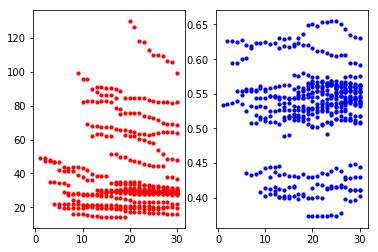

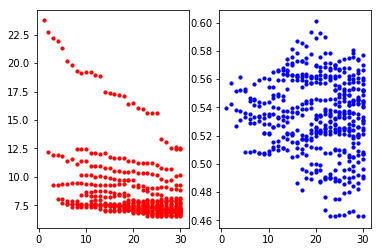

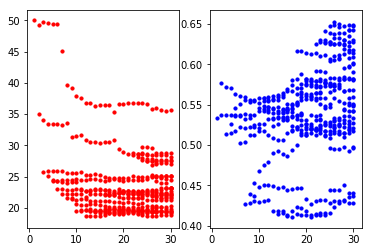

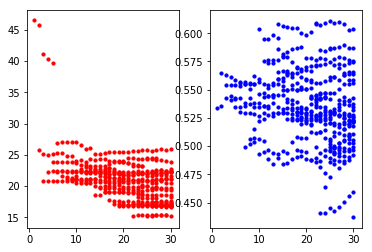

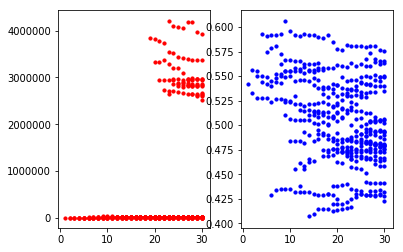

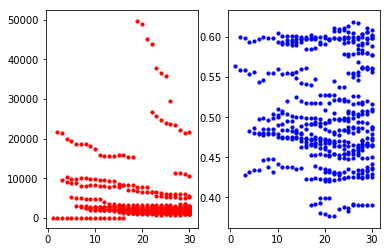

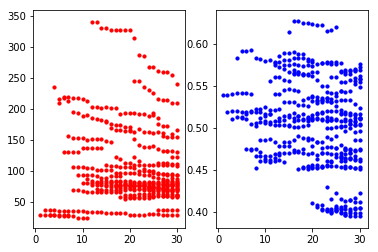

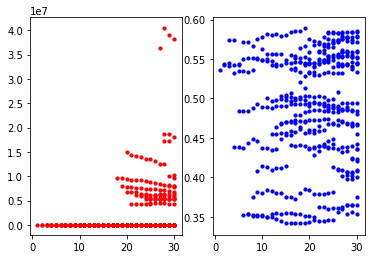

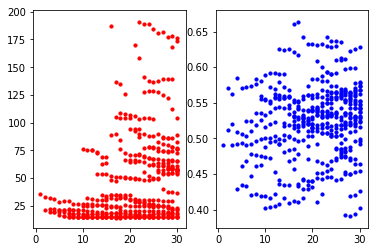

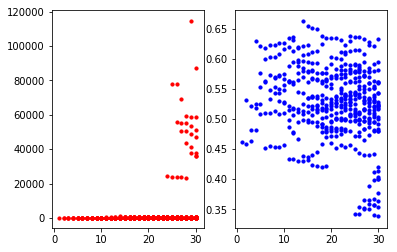

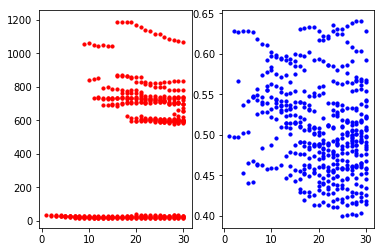

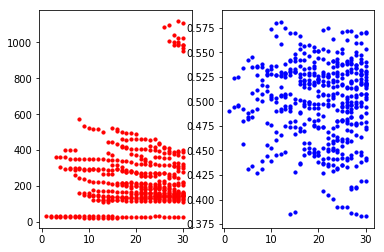

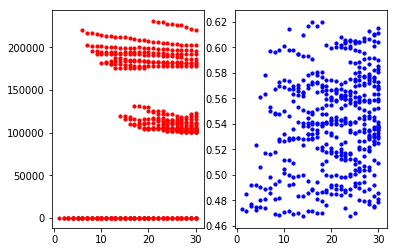

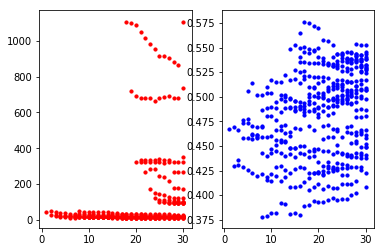

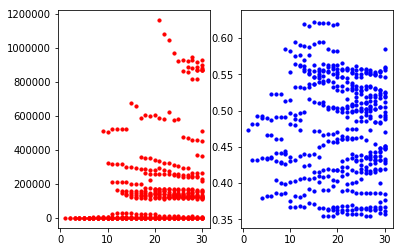

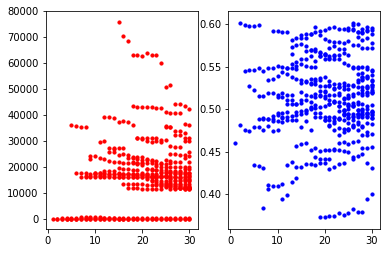

In [13]:
least_squares_SGD_cross_val_res = []
for i, tx in enumerate(preprocessed_data_train):
    least_squares_SGD_cross_val_res.append(cross_validate(least_squares_SGD, tx, all_ys_train[i], epochs=30, gamma=0.005, model_name='least_squares_SGD'))
    
least_squares_SGD_cross_val_res

### Logistic Regression
The feature expansion for this model has to be 2. Otherwise very low performance is achieved

feature expansion degree = 2

/home/marco/Documents/programming/ML_project1/MLscripts/implementations.py:75: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.squeeze( (np.matmul(y.T, np.log(p)) + np.matmul((1 - y).T, np.log(1 - p))   )   )


Accuracy: 0.49754450583179866
Accuracy: 0.5212720527397443
Accuracy: 0.5512984759922065
Accuracy: 0.5767608829102944
Accuracy: 0.5954573357888275
Accuracy: 0.6101102303360291
Accuracy: 0.6210265033229242
Accuracy: 0.6297141484506366
Accuracy: 0.6380281314223183
Accuracy: 0.6455280646969332
Accuracy: 0.6514132436544159
Accuracy: 0.657511943843916
Accuracy: 0.6622361011023034
Accuracy: 0.6665999412816612
Accuracy: 0.6712707182320442
Accuracy: 0.6743801211732992
Accuracy: 0.6772359676515334
Accuracy: 0.6802119198227774
Accuracy: 0.6823471321429525
Accuracy: 0.6842421330771079
Accuracy: 0.6856300210852216
Accuracy: 0.6871246697093443
Accuracy: 0.6888061494114821
Accuracy: 0.6904209037286145
Accuracy: 0.6915418901967064
Accuracy: 0.6929297782048203
Accuracy: 0.6941708703659221
Accuracy: 0.6952785117570128
Accuracy: 0.6963994982251047
Accuracy: 0.697280273307177
Accuracy: 0.698134358235247
Accuracy: 0.6991619291643313
Accuracy: 0.6997090773213761
Accuracy: 0.7006165425574505
Accuracy: 0.7012

Accuracy: 0.7248645474684389
Accuracy: 0.725158139162463
Accuracy: 0.7254250407024848
Accuracy: 0.7257186323965089
Accuracy: 0.7258520831665198
Accuracy: 0.7260922945525395
Accuracy: 0.7261590199375451
Accuracy: 0.7265994074785812
Accuracy: 0.7270264499426161
Accuracy: 0.727280006405637
Accuracy: 0.7277337390236742
Accuracy: 0.7280273307176982
Accuracy: 0.7283342674887234
Accuracy: 0.7287613099527585
Accuracy: 0.7289748311847759
Accuracy: 0.7293618384178077
Accuracy: 0.4976913016788107
Accuracy: 0.5217791656657859
Accuracy: 0.5504043558331332
Accuracy: 0.5765873969092802
Accuracy: 0.5945632156297542
Accuracy: 0.6094029412549711
Accuracy: 0.6204927002428804
Accuracy: 0.629207035524595
Accuracy: 0.6386153148103665
Accuracy: 0.6450209517708917
Accuracy: 0.6517335255024421
Accuracy: 0.657658739690928
Accuracy: 0.662329516641311
Accuracy: 0.6676542023647476
Accuracy: 0.6713374436170497
Accuracy: 0.6746737128673232
Accuracy: 0.6782101582726132
Accuracy: 0.6813862865988737
Accuracy: 0.6834414

/home/marco/Documents/programming/ML_project1/MLscripts/implementations.py:126: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.4969565665944496
Accuracy: 0.5050723890092507
Accuracy: 0.512190928161216
Accuracy: 0.5199112761786856
Accuracy: 0.5291963272464665
Accuracy: 0.5383954056191753
Accuracy: 0.5461845317927027
Accuracy: 0.5551428866192097
Accuracy: 0.563310292651054
Accuracy: 0.5709102788954228
Accuracy: 0.5764125313800337
Accuracy: 0.581089445991953
Accuracy: 0.586643282093607
Accuracy: 0.5913545857835552
Accuracy: 0.5952405516008116
Accuracy: 0.5985247085525637
Accuracy: 0.6016197255751573
Accuracy: 0.6049038825269094
Accuracy: 0.6079301213934455
Accuracy: 0.610646858557722
Accuracy: 0.6133807902610131
Accuracy: 0.616613363595722
Accuracy: 0.6195364352281715
Accuracy: 0.6213074727466557
Accuracy: 0.6236803191306441
Accuracy: 0.6264658344509784
Accuracy: 0.6285119845936931
Accuracy: 0.6304033838852781
Accuracy: 0.6328278138863097
Accuracy: 0.6352866329653702
Accuracy: 0.6372811994910417
Accuracy: 0.6389146806974105
Accuracy: 0.640909247223082
Accuracy: 0.642886619209739
Accuracy: 0.6448811857

Accuracy: 0.6823308917087932
Accuracy: 0.6827263661061247
Accuracy: 0.6833109804326146
Accuracy: 0.6835173149007875
Accuracy: 0.6838096220640325
Accuracy: 0.6840503456102341
Accuracy: 0.684548987241652
Accuracy: 0.6846865435537673
Accuracy: 0.6849960452560266
Accuracy: 0.6853743251143437
Accuracy: 0.6856666322775886
Accuracy: 0.6860621066749201
Accuracy: 0.6864231919942226
Accuracy: 0.6865263592283091
Accuracy: 0.6868874445476116
Accuracy: 0.687196946249871
Accuracy: 0.4984696860277176
Accuracy: 0.5054162797895388
Accuracy: 0.5126723752536194
Accuracy: 0.5208225867464493
Accuracy: 0.5295058289487259
Accuracy: 0.5385673510093194
Accuracy: 0.5460125864025586
Accuracy: 0.5539736579662299
Accuracy: 0.561418893359469
Accuracy: 0.5680387908800165
Accuracy: 0.5742460194642182
Accuracy: 0.5792668248564256
Accuracy: 0.5837889886172152
Accuracy: 0.5885862650022353
Accuracy: 0.5919735891880739
Accuracy: 0.5952921352178548
Accuracy: 0.5978885106090306
Accuracy: 0.6015165583410709
Accuracy: 0.60461

Accuracy: 0.7164522788629506
Accuracy: 0.7169286962045418
Accuracy: 0.7175109840664867
Accuracy: 0.7178021279974591
Accuracy: 0.7183844158594039
Accuracy: 0.7188078979408183
Accuracy: 0.7191784447620561
Accuracy: 0.7195225239532053
Accuracy: 0.7201577470753269
Accuracy: 0.7207400349372717
Accuracy: 0.721348790429305
Accuracy: 0.722142819331957
Accuracy: 0.7227780424540786
Accuracy: 0.7231750569054047
Accuracy: 0.7239161505478799
Accuracy: 0.7246837118204436
Accuracy: 0.7250807262717697
Accuracy: 0.7256100788735377
Accuracy: 0.7259541580646869
Accuracy: 0.7264305754062781
Accuracy: 0.7269863956381346
Accuracy: 0.7272246043089302
Accuracy: 0.7273040071991954
Accuracy: 0.7278333598009634
Accuracy: 0.728203906622201
Accuracy: 0.7287067915938806
Accuracy: 0.7292361441956487
Accuracy: 0.7298978349478588
Accuracy: 0.7305330580699804
Accuracy: 0.7311947488221905
Accuracy: 0.7316446985336933
Accuracy: 0.5143983907680906
Accuracy: 0.5413424381980837
Accuracy: 0.5660896723307395
Accuracy: 0.58347

Accuracy: 0.6068098417854779
Accuracy: 0.6072309450760994
Accuracy: 0.6074114179149371
Accuracy: 0.6077723635926127
Accuracy: 0.6078926788185045
Accuracy: 0.6078325212055585
Accuracy: 0.6071106298502076
Accuracy: 0.607471575527883
Accuracy: 0.6080129940443963
Accuracy: 0.6086145701738555
Accuracy: 0.6092161463033147
Accuracy: 0.6087950430126933
Accuracy: 0.6086747277868014
Accuracy: 0.609035673464477
Accuracy: 0.6096372495939361
Accuracy: 0.6092161463033147
Accuracy: 0.6088552006256391
Accuracy: 0.6088552006256391
Accuracy: 0.6087348853997473
Accuracy: 0.6093966191421525
Accuracy: 0.609035673464477
Accuracy: 0.6088552006256391
Accuracy: 0.6085544125609096
Accuracy: 0.6084340973350177
Accuracy: 0.6079528364314504
Accuracy: 0.60825362449618
Accuracy: 0.6084942549479637
Accuracy: 0.6083137821091259
Accuracy: 0.6077723635926127
Accuracy: 0.6089153582385851
Accuracy: 0.6087950430126933
Accuracy: 0.6086747277868014
Accuracy: 0.6086747277868014
Accuracy: 0.6084340973350177
Accuracy: 0.6083137

Accuracy: 0.6069903146243157
Accuracy: 0.6077122059796667
Accuracy: 0.60825362449618
Accuracy: 0.6088552006256391
Accuracy: 0.6089153582385851
Accuracy: 0.6088552006256391
Accuracy: 0.609697407206882
Accuracy: 0.6093966191421525
Accuracy: 0.6094567767550984
Accuracy: 0.6096372495939361
Accuracy: 0.6101786681104494
Accuracy: 0.6106599290140168
Accuracy: 0.6116224508211514
Accuracy: 0.6116826084340974
Accuracy: 0.611923238885881
Accuracy: 0.6116224508211514
Accuracy: 0.6112615051434759
Accuracy: 0.6116826084340974
Accuracy: 0.6116826084340974
Accuracy: 0.611141189917584
Accuracy: 0.6116826084340974
Accuracy: 0.6116224508211514
Accuracy: 0.6121638693376646
Accuracy: 0.612645130241232
Accuracy: 0.6121638693376646
Accuracy: 0.6124044997894483
Accuracy: 0.6128857606930157
Accuracy: 0.6127654454671239
Accuracy: 0.6131263911447994
Accuracy: 0.6138482825001504
Accuracy: 0.6143295434037177
Accuracy: 0.6147506466943392
Accuracy: 0.614870961920231
Accuracy: 0.6149311195331769
Accuracy: 0.615111592

[{'test_score': [0.7342061013692049,
   0.7306029305789095,
   0.7277604291776764,
   0.7294018736488109],
  'train_score': [0.7310566631969466,
   0.7314169802759762,
   0.7293618384178077,
   0.7312168041209598]},
 {'test_score': [0.686732693696482,
   0.6833797585886723,
   0.6879707005055195,
   0.6887960383782111],
  'train_score': [0.6874204752570584,
   0.6877643660373466,
   0.687196946249871,
   0.6859245503628048]},
 {'test_score': [0.7294743528664444,
   0.7274892806098142,
   0.7344767349531522,
   0.7327298713673178],
  'train_score': [0.733735641310677,
   0.7316446985336933,
   0.7307977343708645,
   0.7313535546027209]},
 {'test_score': [0.6228117668290922,
   0.6139685977260422,
   0.6139685977260422,
   0.6179390001804729],
  'train_score': [0.6099981952716116,
   0.6250977561210371,
   0.6217289297960656,
   0.6167960055345004]}]

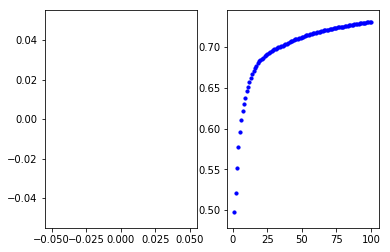

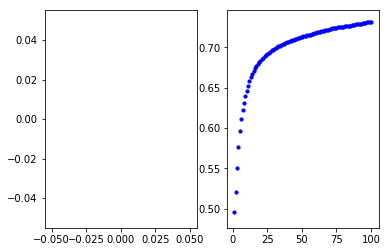

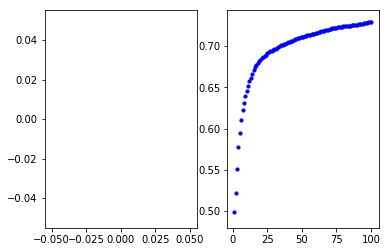

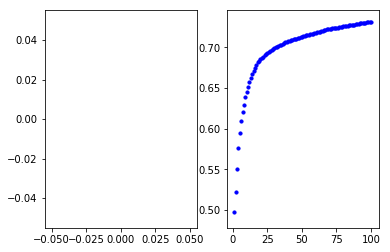

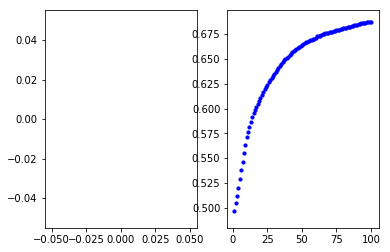

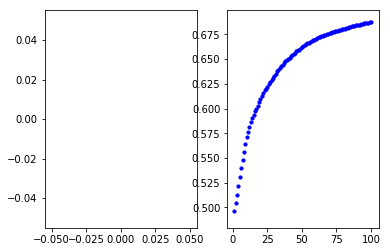

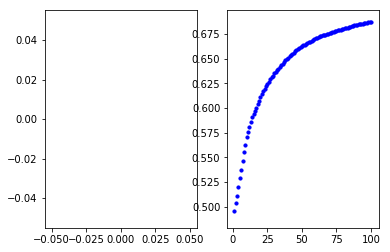

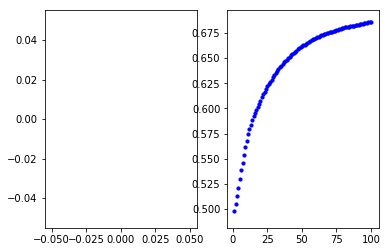

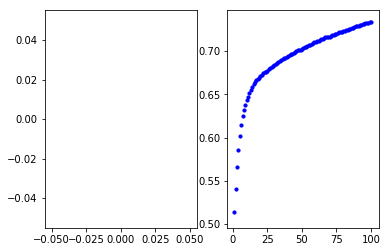

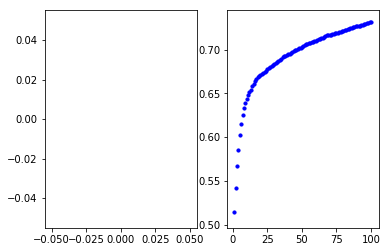

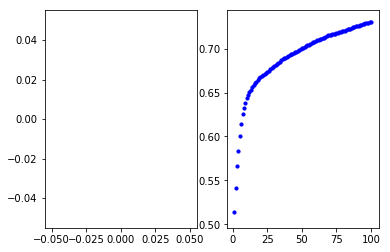

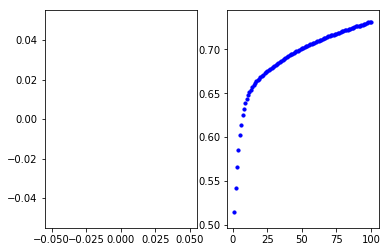

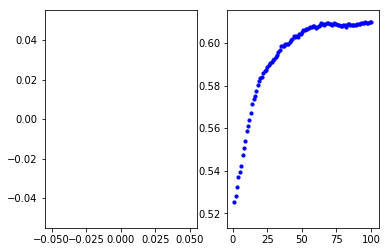

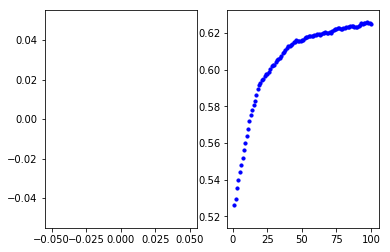

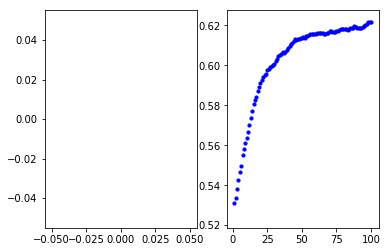

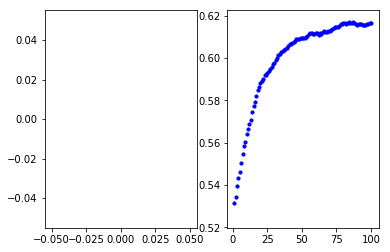

In [8]:
logistic_regression_cross_val_res = []
for i, tx in enumerate(preprocessed_data_train_augmented):
    logistic_regression_cross_val_res.append(cross_validate(logistic_regression, tx, all_ys_train[i], epochs=100, gamma=0.000005, model_name='logistic_regression'))
    
logistic_regression_cross_val_res

In [19]:
logistic_regression_cross_val_res

[{'test_score': [0.8280486828408999,
   0.8306109376251101,
   0.8374969973576748,
   0.8321322764032348],
  'train_score': [0.8303306910080871,
   0.8304774868550991,
   0.8339472068753837,
   0.8335735447193531]},
 {'test_score': [0.7448674301041989,
   0.7647787062828846,
   0.773290003095017,
   0.7670999690498298],
  'train_score': [0.7420647202448503,
   0.7710031294061006,
   0.7710719075621583,
   0.7648990680559854]},
 {'test_score': [0.7995077020803557,
   0.8066539622042243,
   0.8033190408130856,
   0.8083214228997936],
  'train_score': [0.8077920702980255,
   0.806045206712191,
   0.8019427240484887,
   0.8024456090201684]},
 {'test_score': [0.7875834686879625,
   0.7919148168200686,
   0.7911929254647175,
   0.7929976538530951],
  'train_score': [0.7946219094026349,
   0.7922757624977441,
   0.7936593875955003,
   0.7899897732057992]}]

No feature expansion for the following cross validation

cost function:  LIKELIHOOD
Accuracy: 0.5142658873141698
cost function:  LIKELIHOOD
Accuracy: 0.5300264232524622
cost function:  LIKELIHOOD
Accuracy: 0.5477486855099154
cost function:  LIKELIHOOD
Accuracy: 0.5632022846771826
cost function:  LIKELIHOOD
Accuracy: 0.5772146155283316
cost function:  LIKELIHOOD
Accuracy: 0.589585501908346


/home/marco/Documents/programming/ML_project1/MLscripts/implementations.py:90: RuntimeWarning: divide by zero encountered in log
  return -log_likelihood + lambda_ * np.squeeze(np.matmul(w.T, w))


cost function:  LIKELIHOOD
Accuracy: 0.598646809192089
cost function:  LIKELIHOOD
Accuracy: 0.6077348066298343
cost function:  LIKELIHOOD
Accuracy: 0.615061253903435
cost function:  LIKELIHOOD
Accuracy: 0.6216537219419757
cost function:  LIKELIHOOD
Accuracy: 0.6270050978194144
cost function:  LIKELIHOOD
Accuracy: 0.632463234312862
cost function:  LIKELIHOOD
Accuracy: 0.6373475324952625
cost function:  LIKELIHOOD
Accuracy: 0.6413644006725919
cost function:  LIKELIHOOD
Accuracy: 0.6447273600768676
cost function:  LIKELIHOOD
Accuracy: 0.6471828542450689
cost function:  LIKELIHOOD
Accuracy: 0.6496917287212747
cost function:  LIKELIHOOD
Accuracy: 0.6518402861184509
cost function:  LIKELIHOOD
Accuracy: 0.6540956041316358
cost function:  LIKELIHOOD
Accuracy: 0.6558037739877759
cost function:  LIKELIHOOD
Accuracy: 0.6573784930739051
cost function:  LIKELIHOOD
Accuracy: 0.6589932473910375
cost function:  LIKELIHOOD
Accuracy: 0.6606480369391732
cost function:  LIKELIHOOD
Accuracy: 0.662409587103

cost function:  LIKELIHOOD
Accuracy: 0.7178984172738677
cost function:  LIKELIHOOD
Accuracy: 0.717938452504871
cost function:  LIKELIHOOD
Accuracy: 0.7179784877358742
cost function:  LIKELIHOOD
Accuracy: 0.7181653188138896
cost function:  LIKELIHOOD
Accuracy: 0.7181920089678917
cost function:  LIKELIHOOD
Accuracy: 0.7182854245068994
cost function:  LIKELIHOOD
Accuracy: 0.7184589105079137
cost function:  LIKELIHOOD
Accuracy: 0.7185656711239223
cost function:  LIKELIHOOD
Accuracy: 0.7186991218939334
cost function:  LIKELIHOOD
Accuracy: 0.7188325726639443
cost function:  LIKELIHOOD
Accuracy: 0.7189793685109563
cost function:  LIKELIHOOD
Accuracy: 0.7190594389729629
cost function:  LIKELIHOOD
Accuracy: 0.7191261643579684
cost function:  LIKELIHOOD
Accuracy: 0.719219579896976
cost function:  LIKELIHOOD
Accuracy: 0.7192329249739771
cost function:  LIKELIHOOD
Accuracy: 0.719353030666987
cost function:  LIKELIHOOD
Accuracy: 0.7194464462059946
cost function:  LIKELIHOOD
Accuracy: 0.719539861745

cost function:  LIKELIHOOD
Accuracy: 0.7259054634745242
cost function:  LIKELIHOOD
Accuracy: 0.7259321536285265
cost function:  LIKELIHOOD
Accuracy: 0.7259188085515254
cost function:  LIKELIHOOD
Accuracy: 0.7259721888595297
cost function:  LIKELIHOOD
Accuracy: 0.7259721888595297
cost function:  LIKELIHOOD
Accuracy: 0.7259855339365309
cost function:  LIKELIHOOD
Accuracy: 0.7259454987055275
cost function:  LIKELIHOOD
Accuracy: 0.7259721888595297
cost function:  LIKELIHOOD
Accuracy: 0.7259721888595297
cost function:  LIKELIHOOD
Accuracy: 0.726012224090533
cost function:  LIKELIHOOD
Accuracy: 0.726012224090533
cost function:  LIKELIHOOD
Accuracy: 0.7260656043985374
cost function:  LIKELIHOOD
Accuracy: 0.7261189847065418
cost function:  LIKELIHOOD
Accuracy: 0.7261189847065418
cost function:  LIKELIHOOD
Accuracy: 0.7261189847065418
cost function:  LIKELIHOOD
Accuracy: 0.7261323297835428
cost function:  LIKELIHOOD
Accuracy: 0.7261456748605439
cost function:  LIKELIHOOD
Accuracy: 0.72613232978

Accuracy: 0.6918354818907305
cost function:  LIKELIHOOD
Accuracy: 0.692462700509782
cost function:  LIKELIHOOD
Accuracy: 0.6931166092828356
cost function:  LIKELIHOOD
Accuracy: 0.6939973843649078
cost function:  LIKELIHOOD
Accuracy: 0.6947046734459658
cost function:  LIKELIHOOD
Accuracy: 0.6952117863720073
cost function:  LIKELIHOOD
Accuracy: 0.6958256599140578
cost function:  LIKELIHOOD
Accuracy: 0.6962527023780927
cost function:  LIKELIHOOD
Accuracy: 0.6967331251501321
cost function:  LIKELIHOOD
Accuracy: 0.6971201323831638
cost function:  LIKELIHOOD
Accuracy: 0.6976672805402088
cost function:  LIKELIHOOD
Accuracy: 0.6980275976192383
cost function:  LIKELIHOOD
Accuracy: 0.6984946753142766
cost function:  LIKELIHOOD
Accuracy: 0.6988816825473083
cost function:  LIKELIHOOD
Accuracy: 0.6994421757813543
cost function:  LIKELIHOOD
Accuracy: 0.6998024928603838
cost function:  LIKELIHOOD
Accuracy: 0.7002829156324232
cost function:  LIKELIHOOD
Accuracy: 0.7008567539434702
cost function:  LIKE

Accuracy: 0.7206208129820909
cost function:  LIKELIHOOD
Accuracy: 0.720634158059092
cost function:  LIKELIHOOD
Accuracy: 0.7206875383670964
cost function:  LIKELIHOOD
Accuracy: 0.7207142285210986
cost function:  LIKELIHOOD
Accuracy: 0.720767608829103
cost function:  LIKELIHOOD
Accuracy: 0.7208610243681106
cost function:  LIKELIHOOD
Accuracy: 0.7209811300611204
cost function:  LIKELIHOOD
Accuracy: 0.721061200523127
cost function:  LIKELIHOOD
Accuracy: 0.7210745456001281
cost function:  LIKELIHOOD
Accuracy: 0.7211546160621347
cost function:  LIKELIHOOD
Accuracy: 0.7212213414471401
cost function:  LIKELIHOOD
Accuracy: 0.7212747217551445
cost function:  LIKELIHOOD
Accuracy: 0.7213147569861478
cost function:  LIKELIHOOD
Accuracy: 0.7214081725251554
cost function:  LIKELIHOOD
Accuracy: 0.7214215176021566
cost function:  LIKELIHOOD
Accuracy: 0.7214615528331598
cost function:  LIKELIHOOD
Accuracy: 0.7214882429871621
cost function:  LIKELIHOOD
Accuracy: 0.7215282782181653
cost function:  LIKELI

cost function:  LIKELIHOOD
Accuracy: 0.7256652520885045
cost function:  LIKELIHOOD
Accuracy: 0.7256519070115035
cost function:  LIKELIHOOD
Accuracy: 0.7256919422425068
cost function:  LIKELIHOOD
Accuracy: 0.7257453225505112
cost function:  LIKELIHOOD
Accuracy: 0.7257586676275122
cost function:  LIKELIHOOD
Accuracy: 0.7257586676275122
cost function:  LIKELIHOOD
Accuracy: 0.7257720127045133
cost function:  LIKELIHOOD
Accuracy: 0.7257987028585154
cost function:  LIKELIHOOD
Accuracy: 0.7258120479355166
cost function:  LIKELIHOOD
Accuracy: 0.7258120479355166
cost function:  LIKELIHOOD
Accuracy: 0.7257853577815144
cost function:  LIKELIHOOD
Accuracy: 0.7257987028585154
cost function:  LIKELIHOOD
Accuracy: 0.7257853577815144
cost function:  LIKELIHOOD
Accuracy: 0.7257720127045133
cost function:  LIKELIHOOD
Accuracy: 0.7257586676275122
cost function:  LIKELIHOOD
Accuracy: 0.72573197747351
cost function:  LIKELIHOOD
Accuracy: 0.72573197747351
cost function:  LIKELIHOOD
Accuracy: 0.7257720127045

cost function:  LIKELIHOOD
Accuracy: 0.7097579203032002
cost function:  LIKELIHOOD
Accuracy: 0.7100515119972243
cost function:  LIKELIHOOD
Accuracy: 0.7102516881522406
cost function:  LIKELIHOOD
Accuracy: 0.7103717938452505
cost function:  LIKELIHOOD
Accuracy: 0.7105319347692636
cost function:  LIKELIHOOD
Accuracy: 0.71073211092428
cost function:  LIKELIHOOD
Accuracy: 0.7108388715402888
cost function:  LIKELIHOOD
Accuracy: 0.7109189420022953
cost function:  LIKELIHOOD
Accuracy: 0.7111458083113139
cost function:  LIKELIHOOD
Accuracy: 0.7114260549283369
cost function:  LIKELIHOOD
Accuracy: 0.7116128860063523
cost function:  LIKELIHOOD
Accuracy: 0.7116929564683588
cost function:  LIKELIHOOD
Accuracy: 0.7117596818533642
cost function:  LIKELIHOOD
Accuracy: 0.7118931326233753
cost function:  LIKELIHOOD
Accuracy: 0.7120799637013906
cost function:  LIKELIHOOD
Accuracy: 0.712293484933408
cost function:  LIKELIHOOD
Accuracy: 0.7123068300104092
cost function:  LIKELIHOOD
Accuracy: 0.712426935703

Accuracy: 0.7241305682333787
cost function:  LIKELIHOOD
Accuracy: 0.7241305682333787
cost function:  LIKELIHOOD
Accuracy: 0.7241839485413831
cost function:  LIKELIHOOD
Accuracy: 0.7242239837723864
cost function:  LIKELIHOOD
Accuracy: 0.7242907091573918
cost function:  LIKELIHOOD
Accuracy: 0.7243707796193984
cost function:  LIKELIHOOD
Accuracy: 0.7244241599274028
cost function:  LIKELIHOOD
Accuracy: 0.7244641951584061
cost function:  LIKELIHOOD
Accuracy: 0.7244908853124082
cost function:  LIKELIHOOD
Accuracy: 0.7244641951584061
cost function:  LIKELIHOOD
Accuracy: 0.7245175754664105
cost function:  LIKELIHOOD
Accuracy: 0.7245175754664105
cost function:  LIKELIHOOD
Accuracy: 0.7245175754664105
cost function:  LIKELIHOOD
Accuracy: 0.7245309205434115
cost function:  LIKELIHOOD
Accuracy: 0.7246243360824192
cost function:  LIKELIHOOD
Accuracy: 0.7246243360824192
cost function:  LIKELIHOOD
Accuracy: 0.7246243360824192
cost function:  LIKELIHOOD
Accuracy: 0.7246376811594203
cost function:  LIK

Accuracy: 0.7273066965596392
cost function:  LIKELIHOOD
Accuracy: 0.7273333867136413
cost function:  LIKELIHOOD
Accuracy: 0.7273333867136413
cost function:  LIKELIHOOD
Accuracy: 0.727280006405637
cost function:  LIKELIHOOD
Accuracy: 0.7273066965596392
cost function:  LIKELIHOOD
Accuracy: 0.5117036325299597
cost function:  LIKELIHOOD
Accuracy: 0.5277711052392773
cost function:  LIKELIHOOD
Accuracy: 0.5452264659567085
cost function:  LIKELIHOOD
Accuracy: 0.5609603117409987
cost function:  LIKELIHOOD
Accuracy: 0.5752662342861719
cost function:  LIKELIHOOD
Accuracy: 0.5887447620572771
cost function:  LIKELIHOOD
Accuracy: 0.5987268796540957
cost function:  LIKELIHOOD
Accuracy: 0.6089358635599328
cost function:  LIKELIHOOD
Accuracy: 0.6161155149865215
cost function:  LIKELIHOOD
Accuracy: 0.6226812928710599
cost function:  LIKELIHOOD
Accuracy: 0.6286865775215523
cost function:  LIKELIHOOD
Accuracy: 0.6338511223209758
cost function:  LIKELIHOOD
Accuracy: 0.6390023220433982
cost function:  LIKE

cost function:  LIKELIHOOD
Accuracy: 0.7180452131208797
cost function:  LIKELIHOOD
Accuracy: 0.7181653188138896
cost function:  LIKELIHOOD
Accuracy: 0.7182320441988951
cost function:  LIKELIHOOD
Accuracy: 0.7183254597379027
cost function:  LIKELIHOOD
Accuracy: 0.7184322203539114
cost function:  LIKELIHOOD
Accuracy: 0.7184455654309125
cost function:  LIKELIHOOD
Accuracy: 0.7185389809699202
cost function:  LIKELIHOOD
Accuracy: 0.7186057063549257
cost function:  LIKELIHOOD
Accuracy: 0.7186991218939334
cost function:  LIKELIHOOD
Accuracy: 0.718792537432941
cost function:  LIKELIHOOD
Accuracy: 0.7188592628179464
cost function:  LIKELIHOOD
Accuracy: 0.7189927135879574
cost function:  LIKELIHOOD
Accuracy: 0.7190594389729629
cost function:  LIKELIHOOD
Accuracy: 0.7191661995889717
cost function:  LIKELIHOOD
Accuracy: 0.7193396855899858
cost function:  LIKELIHOOD
Accuracy: 0.7194597912829958
cost function:  LIKELIHOOD
Accuracy: 0.7194731363599968
cost function:  LIKELIHOOD
Accuracy: 0.7195798969

cost function:  LIKELIHOOD
Accuracy: 0.7260789494755385
cost function:  LIKELIHOOD
Accuracy: 0.7261189847065418
cost function:  LIKELIHOOD
Accuracy: 0.7261189847065418
cost function:  LIKELIHOOD
Accuracy: 0.7261456748605439
cost function:  LIKELIHOOD
Accuracy: 0.7261590199375451
cost function:  LIKELIHOOD
Accuracy: 0.7262257453225505
cost function:  LIKELIHOOD
Accuracy: 0.7262524354765527
cost function:  LIKELIHOOD
Accuracy: 0.7262791256305549
cost function:  LIKELIHOOD
Accuracy: 0.7262791256305549
cost function:  LIKELIHOOD
Accuracy: 0.7263191608615581
cost function:  LIKELIHOOD
Accuracy: 0.7263325059385592
cost function:  LIKELIHOOD
Accuracy: 0.7263591960925615
cost function:  LIKELIHOOD
Accuracy: 0.7263591960925615
cost function:  LIKELIHOOD
Accuracy: 0.7263858862465636
cost function:  LIKELIHOOD
Accuracy: 0.7264125764005658
cost function:  LIKELIHOOD
Accuracy: 0.726439266554568
cost function:  LIKELIHOOD
Accuracy: 0.7265460271705768
cost function:  LIKELIHOOD
Accuracy: 0.7265326820

cost function:  LIKELIHOOD
Accuracy: 0.6646033219849375
cost function:  LIKELIHOOD
Accuracy: 0.6653082980845284
cost function:  LIKELIHOOD
Accuracy: 0.6656349943258021
cost function:  LIKELIHOOD
Accuracy: 0.6661508304962344
cost function:  LIKELIHOOD
Accuracy: 0.6665463048935658
cost function:  LIKELIHOOD
Accuracy: 0.6670965301420269
cost function:  LIKELIHOOD
Accuracy: 0.6675091990783727
cost function:  LIKELIHOOD
Accuracy: 0.6681969806389491
cost function:  LIKELIHOOD
Accuracy: 0.6686268441143093
cost function:  LIKELIHOOD
Accuracy: 0.6690567075896695
cost function:  LIKELIHOOD
Accuracy: 0.6691254857457272
cost function:  LIKELIHOOD
Accuracy: 0.6697444891502459
cost function:  LIKELIHOOD
Accuracy: 0.6701399635475773
cost function:  LIKELIHOOD
Accuracy: 0.6707073833350528
cost function:  LIKELIHOOD
Accuracy: 0.6710856631933698
cost function:  LIKELIHOOD
Accuracy: 0.6712748031225283
cost function:  LIKELIHOOD
Accuracy: 0.671979779222119
cost function:  LIKELIHOOD
Accuracy: 0.6722376973

Accuracy: 0.680972523126655
cost function:  LIKELIHOOD
Accuracy: 0.6808349668145397
cost function:  LIKELIHOOD
Accuracy: 0.6809037449705974
cost function:  LIKELIHOOD
Accuracy: 0.6809553285876405
cost function:  LIKELIHOOD
Accuracy: 0.6809037449705974
cost function:  LIKELIHOOD
Accuracy: 0.6809209395096117
cost function:  LIKELIHOOD
Accuracy: 0.6808005777365109
cost function:  LIKELIHOOD
Accuracy: 0.680886550431583
cost function:  LIKELIHOOD
Accuracy: 0.6810584958217271
cost function:  LIKELIHOOD
Accuracy: 0.6811444685167991
cost function:  LIKELIHOOD
Accuracy: 0.6811100794387702
cost function:  LIKELIHOOD
Accuracy: 0.6811100794387702
cost function:  LIKELIHOOD
Accuracy: 0.6811616630558135
cost function:  LIKELIHOOD
Accuracy: 0.6811272739777846
cost function:  LIKELIHOOD
Accuracy: 0.6812132466728567
cost function:  LIKELIHOOD
Accuracy: 0.6813336084459576
cost function:  LIKELIHOOD
Accuracy: 0.681436775680044
cost function:  LIKELIHOOD
Accuracy: 0.6814711647580728
cost function:  LIKELI

Accuracy: 0.6820557790845627
cost function:  LIKELIHOOD
Accuracy: 0.6820041954675196
cost function:  LIKELIHOOD
Accuracy: 0.6820385845455483
cost function:  LIKELIHOOD
Accuracy: 0.682021390006534
cost function:  LIKELIHOOD
Accuracy: 0.682021390006534
cost function:  LIKELIHOOD
Accuracy: 0.682021390006534
cost function:  LIKELIHOOD
Accuracy: 0.682021390006534
cost function:  LIKELIHOOD
Accuracy: 0.682021390006534
cost function:  LIKELIHOOD
Accuracy: 0.6820041954675196
cost function:  LIKELIHOOD
Accuracy: 0.6820041954675196
cost function:  LIKELIHOOD
Accuracy: 0.6820041954675196
cost function:  LIKELIHOOD
Accuracy: 0.6820385845455483
cost function:  LIKELIHOOD
Accuracy: 0.6820557790845627
cost function:  LIKELIHOOD
Accuracy: 0.6819870009285051
cost function:  LIKELIHOOD
Accuracy: 0.6820041954675196
cost function:  LIKELIHOOD
Accuracy: 0.6820385845455483
cost function:  LIKELIHOOD
Accuracy: 0.682021390006534
cost function:  LIKELIHOOD
Accuracy: 0.6820041954675196
cost function:  LIKELIHOO

cost function:  LIKELIHOOD
Accuracy: 0.6777743388699748
cost function:  LIKELIHOOD
Accuracy: 0.6778947006430758
cost function:  LIKELIHOOD
Accuracy: 0.6781698132673063
cost function:  LIKELIHOOD
Accuracy: 0.6783589531964648
cost function:  LIKELIHOOD
Accuracy: 0.6784793149695657
cost function:  LIKELIHOOD
Accuracy: 0.6785480931256233
cost function:  LIKELIHOOD
Accuracy: 0.6786168712816809
cost function:  LIKELIHOOD
Accuracy: 0.6788404002888683
cost function:  LIKELIHOOD
Accuracy: 0.6788404002888683
cost function:  LIKELIHOOD
Accuracy: 0.6787716221328106
cost function:  LIKELIHOOD
Accuracy: 0.6789091784449259
cost function:  LIKELIHOOD
Accuracy: 0.6789435675229547
cost function:  LIKELIHOOD
Accuracy: 0.6789263729839403
cost function:  LIKELIHOOD
Accuracy: 0.6789435675229547
cost function:  LIKELIHOOD
Accuracy: 0.6788919839059114
cost function:  LIKELIHOOD
Accuracy: 0.6788232057498539
cost function:  LIKELIHOOD
Accuracy: 0.6788575948278827
cost function:  LIKELIHOOD
Accuracy: 0.678960762

cost function:  LIKELIHOOD
Accuracy: 0.6814883592970873
cost function:  LIKELIHOOD
Accuracy: 0.6814883592970873
cost function:  LIKELIHOOD
Accuracy: 0.6815055538361017
cost function:  LIKELIHOOD
Accuracy: 0.6814711647580728
cost function:  LIKELIHOOD
Accuracy: 0.6814023866020152
cost function:  LIKELIHOOD
Accuracy: 0.6813679975239864
cost function:  LIKELIHOOD
Accuracy: 0.6814195811410296
cost function:  LIKELIHOOD
Accuracy: 0.6814195811410296
cost function:  LIKELIHOOD
Accuracy: 0.6813336084459576
cost function:  LIKELIHOOD
Accuracy: 0.6812992193679287
cost function:  LIKELIHOOD
Accuracy: 0.6813164139069432
cost function:  LIKELIHOOD
Accuracy: 0.6813336084459576
cost function:  LIKELIHOOD
Accuracy: 0.6813336084459576
cost function:  LIKELIHOOD
Accuracy: 0.6812992193679287
cost function:  LIKELIHOOD
Accuracy: 0.6813336084459576
cost function:  LIKELIHOOD
Accuracy: 0.6813679975239864
cost function:  LIKELIHOOD
Accuracy: 0.6812648302898999
cost function:  LIKELIHOOD
Accuracy: 0.681333608

Accuracy: 0.6822277244747068
cost function:  LIKELIHOOD
Accuracy: 0.6822449190137212
cost function:  LIKELIHOOD
Accuracy: 0.6822965026307645
cost function:  LIKELIHOOD
Accuracy: 0.6822621135527357
cost function:  LIKELIHOOD
Accuracy: 0.6822105299356924
cost function:  LIKELIHOOD
Accuracy: 0.6822621135527357
cost function:  LIKELIHOOD
Accuracy: 0.6822621135527357
cost function:  LIKELIHOOD
Accuracy: 0.48835929708724507
cost function:  LIKELIHOOD
Accuracy: 0.501427146738196
cost function:  LIKELIHOOD
Accuracy: 0.513239795041095
cost function:  LIKELIHOOD
Accuracy: 0.5231954331304378
cost function:  LIKELIHOOD
Accuracy: 0.5332198493758382
cost function:  LIKELIHOOD
Accuracy: 0.5419374806561436
cost function:  LIKELIHOOD
Accuracy: 0.5486261563327487
cost function:  LIKELIHOOD
Accuracy: 0.5562949207331751
cost function:  LIKELIHOOD
Accuracy: 0.5628632346366794
cost function:  LIKELIHOOD
Accuracy: 0.5685374325114344
cost function:  LIKELIHOOD
Accuracy: 0.5746414938615496
cost function:  LIKE

Accuracy: 0.6785480931256233
cost function:  LIKELIHOOD
Accuracy: 0.6785824822036521
cost function:  LIKELIHOOD
Accuracy: 0.6785480931256233
cost function:  LIKELIHOOD
Accuracy: 0.6784277313525224
cost function:  LIKELIHOOD
Accuracy: 0.6783761477354792
cost function:  LIKELIHOOD
Accuracy: 0.6782901750404071
cost function:  LIKELIHOOD
Accuracy: 0.678410536813508
cost function:  LIKELIHOOD
Accuracy: 0.6784621204305512
cost function:  LIKELIHOOD
Accuracy: 0.6785824822036521
cost function:  LIKELIHOOD
Accuracy: 0.6786512603597098
cost function:  LIKELIHOOD
Accuracy: 0.6785480931256233
cost function:  LIKELIHOOD
Accuracy: 0.6786512603597098
cost function:  LIKELIHOOD
Accuracy: 0.6786512603597098
cost function:  LIKELIHOOD
Accuracy: 0.6787372330547818
cost function:  LIKELIHOOD
Accuracy: 0.6788060112108394
cost function:  LIKELIHOOD
Accuracy: 0.6787372330547818
cost function:  LIKELIHOOD
Accuracy: 0.6786340658206953
cost function:  LIKELIHOOD
Accuracy: 0.6785996767426665
cost function:  LIKE

Accuracy: 0.6802503524880498
cost function:  LIKELIHOOD
Accuracy: 0.6802675470270642
cost function:  LIKELIHOOD
Accuracy: 0.6802503524880498
cost function:  LIKELIHOOD
Accuracy: 0.6802503524880498
cost function:  LIKELIHOOD
Accuracy: 0.6802503524880498
cost function:  LIKELIHOOD
Accuracy: 0.6802847415660787
cost function:  LIKELIHOOD
Accuracy: 0.6802331579490354
cost function:  LIKELIHOOD
Accuracy: 0.6801987688710066
cost function:  LIKELIHOOD
Accuracy: 0.680215963410021
cost function:  LIKELIHOOD
Accuracy: 0.6800784070979057
cost function:  LIKELIHOOD
Accuracy: 0.6800956016369201
cost function:  LIKELIHOOD
Accuracy: 0.6800784070979057
cost function:  LIKELIHOOD
Accuracy: 0.680129990714949
cost function:  LIKELIHOOD
Accuracy: 0.6802331579490354
cost function:  LIKELIHOOD
Accuracy: 0.6801987688710066
cost function:  LIKELIHOOD
Accuracy: 0.6802847415660787
cost function:  LIKELIHOOD
Accuracy: 0.6802503524880498
cost function:  LIKELIHOOD
Accuracy: 0.6802847415660787
cost function:  LIKEL

Accuracy: 0.664242236665635
cost function:  LIKELIHOOD
Accuracy: 0.6648268509921249
cost function:  LIKELIHOOD
Accuracy: 0.6658241342549607
cost function:  LIKELIHOOD
Accuracy: 0.6667182502837099
cost function:  LIKELIHOOD
Accuracy: 0.6673372536882286
cost function:  LIKELIHOOD
Accuracy: 0.6673888373052719
cost function:  LIKELIHOOD
Accuracy: 0.667440420922315
cost function:  LIKELIHOOD
Accuracy: 0.6679390625537329
cost function:  LIKELIHOOD
Accuracy: 0.6686612331923382
cost function:  LIKELIHOOD
Accuracy: 0.6690567075896695
cost function:  LIKELIHOOD
Accuracy: 0.669245847518828
cost function:  LIKELIHOOD
Accuracy: 0.6693318202139
cost function:  LIKELIHOOD
Accuracy: 0.6696069328381307
cost function:  LIKELIHOOD
Accuracy: 0.6698992400013756
cost function:  LIKELIHOOD
Accuracy: 0.6701571580865917
cost function:  LIKELIHOOD
Accuracy: 0.6704494652498366
cost function:  LIKELIHOOD
Accuracy: 0.6709996904982978
cost function:  LIKELIHOOD
Accuracy: 0.671343581278586
cost function:  LIKELIHOOD

cost function:  LIKELIHOOD
Accuracy: 0.6785137040475945
cost function:  LIKELIHOOD
Accuracy: 0.6784621204305512
cost function:  LIKELIHOOD
Accuracy: 0.6784621204305512
cost function:  LIKELIHOOD
Accuracy: 0.6784965095085801
cost function:  LIKELIHOOD
Accuracy: 0.6785137040475945
cost function:  LIKELIHOOD
Accuracy: 0.6785824822036521
cost function:  LIKELIHOOD
Accuracy: 0.6786168712816809
cost function:  LIKELIHOOD
Accuracy: 0.6785652876646378
cost function:  LIKELIHOOD
Accuracy: 0.6786856494377386
cost function:  LIKELIHOOD
Accuracy: 0.6787200385157673
cost function:  LIKELIHOOD
Accuracy: 0.6787200385157673
cost function:  LIKELIHOOD
Accuracy: 0.6785996767426665
cost function:  LIKELIHOOD
Accuracy: 0.6786168712816809
cost function:  LIKELIHOOD
Accuracy: 0.6786168712816809
cost function:  LIKELIHOOD
Accuracy: 0.6786340658206953
cost function:  LIKELIHOOD
Accuracy: 0.6785652876646378
cost function:  LIKELIHOOD
Accuracy: 0.6787200385157673
cost function:  LIKELIHOOD
Accuracy: 0.678754427

cost function:  LIKELIHOOD
Accuracy: 0.6794422091543726
cost function:  LIKELIHOOD
Accuracy: 0.6794078200763437
cost function:  LIKELIHOOD
Accuracy: 0.6794422091543726
cost function:  LIKELIHOOD
Accuracy: 0.679459403693387
cost function:  LIKELIHOOD
Accuracy: 0.6794422091543726
cost function:  LIKELIHOOD
Accuracy: 0.6793390419202862
cost function:  LIKELIHOOD
Accuracy: 0.6793390419202862
cost function:  LIKELIHOOD
Accuracy: 0.6793390419202862
cost function:  LIKELIHOOD
Accuracy: 0.6793734309983149
cost function:  LIKELIHOOD
Accuracy: 0.6794422091543726
cost function:  LIKELIHOOD
Accuracy: 0.6794937927714157
cost function:  LIKELIHOOD
Accuracy: 0.6795109873104302
cost function:  LIKELIHOOD
Accuracy: 0.679459403693387
cost function:  LIKELIHOOD
Accuracy: 0.6795109873104302
cost function:  LIKELIHOOD
Accuracy: 0.6794765982324014
cost function:  LIKELIHOOD
Accuracy: 0.6794422091543726
cost function:  LIKELIHOOD
Accuracy: 0.6794765982324014
cost function:  LIKELIHOOD
Accuracy: 0.67944220915

Accuracy: 0.7146260123868509
cost function:  LIKELIHOOD
Accuracy: 0.7149965592080885
cost function:  LIKELIHOOD
Accuracy: 0.7152083002487957
cost function:  LIKELIHOOD
Accuracy: 0.7157111852204754
cost function:  LIKELIHOOD
Accuracy: 0.715949393891271
cost function:  LIKELIHOOD
Accuracy: 0.7160023291514478
cost function:  LIKELIHOOD
Accuracy: 0.716346408342597
cost function:  LIKELIHOOD
Accuracy: 0.7164258112328622
cost function:  LIKELIHOOD
Accuracy: 0.7167963580540998
cost function:  LIKELIHOOD
Accuracy: 0.7169551638346302
cost function:  LIKELIHOOD
Accuracy: 0.7173257106558679
cost function:  LIKELIHOOD
Accuracy: 0.7177756603673707
cost function:  LIKELIHOOD
Accuracy: 0.7181197395585199
cost function:  LIKELIHOOD
Accuracy: 0.7186226245301995
cost function:  LIKELIHOOD
Accuracy: 0.7190461066116139
cost function:  LIKELIHOOD
Accuracy: 0.7197342649939125
cost function:  LIKELIHOOD
Accuracy: 0.7198666031443545
cost function:  LIKELIHOOD
Accuracy: 0.7201577470753269
cost function:  LIKEL

Accuracy: 0.7338415118310306
cost function:  LIKELIHOOD
Accuracy: 0.7339209147212958
cost function:  LIKELIHOOD
Accuracy: 0.7339738499814726
cost function:  LIKELIHOOD
Accuracy: 0.7340532528717378
cost function:  LIKELIHOOD
Accuracy: 0.7341591233920914
cost function:  LIKELIHOOD
Accuracy: 0.7341061881319146
cost function:  LIKELIHOOD
Accuracy: 0.734132655762003
cost function:  LIKELIHOOD
Accuracy: 0.7341061881319146
cost function:  LIKELIHOOD
Accuracy: 0.7341591233920914
cost function:  LIKELIHOOD
Accuracy: 0.7341061881319146
cost function:  LIKELIHOOD
Accuracy: 0.7341061881319146
cost function:  LIKELIHOOD
Accuracy: 0.7342385262823566
cost function:  LIKELIHOOD
Accuracy: 0.7342914615425334
cost function:  LIKELIHOOD
Accuracy: 0.7344767349531522
cost function:  LIKELIHOOD
Accuracy: 0.7345032025832406
cost function:  LIKELIHOOD
Accuracy: 0.7346090731035944
cost function:  LIKELIHOOD
Accuracy: 0.7346884759938596
cost function:  LIKELIHOOD
Accuracy: 0.7346620083637712
cost function:  LIKE

Accuracy: 0.7371499655920809
cost function:  LIKELIHOOD
Accuracy: 0.7371499655920809
cost function:  LIKELIHOOD
Accuracy: 0.7371499655920809
cost function:  LIKELIHOOD
Accuracy: 0.7369911598115505
cost function:  LIKELIHOOD
Accuracy: 0.7370176274416389
cost function:  LIKELIHOOD
Accuracy: 0.7370176274416389
cost function:  LIKELIHOOD
Accuracy: 0.5380339844370335
cost function:  LIKELIHOOD
Accuracy: 0.5475358636387698
cost function:  LIKELIHOOD
Accuracy: 0.5567995341697104
cost function:  LIKELIHOOD
Accuracy: 0.5642898734847281
cost function:  LIKELIHOOD
Accuracy: 0.5724683711820444
cost function:  LIKELIHOOD
Accuracy: 0.5802233867979462
cost function:  LIKELIHOOD
Accuracy: 0.5878460642634059
cost function:  LIKELIHOOD
Accuracy: 0.5949393891270975
cost function:  LIKELIHOOD
Accuracy: 0.6018209729500821
cost function:  LIKELIHOOD
Accuracy: 0.6070615637075856
cost function:  LIKELIHOOD
Accuracy: 0.6126991689164152
cost function:  LIKELIHOOD
Accuracy: 0.6180985654544492
cost function:  LIK

Accuracy: 0.7262453019956593
cost function:  LIKELIHOOD
Accuracy: 0.7264835106664549
cost function:  LIKELIHOOD
Accuracy: 0.7266158488168969
cost function:  LIKELIHOOD
Accuracy: 0.7265893811868085
cost function:  LIKELIHOOD
Accuracy: 0.7266158488168969
cost function:  LIKELIHOOD
Accuracy: 0.7266158488168969
cost function:  LIKELIHOOD
Accuracy: 0.7266952517071621
cost function:  LIKELIHOOD
Accuracy: 0.7268540574876926
cost function:  LIKELIHOOD
Accuracy: 0.7269599280080462
cost function:  LIKELIHOOD
Accuracy: 0.727012863268223
cost function:  LIKELIHOOD
Accuracy: 0.7271981366788418
cost function:  LIKELIHOOD
Accuracy: 0.727542215869991
cost function:  LIKELIHOOD
Accuracy: 0.7274363453496374
cost function:  LIKELIHOOD
Accuracy: 0.727542215869991
cost function:  LIKELIHOOD
Accuracy: 0.7277274892806098
cost function:  LIKELIHOOD
Accuracy: 0.7279921655814938
cost function:  LIKELIHOOD
Accuracy: 0.7279921655814938
cost function:  LIKELIHOOD
Accuracy: 0.7281774389921126
cost function:  LIKELI

cost function:  LIKELIHOOD
Accuracy: 0.733338626859351
cost function:  LIKELIHOOD
Accuracy: 0.733338626859351
cost function:  LIKELIHOOD
Accuracy: 0.7332856915991742
cost function:  LIKELIHOOD
Accuracy: 0.7333121592292626
cost function:  LIKELIHOOD
Accuracy: 0.7333650944894394
cost function:  LIKELIHOOD
Accuracy: 0.7334974326398814
cost function:  LIKELIHOOD
Accuracy: 0.7335503679000582
cost function:  LIKELIHOOD
Accuracy: 0.7335239002699698
cost function:  LIKELIHOOD
Accuracy: 0.7335768355301466
cost function:  LIKELIHOOD
Accuracy: 0.7335768355301466
cost function:  LIKELIHOOD
Accuracy: 0.7335503679000582
cost function:  LIKELIHOOD
Accuracy: 0.7334444973797046
cost function:  LIKELIHOOD
Accuracy: 0.7336297707903234
cost function:  LIKELIHOOD
Accuracy: 0.7337621089407654
cost function:  LIKELIHOOD
Accuracy: 0.7337885765708538
cost function:  LIKELIHOOD
Accuracy: 0.7337885765708538
cost function:  LIKELIHOOD
Accuracy: 0.7338150442009422
cost function:  LIKELIHOOD
Accuracy: 0.73381504420

cost function:  LIKELIHOOD
Accuracy: 0.6951193690116987
cost function:  LIKELIHOOD
Accuracy: 0.6954899158329363
cost function:  LIKELIHOOD
Accuracy: 0.6958869302842623
cost function:  LIKELIHOOD
Accuracy: 0.6964692181462072
cost function:  LIKELIHOOD
Accuracy: 0.6972632470488592
cost function:  LIKELIHOOD
Accuracy: 0.6979778730612461
cost function:  LIKELIHOOD
Accuracy: 0.6981896141019533
cost function:  LIKELIHOOD
Accuracy: 0.6993012545656662
cost function:  LIKELIHOOD
Accuracy: 0.6996718013869038
cost function:  LIKELIHOOD
Accuracy: 0.7000688158382299
cost function:  LIKELIHOOD
Accuracy: 0.7002805568789371
cost function:  LIKELIHOOD
Accuracy: 0.7008893123709703
cost function:  LIKELIHOOD
Accuracy: 0.7014186649727383
cost function:  LIKELIHOOD
Accuracy: 0.7019480175745064
cost function:  LIKELIHOOD
Accuracy: 0.702450902546186
cost function:  LIKELIHOOD
Accuracy: 0.7029273198877772
cost function:  LIKELIHOOD
Accuracy: 0.7035890106399872
cost function:  LIKELIHOOD
Accuracy: 0.7038801545

cost function:  LIKELIHOOD
Accuracy: 0.7318299719443121
cost function:  LIKELIHOOD
Accuracy: 0.7318035043142237
cost function:  LIKELIHOOD
Accuracy: 0.7317770366841353
cost function:  LIKELIHOOD
Accuracy: 0.7318299719443121
cost function:  LIKELIHOOD
Accuracy: 0.7316976337938701
cost function:  LIKELIHOOD
Accuracy: 0.7317241014239585
cost function:  LIKELIHOOD
Accuracy: 0.7317770366841353
cost function:  LIKELIHOOD
Accuracy: 0.7317770366841353
cost function:  LIKELIHOOD
Accuracy: 0.7319093748345773
cost function:  LIKELIHOOD
Accuracy: 0.7319623100947541
cost function:  LIKELIHOOD
Accuracy: 0.7320417129850193
cost function:  LIKELIHOOD
Accuracy: 0.7320946482451961
cost function:  LIKELIHOOD
Accuracy: 0.7321475835053729
cost function:  LIKELIHOOD
Accuracy: 0.7321211158752845
cost function:  LIKELIHOOD
Accuracy: 0.7320417129850193
cost function:  LIKELIHOOD
Accuracy: 0.7321211158752845
cost function:  LIKELIHOOD
Accuracy: 0.7321475835053729
cost function:  LIKELIHOOD
Accuracy: 0.732332856

Accuracy: 0.7349531522947436
cost function:  LIKELIHOOD
Accuracy: 0.7349531522947436
cost function:  LIKELIHOOD
Accuracy: 0.7349531522947436
cost function:  LIKELIHOOD
Accuracy: 0.7350325551850088
cost function:  LIKELIHOOD
Accuracy: 0.7350325551850088
cost function:  LIKELIHOOD
Accuracy: 0.7351384257053624
cost function:  LIKELIHOOD
Accuracy: 0.735111958075274
cost function:  LIKELIHOOD
Accuracy: 0.7350325551850088
cost function:  LIKELIHOOD
Accuracy: 0.7350590228150972
cost function:  LIKELIHOOD
Accuracy: 0.7350854904451856
cost function:  LIKELIHOOD
Accuracy: 0.7350854904451856
cost function:  LIKELIHOOD
Accuracy: 0.7352972314858928
cost function:  LIKELIHOOD
Accuracy: 0.7352707638558044
cost function:  LIKELIHOOD
Accuracy: 0.7352707638558044
cost function:  LIKELIHOOD
Accuracy: 0.7352707638558044
cost function:  LIKELIHOOD
Accuracy: 0.7353236991159812
cost function:  LIKELIHOOD
Accuracy: 0.7353501667460696
cost function:  LIKELIHOOD
Accuracy: 0.7354560372664232
cost function:  LIKE

Accuracy: 0.7175903869567519
cost function:  LIKELIHOOD
Accuracy: 0.7178285956275475
cost function:  LIKELIHOOD
Accuracy: 0.7182256100788735
cost function:  LIKELIHOOD
Accuracy: 0.7184108834894923
cost function:  LIKELIHOOD
Accuracy: 0.7188078979408183
cost function:  LIKELIHOOD
Accuracy: 0.7192313800222329
cost function:  LIKELIHOOD
Accuracy: 0.7196813297337357
cost function:  LIKELIHOOD
Accuracy: 0.7198930707744429
cost function:  LIKELIHOOD
Accuracy: 0.7201048118151501
cost function:  LIKELIHOOD
Accuracy: 0.7207665025673601
cost function:  LIKELIHOOD
Accuracy: 0.7207135673071833
cost function:  LIKELIHOOD
Accuracy: 0.7207665025673601
cost function:  LIKELIHOOD
Accuracy: 0.7208988407178021
cost function:  LIKELIHOOD
Accuracy: 0.7212693875390398
cost function:  LIKELIHOOD
Accuracy: 0.721481128579747
cost function:  LIKELIHOOD
Accuracy: 0.7217722725107194
cost function:  LIKELIHOOD
Accuracy: 0.7221692869620454
cost function:  LIKELIHOOD
Accuracy: 0.722275157482399
cost function:  LIKEL

Accuracy: 0.7324651950664337
cost function:  LIKELIHOOD
Accuracy: 0.7324387274363453
cost function:  LIKELIHOOD
Accuracy: 0.7324122598062569
cost function:  LIKELIHOOD
Accuracy: 0.7324916626965221
cost function:  LIKELIHOOD
Accuracy: 0.7324651950664337
cost function:  LIKELIHOOD
Accuracy: 0.7324916626965221
cost function:  LIKELIHOOD
Accuracy: 0.7325445979566989
cost function:  LIKELIHOOD
Accuracy: 0.7326504684770526
cost function:  LIKELIHOOD
Accuracy: 0.7326504684770526
cost function:  LIKELIHOOD
Accuracy: 0.7326240008469641
cost function:  LIKELIHOOD
Accuracy: 0.7327563389974062
cost function:  LIKELIHOOD
Accuracy: 0.7327563389974062
cost function:  LIKELIHOOD
Accuracy: 0.7327298713673178
cost function:  LIKELIHOOD
Accuracy: 0.7327828066274946
cost function:  LIKELIHOOD
Accuracy: 0.7327828066274946
cost function:  LIKELIHOOD
Accuracy: 0.7327828066274946
cost function:  LIKELIHOOD
Accuracy: 0.7327828066274946
cost function:  LIKELIHOOD
Accuracy: 0.732809274257583
cost function:  LIKE

Accuracy: 0.513264753654575
cost function:  LIKELIHOOD
Accuracy: 0.514708536365277
cost function:  LIKELIHOOD
Accuracy: 0.5157913733983036
cost function:  LIKELIHOOD
Accuracy: 0.5169945256572219
cost function:  LIKELIHOOD
Accuracy: 0.5179570474643567
cost function:  LIKELIHOOD
Accuracy: 0.5192203573362209
cost function:  LIKELIHOOD
Accuracy: 0.5200625639174637
cost function:  LIKELIHOOD
Accuracy: 0.5212657161763821
cost function:  LIKELIHOOD
Accuracy: 0.522107922757625
cost function:  LIKELIHOOD
Accuracy: 0.5239126511460025
cost function:  LIKELIHOOD
Accuracy: 0.5251158034049209
cost function:  LIKELIHOOD
Accuracy: 0.5261384828250015
cost function:  LIKELIHOOD
Accuracy: 0.5267400589544606
cost function:  LIKELIHOOD
Accuracy: 0.5278228959874872
cost function:  LIKELIHOOD
Accuracy: 0.5296877819888107
cost function:  LIKELIHOOD
Accuracy: 0.5313120375383504
cost function:  LIKELIHOOD
Accuracy: 0.5325753474102147
cost function:  LIKELIHOOD
Accuracy: 0.5332370811526199
cost function:  LIKELI

Accuracy: 0.6084942549479637
cost function:  LIKELIHOOD
Accuracy: 0.609035673464477
cost function:  LIKELIHOOD
Accuracy: 0.6092763039162606
cost function:  LIKELIHOOD
Accuracy: 0.6099981952716116
cost function:  LIKELIHOOD
Accuracy: 0.6102388257233953
cost function:  LIKELIHOOD
Accuracy: 0.6101786681104494
cost function:  LIKELIHOOD
Accuracy: 0.6101786681104494
cost function:  LIKELIHOOD
Accuracy: 0.610479456175179
cost function:  LIKELIHOOD
Accuracy: 0.6106599290140168
cost function:  LIKELIHOOD
Accuracy: 0.610479456175179
cost function:  LIKELIHOOD
Accuracy: 0.6107200866269626
cost function:  LIKELIHOOD
Accuracy: 0.6109005594658004
cost function:  LIKELIHOOD
Accuracy: 0.61120134753053
cost function:  LIKELIHOOD
Accuracy: 0.6112615051434759
cost function:  LIKELIHOOD
Accuracy: 0.6113216627564219
cost function:  LIKELIHOOD
Accuracy: 0.6117427660470433
cost function:  LIKELIHOOD
Accuracy: 0.6119833964988269
cost function:  LIKELIHOOD
Accuracy: 0.6124044997894483
cost function:  LIKELIHO

cost function:  LIKELIHOOD
Accuracy: 0.6321361968357095
cost function:  LIKELIHOOD
Accuracy: 0.6320760392227637
cost function:  LIKELIHOOD
Accuracy: 0.6322565120616014
cost function:  LIKELIHOOD
Accuracy: 0.6323166696745474
cost function:  LIKELIHOOD
Accuracy: 0.6321963544486555
cost function:  LIKELIHOOD
Accuracy: 0.6321361968357095
cost function:  LIKELIHOOD
Accuracy: 0.6321361968357095
cost function:  LIKELIHOOD
Accuracy: 0.6321963544486555
cost function:  LIKELIHOOD
Accuracy: 0.6321963544486555
cost function:  LIKELIHOOD
Accuracy: 0.6323166696745474
cost function:  LIKELIHOOD
Accuracy: 0.6322565120616014
cost function:  LIKELIHOOD
Accuracy: 0.6324369849004392
cost function:  LIKELIHOOD
Accuracy: 0.6327377729651688
cost function:  LIKELIHOOD
Accuracy: 0.6327377729651688
cost function:  LIKELIHOOD
Accuracy: 0.6328580881910606
cost function:  LIKELIHOOD
Accuracy: 0.6329784034169524
cost function:  LIKELIHOOD
Accuracy: 0.6330385610298983
cost function:  LIKELIHOOD
Accuracy: 0.632978403

Accuracy: 0.5791974974433014
cost function:  LIKELIHOOD
Accuracy: 0.5807014377669494
cost function:  LIKELIHOOD
Accuracy: 0.5819045900258678
cost function:  LIKELIHOOD
Accuracy: 0.5818444324129218
cost function:  LIKELIHOOD
Accuracy: 0.5821452204776515
cost function:  LIKELIHOOD
Accuracy: 0.5823858509294351
cost function:  LIKELIHOOD
Accuracy: 0.5829874270588943
cost function:  LIKELIHOOD
Accuracy: 0.5843108945437046
cost function:  LIKELIHOOD
Accuracy: 0.5843710521566504
cost function:  LIKELIHOOD
Accuracy: 0.5848523130602178
cost function:  LIKELIHOOD
Accuracy: 0.5855742044155688
cost function:  LIKELIHOOD
Accuracy: 0.5864164109968116
cost function:  LIKELIHOOD
Accuracy: 0.5871984599651086
cost function:  LIKELIHOOD
Accuracy: 0.5875594056427841
cost function:  LIKELIHOOD
Accuracy: 0.588341454611081
cost function:  LIKELIHOOD
Accuracy: 0.5885820850628647
cost function:  LIKELIHOOD
Accuracy: 0.5888828731275942
cost function:  LIKELIHOOD
Accuracy: 0.5896649220958913
cost function:  LIKE

Accuracy: 0.6285267400589545
cost function:  LIKELIHOOD
Accuracy: 0.6287673705107382
cost function:  LIKELIHOOD
Accuracy: 0.6287072128977922
cost function:  LIKELIHOOD
Accuracy: 0.62888768573663
cost function:  LIKELIHOOD
Accuracy: 0.6292486314143054
cost function:  LIKELIHOOD
Accuracy: 0.6295494194790351
cost function:  LIKELIHOOD
Accuracy: 0.6296697347049269
cost function:  LIKELIHOOD
Accuracy: 0.6299103651567106
cost function:  LIKELIHOOD
Accuracy: 0.630331468447332
cost function:  LIKELIHOOD
Accuracy: 0.6303916260602779
cost function:  LIKELIHOOD
Accuracy: 0.6305720988991157
cost function:  LIKELIHOOD
Accuracy: 0.6308728869638452
cost function:  LIKELIHOOD
Accuracy: 0.6309932021897371
cost function:  LIKELIHOOD
Accuracy: 0.6313541478674126
cost function:  LIKELIHOOD
Accuracy: 0.631775251158034
cost function:  LIKELIHOOD
Accuracy: 0.6323166696745474
cost function:  LIKELIHOOD
Accuracy: 0.6324971425133851
cost function:  LIKELIHOOD
Accuracy: 0.6326174577392769
cost function:  LIKELIH

Accuracy: 0.6463333934909463
cost function:  LIKELIHOOD
Accuracy: 0.6466341815556759
cost function:  LIKELIHOOD
Accuracy: 0.6468146543945136
cost function:  LIKELIHOOD
Accuracy: 0.6469951272333514
cost function:  LIKELIHOOD
Accuracy: 0.6468748120074596
cost function:  LIKELIHOOD
Accuracy: 0.6468748120074596
cost function:  LIKELIHOOD
Accuracy: 0.6468748120074596
cost function:  LIKELIHOOD
Accuracy: 0.6469349696204054
cost function:  LIKELIHOOD
Accuracy: 0.6469951272333514
cost function:  LIKELIHOOD
Accuracy: 0.6471756000721891
cost function:  LIKELIHOOD
Accuracy: 0.6471756000721891
cost function:  LIKELIHOOD
Accuracy: 0.5005714973229862
cost function:  LIKELIHOOD
Accuracy: 0.5019551224207424
cost function:  LIKELIHOOD
Accuracy: 0.5027973290019851
cost function:  LIKELIHOOD
Accuracy: 0.5030981170667148
cost function:  LIKELIHOOD
Accuracy: 0.5041809540997413
cost function:  LIKELIHOOD
Accuracy: 0.5060458401010648
cost function:  LIKELIHOOD
Accuracy: 0.5071286771340913
cost function:  LIK

Accuracy: 0.6057871623653973
cost function:  LIKELIHOOD
Accuracy: 0.6056066895265596
cost function:  LIKELIHOOD
Accuracy: 0.6059074775912892
cost function:  LIKELIHOOD
Accuracy: 0.6065692113336942
cost function:  LIKELIHOOD
Accuracy: 0.6072911026890453
cost function:  LIKELIHOOD
Accuracy: 0.6075918907537748
cost function:  LIKELIHOOD
Accuracy: 0.6078926788185045
cost function:  LIKELIHOOD
Accuracy: 0.6081934668832341
cost function:  LIKELIHOOD
Accuracy: 0.6089153582385851
cost function:  LIKELIHOOD
Accuracy: 0.6093966191421525
cost function:  LIKELIHOOD
Accuracy: 0.6099981952716116
cost function:  LIKELIHOOD
Accuracy: 0.6103591409492871
cost function:  LIKELIHOOD
Accuracy: 0.6105396137881249
cost function:  LIKELIHOOD
Accuracy: 0.6110208746916922
cost function:  LIKELIHOOD
Accuracy: 0.61120134753053
cost function:  LIKELIHOOD
Accuracy: 0.6115021355952596
cost function:  LIKELIHOOD
Accuracy: 0.6116826084340974
cost function:  LIKELIHOOD
Accuracy: 0.6116826084340974
cost function:  LIKEL

Accuracy: 0.6352643927088973
cost function:  LIKELIHOOD
Accuracy: 0.6353847079347892
cost function:  LIKELIHOOD
Accuracy: 0.6356854959995187
cost function:  LIKELIHOOD
Accuracy: 0.6355651807736269
cost function:  LIKELIHOOD
Accuracy: 0.6358058112254106
cost function:  LIKELIHOOD
Accuracy: 0.6359862840642483
cost function:  LIKELIHOOD
Accuracy: 0.6359862840642483
cost function:  LIKELIHOOD
Accuracy: 0.6363472297419238
cost function:  LIKELIHOOD
Accuracy: 0.6363472297419238
cost function:  LIKELIHOOD
Accuracy: 0.6364073873548698
cost function:  LIKELIHOOD
Accuracy: 0.6365878601937075
cost function:  LIKELIHOOD
Accuracy: 0.636888648258437
cost function:  LIKELIHOOD
Accuracy: 0.6368284906454912
cost function:  LIKELIHOOD
Accuracy: 0.636948805871383
cost function:  LIKELIHOOD
Accuracy: 0.636888648258437
cost function:  LIKELIHOOD
Accuracy: 0.6370691210972749
cost function:  LIKELIHOOD
Accuracy: 0.6373097515490586
cost function:  LIKELIHOOD
Accuracy: 0.6373699091620044
cost function:  LIKELI

Accuracy: 0.5475545930337484
cost function:  LIKELIHOOD
Accuracy: 0.5487577452926667
cost function:  LIKELIHOOD
Accuracy: 0.5491788485832882
cost function:  LIKELIHOOD
Accuracy: 0.5489382181315046
cost function:  LIKELIHOOD
Accuracy: 0.550021055164531
cost function:  LIKELIHOOD
Accuracy: 0.5514648378752331
cost function:  LIKELIHOOD
Accuracy: 0.5522468868435301
cost function:  LIKELIHOOD
Accuracy: 0.5535101967153944
cost function:  LIKELIHOOD
Accuracy: 0.5542922456836913
cost function:  LIKELIHOOD
Accuracy: 0.5545930337484208
cost function:  LIKELIHOOD
Accuracy: 0.555976658846177
cost function:  LIKELIHOOD
Accuracy: 0.556638392588582
cost function:  LIKELIHOOD
Accuracy: 0.5571798111050954
cost function:  LIKELIHOOD
Accuracy: 0.5579017024604463
cost function:  LIKELIHOOD
Accuracy: 0.5593454851711485
cost function:  LIKELIHOOD
Accuracy: 0.5594056427840943
cost function:  LIKELIHOOD
Accuracy: 0.5609095831077423
cost function:  LIKELIHOOD
Accuracy: 0.5615111592372015
cost function:  LIKELI

Accuracy: 0.6173975816639595
cost function:  LIKELIHOOD
Accuracy: 0.6173374240510137
cost function:  LIKELIHOOD
Accuracy: 0.6175780545027973
cost function:  LIKELIHOOD
Accuracy: 0.6175178968898514
cost function:  LIKELIHOOD
Accuracy: 0.6175178968898514
cost function:  LIKELIHOOD
Accuracy: 0.6178788425675269
cost function:  LIKELIHOOD
Accuracy: 0.617758527341635
cost function:  LIKELIHOOD
Accuracy: 0.6176983697286892
cost function:  LIKELIHOOD
Accuracy: 0.6176382121157432
cost function:  LIKELIHOOD
Accuracy: 0.6179390001804729
cost function:  LIKELIHOOD
Accuracy: 0.6182397882452024
cost function:  LIKELIHOOD
Accuracy: 0.6182999458581484
cost function:  LIKELIHOOD
Accuracy: 0.6182999458581484
cost function:  LIKELIHOOD
Accuracy: 0.6186608915358238
cost function:  LIKELIHOOD
Accuracy: 0.6187812067617157
cost function:  LIKELIHOOD
Accuracy: 0.6187812067617157
cost function:  LIKELIHOOD
Accuracy: 0.6190218372134993
cost function:  LIKELIHOOD
Accuracy: 0.6193827828911749
cost function:  LIKE

Accuracy: 0.6346628165794381
cost function:  LIKELIHOOD
Accuracy: 0.6346628165794381
cost function:  LIKELIHOOD
Accuracy: 0.6346026589664923
cost function:  LIKELIHOOD
Accuracy: 0.63478313180533
cost function:  LIKELIHOOD
Accuracy: 0.6346026589664923
cost function:  LIKELIHOOD
Accuracy: 0.63478313180533
cost function:  LIKELIHOOD
Accuracy: 0.6349636046441677
cost function:  LIKELIHOOD
Accuracy: 0.6350839198700595
cost function:  LIKELIHOOD
Accuracy: 0.6350839198700595
cost function:  LIKELIHOOD
Accuracy: 0.6350839198700595
cost function:  LIKELIHOOD
Accuracy: 0.6353847079347892
cost function:  LIKELIHOOD
Accuracy: 0.635444865547735
cost function:  LIKELIHOOD
Accuracy: 0.6358659688383564
cost function:  LIKELIHOOD
Accuracy: 0.6359862840642483
cost function:  LIKELIHOOD
Accuracy: 0.6360464416771943
cost function:  LIKELIHOOD
Accuracy: 0.636226914516032
cost function:  LIKELIHOOD
Accuracy: 0.6363472297419238
cost function:  LIKELIHOOD
Accuracy: 0.636287072128978
cost function:  LIKELIHOOD

[{'test_score': [0.7308431419649292,
   0.7252782448554728,
   0.7261189847065418,
   0.7265193370165746],
  'train_score': [0.7274134571756479,
   0.7264125764005658,
   0.7273066965596392,
   0.7278671897936851]},
 {'test_score': [0.6783761477354792,
   0.6766223047560095,
   0.6837408439079748,
   0.6853399360363148],
  'train_score': [0.6821245572406204,
   0.6822621135527357,
   0.6806286323463668,
   0.6796141545445167]},
 {'test_score': [0.7314594251230745,
   0.7370970303319041,
   0.7353501667460696,
   0.7394791170398602],
  'train_score': [0.7370176274416389,
   0.7352707638558044,
   0.7354560372664232,
   0.734000317611561]},
 {'test_score': [0.651687421043133,
   0.6278650063165494,
   0.6377910124526259,
   0.6448294531672983],
  'train_score': [0.6370691210972749,
   0.6471756000721891,
   0.6423629910365156,
   0.6383324309691392]}]

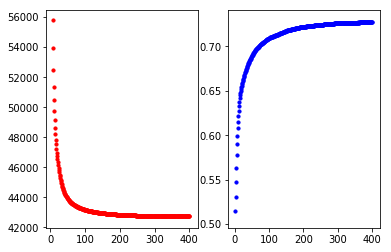

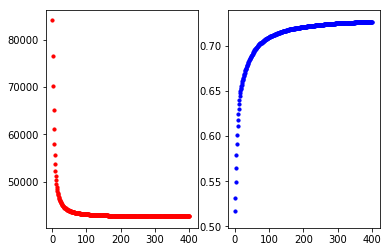

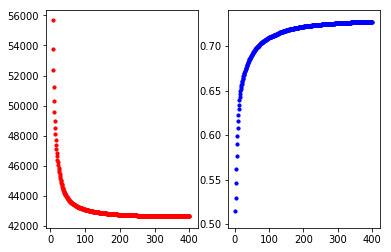

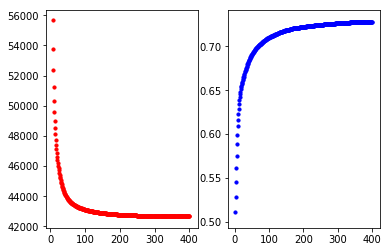

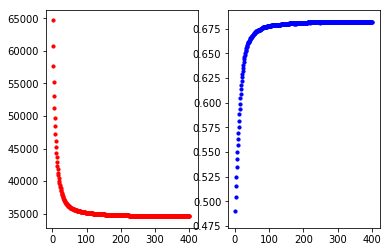

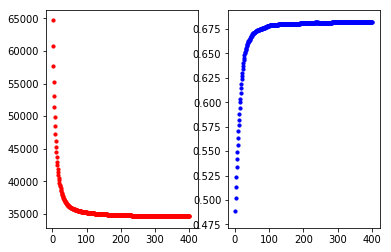

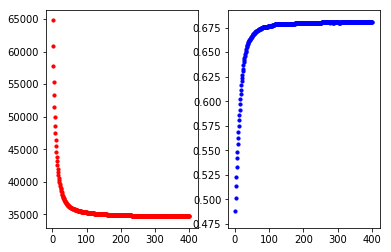

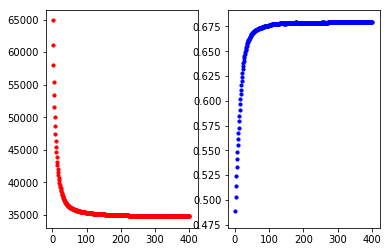

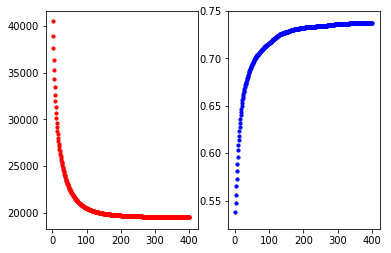

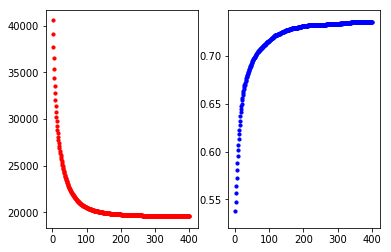

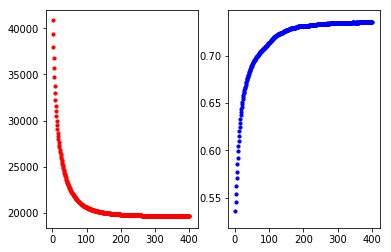

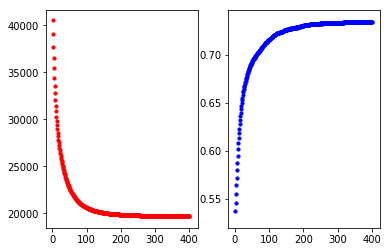

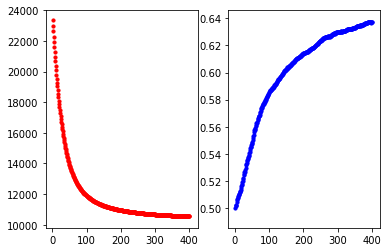

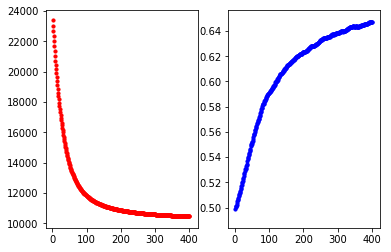

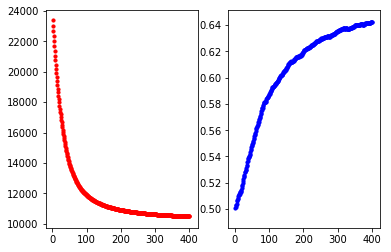

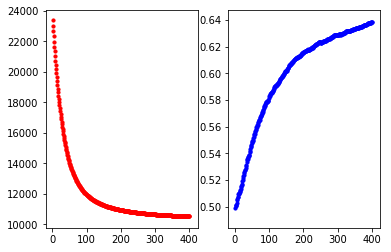

In [17]:
logistic_regression_cross_val_res = []
for i, tx in enumerate(preprocessed_data_train):
    logistic_regression_cross_val_res.append(cross_validate(logistic_regression, tx, all_ys_train[i], epochs=400, gamma=0.000005, model_name='logistic_regression'))
    
logistic_regression_cross_val_res

### Regularized Logistic Regression
The feature expansion for this model has to be 2. Otherwise very low performance is achieved

In [9]:
from MLscripts.implementations import *

logistic_regression_cross_val_res = []
for i, tx in enumerate(preprocessed_data_train_augmented):
    logistic_regression_cross_val_res.append(cross_validate(reg_logistic_regression, tx, all_ys_train[i], epochs=400, gamma=0.000005, lambda_=0.5, model_name='reg_logistic_regression'))
    
logistic_regression_cross_val_res

/home/marco/Documents/programming/ML_project1/MLscripts/implementations.py:75: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.squeeze( (np.matmul(y.T, np.log(p)) + np.matmul((1 - y).T, np.log(1 - p))   )   )


[{'test_score': [0.7607494595243814,
   0.7583873808951878,
   0.7565457602690367,
   0.7584674513571943],
  'train_score': [0.7588811487442283,
   0.758854458590226,
   0.7585074865881977,
   0.7577735073531374]},
 {'test_score': [0.7112864954090581,
   0.7075724749819458,
   0.7153100175384298,
   0.7115444134942742],
  'train_score': [0.7129543656934557,
   0.7131263110835998,
   0.7126104749131675,
   0.7121290278207641]},
 {'test_score': [0.7691757979990471,
   0.7748134032078767,
   0.7733841511831031,
   0.7760838494521201],
  'train_score': [0.775686835000794,
   0.7734900217034567,
   0.7739664390450479,
   0.7735429569636335]},
 {'test_score': [0.6504241111712687,
   0.6320158816098177,
   0.6417614149070565,
   0.6459122902003248],
  'train_score': [0.6358659688383564,
   0.6507248992359983,
   0.6487998556217289,
   0.6459122902003248]}]

# 3) Creating Baseline Prediction
### Ridge Regression
With not augmented data

In [6]:
computed_w = []
for i, tx in enumerate(preprocessed_data_train):
    _, wi = ridge_regression(all_ys_train[i], tx)
    computed_w.append(wi)

test_predictions = []

for i, w in enumerate(computed_w):
    train_prediction = predict_labels(w, preprocessed_data_train[i])
    test_prediction = predict_labels(w, preprocessed_data_test[i])
    test_predictions.append(test_prediction)
    
    train_y = all_ys_train[i]
    print('train loss for dataset ', i, ': ', calculate_loss_SUCCESS(train_y, preprocessed_data_train[i], w))

all_test_predictions = np.zeros(input_data_test.shape[0])
all_test_predictions, all_test_predictions.shape

for i, test_prediction in enumerate(test_predictions):
    all_test_predictions[input_data_test[:, 22] == i] = test_prediction

all_test_predictions

train loss for dataset  0 :  0.7190956131834696
train loss for dataset  1 :  0.6770607655008769
train loss for dataset  2 :  0.7341948033903015
train loss for dataset  3 :  0.6465890633459664


array([-1., -1.,  1., ...,  1.,  1., -1.])

### Ridge Regression
augmentation degree = 2

In [7]:
computed_w = []
for i, tx in enumerate(preprocessed_data_train_augmented):
    _, wi = ridge_regression(all_ys_train[i], tx, lamb=1)
    computed_w.append(wi)

test_predictions = []

for i, w in enumerate(computed_w):
    train_prediction = predict_labels(w, preprocessed_data_train_augmented[i])
    test_prediction = predict_labels(w, preprocessed_data_test_augmented[i])
    test_predictions.append(test_prediction)
    
    train_y = all_ys_train[i]
    print('train loss for dataset ', i, ': ', calculate_loss_SUCCESS(train_y, preprocessed_data_train_augmented[i], w))

all_test_predictions = np.zeros(input_data_test.shape[0])
all_test_predictions, all_test_predictions.shape

for i, test_prediction in enumerate(test_predictions):
    all_test_predictions[input_data_test[:, 22] == i] = test_prediction

all_test_predictions

train loss for dataset  0 :  0.8388998428632911
train loss for dataset  1 :  0.7855797998555659
train loss for dataset  2 :  0.8132952222156057
train loss for dataset  3 :  0.8064428803465078


array([-1., -1., -1., ...,  1., -1., -1.])

### Ridge Regression

Augmentation degree = 4

In [8]:
computed_w = []
for i, tx in enumerate(preprocessed_data_train_augmented):
    _, wi = ridge_regression(all_ys_train[i], tx, lamb=1)
    computed_w.append(wi)

test_predictions = []

for i, w in enumerate(computed_w):
    train_prediction = predict_labels(w, preprocessed_data_train_augmented[i])
    test_prediction = predict_labels(w, preprocessed_data_test_augmented[i])
    test_predictions.append(test_prediction)
    
    train_y = all_ys_train[i]
    print('train loss for dataset ', i, ': ', calculate_loss_SUCCESS(train_y, preprocessed_data_train_augmented[i], w))

all_test_predictions = np.zeros(input_data_test.shape[0])
all_test_predictions, all_test_predictions.shape

for i, test_prediction in enumerate(test_predictions):
    all_test_predictions[input_data_test[:, 22] == i] = test_prediction

all_test_predictions

train loss for dataset  0 :  0.8388998428632911
train loss for dataset  1 :  0.7855797998555659
train loss for dataset  2 :  0.8132952222156057
train loss for dataset  3 :  0.8064428803465078


array([-1., -1., -1., ...,  1., -1., -1.])

Score on the test set: 0.81329

In [13]:
create_csv_submission(ids_test, all_test_predictions, 'ridge_regression_submission.csv')

### Logistic Regression

Augmentation degree = 2

cost function:  LIKELIHOOD
Accuracy: 0.6869076096203697
cost function:  LIKELIHOOD
Accuracy: 0.6523375336542793
cost function:  LIKELIHOOD
Accuracy: 0.7084863831533434


/home/marco/Documents/programming/ML_project1/MLscripts/implementations.py:139: RuntimeWarning: overflow encountered in exp
  
/home/marco/Documents/programming/ML_project1/MLscripts/implementations.py:90: RuntimeWarning: divide by zero encountered in log
  return -log_likelihood + lambda_ * np.squeeze(np.matmul(w.T, w))


cost function:  LIKELIHOOD
Accuracy: 0.7096273758169608
cost function:  LIKELIHOOD
Accuracy: 0.749241840401149
cost function:  LIKELIHOOD
Accuracy: 0.746549498063315
cost function:  LIKELIHOOD
Accuracy: 0.7758750112597961
cost function:  LIKELIHOOD
Accuracy: 0.7690690901083943
cost function:  LIKELIHOOD
Accuracy: 0.793240118903446
cost function:  LIKELIHOOD
Accuracy: 0.7857135708066018
cost function:  LIKELIHOOD
Accuracy: 0.8032888613093391
cost function:  LIKELIHOOD
Accuracy: 0.7956221913064366
cost function:  LIKELIHOOD
Accuracy: 0.8101948695364968
cost function:  LIKELIHOOD
Accuracy: 0.8020277641548147
cost function:  LIKELIHOOD
Accuracy: 0.8150490927106583
cost function:  LIKELIHOOD
Accuracy: 0.8053306376547597
cost function:  LIKELIHOOD
Accuracy: 0.8178315134166725
cost function:  LIKELIHOOD
Accuracy: 0.8076826839350235
cost function:  LIKELIHOOD
Accuracy: 0.8196831243181568
cost function:  LIKELIHOOD
Accuracy: 0.8091939987789377
cost function:  LIKELIHOOD
Accuracy: 0.820683995075

cost function:  LIKELIHOOD
Accuracy: 0.8247375216438302
cost function:  LIKELIHOOD
Accuracy: 0.8128271596288771
cost function:  LIKELIHOOD
Accuracy: 0.8248175913044349
cost function:  LIKELIHOOD
Accuracy: 0.812877203166755
cost function:  LIKELIHOOD
Accuracy: 0.824837608719586
cost function:  LIKELIHOOD
Accuracy: 0.8129072292894819
cost function:  LIKELIHOOD
Accuracy: 0.8248075825968593
cost function:  LIKELIHOOD
Accuracy: 0.8129973076576622
cost function:  LIKELIHOOD
Accuracy: 0.8248676348423128
cost function:  LIKELIHOOD
Accuracy: 0.8129973076576622
cost function:  LIKELIHOOD
Accuracy: 0.8249677219180688
cost function:  LIKELIHOOD
Accuracy: 0.8131174121485693
cost function:  LIKELIHOOD
Accuracy: 0.8249376957953419
cost function:  LIKELIHOOD
Accuracy: 0.8131774643940228
cost function:  LIKELIHOOD
Accuracy: 0.8249677219180688
cost function:  LIKELIHOOD
Accuracy: 0.8132074905167496
cost function:  LIKELIHOOD
Accuracy: 0.8249477045029175
cost function:  LIKELIHOOD
Accuracy: 0.81320749051

cost function:  LIKELIHOOD
Accuracy: 0.8252779918529121
cost function:  LIKELIHOOD
Accuracy: 0.8148789446818733
cost function:  LIKELIHOOD
Accuracy: 0.8253480528059411
cost function:  LIKELIHOOD
Accuracy: 0.8148989620970244
cost function:  LIKELIHOOD
Accuracy: 0.8253380440983655
cost function:  LIKELIHOOD
Accuracy: 0.814959014342478
cost function:  LIKELIHOOD
Accuracy: 0.8253380440983655
cost function:  LIKELIHOOD
Accuracy: 0.8149289882197512
cost function:  LIKELIHOOD
Accuracy: 0.825378078928668
cost function:  LIKELIHOOD
Accuracy: 0.8149890404652047
cost function:  LIKELIHOOD
Accuracy: 0.8253980963438191
cost function:  LIKELIHOOD
Accuracy: 0.8150090578803559
cost function:  LIKELIHOOD
Accuracy: 0.825378078928668
cost function:  LIKELIHOOD
Accuracy: 0.8150490927106583
cost function:  LIKELIHOOD
Accuracy: 0.8253480528059411
cost function:  LIKELIHOOD
Accuracy: 0.8150591014182339
cost function:  LIKELIHOOD
Accuracy: 0.8253480528059411
cost function:  LIKELIHOOD
Accuracy: 0.815089127540

cost function:  LIKELIHOOD
Accuracy: 0.7394898380274425
cost function:  LIKELIHOOD
Accuracy: 0.7608325595790777
cost function:  LIKELIHOOD
Accuracy: 0.7478721757969669
cost function:  LIKELIHOOD
Accuracy: 0.6924842669968018
cost function:  LIKELIHOOD
Accuracy: 0.7186242649334571
cost function:  LIKELIHOOD
Accuracy: 0.7026978231713608
cost function:  LIKELIHOOD
Accuracy: 0.7424945837202105
cost function:  LIKELIHOOD
Accuracy: 0.7641210151655834
cost function:  LIKELIHOOD
Accuracy: 0.7510961518621686
cost function:  LIKELIHOOD
Accuracy: 0.6958372021046115
cost function:  LIKELIHOOD
Accuracy: 0.7211131744557928
cost function:  LIKELIHOOD
Accuracy: 0.7049675023212628
cost function:  LIKELIHOOD
Accuracy: 0.7445579284019396
cost function:  LIKELIHOOD
Accuracy: 0.7662875270813989
cost function:  LIKELIHOOD
Accuracy: 0.753004745692768
cost function:  LIKELIHOOD
Accuracy: 0.6979134426906015
cost function:  LIKELIHOOD
Accuracy: 0.723640771690911
cost function:  LIKELIHOOD
Accuracy: 0.70750799546

Accuracy: 0.7103966780150625
cost function:  LIKELIHOOD
Accuracy: 0.7353373568554628
cost function:  LIKELIHOOD
Accuracy: 0.7209842154131848
cost function:  LIKELIHOOD
Accuracy: 0.7548875477148458
cost function:  LIKELIHOOD
Accuracy: 0.7718972454348499
cost function:  LIKELIHOOD
Accuracy: 0.7605359537810791
cost function:  LIKELIHOOD
Accuracy: 0.7104869493448881
cost function:  LIKELIHOOD
Accuracy: 0.7354405240895492
cost function:  LIKELIHOOD
Accuracy: 0.7210229031259672
cost function:  LIKELIHOOD
Accuracy: 0.754939131331889
cost function:  LIKELIHOOD
Accuracy: 0.7718327659135459
cost function:  LIKELIHOOD
Accuracy: 0.7605101619725575
cost function:  LIKELIHOOD
Accuracy: 0.710564324770453
cost function:  LIKELIHOOD
Accuracy: 0.7354663158980708
cost function:  LIKELIHOOD
Accuracy: 0.7210486949344888
cost function:  LIKELIHOOD
Accuracy: 0.7550680903744971
cost function:  LIKELIHOOD
Accuracy: 0.7719617249561539
cost function:  LIKELIHOOD
Accuracy: 0.7605875373981223
cost function:  LIKEL

cost function:  LIKELIHOOD
Accuracy: 0.7609615186216857
cost function:  LIKELIHOOD
Accuracy: 0.7118152274837511
cost function:  LIKELIHOOD
Accuracy: 0.736124007015372
cost function:  LIKELIHOOD
Accuracy: 0.7223124935520479
cost function:  LIKELIHOOD
Accuracy: 0.7556097183534509
cost function:  LIKELIHOOD
Accuracy: 0.7720648921902403
cost function:  LIKELIHOOD
Accuracy: 0.7610646858557722
cost function:  LIKELIHOOD
Accuracy: 0.7118023315794904
cost function:  LIKELIHOOD
Accuracy: 0.7361497988238935
cost function:  LIKELIHOOD
Accuracy: 0.7223124935520479
cost function:  LIKELIHOOD
Accuracy: 0.7555968224491901
cost function:  LIKELIHOOD
Accuracy: 0.7720519962859795
cost function:  LIKELIHOOD
Accuracy: 0.7610517899515113
cost function:  LIKELIHOOD
Accuracy: 0.7120344578561849
cost function:  LIKELIHOOD
Accuracy: 0.7361755906324151
cost function:  LIKELIHOOD
Accuracy: 0.7223769730733519
cost function:  LIKELIHOOD
Accuracy: 0.7555581347364078
cost function:  LIKELIHOOD
Accuracy: 0.7720519962

cost function:  LIKELIHOOD
Accuracy: 0.764227158141289
cost function:  LIKELIHOOD
Accuracy: 0.7658945195418726
cost function:  LIKELIHOOD
Accuracy: 0.7652593342464122
cost function:  LIKELIHOOD
Accuracy: 0.7676214295639056
cost function:  LIKELIHOOD
Accuracy: 0.7660731654062208
cost function:  LIKELIHOOD
Accuracy: 0.7688521010738602
cost function:  LIKELIHOOD
Accuracy: 0.7669068461065126
cost function:  LIKELIHOOD
Accuracy: 0.7697056313146351
cost function:  LIKELIHOOD
Accuracy: 0.7681375176164672
cost function:  LIKELIHOOD
Accuracy: 0.7707576569602413
cost function:  LIKELIHOOD
Accuracy: 0.7691498441811072
cost function:  LIKELIHOOD
Accuracy: 0.7713332936342524
cost function:  LIKELIHOOD
Accuracy: 0.7701621707457472
cost function:  LIKELIHOOD
Accuracy: 0.7721272752535778
cost function:  LIKELIHOOD
Accuracy: 0.7706782587983089
cost function:  LIKELIHOOD
Accuracy: 0.7728815577919371
cost function:  LIKELIHOOD
Accuracy: 0.7715516385795669
cost function:  LIKELIHOOD
Accuracy: 0.7739137338

cost function:  LIKELIHOOD
Accuracy: 0.7907461442267611
cost function:  LIKELIHOOD
Accuracy: 0.7870342801564144
cost function:  LIKELIHOOD
Accuracy: 0.7908056928482106
cost function:  LIKELIHOOD
Accuracy: 0.7871335278588301
cost function:  LIKELIHOOD
Accuracy: 0.7908850910101431
cost function:  LIKELIHOOD
Accuracy: 0.7871732269397963
cost function:  LIKELIHOOD
Accuracy: 0.791004188253042
cost function:  LIKELIHOOD
Accuracy: 0.7873320232636615
cost function:  LIKELIHOOD
Accuracy: 0.7910835864149744
cost function:  LIKELIHOOD
Accuracy: 0.787550368208976
cost function:  LIKELIHOOD
Accuracy: 0.7911232854959408
cost function:  LIKELIHOOD
Accuracy: 0.7875106691280097
cost function:  LIKELIHOOD
Accuracy: 0.7912820818198059
cost function:  LIKELIHOOD
Accuracy: 0.7876496159113916
cost function:  LIKELIHOOD
Accuracy: 0.7913217809007721
cost function:  LIKELIHOOD
Accuracy: 0.7876694654518748
cost function:  LIKELIHOOD
Accuracy: 0.7914408781436709
cost function:  LIKELIHOOD
Accuracy: 0.78768931499

Accuracy: 0.7907858433077274
cost function:  LIKELIHOOD
Accuracy: 0.7932868854086028
cost function:  LIKELIHOOD
Accuracy: 0.7907858433077274
cost function:  LIKELIHOOD
Accuracy: 0.7932868854086028
cost function:  LIKELIHOOD
Accuracy: 0.7907858433077274
cost function:  LIKELIHOOD
Accuracy: 0.793326584489569
cost function:  LIKELIHOOD
Accuracy: 0.7907858433077274
cost function:  LIKELIHOOD
Accuracy: 0.793326584489569
cost function:  LIKELIHOOD
Accuracy: 0.7907858433077274
cost function:  LIKELIHOOD
Accuracy: 0.7933464340300522
cost function:  LIKELIHOOD
Accuracy: 0.7908056928482106
cost function:  LIKELIHOOD
Accuracy: 0.793326584489569
cost function:  LIKELIHOOD
Accuracy: 0.4961649521746977
cost function:  LIKELIHOOD
Accuracy: 0.5323046381519582
cost function:  LIKELIHOOD
Accuracy: 0.5670005414185165
cost function:  LIKELIHOOD
Accuracy: 0.5905973650965529
cost function:  LIKELIHOOD
Accuracy: 0.6072008662696264
cost function:  LIKELIHOOD
Accuracy: 0.6189767190037899
cost function:  LIKELI

cost function:  LIKELIHOOD
Accuracy: 0.7652499548817903
cost function:  LIKELIHOOD
Accuracy: 0.7656560187691752
cost function:  LIKELIHOOD
Accuracy: 0.7660620826565602
cost function:  LIKELIHOOD
Accuracy: 0.7661974372856885
cost function:  LIKELIHOOD
Accuracy: 0.7667388558022018
cost function:  LIKELIHOOD
Accuracy: 0.7673705107381339
cost function:  LIKELIHOOD
Accuracy: 0.7678216928352283
cost function:  LIKELIHOOD
Accuracy: 0.7678216928352283
cost function:  LIKELIHOOD
Accuracy: 0.7683631113517415
cost function:  LIKELIHOOD
Accuracy: 0.7684984659808699
cost function:  LIKELIHOOD
Accuracy: 0.7689045298682549
cost function:  LIKELIHOOD
Accuracy: 0.7691752391265114
cost function:  LIKELIHOOD
Accuracy: 0.769852012272153
cost function:  LIKELIHOOD
Accuracy: 0.7702129579498286
cost function:  LIKELIHOOD
Accuracy: 0.7704385489983757
cost function:  LIKELIHOOD
Accuracy: 0.770664140046923
cost function:  LIKELIHOOD
Accuracy: 0.7708897310954701
cost function:  LIKELIHOOD
Accuracy: 0.77134091319

Accuracy: 0.790516152319076
cost function:  LIKELIHOOD
Accuracy: 0.7905612705287854
cost function:  LIKELIHOOD
Accuracy: 0.790425915899657
cost function:  LIKELIHOOD
Accuracy: 0.7904710341093666
cost function:  LIKELIHOOD
Accuracy: 0.790831979787042
cost function:  LIKELIHOOD
Accuracy: 0.7910124526258798
cost function:  LIKELIHOOD
Accuracy: 0.7910124526258798
cost function:  LIKELIHOOD
Accuracy: 0.7910575708355893
cost function:  LIKELIHOOD
Accuracy: 0.7911929254647175
cost function:  LIKELIHOOD
Accuracy: 0.791238043674427
cost function:  LIKELIHOOD
Accuracy: 0.7912831618841364
cost function:  LIKELIHOOD
Accuracy: 0.7911929254647175
cost function:  LIKELIHOOD
Accuracy: 0.7911026890452987
cost function:  LIKELIHOOD
Accuracy: 0.7910575708355893
cost function:  LIKELIHOOD
Accuracy: 0.7911478072550081
cost function:  LIKELIHOOD
Accuracy: 0.7911478072550081
cost function:  LIKELIHOOD
Accuracy: 0.7911929254647175
cost function:  LIKELIHOOD
Accuracy: 0.7911478072550081
cost function:  LIKELIH

array([-1., -1.,  1., ...,  1.,  1., -1.])

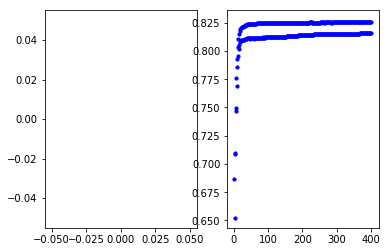

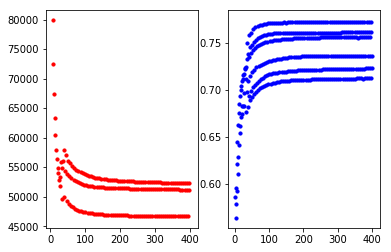

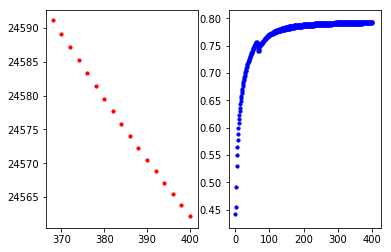

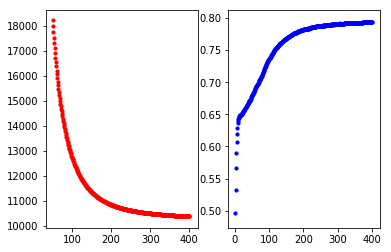

In [20]:
computed_w = []
for i, tx in enumerate(preprocessed_data_train_augmented):
#     _, wi = ridge_regression(all_ys_train[i], tx, lamb=1)
    initial_wi = np.random.uniform(low=-1, high=1, size=tx.shape[1])
    _, wi = logistic_regression(all_ys_train[i], tx, initial_wi, 400, 0.000005)
    computed_w.append(wi)

test_predictions = []

for i, w in enumerate(computed_w):
    train_prediction = predict_labels(w, preprocessed_data_train_augmented[i])
    test_prediction = predict_labels(w, preprocessed_data_test_augmented[i])
    test_predictions.append(test_prediction)
    
    train_y = all_ys_train[i]
    print('train loss for dataset ', i, ': ', calculate_loss_SUCCESS(train_y, preprocessed_data_train_augmented[i], w))

all_test_predictions = np.zeros(input_data_test.shape[0])
all_test_predictions, all_test_predictions.shape

for i, test_prediction in enumerate(test_predictions):
    all_test_predictions[input_data_test[:, 22] == i] = test_prediction

all_test_predictions

Score on the test set: 0.77789

Possible improvements: change the number of iterations, adapt different learning rates to the different parts of the dataset

In [21]:
create_csv_submission(ids_test, all_test_predictions, 'logistic_regression_submission.csv')